# [112-2 多媒體技術與應用] Homework <br>

<font size = 4>
    請用.ipynb交作業，檔名用HW_學號_名稱.ipynb，例如: HW_0123456_黃大明.ipynb

## Q1 多元回歸(Multiple regression) (25%)


$$
({\bf{x}}_i,y_i) , {\bf{x}}_i = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{id}\\ \end{bmatrix} \in R^{d+1}, \forall i=1,2,...,n 
$$

$$
{\bf{Y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\\ \end{bmatrix}, 
{\bf{\beta}} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\\ \end{bmatrix},
{\bf{X}} = \begin{bmatrix} \bf{X}_1^T \\ \bf{X}_2^T  \\ \vdots \\ \bf{X}_n^T \\ \end{bmatrix}
 = \begin{bmatrix} 1&x_{11}&...&x_{1d} \\ \ 1&x_{21}&...&x_{2d}  \\ \vdots \\ \ 1&x_{n1}&...&x_{nd} \\ \end{bmatrix} 
$$

**Regression:** $$\bf{Y}=  {\bf{X}}{\bf{\beta}}$$

$$
loss({\bf{\beta}})=(\bf{Y}-\hat{\bf{Y}})^T(\bf{Y}-\hat{\bf{Y}})
$$

<font size=4 color=red>**找${\bf{\beta}}$的closed-form solution**

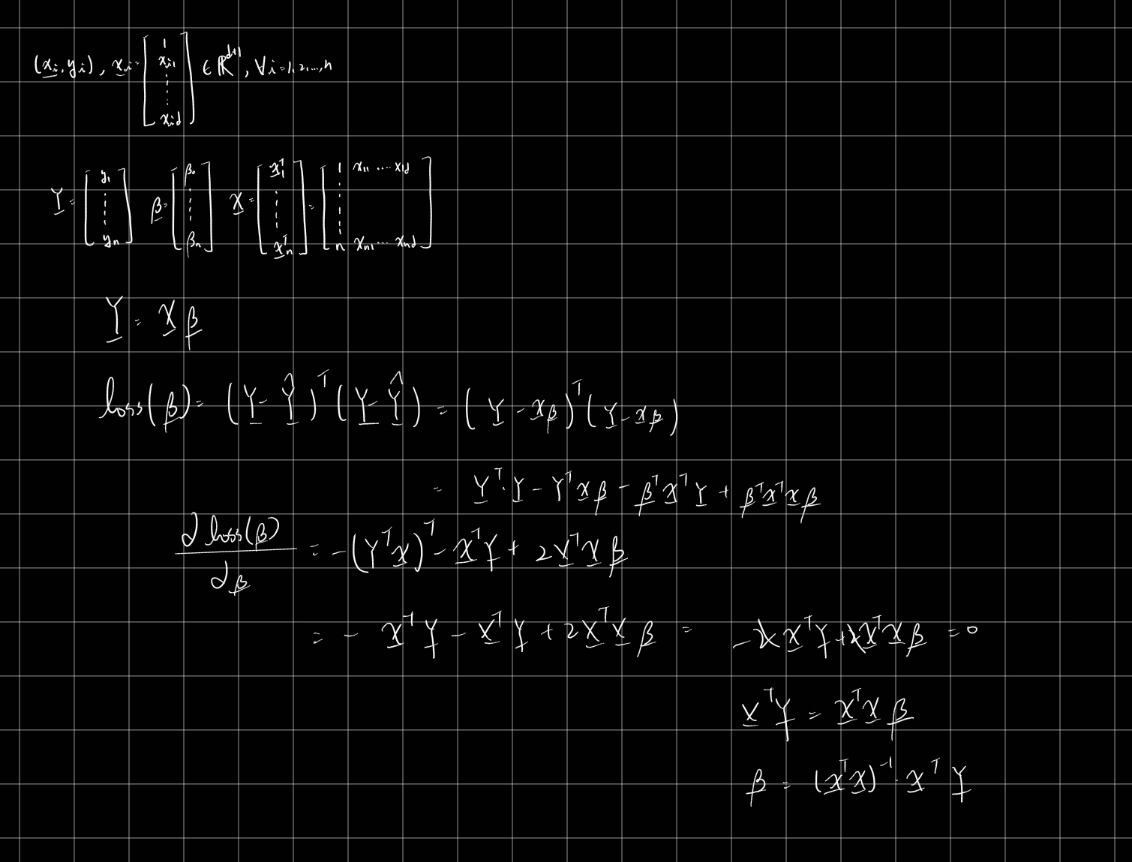

## Q2. 依據第Q1推出的公式做python程式(Numpy)撰寫 ，寫一個Multiple regression  (25%)<br>
Data在HW-RegressionExample.txt，第1欄是dependent variable(${\bf{Y}}$), 第2~5欄是independent variable(${\bf{X}}$)。<br><br>
<font size=4 color=red> 請用python print出算出來的$\beta$結果。</font>

In [26]:
import numpy as np
np.set_printoptions( suppress = True )
file = './HW-RegressionExample.txt'
data = np.loadtxt( file , dtype = np.int_ , delimiter = ' ' )
X = data[ : , 1:5 ]
Y = data[ : , 0 ]
B = np.matmul( np.matmul( np.linalg.inv( np.matmul( X.transpose() , X ) ) , X.transpose() ) , Y )
print( B )

[-2891.44094079    -0.00332332    -0.65674895  2659.39888768]


## Q3 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
利用Pytorch寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

$$
y_{hat} = \sigma(\beta_1 \times x_{身高}+\beta_2 \times x_{體重} + \beta_0)
$$
    

進行求解  <br>

1. 學習率0.1，學習次數10000次<br>
2. 學習率0.01，學習次數10000次<br>

I. 在每個實驗中都要劃出loss的變化(10%) <br> 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$(10%)<br> 
III. 劃出模型Decision Boundary的熱點圖。(20%)<br> 

3. 說明一下你看到的現象。 (10%)

    
-------------------------
以下為Hint<br>
訓練模型前請設定下面的random seed
```
import torch
torch.manual_seed(2024)
```
'身高': 前處理先除上200<br>
'體重': 前處理先除上100

print最後解的羅吉斯回歸的$\beta$   
```
print(model.linear.weight)
print(model.linear.bias)
```
理論上求出來的解如下:
    

I. 在每個實驗中都要劃出loss的變化<br>
loss = torch.nn.BCELoss()
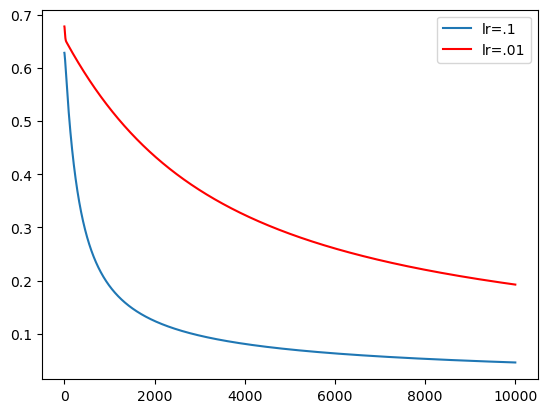  
 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$<br>
    
|learning rate|$\beta_0$| $\beta_1$| $\beta_2$|
|:-:|:-:|:-:|:-:|
|0.1|-29.9621|5.0617| 41.4960|    
|0.01|-11.0679| 1.2951| 16.4604|   

III. 劃出模型Decision Boundary的熱點圖。<br> 
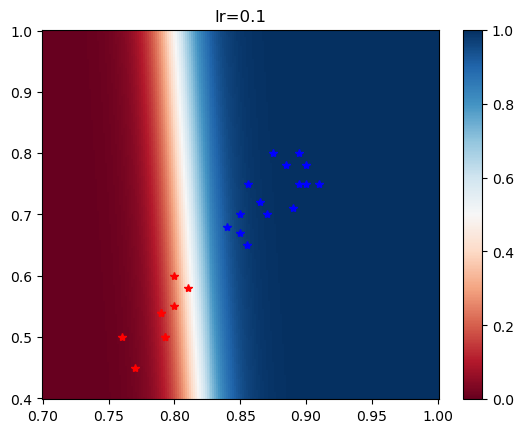
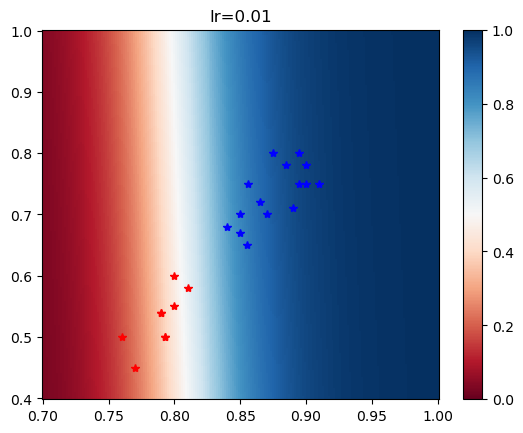

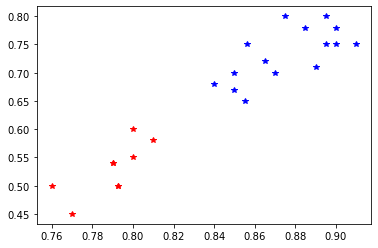

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

def load_classification_example():
    filename='.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) # 將"性別"裡的字串自動轉換成數值
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"]) # 將"手機品牌"裡的字串自動轉換成數值
    X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
    Y = np.array(df['性別'])
    return X, Y
data, target = load_classification_example()
data[:,0]=data[:,0]/200
data[:,1]=data[:,1]/100
data=data[:,0:2]
pos0=np.where(target==0)[0]
pos1=np.where(target==1)[0]
plt.figure()
plt.plot(data[pos0,0],data[pos0,1],'r*')
plt.plot(data[pos1,0],data[pos1,1],'b*')
plt.show()

#### Load datas from data_weight_multlfeatutes.xlsx

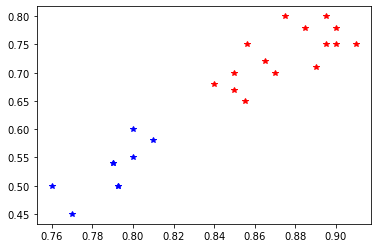

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_datas( file ):
    df = pd.read_excel( file )
    appending = []
    for j in df['性別'] :
        if j == '男' :
            appending.append( 1 )
        elif j == '女' :
            appending.append( 0 )
    df['性別'] = appending
    appending.clear()
    for j in df['手機品牌'] :    
        if j == 'Apple' :
            appending.append( 0 )
        elif j == 'Google' :
            appending.append( 1 )
        else :
            appending.append( 2 )
    df['手機品牌'] = appending
    X = np.array( df[ [ '身高' , '體重' ] ] )
    Y = np.array( df['性別'] )
    return X , Y 

def pre_do( X ):
    X[ : , 0 ] = X[ : , 0 ] / 200
    X[ : , 1 ] = X[ : , 1 ] / 100
    return X

def Plot( x , y ):
    pos_male = np.where( y == 0 )[0]
    pos_female = np.where( y == 1 )[0]
    
    plt.figure( num = 1 )
    plt.plot( x[ pos_male , 0 ] , x[ pos_male , 1 ] , 'b*' )
    plt.plot( x[ pos_female , 0 ] , x[ pos_female , 1 ] , 'r*' )
    
x , y = load_datas( './data_weight_multlfeatutes.xlsx' )
x = pre_do( x )
Plot( x , y )
plt.show()


#### Find regression B

model lr: 0.1
Parameter containing:
tensor([[ 5.0617, 41.4960]], requires_grad=True)
Parameter containing:
tensor([-29.9621], requires_grad=True)
model lr: 0.01
Parameter containing:
tensor([[ 0.7160, 16.5928]], requires_grad=True)
Parameter containing:
tensor([-10.6691], requires_grad=True)


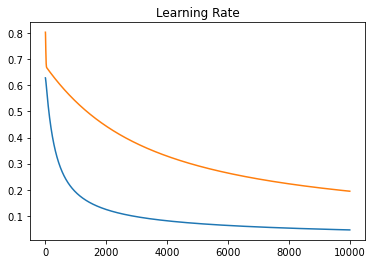

In [24]:
import torch 

torch.manual_seed(202404)

X = torch.tensor( x , dtype = torch.float32 ).requires_grad_( False )
Y = torch.tensor( y , dtype = torch.float32 ).requires_grad_( False ).view( -1 , 1 )

cuda = 0
device = torch.device( "cuda" if( torch.cuda.is_available() & cuda ) else "cpu" )

mydatasets = torch.utils.data.TensorDataset( X , Y )
mydataloader_train = torch.utils.data.DataLoader( mydatasets , batch_size = len(y) , shuffle = True , num_workers = 0 )

class LogisticRegression( torch.nn.Module ):
    
    def __init__( self ):
        super( LogisticRegression , self ).__init__()
        self.linear = torch.nn.Linear( 2 , 1 )
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward( self , x ):
        return self.sigmoid( self.linear( x ))
    
def training( rate , times ) :
    
    model = LogisticRegression().to( device )
    loss = torch.nn.BCELoss().to( device )
    
    optimizer = torch.optim.SGD( model.parameters() , lr = rate , momentum = 0.9 )
    losses = []
    
    model.train()
    
    for i in range( times ):
        for data , targets in mydataloader_train :
            data , targets = data.to( device ) , targets.to( device )
            output = model( data )
            loss_get = loss( output , targets )
            optimizer.zero_grad()
            loss_get.backward()
            optimizer.step()
            losses.append( loss_get )
    return model , losses

rates = [ 0.1 , 0.01 ]
models = []

for rate in rates :
    model , loss = training( rate , 10000 )
    models.append( model )
    plt.plot( loss , label = 'lr = ' + str( rate ) )
    print( f"model lr: { rate }" )
    print( model.linear.weight )
    print( model.linear.bias )
plt.title( 'Learning Rate' )
plt.show()

#### Plot decision boundary

tensor(5.5719e-06, grad_fn=<SelectBackward0>)
tensor([5.5719e-06], grad_fn=<SigmoidBackward0>)
tensor(6.2490e-06, grad_fn=<SelectBackward0>)
tensor([6.2490e-06], grad_fn=<SigmoidBackward0>)
tensor(7.0084e-06, grad_fn=<SelectBackward0>)
tensor([7.0084e-06], grad_fn=<SigmoidBackward0>)
tensor(7.8600e-06, grad_fn=<SelectBackward0>)
tensor([7.8600e-06], grad_fn=<SigmoidBackward0>)
tensor(8.8152e-06, grad_fn=<SelectBackward0>)
tensor([8.8152e-06], grad_fn=<SigmoidBackward0>)
tensor(9.8864e-06, grad_fn=<SelectBackward0>)
tensor([9.8864e-06], grad_fn=<SigmoidBackward0>)
tensor(1.1088e-05, grad_fn=<SelectBackward0>)
tensor([1.1088e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2435e-05, grad_fn=<SelectBackward0>)
tensor([1.2435e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3946e-05, grad_fn=<SelectBackward0>)
tensor([1.3946e-05], grad_fn=<SigmoidBackward0>)
tensor(1.5641e-05, grad_fn=<SelectBackward0>)
tensor([1.5641e-05], grad_fn=<SigmoidBackward0>)
tensor(1.7542e-05, grad_fn=<SelectBackward0>)
tens

tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
t

tensor(0.9303, grad_fn=<SelectBackward0>)
tensor([0.9303], grad_fn=<SigmoidBackward0>)
tensor(0.9374, grad_fn=<SelectBackward0>)
tensor([0.9374], grad_fn=<SigmoidBackward0>)
tensor(0.9438, grad_fn=<SelectBackward0>)
tensor([0.9438], grad_fn=<SigmoidBackward0>)
tensor(0.9496, grad_fn=<SelectBackward0>)
tensor([0.9496], grad_fn=<SigmoidBackward0>)
tensor(0.9548, grad_fn=<SelectBackward0>)
tensor([0.9548], grad_fn=<SigmoidBackward0>)
tensor(0.9595, grad_fn=<SelectBackward0>)
tensor([0.9595], grad_fn=<SigmoidBackward0>)
tensor(0.9637, grad_fn=<SelectBackward0>)
tensor([0.9637], grad_fn=<SigmoidBackward0>)
tensor(0.9675, grad_fn=<SelectBackward0>)
tensor([0.9675], grad_fn=<SigmoidBackward0>)
tensor(0.9709, grad_fn=<SelectBackward0>)
tensor([0.9709], grad_fn=<SigmoidBackward0>)
tensor(0.9740, grad_fn=<SelectBackward0>)
tensor([0.9740], grad_fn=<SigmoidBackward0>)
tensor(0.9768, grad_fn=<SelectBackward0>)
tensor([0.9768], grad_fn=<SigmoidBackward0>)
tensor(0.9792, grad_fn=<SelectBackward0>)
t

tensor(0.2143, grad_fn=<SelectBackward0>)
tensor([0.2143], grad_fn=<SigmoidBackward0>)
tensor(0.2342, grad_fn=<SelectBackward0>)
tensor([0.2342], grad_fn=<SigmoidBackward0>)
tensor(0.2554, grad_fn=<SelectBackward0>)
tensor([0.2554], grad_fn=<SigmoidBackward0>)
tensor(0.2778, grad_fn=<SelectBackward0>)
tensor([0.2778], grad_fn=<SigmoidBackward0>)
tensor(0.3014, grad_fn=<SelectBackward0>)
tensor([0.3014], grad_fn=<SigmoidBackward0>)
tensor(0.3261, grad_fn=<SelectBackward0>)
tensor([0.3261], grad_fn=<SigmoidBackward0>)
tensor(0.3518, grad_fn=<SelectBackward0>)
tensor([0.3518], grad_fn=<SigmoidBackward0>)
tensor(0.3784, grad_fn=<SelectBackward0>)
tensor([0.3784], grad_fn=<SigmoidBackward0>)
tensor(0.4057, grad_fn=<SelectBackward0>)
tensor([0.4057], grad_fn=<SigmoidBackward0>)
tensor(0.4336, grad_fn=<SelectBackward0>)
tensor([0.4336], grad_fn=<SigmoidBackward0>)
tensor(0.4620, grad_fn=<SelectBackward0>)
tensor([0.4620], grad_fn=<SigmoidBackward0>)
tensor(0.4906, grad_fn=<SelectBackward0>)
t

tensor([0.0172], grad_fn=<SigmoidBackward0>)
tensor(0.0193, grad_fn=<SelectBackward0>)
tensor([0.0193], grad_fn=<SigmoidBackward0>)
tensor(0.0216, grad_fn=<SelectBackward0>)
tensor([0.0216], grad_fn=<SigmoidBackward0>)
tensor(0.0242, grad_fn=<SelectBackward0>)
tensor([0.0242], grad_fn=<SigmoidBackward0>)
tensor(0.0270, grad_fn=<SelectBackward0>)
tensor([0.0270], grad_fn=<SigmoidBackward0>)
tensor(0.0302, grad_fn=<SelectBackward0>)
tensor([0.0302], grad_fn=<SigmoidBackward0>)
tensor(0.0337, grad_fn=<SelectBackward0>)
tensor([0.0337], grad_fn=<SigmoidBackward0>)
tensor(0.0377, grad_fn=<SelectBackward0>)
tensor([0.0377], grad_fn=<SigmoidBackward0>)
tensor(0.0421, grad_fn=<SelectBackward0>)
tensor([0.0421], grad_fn=<SigmoidBackward0>)
tensor(0.0469, grad_fn=<SelectBackward0>)
tensor([0.0469], grad_fn=<SigmoidBackward0>)
tensor(0.0523, grad_fn=<SelectBackward0>)
tensor([0.0523], grad_fn=<SigmoidBackward0>)
tensor(0.0583, grad_fn=<SelectBackward0>)
tensor([0.0583], grad_fn=<SigmoidBackward0>

tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
tensor([0.0018], grad_fn=<SigmoidBackward0>)
tensor(0.0020, grad_fn=<SelectBackward0>)
tensor([0.0020], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0025, grad_fn=<SelectBackward0>)
tensor([0.0025], grad_fn=<SigmoidBackward0>)
tensor(0.0028, grad_fn=<SelectBackward0>)
tensor([0.0028], grad_fn=<SigmoidBackward0>)
tensor(0.0032, grad_fn=<SelectBackward0>)
tensor([0.0032], grad_fn=<SigmoidBackward0>)
tensor(0.0035, grad_fn=<SelectBackward0>)
tensor([0.0035], grad_fn=<SigmoidBackward0>)
tensor(0.0040, grad_fn=<SelectBackward0>)
tensor([0.0040], grad_fn=<SigmoidBackward0>)
tensor(0.0045, grad_fn=<SelectBackward0>)
t

tensor([2.3069e-05], grad_fn=<SigmoidBackward0>)
tensor(2.5872e-05, grad_fn=<SelectBackward0>)
tensor([2.5872e-05], grad_fn=<SigmoidBackward0>)
tensor(2.9016e-05, grad_fn=<SelectBackward0>)
tensor([2.9016e-05], grad_fn=<SigmoidBackward0>)
tensor(3.2542e-05, grad_fn=<SelectBackward0>)
tensor([3.2542e-05], grad_fn=<SigmoidBackward0>)
tensor(3.6496e-05, grad_fn=<SelectBackward0>)
tensor([3.6496e-05], grad_fn=<SigmoidBackward0>)
tensor(4.0931e-05, grad_fn=<SelectBackward0>)
tensor([4.0931e-05], grad_fn=<SigmoidBackward0>)
tensor(4.5905e-05, grad_fn=<SelectBackward0>)
tensor([4.5905e-05], grad_fn=<SigmoidBackward0>)
tensor(5.1483e-05, grad_fn=<SelectBackward0>)
tensor([5.1483e-05], grad_fn=<SigmoidBackward0>)
tensor(5.7739e-05, grad_fn=<SelectBackward0>)
tensor([5.7739e-05], grad_fn=<SigmoidBackward0>)
tensor(6.4756e-05, grad_fn=<SelectBackward0>)
tensor([6.4756e-05], grad_fn=<SigmoidBackward0>)
tensor(7.2624e-05, grad_fn=<SelectBackward0>)
tensor([7.2624e-05], grad_fn=<SigmoidBackward0>)
t

tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>

tensor([0.8982], grad_fn=<SigmoidBackward0>)
tensor(0.9082, grad_fn=<SelectBackward0>)
tensor([0.9082], grad_fn=<SigmoidBackward0>)
tensor(0.9173, grad_fn=<SelectBackward0>)
tensor([0.9173], grad_fn=<SigmoidBackward0>)
tensor(0.9256, grad_fn=<SelectBackward0>)
tensor([0.9256], grad_fn=<SigmoidBackward0>)
tensor(0.9331, grad_fn=<SelectBackward0>)
tensor([0.9331], grad_fn=<SigmoidBackward0>)
tensor(0.9399, grad_fn=<SelectBackward0>)
tensor([0.9399], grad_fn=<SigmoidBackward0>)
tensor(0.9461, grad_fn=<SelectBackward0>)
tensor([0.9461], grad_fn=<SigmoidBackward0>)
tensor(0.9516, grad_fn=<SelectBackward0>)
tensor([0.9516], grad_fn=<SigmoidBackward0>)
tensor(0.9567, grad_fn=<SelectBackward0>)
tensor([0.9567], grad_fn=<SigmoidBackward0>)
tensor(0.9612, grad_fn=<SelectBackward0>)
tensor([0.9612], grad_fn=<SigmoidBackward0>)
tensor(0.9652, grad_fn=<SelectBackward0>)
tensor([0.9652], grad_fn=<SigmoidBackward0>)
tensor(0.9689, grad_fn=<SelectBackward0>)
tensor([0.9689], grad_fn=<SigmoidBackward0>

tensor(0.0541, grad_fn=<SelectBackward0>)
tensor([0.0541], grad_fn=<SigmoidBackward0>)
tensor(0.0603, grad_fn=<SelectBackward0>)
tensor([0.0603], grad_fn=<SigmoidBackward0>)
tensor(0.0672, grad_fn=<SelectBackward0>)
tensor([0.0672], grad_fn=<SigmoidBackward0>)
tensor(0.0747, grad_fn=<SelectBackward0>)
tensor([0.0747], grad_fn=<SigmoidBackward0>)
tensor(0.0830, grad_fn=<SelectBackward0>)
tensor([0.0830], grad_fn=<SigmoidBackward0>)
tensor(0.0922, grad_fn=<SelectBackward0>)
tensor([0.0922], grad_fn=<SigmoidBackward0>)
tensor(0.1023, grad_fn=<SelectBackward0>)
tensor([0.1023], grad_fn=<SigmoidBackward0>)
tensor(0.1133, grad_fn=<SelectBackward0>)
tensor([0.1133], grad_fn=<SigmoidBackward0>)
tensor(0.1253, grad_fn=<SelectBackward0>)
tensor([0.1253], grad_fn=<SigmoidBackward0>)
tensor(0.1384, grad_fn=<SelectBackward0>)
tensor([0.1384], grad_fn=<SigmoidBackward0>)
tensor(0.1527, grad_fn=<SelectBackward0>)
tensor([0.1527], grad_fn=<SigmoidBackward0>)
tensor(0.1681, grad_fn=<SelectBackward0>)
t

tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
t

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(6.0367e-06, grad_fn=<SelectBackward0>)
tensor([6.0367e-06], grad_fn=<SigmoidBackward0>)
tensor(6.7703e-06, grad_fn=<SelectBackward0>)
tensor([6.7703e-06], grad_fn=<SigmoidBackward0>)
tensor(7.5930e-06, grad_fn=<SelectBackward0>)
tensor([7.5930e-06], grad_fn=<SigmoidBackward0>)
tensor(8.5157e-06, grad_fn=<SelectBackward0>)
tensor([8.5157e-06], grad_fn=<SigmoidBackward0>)
tensor(9.5505e-06, grad_fn=<SelectBackward0>)
tensor(

tensor([0.9960], grad_fn=<SigmoidBackward0>)
tensor(0.9965, grad_fn=<SelectBackward0>)
tensor([0.9965], grad_fn=<SigmoidBackward0>)
tensor(0.9969, grad_fn=<SelectBackward0>)
tensor([0.9969], grad_fn=<SigmoidBackward0>)
tensor(0.9972, grad_fn=<SelectBackward0>)
tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor(0.9975, grad_fn=<SelectBackward0>)
tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>

tensor(0.6472, grad_fn=<SelectBackward0>)
tensor([0.6472], grad_fn=<SigmoidBackward0>)
tensor(0.6729, grad_fn=<SelectBackward0>)
tensor([0.6729], grad_fn=<SigmoidBackward0>)
tensor(0.6977, grad_fn=<SelectBackward0>)
tensor([0.6977], grad_fn=<SigmoidBackward0>)
tensor(0.7213, grad_fn=<SelectBackward0>)
tensor([0.7213], grad_fn=<SigmoidBackward0>)
tensor(0.7438, grad_fn=<SelectBackward0>)
tensor([0.7438], grad_fn=<SigmoidBackward0>)
tensor(0.7650, grad_fn=<SelectBackward0>)
tensor([0.7650], grad_fn=<SigmoidBackward0>)
tensor(0.7850, grad_fn=<SelectBackward0>)
tensor([0.7850], grad_fn=<SigmoidBackward0>)
tensor(0.8037, grad_fn=<SelectBackward0>)
tensor([0.8037], grad_fn=<SigmoidBackward0>)
tensor(0.8212, grad_fn=<SelectBackward0>)
tensor([0.8212], grad_fn=<SigmoidBackward0>)
tensor(0.8374, grad_fn=<SelectBackward0>)
tensor([0.8374], grad_fn=<SigmoidBackward0>)
tensor(0.8524, grad_fn=<SelectBackward0>)
tensor([0.8524], grad_fn=<SigmoidBackward0>)
tensor(0.8663, grad_fn=<SelectBackward0>)
t

tensor([0.0207], grad_fn=<SigmoidBackward0>)
tensor(0.0231, grad_fn=<SelectBackward0>)
tensor([0.0231], grad_fn=<SigmoidBackward0>)
tensor(0.0259, grad_fn=<SelectBackward0>)
tensor([0.0259], grad_fn=<SigmoidBackward0>)
tensor(0.0289, grad_fn=<SelectBackward0>)
tensor([0.0289], grad_fn=<SigmoidBackward0>)
tensor(0.0323, grad_fn=<SelectBackward0>)
tensor([0.0323], grad_fn=<SigmoidBackward0>)
tensor(0.0361, grad_fn=<SelectBackward0>)
tensor([0.0361], grad_fn=<SigmoidBackward0>)
tensor(0.0404, grad_fn=<SelectBackward0>)
tensor([0.0404], grad_fn=<SigmoidBackward0>)
tensor(0.0450, grad_fn=<SelectBackward0>)
tensor([0.0450], grad_fn=<SigmoidBackward0>)
tensor(0.0502, grad_fn=<SelectBackward0>)
tensor([0.0502], grad_fn=<SigmoidBackward0>)
tensor(0.0560, grad_fn=<SelectBackward0>)
tensor([0.0560], grad_fn=<SigmoidBackward0>)
tensor(0.0624, grad_fn=<SelectBackward0>)
tensor([0.0624], grad_fn=<SigmoidBackward0>)
tensor(0.0694, grad_fn=<SelectBackward0>)
tensor([0.0694], grad_fn=<SigmoidBackward0>

tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>

tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
t

tensor(0.8422, grad_fn=<SelectBackward0>)
tensor([0.8422], grad_fn=<SigmoidBackward0>)
tensor(0.8568, grad_fn=<SelectBackward0>)
tensor([0.8568], grad_fn=<SigmoidBackward0>)
tensor(0.8703, grad_fn=<SelectBackward0>)
tensor([0.8703], grad_fn=<SigmoidBackward0>)
tensor(0.8827, grad_fn=<SelectBackward0>)
tensor([0.8827], grad_fn=<SigmoidBackward0>)
tensor(0.8941, grad_fn=<SelectBackward0>)
tensor([0.8941], grad_fn=<SigmoidBackward0>)
tensor(0.9045, grad_fn=<SelectBackward0>)
tensor([0.9045], grad_fn=<SigmoidBackward0>)
tensor(0.9139, grad_fn=<SelectBackward0>)
tensor([0.9139], grad_fn=<SigmoidBackward0>)
tensor(0.9225, grad_fn=<SelectBackward0>)
tensor([0.9225], grad_fn=<SigmoidBackward0>)
tensor(0.9304, grad_fn=<SelectBackward0>)
tensor([0.9304], grad_fn=<SigmoidBackward0>)
tensor(0.9374, grad_fn=<SelectBackward0>)
tensor([0.9374], grad_fn=<SigmoidBackward0>)
tensor(0.9438, grad_fn=<SelectBackward0>)
tensor([0.9438], grad_fn=<SigmoidBackward0>)
tensor(0.9496, grad_fn=<SelectBackward0>)
t

tensor(0.0374, grad_fn=<SelectBackward0>)
tensor([0.0374], grad_fn=<SigmoidBackward0>)
tensor(0.0418, grad_fn=<SelectBackward0>)
tensor([0.0418], grad_fn=<SigmoidBackward0>)
tensor(0.0466, grad_fn=<SelectBackward0>)
tensor([0.0466], grad_fn=<SigmoidBackward0>)
tensor(0.0520, grad_fn=<SelectBackward0>)
tensor([0.0520], grad_fn=<SigmoidBackward0>)
tensor(0.0579, grad_fn=<SelectBackward0>)
tensor([0.0579], grad_fn=<SigmoidBackward0>)
tensor(0.0645, grad_fn=<SelectBackward0>)
tensor([0.0645], grad_fn=<SigmoidBackward0>)
tensor(0.0718, grad_fn=<SelectBackward0>)
tensor([0.0718], grad_fn=<SigmoidBackward0>)
tensor(0.0798, grad_fn=<SelectBackward0>)
tensor([0.0798], grad_fn=<SigmoidBackward0>)
tensor(0.0886, grad_fn=<SelectBackward0>)
tensor([0.0886], grad_fn=<SigmoidBackward0>)
tensor(0.0983, grad_fn=<SelectBackward0>)
tensor([0.0983], grad_fn=<SigmoidBackward0>)
tensor(0.1090, grad_fn=<SelectBackward0>)
tensor([0.1090], grad_fn=<SigmoidBackward0>)
tensor(0.1206, grad_fn=<SelectBackward0>)
t

tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor(0.9959, grad_fn=<SelectBackward0>)
tensor([0.9959], grad_fn=<SigmoidBackward0>)
tensor(0.9963, grad_fn=<SelectBackward0>)
tensor([0.9963], grad_fn=<SigmoidBackward0>)
tensor(0.9967, grad_fn=<SelectBackward0>)
tensor([0.9967], grad_fn=<SigmoidBackward0>)
tensor(0.9971, grad_fn=<SelectBackward0>)
tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor(0.9974, grad_fn=<SelectBackward0>)
tensor([0.9974], grad_fn=<SigmoidBackward0>)
tensor(0.9977, grad_fn=<SelectBackward0>)
tensor([0.9977], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
t

tensor(0.8974, grad_fn=<SelectBackward0>)
tensor([0.8974], grad_fn=<SigmoidBackward0>)
tensor(0.9075, grad_fn=<SelectBackward0>)
tensor([0.9075], grad_fn=<SigmoidBackward0>)
tensor(0.9167, grad_fn=<SelectBackward0>)
tensor([0.9167], grad_fn=<SigmoidBackward0>)
tensor(0.9251, grad_fn=<SelectBackward0>)
tensor([0.9251], grad_fn=<SigmoidBackward0>)
tensor(0.9326, grad_fn=<SelectBackward0>)
tensor([0.9326], grad_fn=<SigmoidBackward0>)
tensor(0.9395, grad_fn=<SelectBackward0>)
tensor([0.9395], grad_fn=<SigmoidBackward0>)
tensor(0.9457, grad_fn=<SelectBackward0>)
tensor([0.9457], grad_fn=<SigmoidBackward0>)
tensor(0.9513, grad_fn=<SelectBackward0>)
tensor([0.9513], grad_fn=<SigmoidBackward0>)
tensor(0.9563, grad_fn=<SelectBackward0>)
tensor([0.9563], grad_fn=<SigmoidBackward0>)
tensor(0.9609, grad_fn=<SelectBackward0>)
tensor([0.9609], grad_fn=<SigmoidBackward0>)
tensor(0.9650, grad_fn=<SelectBackward0>)
tensor([0.9650], grad_fn=<SigmoidBackward0>)
tensor(0.9686, grad_fn=<SelectBackward0>)
t

tensor(0.0158, grad_fn=<SelectBackward0>)
tensor([0.0158], grad_fn=<SigmoidBackward0>)
tensor(0.0177, grad_fn=<SelectBackward0>)
tensor([0.0177], grad_fn=<SigmoidBackward0>)
tensor(0.0198, grad_fn=<SelectBackward0>)
tensor([0.0198], grad_fn=<SigmoidBackward0>)
tensor(0.0222, grad_fn=<SelectBackward0>)
tensor([0.0222], grad_fn=<SigmoidBackward0>)
tensor(0.0248, grad_fn=<SelectBackward0>)
tensor([0.0248], grad_fn=<SigmoidBackward0>)
tensor(0.0277, grad_fn=<SelectBackward0>)
tensor([0.0277], grad_fn=<SigmoidBackward0>)
tensor(0.0310, grad_fn=<SelectBackward0>)
tensor([0.0310], grad_fn=<SigmoidBackward0>)
tensor(0.0347, grad_fn=<SelectBackward0>)
tensor([0.0347], grad_fn=<SigmoidBackward0>)
tensor(0.0387, grad_fn=<SelectBackward0>)
tensor([0.0387], grad_fn=<SigmoidBackward0>)
tensor(0.0432, grad_fn=<SelectBackward0>)
tensor([0.0432], grad_fn=<SigmoidBackward0>)
tensor(0.0482, grad_fn=<SelectBackward0>)
tensor([0.0482], grad_fn=<SigmoidBackward0>)
tensor(0.0537, grad_fn=<SelectBackward0>)
t

tensor([9.3084e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackwa

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor(0.9937, grad_fn=<SelectBackward0>)
tensor([0.9937], grad_fn=<SigmoidBackward0>)
tensor(0.9944, grad_fn=<SelectBackward0>)
tensor([0.9944], grad_fn=<SigmoidBackward0>)
tensor(0.9950, grad_fn=<SelectBackward0>)
tensor([0.9950], grad_fn=<SigmoidBackward0>)
tensor(0.9955, grad_fn=<SelectBackward0>)
tensor([0.9955], grad_fn=<SigmoidBackward0>)
tensor(0.9960, grad_fn=<SelectBackward0>)
tensor([0.9960], grad_fn=<SigmoidBackward0>)
tensor(0.9964, grad_fn=<SelectBackward0>)
tensor([0.9964], grad_fn=<SigmoidBackward0>)
tensor(0.9968, grad_fn=<SelectBackward0>)
tensor([0.9968], grad_fn=<SigmoidBackward0>)
tensor(0.9972, grad_fn=<SelectBackward0>)
tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor(0.9975, grad_fn=<SelectBackward0>)
tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
t

tensor(0.5064, grad_fn=<SelectBackward0>)
tensor([0.5064], grad_fn=<SigmoidBackward0>)
tensor(0.5350, grad_fn=<SelectBackward0>)
tensor([0.5350], grad_fn=<SigmoidBackward0>)
tensor(0.5634, grad_fn=<SelectBackward0>)
tensor([0.5634], grad_fn=<SigmoidBackward0>)
tensor(0.5914, grad_fn=<SelectBackward0>)
tensor([0.5914], grad_fn=<SigmoidBackward0>)
tensor(0.6188, grad_fn=<SelectBackward0>)
tensor([0.6188], grad_fn=<SigmoidBackward0>)
tensor(0.6454, grad_fn=<SelectBackward0>)
tensor([0.6454], grad_fn=<SigmoidBackward0>)
tensor(0.6712, grad_fn=<SelectBackward0>)
tensor([0.6712], grad_fn=<SigmoidBackward0>)
tensor(0.6960, grad_fn=<SelectBackward0>)
tensor([0.6960], grad_fn=<SigmoidBackward0>)
tensor(0.7197, grad_fn=<SelectBackward0>)
tensor([0.7197], grad_fn=<SigmoidBackward0>)
tensor(0.7423, grad_fn=<SelectBackward0>)
tensor([0.7423], grad_fn=<SigmoidBackward0>)
tensor(0.7636, grad_fn=<SelectBackward0>)
tensor([0.7636], grad_fn=<SigmoidBackward0>)
tensor(0.7837, grad_fn=<SelectBackward0>)
t

tensor(0.0117, grad_fn=<SelectBackward0>)
tensor([0.0117], grad_fn=<SigmoidBackward0>)
tensor(0.0131, grad_fn=<SelectBackward0>)
tensor([0.0131], grad_fn=<SigmoidBackward0>)
tensor(0.0146, grad_fn=<SelectBackward0>)
tensor([0.0146], grad_fn=<SigmoidBackward0>)
tensor(0.0164, grad_fn=<SelectBackward0>)
tensor([0.0164], grad_fn=<SigmoidBackward0>)
tensor(0.0184, grad_fn=<SelectBackward0>)
tensor([0.0184], grad_fn=<SigmoidBackward0>)
tensor(0.0205, grad_fn=<SelectBackward0>)
tensor([0.0205], grad_fn=<SigmoidBackward0>)
tensor(0.0230, grad_fn=<SelectBackward0>)
tensor([0.0230], grad_fn=<SigmoidBackward0>)
tensor(0.0257, grad_fn=<SelectBackward0>)
tensor([0.0257], grad_fn=<SigmoidBackward0>)
tensor(0.0287, grad_fn=<SelectBackward0>)
tensor([0.0287], grad_fn=<SigmoidBackward0>)
tensor(0.0321, grad_fn=<SelectBackward0>)
tensor([0.0321], grad_fn=<SigmoidBackward0>)
tensor(0.0359, grad_fn=<SelectBackward0>)
tensor([0.0359], grad_fn=<SigmoidBackward0>)
tensor(0.0400, grad_fn=<SelectBackward0>)
t

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
t

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(6.9608e-06, grad_fn=<SelectBackward0>)
tensor([6.9608e-06], grad_fn=<SigmoidBackward0>)
tensor(7.8067e-06, grad_fn=<SelectBackward0>)
tensor([7.8067e-06], grad_fn=<SigmoidBackward0>)
tensor(8.7553e-06, grad_fn=<SelectBackward0>)
tensor([8.7553e-06], grad_fn=<SigmoidBackward0>)
tensor(9.8193e-06, grad_fn=<SelectBackward0>)
tensor([9.8193e-06], grad_fn=<SigmoidBackward0>)
tensor(1.1013e-05, grad_fn=<SelectBackward0>)
tensor([1.1013e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2351e-05, grad_fn=<SelectBackward0>)
tensor([1.2351e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3852e-05, grad_fn=<SelectBackward0>)
tensor([1.3852e-05], grad_fn=<SigmoidBackward0>)
tensor(1.5535e-05, grad_fn=<SelectBackward0>)
tensor([1.5535e-05], grad_fn=<SigmoidBackward0>)
tensor(1.7423e-05, grad_fn=<SelectBackward0>)
tensor([1.7423e-05], grad_fn=<SigmoidBackward0>)
tensor(1.9540

tensor(0.9904, grad_fn=<SelectBackward0>)
tensor([0.9904], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.9924, grad_fn=<SelectBackward0>)
tensor([0.9924], grad_fn=<SigmoidBackward0>)
tensor(0.9932, grad_fn=<SelectBackward0>)
tensor([0.9932], grad_fn=<SigmoidBackward0>)
tensor(0.9939, grad_fn=<SelectBackward0>)
tensor([0.9939], grad_fn=<SigmoidBackward0>)
tensor(0.9946, grad_fn=<SelectBackward0>)
tensor([0.9946], grad_fn=<SigmoidBackward0>)
tensor(0.9952, grad_fn=<SelectBackward0>)
tensor([0.9952], grad_fn=<SigmoidBackward0>)
tensor(0.9957, grad_fn=<SelectBackward0>)
tensor([0.9957], grad_fn=<SigmoidBackward0>)
tensor(0.9962, grad_fn=<SelectBackward0>)
tensor([0.9962], grad_fn=<SigmoidBackward0>)
tensor(0.9966, grad_fn=<SelectBackward0>)
tensor([0.9966], grad_fn=<SigmoidBackward0>)
tensor(0.9969, grad_fn=<SelectBackward0>)
tensor([0.9969], grad_fn=<SigmoidBackward0>)
tensor(0.9973, grad_fn=<SelectBackward0>)
t

tensor([0.5721], grad_fn=<SigmoidBackward0>)
tensor(0.5999, grad_fn=<SelectBackward0>)
tensor([0.5999], grad_fn=<SigmoidBackward0>)
tensor(0.6271, grad_fn=<SelectBackward0>)
tensor([0.6271], grad_fn=<SigmoidBackward0>)
tensor(0.6535, grad_fn=<SelectBackward0>)
tensor([0.6535], grad_fn=<SigmoidBackward0>)
tensor(0.6790, grad_fn=<SelectBackward0>)
tensor([0.6790], grad_fn=<SigmoidBackward0>)
tensor(0.7035, grad_fn=<SelectBackward0>)
tensor([0.7035], grad_fn=<SigmoidBackward0>)
tensor(0.7268, grad_fn=<SelectBackward0>)
tensor([0.7268], grad_fn=<SigmoidBackward0>)
tensor(0.7490, grad_fn=<SelectBackward0>)
tensor([0.7490], grad_fn=<SigmoidBackward0>)
tensor(0.7700, grad_fn=<SelectBackward0>)
tensor([0.7700], grad_fn=<SigmoidBackward0>)
tensor(0.7896, grad_fn=<SelectBackward0>)
tensor([0.7896], grad_fn=<SigmoidBackward0>)
tensor(0.8081, grad_fn=<SelectBackward0>)
tensor([0.8081], grad_fn=<SigmoidBackward0>)
tensor(0.8252, grad_fn=<SelectBackward0>)
tensor([0.8252], grad_fn=<SigmoidBackward0>

tensor([0.0238], grad_fn=<SigmoidBackward0>)
tensor(0.0266, grad_fn=<SelectBackward0>)
tensor([0.0266], grad_fn=<SigmoidBackward0>)
tensor(0.0297, grad_fn=<SelectBackward0>)
tensor([0.0297], grad_fn=<SigmoidBackward0>)
tensor(0.0332, grad_fn=<SelectBackward0>)
tensor([0.0332], grad_fn=<SigmoidBackward0>)
tensor(0.0371, grad_fn=<SelectBackward0>)
tensor([0.0371], grad_fn=<SigmoidBackward0>)
tensor(0.0414, grad_fn=<SelectBackward0>)
tensor([0.0414], grad_fn=<SigmoidBackward0>)
tensor(0.0462, grad_fn=<SelectBackward0>)
tensor([0.0462], grad_fn=<SigmoidBackward0>)
tensor(0.0516, grad_fn=<SelectBackward0>)
tensor([0.0516], grad_fn=<SigmoidBackward0>)
tensor(0.0575, grad_fn=<SelectBackward0>)
tensor([0.0575], grad_fn=<SigmoidBackward0>)
tensor(0.0640, grad_fn=<SelectBackward0>)
tensor([0.0640], grad_fn=<SigmoidBackward0>)
tensor(0.0712, grad_fn=<SelectBackward0>)
tensor([0.0712], grad_fn=<SigmoidBackward0>)
tensor(0.0792, grad_fn=<SelectBackward0>)
tensor([0.0792], grad_fn=<SigmoidBackward0>

tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(7.2131e-06, grad_fn=<SelectBackward0>)
tensor([7.2131e-06], grad_fn=<SigmoidBackward0>)
tensor(8.0897e-06, grad_fn=<SelectBackward0>)
tensor([8.0897e-06], grad_fn=<SigmoidBackward0>)
tensor(9.0727e-06, grad_fn=

tensor([0.9948], grad_fn=<SigmoidBackward0>)
tensor(0.9953, grad_fn=<SelectBackward0>)
tensor([0.9953], grad_fn=<SigmoidBackward0>)
tensor(0.9958, grad_fn=<SelectBackward0>)
tensor([0.9958], grad_fn=<SigmoidBackward0>)
tensor(0.9963, grad_fn=<SelectBackward0>)
tensor([0.9963], grad_fn=<SigmoidBackward0>)
tensor(0.9967, grad_fn=<SelectBackward0>)
tensor([0.9967], grad_fn=<SigmoidBackward0>)
tensor(0.9970, grad_fn=<SelectBackward0>)
tensor([0.9970], grad_fn=<SigmoidBackward0>)
tensor(0.9974, grad_fn=<SelectBackward0>)
tensor([0.9974], grad_fn=<SigmoidBackward0>)
tensor(0.9977, grad_fn=<SelectBackward0>)
tensor([0.9977], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>

tensor(0.7556, grad_fn=<SelectBackward0>)
tensor([0.7556], grad_fn=<SigmoidBackward0>)
tensor(0.7762, grad_fn=<SelectBackward0>)
tensor([0.7762], grad_fn=<SigmoidBackward0>)
tensor(0.7955, grad_fn=<SelectBackward0>)
tensor([0.7955], grad_fn=<SigmoidBackward0>)
tensor(0.8135, grad_fn=<SelectBackward0>)
tensor([0.8135], grad_fn=<SigmoidBackward0>)
tensor(0.8303, grad_fn=<SelectBackward0>)
tensor([0.8303], grad_fn=<SigmoidBackward0>)
tensor(0.8458, grad_fn=<SelectBackward0>)
tensor([0.8458], grad_fn=<SigmoidBackward0>)
tensor(0.8602, grad_fn=<SelectBackward0>)
tensor([0.8602], grad_fn=<SigmoidBackward0>)
tensor(0.8734, grad_fn=<SelectBackward0>)
tensor([0.8734], grad_fn=<SigmoidBackward0>)
tensor(0.8856, grad_fn=<SelectBackward0>)
tensor([0.8856], grad_fn=<SigmoidBackward0>)
tensor(0.8967, grad_fn=<SelectBackward0>)
tensor([0.8967], grad_fn=<SigmoidBackward0>)
tensor(0.9069, grad_fn=<SelectBackward0>)
tensor([0.9069], grad_fn=<SigmoidBackward0>)
tensor(0.9161, grad_fn=<SelectBackward0>)
t

tensor(0.0594, grad_fn=<SelectBackward0>)
tensor([0.0594], grad_fn=<SigmoidBackward0>)
tensor(0.0662, grad_fn=<SelectBackward0>)
tensor([0.0662], grad_fn=<SigmoidBackward0>)
tensor(0.0736, grad_fn=<SelectBackward0>)
tensor([0.0736], grad_fn=<SigmoidBackward0>)
tensor(0.0819, grad_fn=<SelectBackward0>)
tensor([0.0819], grad_fn=<SigmoidBackward0>)
tensor(0.0909, grad_fn=<SelectBackward0>)
tensor([0.0909], grad_fn=<SigmoidBackward0>)
tensor(0.1008, grad_fn=<SelectBackward0>)
tensor([0.1008], grad_fn=<SigmoidBackward0>)
tensor(0.1117, grad_fn=<SelectBackward0>)
tensor([0.1117], grad_fn=<SigmoidBackward0>)
tensor(0.1236, grad_fn=<SelectBackward0>)
tensor([0.1236], grad_fn=<SigmoidBackward0>)
tensor(0.1366, grad_fn=<SelectBackward0>)
tensor([0.1366], grad_fn=<SigmoidBackward0>)
tensor(0.1507, grad_fn=<SelectBackward0>)
tensor([0.1507], grad_fn=<SigmoidBackward0>)
tensor(0.1659, grad_fn=<SelectBackward0>)
tensor([0.1659], grad_fn=<SigmoidBackward0>)
tensor(0.1824, grad_fn=<SelectBackward0>)
t

tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
tensor([0.0018], grad_fn=<SigmoidBackward0>)
tensor(0.0020, grad_fn=<SelectBackward0>)
tensor([0.0020], grad_fn=<SigmoidBackward0>)
tensor(0.0023, grad_fn=<SelectBackward0>)
tensor([0.0023], grad_fn=<SigmoidBackward0>

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(7.4746e-06, grad_fn=<SelectBackward0>)
tensor([7.4746e-06], grad_fn=<SigmoidBackward0>)
tensor(8.3829e-06, grad_fn=<SelectBackward0>)
tensor([8.3829e-06], grad_fn=<SigmoidBackward0>)
tensor(9.4016e-06, grad_fn=<SelectBackward0>)
tensor([9.4016e-06], grad_fn=<SigmoidBackward0>)
tensor(1.0544e-05, grad_fn=<SelectBackward0>)
tensor([1.0544e-05], grad_fn=<SigmoidBackward0>)
tensor(1.1825e-05, grad_fn=<SelectBackward0>)
tensor([1.1825e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3262e-05, grad_fn=<SelectBackward0>)
tensor([1.3262e-05], grad_fn=<SigmoidBackward0>)
tensor(1.4874e-05, grad_fn=<SelectBac

tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
t

tensor([0.9575], grad_fn=<SigmoidBackward0>)
tensor(0.9619, grad_fn=<SelectBackward0>)
tensor([0.9619], grad_fn=<SigmoidBackward0>)
tensor(0.9659, grad_fn=<SelectBackward0>)
tensor([0.9659], grad_fn=<SigmoidBackward0>)
tensor(0.9695, grad_fn=<SelectBackward0>)
tensor([0.9695], grad_fn=<SigmoidBackward0>)
tensor(0.9727, grad_fn=<SelectBackward0>)
tensor([0.9727], grad_fn=<SigmoidBackward0>)
tensor(0.9756, grad_fn=<SelectBackward0>)
tensor([0.9756], grad_fn=<SigmoidBackward0>)
tensor(0.9782, grad_fn=<SelectBackward0>)
tensor([0.9782], grad_fn=<SigmoidBackward0>)
tensor(0.9805, grad_fn=<SelectBackward0>)
tensor([0.9805], grad_fn=<SigmoidBackward0>)
tensor(0.9826, grad_fn=<SelectBackward0>)
tensor([0.9826], grad_fn=<SigmoidBackward0>)
tensor(0.9844, grad_fn=<SelectBackward0>)
tensor([0.9844], grad_fn=<SigmoidBackward0>)
tensor(0.9861, grad_fn=<SelectBackward0>)
tensor([0.9861], grad_fn=<SigmoidBackward0>)
tensor(0.9876, grad_fn=<SelectBackward0>)
tensor([0.9876], grad_fn=<SigmoidBackward0>

tensor([0.2253], grad_fn=<SigmoidBackward0>)
tensor(0.2460, grad_fn=<SelectBackward0>)
tensor([0.2460], grad_fn=<SigmoidBackward0>)
tensor(0.2678, grad_fn=<SelectBackward0>)
tensor([0.2678], grad_fn=<SigmoidBackward0>)
tensor(0.2909, grad_fn=<SelectBackward0>)
tensor([0.2909], grad_fn=<SigmoidBackward0>)
tensor(0.3151, grad_fn=<SelectBackward0>)
tensor([0.3151], grad_fn=<SigmoidBackward0>)
tensor(0.3404, grad_fn=<SelectBackward0>)
tensor([0.3404], grad_fn=<SigmoidBackward0>)
tensor(0.3666, grad_fn=<SelectBackward0>)
tensor([0.3666], grad_fn=<SigmoidBackward0>)
tensor(0.3936, grad_fn=<SelectBackward0>)
tensor([0.3936], grad_fn=<SigmoidBackward0>)
tensor(0.4213, grad_fn=<SelectBackward0>)
tensor([0.4213], grad_fn=<SigmoidBackward0>)
tensor(0.4495, grad_fn=<SelectBackward0>)
tensor([0.4495], grad_fn=<SigmoidBackward0>)
tensor(0.4780, grad_fn=<SelectBackward0>)
tensor([0.4780], grad_fn=<SigmoidBackward0>)
tensor(0.5067, grad_fn=<SelectBackward0>)
tensor([0.5067], grad_fn=<SigmoidBackward0>

tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0021, grad_fn=<SelectBackward0>)
tensor([0.0021], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
tensor([0.0027], grad_fn=<SigmoidBackward0>)
tensor(0.0030, grad_fn=<SelectBackward0>)
tensor([0.0030], grad_fn=<SigmoidBackward0>)
tensor(0.0033, grad_fn=<SelectBackward0>)
tensor([0.0033], grad_fn=<SigmoidBackward0>)
tensor(0.0037, grad_fn=<SelectBackward0>)
tensor([0.0037], grad_fn=<SigmoidBackward0>)
tensor(0.0042, grad_fn=<SelectBackward0>)
tensor([0.0042], grad_fn=<SigmoidBackward0>)
tensor(0.0047, grad_fn=<SelectBackward0>)
tensor([0.0047], grad_fn=<SigmoidBackward0>)
tensor(0.0053, grad_fn=<SelectBackward0>)
tensor([0.0053], grad_fn=<SigmoidBackward0>)
tensor(0.0059, grad_fn=<SelectBackward0>)
tensor([0.0059], grad_fn=<SigmoidBackward0>)
tensor(0.0066, grad_fn=<SelectBackward0>)
tensor([0.0066], grad_fn=<SigmoidBackward0>

tensor(3.8579e-05, grad_fn=<SelectBackward0>)
tensor([3.8579e-05], grad_fn=<SigmoidBackward0>)
tensor(4.3267e-05, grad_fn=<SelectBackward0>)
tensor([4.3267e-05], grad_fn=<SigmoidBackward0>)
tensor(4.8525e-05, grad_fn=<SelectBackward0>)
tensor([4.8525e-05], grad_fn=<SigmoidBackward0>)
tensor(5.4421e-05, grad_fn=<SelectBackward0>)
tensor([5.4421e-05], grad_fn=<SigmoidBackward0>)
tensor(6.1034e-05, grad_fn=<SelectBackward0>)
tensor([6.1034e-05], grad_fn=<SigmoidBackward0>)
tensor(6.8451e-05, grad_fn=<SelectBackward0>)
tensor([6.8451e-05], grad_fn=<SigmoidBackward0>)
tensor(7.6769e-05, grad_fn=<SelectBackward0>)
tensor([7.6769e-05], grad_fn=<SigmoidBackward0>)
tensor(8.6097e-05, grad_fn=<SelectBackward0>)
tensor([8.6097e-05], grad_fn=<SigmoidBackward0>)
tensor(9.6559e-05, grad_fn=<SelectBackward0>)
tensor([9.6559e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001],

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
t

tensor(0.9673, grad_fn=<SelectBackward0>)
tensor([0.9673], grad_fn=<SigmoidBackward0>)
tensor(0.9708, grad_fn=<SelectBackward0>)
tensor([0.9708], grad_fn=<SigmoidBackward0>)
tensor(0.9739, grad_fn=<SelectBackward0>)
tensor([0.9739], grad_fn=<SigmoidBackward0>)
tensor(0.9766, grad_fn=<SelectBackward0>)
tensor([0.9766], grad_fn=<SigmoidBackward0>)
tensor(0.9791, grad_fn=<SelectBackward0>)
tensor([0.9791], grad_fn=<SigmoidBackward0>)
tensor(0.9813, grad_fn=<SelectBackward0>)
tensor([0.9813], grad_fn=<SigmoidBackward0>)
tensor(0.9833, grad_fn=<SelectBackward0>)
tensor([0.9833], grad_fn=<SigmoidBackward0>)
tensor(0.9851, grad_fn=<SelectBackward0>)
tensor([0.9851], grad_fn=<SigmoidBackward0>)
tensor(0.9867, grad_fn=<SelectBackward0>)
tensor([0.9867], grad_fn=<SigmoidBackward0>)
tensor(0.9881, grad_fn=<SelectBackward0>)
tensor([0.9881], grad_fn=<SigmoidBackward0>)
tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9905, grad_fn=<SelectBackward0>)
t

tensor(0.6295, grad_fn=<SelectBackward0>)
tensor([0.6295], grad_fn=<SigmoidBackward0>)
tensor(0.6558, grad_fn=<SelectBackward0>)
tensor([0.6558], grad_fn=<SigmoidBackward0>)
tensor(0.6812, grad_fn=<SelectBackward0>)
tensor([0.6812], grad_fn=<SigmoidBackward0>)
tensor(0.7056, grad_fn=<SelectBackward0>)
tensor([0.7056], grad_fn=<SigmoidBackward0>)
tensor(0.7288, grad_fn=<SelectBackward0>)
tensor([0.7288], grad_fn=<SigmoidBackward0>)
tensor(0.7509, grad_fn=<SelectBackward0>)
tensor([0.7509], grad_fn=<SigmoidBackward0>)
tensor(0.7717, grad_fn=<SelectBackward0>)
tensor([0.7717], grad_fn=<SigmoidBackward0>)
tensor(0.7913, grad_fn=<SelectBackward0>)
tensor([0.7913], grad_fn=<SigmoidBackward0>)
tensor(0.8096, grad_fn=<SelectBackward0>)
tensor([0.8096], grad_fn=<SigmoidBackward0>)
tensor(0.8266, grad_fn=<SelectBackward0>)
tensor([0.8266], grad_fn=<SigmoidBackward0>)
tensor(0.8425, grad_fn=<SelectBackward0>)
tensor([0.8425], grad_fn=<SigmoidBackward0>)
tensor(0.8571, grad_fn=<SelectBackward0>)
t

tensor(0.0240, grad_fn=<SelectBackward0>)
tensor([0.0240], grad_fn=<SigmoidBackward0>)
tensor(0.0269, grad_fn=<SelectBackward0>)
tensor([0.0269], grad_fn=<SigmoidBackward0>)
tensor(0.0300, grad_fn=<SelectBackward0>)
tensor([0.0300], grad_fn=<SigmoidBackward0>)
tensor(0.0335, grad_fn=<SelectBackward0>)
tensor([0.0335], grad_fn=<SigmoidBackward0>)
tensor(0.0375, grad_fn=<SelectBackward0>)
tensor([0.0375], grad_fn=<SigmoidBackward0>)
tensor(0.0418, grad_fn=<SelectBackward0>)
tensor([0.0418], grad_fn=<SigmoidBackward0>)
tensor(0.0467, grad_fn=<SelectBackward0>)
tensor([0.0467], grad_fn=<SigmoidBackward0>)
tensor(0.0521, grad_fn=<SelectBackward0>)
tensor([0.0521], grad_fn=<SigmoidBackward0>)
tensor(0.0580, grad_fn=<SelectBackward0>)
tensor([0.0580], grad_fn=<SigmoidBackward0>)
tensor(0.0646, grad_fn=<SelectBackward0>)
tensor([0.0646], grad_fn=<SigmoidBackward0>)
tensor(0.0719, grad_fn=<SelectBackward0>)
tensor([0.0719], grad_fn=<SigmoidBackward0>)
tensor(0.0799, grad_fn=<SelectBackward0>)
t

tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(8.1705e-06, grad_fn=<SelectBackward0>)
tensor([8.1705e-06], grad_fn=<SigmoidBackward0>)
tensor(9.1634e-06, grad_fn=<SelectBackward0>)
tensor([9.1634e-06], grad_fn=<SigmoidBackward0>)
tensor(1.0277e-05, grad_fn=<SelectBackward0>)
tensor([1.0277e-05], grad_fn=<SigmoidBackward0>)
tensor(1.1526e-05, grad_fn=<SelectBackward0>)
tensor([1.1526e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2926e-05, grad_fn=<SelectBackward0>)
tensor([1.2926e-05], grad_fn=<SigmoidBackward0>)
tensor(1.4497e-05, grad_fn=<SelectBackward0>)

tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
t

tensor(0.8866, grad_fn=<SelectBackward0>)
tensor([0.8866], grad_fn=<SigmoidBackward0>)
tensor(0.8976, grad_fn=<SelectBackward0>)
tensor([0.8976], grad_fn=<SigmoidBackward0>)
tensor(0.9077, grad_fn=<SelectBackward0>)
tensor([0.9077], grad_fn=<SigmoidBackward0>)
tensor(0.9169, grad_fn=<SelectBackward0>)
tensor([0.9169], grad_fn=<SigmoidBackward0>)
tensor(0.9252, grad_fn=<SelectBackward0>)
tensor([0.9252], grad_fn=<SigmoidBackward0>)
tensor(0.9328, grad_fn=<SelectBackward0>)
tensor([0.9328], grad_fn=<SigmoidBackward0>)
tensor(0.9396, grad_fn=<SelectBackward0>)
tensor([0.9396], grad_fn=<SigmoidBackward0>)
tensor(0.9458, grad_fn=<SelectBackward0>)
tensor([0.9458], grad_fn=<SigmoidBackward0>)
tensor(0.9514, grad_fn=<SelectBackward0>)
tensor([0.9514], grad_fn=<SigmoidBackward0>)
tensor(0.9564, grad_fn=<SelectBackward0>)
tensor([0.9564], grad_fn=<SigmoidBackward0>)
tensor(0.9610, grad_fn=<SelectBackward0>)
tensor([0.9610], grad_fn=<SigmoidBackward0>)
tensor(0.9650, grad_fn=<SelectBackward0>)
t

tensor(0.2412, grad_fn=<SelectBackward0>)
tensor([0.2412], grad_fn=<SigmoidBackward0>)
tensor(0.2628, grad_fn=<SelectBackward0>)
tensor([0.2628], grad_fn=<SigmoidBackward0>)
tensor(0.2857, grad_fn=<SelectBackward0>)
tensor([0.2857], grad_fn=<SigmoidBackward0>)
tensor(0.3096, grad_fn=<SelectBackward0>)
tensor([0.3096], grad_fn=<SigmoidBackward0>)
tensor(0.3347, grad_fn=<SelectBackward0>)
tensor([0.3347], grad_fn=<SigmoidBackward0>)
tensor(0.3607, grad_fn=<SelectBackward0>)
tensor([0.3607], grad_fn=<SigmoidBackward0>)
tensor(0.3875, grad_fn=<SelectBackward0>)
tensor([0.3875], grad_fn=<SigmoidBackward0>)
tensor(0.4151, grad_fn=<SelectBackward0>)
tensor([0.4151], grad_fn=<SigmoidBackward0>)
tensor(0.4431, grad_fn=<SelectBackward0>)
tensor([0.4431], grad_fn=<SigmoidBackward0>)
tensor(0.4716, grad_fn=<SelectBackward0>)
tensor([0.4716], grad_fn=<SigmoidBackward0>)
tensor(0.5002, grad_fn=<SelectBackward0>)
tensor([0.5002], grad_fn=<SigmoidBackward0>)
tensor(0.5289, grad_fn=<SelectBackward0>)
t

tensor(0.0029, grad_fn=<SelectBackward0>)
tensor([0.0029], grad_fn=<SigmoidBackward0>)
tensor(0.0033, grad_fn=<SelectBackward0>)
tensor([0.0033], grad_fn=<SigmoidBackward0>)
tensor(0.0036, grad_fn=<SelectBackward0>)
tensor([0.0036], grad_fn=<SigmoidBackward0>)
tensor(0.0041, grad_fn=<SelectBackward0>)
tensor([0.0041], grad_fn=<SigmoidBackward0>)
tensor(0.0046, grad_fn=<SelectBackward0>)
tensor([0.0046], grad_fn=<SigmoidBackward0>)
tensor(0.0051, grad_fn=<SelectBackward0>)
tensor([0.0051], grad_fn=<SigmoidBackward0>)
tensor(0.0058, grad_fn=<SelectBackward0>)
tensor([0.0058], grad_fn=<SigmoidBackward0>)
tensor(0.0065, grad_fn=<SelectBackward0>)
tensor([0.0065], grad_fn=<SigmoidBackward0>)
tensor(0.0072, grad_fn=<SelectBackward0>)
tensor([0.0072], grad_fn=<SigmoidBackward0>)
tensor(0.0081, grad_fn=<SelectBackward0>)
tensor([0.0081], grad_fn=<SigmoidBackward0>)
tensor(0.0091, grad_fn=<SelectBackward0>)
tensor([0.0091], grad_fn=<SigmoidBackward0>)
tensor(0.0102, grad_fn=<SelectBackward0>)
t

tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor([0.9784], grad_fn=<SigmoidBackward0>)
tensor(0.9807, grad_fn=<SelectBackward0>)
tensor([0.9807], grad_fn=<SigmoidBackward0>)
tensor(0.9827, grad_fn=<SelectBackward0>)
tensor([0.9827], grad_fn=<SigmoidBackward0>)
tensor(0.9846, grad_fn=<SelectBackward0>)
tensor([0.9846], grad_fn=<SigmoidBackward0>)
tensor(0.9862, grad_fn=<SelectBackward0>)
tensor([0.9862], grad_fn=<SigmoidBackward0>)
tensor(0.9877, grad_fn=<SelectBackward0>)
tensor([0.9877], grad_fn=<SigmoidBackward0>)
tensor(0.9890, grad_fn=<SelectBackward0>)
tensor([0.9890], grad_fn=<SigmoidBackward0>)
tensor(0.9902, grad_fn=<SelectBackward0>)
tensor([0.9902], grad_fn=<SigmoidBackward0>)
tensor(0.9912, grad_fn=<SelectBackward0>)
tensor([0.9912], grad_fn=<SigmoidBackward0>)
tensor(0.9922, grad_fn=<SelectBackward0>)
tensor([0.9922], grad_fn=<SigmoidBackward0>)
tensor(0.9930, grad_fn=<SelectBackward0>)
tensor([0.9930], grad_fn=<SigmoidBackward0>)
tensor(0.9938, grad_fn=<SelectBackward0>)
tensor([0.9938], grad_fn=<SigmoidBackward0>

tensor(0.0359, grad_fn=<SelectBackward0>)
tensor([0.0359], grad_fn=<SigmoidBackward0>)
tensor(0.0401, grad_fn=<SelectBackward0>)
tensor([0.0401], grad_fn=<SigmoidBackward0>)
tensor(0.0448, grad_fn=<SelectBackward0>)
tensor([0.0448], grad_fn=<SigmoidBackward0>)
tensor(0.0500, grad_fn=<SelectBackward0>)
tensor([0.0500], grad_fn=<SigmoidBackward0>)
tensor(0.0557, grad_fn=<SelectBackward0>)
tensor([0.0557], grad_fn=<SigmoidBackward0>)
tensor(0.0620, grad_fn=<SelectBackward0>)
tensor([0.0620], grad_fn=<SigmoidBackward0>)
tensor(0.0691, grad_fn=<SelectBackward0>)
tensor([0.0691], grad_fn=<SigmoidBackward0>)
tensor(0.0768, grad_fn=<SelectBackward0>)
tensor([0.0768], grad_fn=<SigmoidBackward0>)
tensor(0.0853, grad_fn=<SelectBackward0>)
tensor([0.0853], grad_fn=<SigmoidBackward0>)
tensor(0.0947, grad_fn=<SelectBackward0>)
tensor([0.0947], grad_fn=<SigmoidBackward0>)
tensor(0.1050, grad_fn=<SelectBackward0>)
tensor([0.1050], grad_fn=<SigmoidBackward0>)
tensor(0.1163, grad_fn=<SelectBackward0>)
t

tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0021, grad_fn=<SelectBackward0>)
tensor([0.0021], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
tensor([0.0027], grad_fn=<SigmoidBackward0>)
tensor(0.0030, grad_fn=<SelectBackward0>)
tensor([0.0030], grad_fn=<SigmoidBackward0>

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(8.7736e-06, grad_fn=<SelectBackward0>)
tensor([8.7736e-06], grad_fn=<SigmoidBackward0>)
tensor(9.8398e-06, grad_fn=<SelectBackward0>)
tensor([9.8398e-06], grad_fn=<SigmoidBackward0>)
tensor(1.1036e-05, grad_fn=<SelectBackward0>)
tensor([1.1036e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2377e-05, grad_fn=<SelectBackward0>)
tensor([1.2377e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3881e-05, grad_fn=<SelectBackward0>)
tensor([1.3881e-05], grad_fn=<SigmoidBackward0>)
tensor(1.5567e-05, grad_fn=<SelectBackward0>)
tensor([1.5567e-05], grad_fn=<SigmoidBackward0>)
tensor(1.7459e-05, grad_fn=<SelectBackward0>)
tensor([1.7459e-05], grad_fn=<Sigmoi

tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>

tensor(0.9708, grad_fn=<SelectBackward0>)
tensor([0.9708], grad_fn=<SigmoidBackward0>)
tensor(0.9739, grad_fn=<SelectBackward0>)
tensor([0.9739], grad_fn=<SigmoidBackward0>)
tensor(0.9766, grad_fn=<SelectBackward0>)
tensor([0.9766], grad_fn=<SigmoidBackward0>)
tensor(0.9791, grad_fn=<SelectBackward0>)
tensor([0.9791], grad_fn=<SigmoidBackward0>)
tensor(0.9813, grad_fn=<SelectBackward0>)
tensor([0.9813], grad_fn=<SigmoidBackward0>)
tensor(0.9833, grad_fn=<SelectBackward0>)
tensor([0.9833], grad_fn=<SigmoidBackward0>)
tensor(0.9851, grad_fn=<SelectBackward0>)
tensor([0.9851], grad_fn=<SigmoidBackward0>)
tensor(0.9867, grad_fn=<SelectBackward0>)
tensor([0.9867], grad_fn=<SigmoidBackward0>)
tensor(0.9881, grad_fn=<SelectBackward0>)
tensor([0.9881], grad_fn=<SigmoidBackward0>)
tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9905, grad_fn=<SelectBackward0>)
tensor([0.9905], grad_fn=<SigmoidBackward0>)
tensor(0.9916, grad_fn=<SelectBackward0>)
t

tensor(0.2135, grad_fn=<SelectBackward0>)
tensor([0.2135], grad_fn=<SigmoidBackward0>)
tensor(0.2334, grad_fn=<SelectBackward0>)
tensor([0.2334], grad_fn=<SigmoidBackward0>)
tensor(0.2545, grad_fn=<SelectBackward0>)
tensor([0.2545], grad_fn=<SigmoidBackward0>)
tensor(0.2769, grad_fn=<SelectBackward0>)
tensor([0.2769], grad_fn=<SigmoidBackward0>)
tensor(0.3004, grad_fn=<SelectBackward0>)
tensor([0.3004], grad_fn=<SigmoidBackward0>)
tensor(0.3251, grad_fn=<SelectBackward0>)
tensor([0.3251], grad_fn=<SigmoidBackward0>)
tensor(0.3507, grad_fn=<SelectBackward0>)
tensor([0.3507], grad_fn=<SigmoidBackward0>)
tensor(0.3772, grad_fn=<SelectBackward0>)
tensor([0.3772], grad_fn=<SigmoidBackward0>)
tensor(0.4045, grad_fn=<SelectBackward0>)
tensor([0.4045], grad_fn=<SigmoidBackward0>)
tensor(0.4324, grad_fn=<SelectBackward0>)
tensor([0.4324], grad_fn=<SigmoidBackward0>)
tensor(0.4608, grad_fn=<SelectBackward0>)
tensor([0.4608], grad_fn=<SigmoidBackward0>)
tensor(0.4894, grad_fn=<SelectBackward0>)
t

tensor(0.0137, grad_fn=<SelectBackward0>)
tensor([0.0137], grad_fn=<SigmoidBackward0>)
tensor(0.0153, grad_fn=<SelectBackward0>)
tensor([0.0153], grad_fn=<SigmoidBackward0>)
tensor(0.0172, grad_fn=<SelectBackward0>)
tensor([0.0172], grad_fn=<SigmoidBackward0>)
tensor(0.0192, grad_fn=<SelectBackward0>)
tensor([0.0192], grad_fn=<SigmoidBackward0>)
tensor(0.0215, grad_fn=<SelectBackward0>)
tensor([0.0215], grad_fn=<SigmoidBackward0>)
tensor(0.0240, grad_fn=<SelectBackward0>)
tensor([0.0240], grad_fn=<SigmoidBackward0>)
tensor(0.0269, grad_fn=<SelectBackward0>)
tensor([0.0269], grad_fn=<SigmoidBackward0>)
tensor(0.0301, grad_fn=<SelectBackward0>)
tensor([0.0301], grad_fn=<SigmoidBackward0>)
tensor(0.0336, grad_fn=<SelectBackward0>)
tensor([0.0336], grad_fn=<SigmoidBackward0>)
tensor(0.0375, grad_fn=<SelectBackward0>)
tensor([0.0375], grad_fn=<SigmoidBackward0>)
tensor(0.0419, grad_fn=<SelectBackward0>)
tensor([0.0419], grad_fn=<SigmoidBackward0>)
tensor(0.0467, grad_fn=<SelectBackward0>)
t

tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
tensor([0.0018], grad_fn=<SigmoidBackward0>)
tensor(0.0020, grad_fn=<SelectBackward0>)
tensor([0.0020], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0025, grad_fn=<SelectBackward0>)
tensor([0.0025], grad_fn=<SigmoidBackward0>

tensor(1.6276e-05, grad_fn=<SelectBackward0>)
tensor([1.6276e-05], grad_fn=<SigmoidBackward0>)
tensor(1.8254e-05, grad_fn=<SelectBackward0>)
tensor([1.8254e-05], grad_fn=<SigmoidBackward0>)
tensor(2.0472e-05, grad_fn=<SelectBackward0>)
tensor([2.0472e-05], grad_fn=<SigmoidBackward0>)
tensor(2.2960e-05, grad_fn=<SelectBackward0>)
tensor([2.2960e-05], grad_fn=<SigmoidBackward0>)
tensor(2.5750e-05, grad_fn=<SelectBackward0>)
tensor([2.5750e-05], grad_fn=<SigmoidBackward0>)
tensor(2.8879e-05, grad_fn=<SelectBackward0>)
tensor([2.8879e-05], grad_fn=<SigmoidBackward0>)
tensor(3.2388e-05, grad_fn=<SelectBackward0>)
tensor([3.2388e-05], grad_fn=<SigmoidBackward0>)
tensor(3.6324e-05, grad_fn=<SelectBackward0>)
tensor([3.6324e-05], grad_fn=<SigmoidBackward0>)
tensor(4.0738e-05, grad_fn=<SelectBackward0>)
tensor([4.0738e-05], grad_fn=<SigmoidBackward0>)
tensor(4.5689e-05, grad_fn=<SelectBackward0>)
tensor([4.5689e-05], grad_fn=<SigmoidBackward0>)
tensor(5.1241e-05, grad_fn=<SelectBackward0>)
tens

tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9928, grad_fn=<SelectBackward0>)
tensor([0.9928], grad_fn=<SigmoidBackward0>)
tensor(0.9936, grad_fn=<SelectBackward0>)
tensor([0.9936], grad_fn=<SigmoidBackward0>)
tensor(0.9943, grad_fn=<SelectBackward0>)
tensor([0.9943], grad_fn=<SigmoidBackward0>)
tensor(0.9949, grad_fn=<SelectBackward0>)
tensor([0.9949], grad_fn=<SigmoidBackward0>)
tensor(0.9954, grad_fn=<SelectBackward0>)
tensor([0.9954], grad_fn=<SigmoidBackward0>)
tensor(0.9959, grad_fn=<SelectBackward0>)
tensor([0.9959], grad_fn=<SigmoidBackward0>)
tensor(0.9964, grad_fn=<SelectBackward0>)
tensor([0.9964], grad_fn=<SigmoidBackward0>)
tensor(0.9968, grad_fn=<SelectBackward0>)
tensor([0.9968], grad_fn=<SigmoidBackward0>)
tensor(0.9971, grad_fn=<SelectBackward0>)
tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor(0.9974, grad_fn=<SelectBackward0>)
tensor([0.9974], grad_fn=<SigmoidBackward0>)
tensor(0.9977, grad_fn=<SelectBackward0>)
tensor([0.9977], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
t

tensor(0.7149, grad_fn=<SelectBackward0>)
tensor([0.7149], grad_fn=<SigmoidBackward0>)
tensor(0.7377, grad_fn=<SelectBackward0>)
tensor([0.7377], grad_fn=<SigmoidBackward0>)
tensor(0.7593, grad_fn=<SelectBackward0>)
tensor([0.7593], grad_fn=<SigmoidBackward0>)
tensor(0.7796, grad_fn=<SelectBackward0>)
tensor([0.7796], grad_fn=<SigmoidBackward0>)
tensor(0.7987, grad_fn=<SelectBackward0>)
tensor([0.7987], grad_fn=<SigmoidBackward0>)
tensor(0.8165, grad_fn=<SelectBackward0>)
tensor([0.8165], grad_fn=<SigmoidBackward0>)
tensor(0.8331, grad_fn=<SelectBackward0>)
tensor([0.8331], grad_fn=<SigmoidBackward0>)
tensor(0.8484, grad_fn=<SelectBackward0>)
tensor([0.8484], grad_fn=<SigmoidBackward0>)
tensor(0.8626, grad_fn=<SelectBackward0>)
tensor([0.8626], grad_fn=<SigmoidBackward0>)
tensor(0.8756, grad_fn=<SelectBackward0>)
tensor([0.8756], grad_fn=<SigmoidBackward0>)
tensor(0.8876, grad_fn=<SelectBackward0>)
tensor([0.8876], grad_fn=<SigmoidBackward0>)
tensor(0.8985, grad_fn=<SelectBackward0>)
t

tensor([0.0926], grad_fn=<SigmoidBackward0>)
tensor(0.1026, grad_fn=<SelectBackward0>)
tensor([0.1026], grad_fn=<SigmoidBackward0>)
tensor(0.1137, grad_fn=<SelectBackward0>)
tensor([0.1137], grad_fn=<SigmoidBackward0>)
tensor(0.1258, grad_fn=<SelectBackward0>)
tensor([0.1258], grad_fn=<SigmoidBackward0>)
tensor(0.1389, grad_fn=<SelectBackward0>)
tensor([0.1389], grad_fn=<SigmoidBackward0>)
tensor(0.1532, grad_fn=<SelectBackward0>)
tensor([0.1532], grad_fn=<SigmoidBackward0>)
tensor(0.1687, grad_fn=<SelectBackward0>)
tensor([0.1687], grad_fn=<SigmoidBackward0>)
tensor(0.1854, grad_fn=<SelectBackward0>)
tensor([0.1854], grad_fn=<SigmoidBackward0>)
tensor(0.2034, grad_fn=<SelectBackward0>)
tensor([0.2034], grad_fn=<SigmoidBackward0>)
tensor(0.2226, grad_fn=<SelectBackward0>)
tensor([0.2226], grad_fn=<SigmoidBackward0>)
tensor(0.2431, grad_fn=<SelectBackward0>)
tensor([0.2431], grad_fn=<SigmoidBackward0>)
tensor(0.2648, grad_fn=<SelectBackward0>)
tensor([0.2648], grad_fn=<SigmoidBackward0>

tensor([0.0041], grad_fn=<SigmoidBackward0>)
tensor(0.0046, grad_fn=<SelectBackward0>)
tensor([0.0046], grad_fn=<SigmoidBackward0>)
tensor(0.0052, grad_fn=<SelectBackward0>)
tensor([0.0052], grad_fn=<SigmoidBackward0>)
tensor(0.0058, grad_fn=<SelectBackward0>)
tensor([0.0058], grad_fn=<SigmoidBackward0>)
tensor(0.0065, grad_fn=<SelectBackward0>)
tensor([0.0065], grad_fn=<SigmoidBackward0>)
tensor(0.0073, grad_fn=<SelectBackward0>)
tensor([0.0073], grad_fn=<SigmoidBackward0>)
tensor(0.0082, grad_fn=<SelectBackward0>)
tensor([0.0082], grad_fn=<SigmoidBackward0>)
tensor(0.0092, grad_fn=<SelectBackward0>)
tensor([0.0092], grad_fn=<SigmoidBackward0>)
tensor(0.0103, grad_fn=<SelectBackward0>)
tensor([0.0103], grad_fn=<SigmoidBackward0>)
tensor(0.0115, grad_fn=<SelectBackward0>)
tensor([0.0115], grad_fn=<SigmoidBackward0>)
tensor(0.0129, grad_fn=<SelectBackward0>)
tensor([0.0129], grad_fn=<SigmoidBackward0>)
tensor(0.0144, grad_fn=<SelectBackward0>)
tensor([0.0144], grad_fn=<SigmoidBackward0>

tensor([7.5572e-05], grad_fn=<SigmoidBackward0>)
tensor(8.4754e-05, grad_fn=<SelectBackward0>)
tensor([8.4754e-05], grad_fn=<SigmoidBackward0>)
tensor(9.5053e-05, grad_fn=<SelectBackward0>)
tensor([9.5053e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_f

tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9956, grad_fn=<SelectBackward0>)
tensor([0.9956], grad_fn=<SigmoidBackward0>)
tensor(0.9961, grad_fn=<SelectBackward0>)
tensor([0.9961], grad_fn=<SigmoidBackward0>)
tensor(0.9965, grad_fn=<SelectBackward0>)
tensor([0.9965], grad_fn=<SigmoidBackward0>)
tensor(0.9969, grad_fn=<SelectBackward0>)
tensor([0.9969], grad_fn=<SigmoidBackward0>)
tensor(0.9972, grad_fn=<SelectBackward0>)
tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor(0.9975, grad_fn=<SelectBackward0>)
tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
t

tensor(0.8392, grad_fn=<SelectBackward0>)
tensor([0.8392], grad_fn=<SigmoidBackward0>)
tensor(0.8541, grad_fn=<SelectBackward0>)
tensor([0.8541], grad_fn=<SigmoidBackward0>)
tensor(0.8678, grad_fn=<SelectBackward0>)
tensor([0.8678], grad_fn=<SigmoidBackward0>)
tensor(0.8804, grad_fn=<SelectBackward0>)
tensor([0.8804], grad_fn=<SigmoidBackward0>)
tensor(0.8920, grad_fn=<SelectBackward0>)
tensor([0.8920], grad_fn=<SigmoidBackward0>)
tensor(0.9025, grad_fn=<SelectBackward0>)
tensor([0.9025], grad_fn=<SigmoidBackward0>)
tensor(0.9122, grad_fn=<SelectBackward0>)
tensor([0.9122], grad_fn=<SigmoidBackward0>)
tensor(0.9209, grad_fn=<SelectBackward0>)
tensor([0.9209], grad_fn=<SigmoidBackward0>)
tensor(0.9289, grad_fn=<SelectBackward0>)
tensor([0.9289], grad_fn=<SigmoidBackward0>)
tensor(0.9361, grad_fn=<SelectBackward0>)
tensor([0.9361], grad_fn=<SigmoidBackward0>)
tensor(0.9426, grad_fn=<SelectBackward0>)
tensor([0.9426], grad_fn=<SigmoidBackward0>)
tensor(0.9485, grad_fn=<SelectBackward0>)
t

tensor([0.0631], grad_fn=<SigmoidBackward0>)
tensor(0.0703, grad_fn=<SelectBackward0>)
tensor([0.0703], grad_fn=<SigmoidBackward0>)
tensor(0.0782, grad_fn=<SelectBackward0>)
tensor([0.0782], grad_fn=<SigmoidBackward0>)
tensor(0.0868, grad_fn=<SelectBackward0>)
tensor([0.0868], grad_fn=<SigmoidBackward0>)
tensor(0.0964, grad_fn=<SelectBackward0>)
tensor([0.0964], grad_fn=<SigmoidBackward0>)
tensor(0.1068, grad_fn=<SelectBackward0>)
tensor([0.1068], grad_fn=<SigmoidBackward0>)
tensor(0.1183, grad_fn=<SelectBackward0>)
tensor([0.1183], grad_fn=<SigmoidBackward0>)
tensor(0.1308, grad_fn=<SelectBackward0>)
tensor([0.1308], grad_fn=<SigmoidBackward0>)
tensor(0.1444, grad_fn=<SelectBackward0>)
tensor([0.1444], grad_fn=<SigmoidBackward0>)
tensor(0.1591, grad_fn=<SelectBackward0>)
tensor([0.1591], grad_fn=<SigmoidBackward0>)
tensor(0.1751, grad_fn=<SelectBackward0>)
tensor([0.1751], grad_fn=<SigmoidBackward0>)
tensor(0.1922, grad_fn=<SelectBackward0>)
tensor([0.1922], grad_fn=<SigmoidBackward0>

tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
t

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0027e-05, grad_fn=<SelectBackward0>)
tensor([1.0027e-05], grad_fn=<SigmoidBackward0>)
tensor(1.1246e-05, grad_fn=<SelectBackward0>)
tensor([1.1246e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2612e-05, grad_fn=<SelectBackward0>)
tensor([1.2612e-05], gr

tensor(0.9973, grad_fn=<SelectBackward0>)
tensor([0.9973], grad_fn=<SigmoidBackward0>)
tensor(0.9976, grad_fn=<SelectBackward0>)
tensor([0.9976], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
t

tensor(0.9445, grad_fn=<SelectBackward0>)
tensor([0.9445], grad_fn=<SigmoidBackward0>)
tensor(0.9502, grad_fn=<SelectBackward0>)
tensor([0.9502], grad_fn=<SigmoidBackward0>)
tensor(0.9554, grad_fn=<SelectBackward0>)
tensor([0.9554], grad_fn=<SigmoidBackward0>)
tensor(0.9600, grad_fn=<SelectBackward0>)
tensor([0.9600], grad_fn=<SigmoidBackward0>)
tensor(0.9642, grad_fn=<SelectBackward0>)
tensor([0.9642], grad_fn=<SigmoidBackward0>)
tensor(0.9680, grad_fn=<SelectBackward0>)
tensor([0.9680], grad_fn=<SigmoidBackward0>)
tensor(0.9713, grad_fn=<SelectBackward0>)
tensor([0.9713], grad_fn=<SigmoidBackward0>)
tensor(0.9744, grad_fn=<SelectBackward0>)
tensor([0.9744], grad_fn=<SigmoidBackward0>)
tensor(0.9771, grad_fn=<SelectBackward0>)
tensor([0.9771], grad_fn=<SigmoidBackward0>)
tensor(0.9795, grad_fn=<SelectBackward0>)
tensor([0.9795], grad_fn=<SigmoidBackward0>)
tensor(0.9817, grad_fn=<SelectBackward0>)
tensor([0.9817], grad_fn=<SigmoidBackward0>)
tensor(0.9836, grad_fn=<SelectBackward0>)
t

tensor([0.2167], grad_fn=<SigmoidBackward0>)
tensor(0.2368, grad_fn=<SelectBackward0>)
tensor([0.2368], grad_fn=<SigmoidBackward0>)
tensor(0.2581, grad_fn=<SelectBackward0>)
tensor([0.2581], grad_fn=<SigmoidBackward0>)
tensor(0.2807, grad_fn=<SelectBackward0>)
tensor([0.2807], grad_fn=<SigmoidBackward0>)
tensor(0.3044, grad_fn=<SelectBackward0>)
tensor([0.3044], grad_fn=<SigmoidBackward0>)
tensor(0.3292, grad_fn=<SelectBackward0>)
tensor([0.3292], grad_fn=<SigmoidBackward0>)
tensor(0.3550, grad_fn=<SelectBackward0>)
tensor([0.3550], grad_fn=<SigmoidBackward0>)
tensor(0.3817, grad_fn=<SelectBackward0>)
tensor([0.3817], grad_fn=<SigmoidBackward0>)
tensor(0.4091, grad_fn=<SelectBackward0>)
tensor([0.4091], grad_fn=<SigmoidBackward0>)
tensor(0.4371, grad_fn=<SelectBackward0>)
tensor([0.4371], grad_fn=<SigmoidBackward0>)
tensor(0.4655, grad_fn=<SelectBackward0>)
tensor([0.4655], grad_fn=<SigmoidBackward0>)
tensor(0.4941, grad_fn=<SelectBackward0>)
tensor([0.4941], grad_fn=<SigmoidBackward0>

tensor(0.0063, grad_fn=<SelectBackward0>)
tensor([0.0063], grad_fn=<SigmoidBackward0>)
tensor(0.0071, grad_fn=<SelectBackward0>)
tensor([0.0071], grad_fn=<SigmoidBackward0>)
tensor(0.0079, grad_fn=<SelectBackward0>)
tensor([0.0079], grad_fn=<SigmoidBackward0>)
tensor(0.0089, grad_fn=<SelectBackward0>)
tensor([0.0089], grad_fn=<SigmoidBackward0>)
tensor(0.0099, grad_fn=<SelectBackward0>)
tensor([0.0099], grad_fn=<SigmoidBackward0>)
tensor(0.0111, grad_fn=<SelectBackward0>)
tensor([0.0111], grad_fn=<SigmoidBackward0>)
tensor(0.0125, grad_fn=<SelectBackward0>)
tensor([0.0125], grad_fn=<SigmoidBackward0>)
tensor(0.0140, grad_fn=<SelectBackward0>)
tensor([0.0140], grad_fn=<SigmoidBackward0>)
tensor(0.0156, grad_fn=<SelectBackward0>)
tensor([0.0156], grad_fn=<SigmoidBackward0>)
tensor(0.0175, grad_fn=<SelectBackward0>)
tensor([0.0175], grad_fn=<SigmoidBackward0>)
tensor(0.0196, grad_fn=<SelectBackward0>)
tensor([0.0196], grad_fn=<SigmoidBackward0>)
tensor(0.0219, grad_fn=<SelectBackward0>)
t

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0483e-05, grad_fn=<SelectBackward0>)
tensor([1.0483e-05], grad_fn=<SigmoidBackward0>)
tensor(1.1757e-05, grad_fn=<SelectBackward0>)
tensor([1.1757e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3186e-05, grad_fn=<SelectBackward0>)
tensor([1.3186e-05], grad_fn=<SigmoidBackward0>)
tensor(1.4789e-05, grad_fn=<SelectBackward0>)
tensor([1.4789e-05], grad_fn=<SigmoidBackward0>)
tensor(1.6586e-05, grad_fn=<SelectBackward0>)
tensor([1.6586e-05], grad_fn=<SigmoidBackward0>)
tensor(1.8601e-05, grad_fn=<SelectBackward0>)
tensor([1.8601e-05], grad_fn=<SigmoidBackward0>)
tensor(2.0862e-05, grad_fn=<SelectBackward0>)
tensor([2.0862e-05], grad_fn=<Sigmoi

tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
t

tensor(0.9468, grad_fn=<SelectBackward0>)
tensor([0.9468], grad_fn=<SigmoidBackward0>)
tensor(0.9523, grad_fn=<SelectBackward0>)
tensor([0.9523], grad_fn=<SigmoidBackward0>)
tensor(0.9572, grad_fn=<SelectBackward0>)
tensor([0.9572], grad_fn=<SigmoidBackward0>)
tensor(0.9617, grad_fn=<SelectBackward0>)
tensor([0.9617], grad_fn=<SigmoidBackward0>)
tensor(0.9657, grad_fn=<SelectBackward0>)
tensor([0.9657], grad_fn=<SigmoidBackward0>)
tensor(0.9693, grad_fn=<SelectBackward0>)
tensor([0.9693], grad_fn=<SigmoidBackward0>)
tensor(0.9725, grad_fn=<SelectBackward0>)
tensor([0.9725], grad_fn=<SigmoidBackward0>)
tensor(0.9754, grad_fn=<SelectBackward0>)
tensor([0.9754], grad_fn=<SigmoidBackward0>)
tensor(0.9780, grad_fn=<SelectBackward0>)
tensor([0.9780], grad_fn=<SigmoidBackward0>)
tensor(0.9804, grad_fn=<SelectBackward0>)
tensor([0.9804], grad_fn=<SigmoidBackward0>)
tensor(0.9825, grad_fn=<SelectBackward0>)
tensor([0.9825], grad_fn=<SigmoidBackward0>)
tensor(0.9843, grad_fn=<SelectBackward0>)
t

tensor([0.0841], grad_fn=<SigmoidBackward0>)
tensor(0.0934, grad_fn=<SelectBackward0>)
tensor([0.0934], grad_fn=<SigmoidBackward0>)
tensor(0.1036, grad_fn=<SelectBackward0>)
tensor([0.1036], grad_fn=<SigmoidBackward0>)
tensor(0.1147, grad_fn=<SelectBackward0>)
tensor([0.1147], grad_fn=<SigmoidBackward0>)
tensor(0.1269, grad_fn=<SelectBackward0>)
tensor([0.1269], grad_fn=<SigmoidBackward0>)
tensor(0.1401, grad_fn=<SelectBackward0>)
tensor([0.1401], grad_fn=<SigmoidBackward0>)
tensor(0.1545, grad_fn=<SelectBackward0>)
tensor([0.1545], grad_fn=<SigmoidBackward0>)
tensor(0.1701, grad_fn=<SelectBackward0>)
tensor([0.1701], grad_fn=<SigmoidBackward0>)
tensor(0.1869, grad_fn=<SelectBackward0>)
tensor([0.1869], grad_fn=<SigmoidBackward0>)
tensor(0.2050, grad_fn=<SelectBackward0>)
tensor([0.2050], grad_fn=<SigmoidBackward0>)
tensor(0.2243, grad_fn=<SelectBackward0>)
tensor([0.2243], grad_fn=<SigmoidBackward0>)
tensor(0.2449, grad_fn=<SelectBackward0>)
tensor([0.2449], grad_fn=<SigmoidBackward0>

tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0863e-05, grad_fn=<SelectBackward0>)
tensor([1.0863e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2184e-05, grad_fn=<SelectBackward0>)
tensor([1.2184e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3664e-05, grad_fn=<SelectBackward0>)
tensor([1.3664e-05], grad_fn=<SigmoidBackward0>)
tensor(1.5325e-05, grad_fn=<SelectBackward0>)
tensor([1.5325e-05], grad_fn=<SigmoidBackward0>)
tensor(1.7187e-05, grad_fn=<SelectBackward0>)
tensor([1.7187e-05], grad_fn=<SigmoidBackward0>)
tensor(1.9276e-05, grad_fn=<SelectBackward0>)

tensor([0.9965], grad_fn=<SigmoidBackward0>)
tensor(0.9969, grad_fn=<SelectBackward0>)
tensor([0.9969], grad_fn=<SigmoidBackward0>)
tensor(0.9972, grad_fn=<SelectBackward0>)
tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor(0.9975, grad_fn=<SelectBackward0>)
tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>

tensor(0.8393, grad_fn=<SelectBackward0>)
tensor([0.8393], grad_fn=<SigmoidBackward0>)
tensor(0.8542, grad_fn=<SelectBackward0>)
tensor([0.8542], grad_fn=<SigmoidBackward0>)
tensor(0.8679, grad_fn=<SelectBackward0>)
tensor([0.8679], grad_fn=<SigmoidBackward0>)
tensor(0.8805, grad_fn=<SelectBackward0>)
tensor([0.8805], grad_fn=<SigmoidBackward0>)
tensor(0.8921, grad_fn=<SelectBackward0>)
tensor([0.8921], grad_fn=<SigmoidBackward0>)
tensor(0.9026, grad_fn=<SelectBackward0>)
tensor([0.9026], grad_fn=<SigmoidBackward0>)
tensor(0.9122, grad_fn=<SelectBackward0>)
tensor([0.9122], grad_fn=<SigmoidBackward0>)
tensor(0.9210, grad_fn=<SelectBackward0>)
tensor([0.9210], grad_fn=<SigmoidBackward0>)
tensor(0.9289, grad_fn=<SelectBackward0>)
tensor([0.9289], grad_fn=<SigmoidBackward0>)
tensor(0.9362, grad_fn=<SelectBackward0>)
tensor([0.9362], grad_fn=<SigmoidBackward0>)
tensor(0.9427, grad_fn=<SelectBackward0>)
tensor([0.9427], grad_fn=<SigmoidBackward0>)
tensor(0.9486, grad_fn=<SelectBackward0>)
t

tensor(0.0703, grad_fn=<SelectBackward0>)
tensor([0.0703], grad_fn=<SigmoidBackward0>)
tensor(0.0782, grad_fn=<SelectBackward0>)
tensor([0.0782], grad_fn=<SigmoidBackward0>)
tensor(0.0869, grad_fn=<SelectBackward0>)
tensor([0.0869], grad_fn=<SigmoidBackward0>)
tensor(0.0965, grad_fn=<SelectBackward0>)
tensor([0.0965], grad_fn=<SigmoidBackward0>)
tensor(0.1069, grad_fn=<SelectBackward0>)
tensor([0.1069], grad_fn=<SigmoidBackward0>)
tensor(0.1184, grad_fn=<SelectBackward0>)
tensor([0.1184], grad_fn=<SigmoidBackward0>)
tensor(0.1309, grad_fn=<SelectBackward0>)
tensor([0.1309], grad_fn=<SigmoidBackward0>)
tensor(0.1445, grad_fn=<SelectBackward0>)
tensor([0.1445], grad_fn=<SigmoidBackward0>)
tensor(0.1592, grad_fn=<SelectBackward0>)
tensor([0.1592], grad_fn=<SigmoidBackward0>)
tensor(0.1752, grad_fn=<SelectBackward0>)
tensor([0.1752], grad_fn=<SigmoidBackward0>)
tensor(0.1924, grad_fn=<SelectBackward0>)
tensor([0.1924], grad_fn=<SigmoidBackward0>)
tensor(0.2109, grad_fn=<SelectBackward0>)
t

tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
tensor([0.0027], grad_fn=<SigmoidBackward0>

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.1257e-05, grad_fn=<SelectBackward0>)
tensor([1.1257e-05], grad_fn=<SigmoidBackward0>)
tensor(1.2625e-05, grad_fn=<SelectBackward0>)
tensor([1.2625e-05], grad_fn=<SigmoidBackward0>)
tensor(1.4160e-05, grad_fn=<SelectBackward0>)
tensor([1.4160e-05], grad_fn=<SigmoidBackward0>)
tensor(1.5880e-05, grad_fn=<SelectBackward0>)
tensor([1.5880e-05], grad_fn=<SigmoidBackward0>)
tensor(1.78

tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>

tensor([0.8954], grad_fn=<SigmoidBackward0>)
tensor(0.9057, grad_fn=<SelectBackward0>)
tensor([0.9057], grad_fn=<SigmoidBackward0>)
tensor(0.9150, grad_fn=<SelectBackward0>)
tensor([0.9150], grad_fn=<SigmoidBackward0>)
tensor(0.9236, grad_fn=<SelectBackward0>)
tensor([0.9236], grad_fn=<SigmoidBackward0>)
tensor(0.9313, grad_fn=<SelectBackward0>)
tensor([0.9313], grad_fn=<SigmoidBackward0>)
tensor(0.9383, grad_fn=<SelectBackward0>)
tensor([0.9383], grad_fn=<SigmoidBackward0>)
tensor(0.9446, grad_fn=<SelectBackward0>)
tensor([0.9446], grad_fn=<SigmoidBackward0>)
tensor(0.9503, grad_fn=<SelectBackward0>)
tensor([0.9503], grad_fn=<SigmoidBackward0>)
tensor(0.9554, grad_fn=<SelectBackward0>)
tensor([0.9554], grad_fn=<SigmoidBackward0>)
tensor(0.9601, grad_fn=<SelectBackward0>)
tensor([0.9601], grad_fn=<SigmoidBackward0>)
tensor(0.9642, grad_fn=<SelectBackward0>)
tensor([0.9642], grad_fn=<SigmoidBackward0>)
tensor(0.9680, grad_fn=<SelectBackward0>)
tensor([0.9680], grad_fn=<SigmoidBackward0>

tensor(0.0996, grad_fn=<SelectBackward0>)
tensor([0.0996], grad_fn=<SigmoidBackward0>)
tensor(0.1104, grad_fn=<SelectBackward0>)
tensor([0.1104], grad_fn=<SigmoidBackward0>)
tensor(0.1221, grad_fn=<SelectBackward0>)
tensor([0.1221], grad_fn=<SigmoidBackward0>)
tensor(0.1350, grad_fn=<SelectBackward0>)
tensor([0.1350], grad_fn=<SigmoidBackward0>)
tensor(0.1489, grad_fn=<SelectBackward0>)
tensor([0.1489], grad_fn=<SigmoidBackward0>)
tensor(0.1641, grad_fn=<SelectBackward0>)
tensor([0.1641], grad_fn=<SigmoidBackward0>)
tensor(0.1804, grad_fn=<SelectBackward0>)
tensor([0.1804], grad_fn=<SigmoidBackward0>)
tensor(0.1980, grad_fn=<SelectBackward0>)
tensor([0.1980], grad_fn=<SigmoidBackward0>)
tensor(0.2168, grad_fn=<SelectBackward0>)
tensor([0.2168], grad_fn=<SigmoidBackward0>)
tensor(0.2369, grad_fn=<SelectBackward0>)
tensor([0.2369], grad_fn=<SigmoidBackward0>)
tensor(0.2583, grad_fn=<SelectBackward0>)
tensor([0.2583], grad_fn=<SigmoidBackward0>)
tensor(0.2809, grad_fn=<SelectBackward0>)
t

tensor(0.0036, grad_fn=<SelectBackward0>)
tensor([0.0036], grad_fn=<SigmoidBackward0>)
tensor(0.0040, grad_fn=<SelectBackward0>)
tensor([0.0040], grad_fn=<SigmoidBackward0>)
tensor(0.0045, grad_fn=<SelectBackward0>)
tensor([0.0045], grad_fn=<SigmoidBackward0>)
tensor(0.0050, grad_fn=<SelectBackward0>)
tensor([0.0050], grad_fn=<SigmoidBackward0>)
tensor(0.0056, grad_fn=<SelectBackward0>)
tensor([0.0056], grad_fn=<SigmoidBackward0>)
tensor(0.0063, grad_fn=<SelectBackward0>)
tensor([0.0063], grad_fn=<SigmoidBackward0>)
tensor(0.0071, grad_fn=<SelectBackward0>)
tensor([0.0071], grad_fn=<SigmoidBackward0>)
tensor(0.0079, grad_fn=<SelectBackward0>)
tensor([0.0079], grad_fn=<SigmoidBackward0>)
tensor(0.0089, grad_fn=<SelectBackward0>)
tensor([0.0089], grad_fn=<SigmoidBackward0>)
tensor(0.0099, grad_fn=<SelectBackward0>)
tensor([0.0099], grad_fn=<SigmoidBackward0>)
tensor(0.0111, grad_fn=<SelectBackward0>)
tensor([0.0111], grad_fn=<SigmoidBackward0>)
tensor(0.0125, grad_fn=<SelectBackward0>)
t

tensor(2.6035e-05, grad_fn=<SelectBackward0>)
tensor([2.6035e-05], grad_fn=<SigmoidBackward0>)
tensor(2.9198e-05, grad_fn=<SelectBackward0>)
tensor([2.9198e-05], grad_fn=<SigmoidBackward0>)
tensor(3.2746e-05, grad_fn=<SelectBackward0>)
tensor([3.2746e-05], grad_fn=<SigmoidBackward0>)
tensor(3.6726e-05, grad_fn=<SelectBackward0>)
tensor([3.6726e-05], grad_fn=<SigmoidBackward0>)
tensor(4.1188e-05, grad_fn=<SelectBackward0>)
tensor([4.1188e-05], grad_fn=<SigmoidBackward0>)
tensor(4.6194e-05, grad_fn=<SelectBackward0>)
tensor([4.6194e-05], grad_fn=<SigmoidBackward0>)
tensor(5.1807e-05, grad_fn=<SelectBackward0>)
tensor([5.1807e-05], grad_fn=<SigmoidBackward0>)
tensor(5.8102e-05, grad_fn=<SelectBackward0>)
tensor([5.8102e-05], grad_fn=<SigmoidBackward0>)
tensor(6.5163e-05, grad_fn=<SelectBackward0>)
tensor([6.5163e-05], grad_fn=<SigmoidBackward0>)
tensor(7.3081e-05, grad_fn=<SelectBackward0>)
tensor([7.3081e-05], grad_fn=<SigmoidBackward0>)
tensor(8.1961e-05, grad_fn=<SelectBackward0>)
tens

tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
t

tensor([0.9087], grad_fn=<SigmoidBackward0>)
tensor(0.9178, grad_fn=<SelectBackward0>)
tensor([0.9178], grad_fn=<SigmoidBackward0>)
tensor(0.9260, grad_fn=<SelectBackward0>)
tensor([0.9260], grad_fn=<SigmoidBackward0>)
tensor(0.9335, grad_fn=<SelectBackward0>)
tensor([0.9335], grad_fn=<SigmoidBackward0>)
tensor(0.9403, grad_fn=<SelectBackward0>)
tensor([0.9403], grad_fn=<SigmoidBackward0>)
tensor(0.9464, grad_fn=<SelectBackward0>)
tensor([0.9464], grad_fn=<SigmoidBackward0>)
tensor(0.9519, grad_fn=<SelectBackward0>)
tensor([0.9519], grad_fn=<SigmoidBackward0>)
tensor(0.9569, grad_fn=<SelectBackward0>)
tensor([0.9569], grad_fn=<SigmoidBackward0>)
tensor(0.9614, grad_fn=<SelectBackward0>)
tensor([0.9614], grad_fn=<SigmoidBackward0>)
tensor(0.9654, grad_fn=<SelectBackward0>)
tensor([0.9654], grad_fn=<SigmoidBackward0>)
tensor(0.9691, grad_fn=<SelectBackward0>)
tensor([0.9691], grad_fn=<SigmoidBackward0>)
tensor(0.9723, grad_fn=<SelectBackward0>)
tensor([0.9723], grad_fn=<SigmoidBackward0>

tensor([0.0835], grad_fn=<SigmoidBackward0>)
tensor(0.0927, grad_fn=<SelectBackward0>)
tensor([0.0927], grad_fn=<SigmoidBackward0>)
tensor(0.1028, grad_fn=<SelectBackward0>)
tensor([0.1028], grad_fn=<SigmoidBackward0>)
tensor(0.1139, grad_fn=<SelectBackward0>)
tensor([0.1139], grad_fn=<SigmoidBackward0>)
tensor(0.1260, grad_fn=<SelectBackward0>)
tensor([0.1260], grad_fn=<SigmoidBackward0>)
tensor(0.1392, grad_fn=<SelectBackward0>)
tensor([0.1392], grad_fn=<SigmoidBackward0>)
tensor(0.1535, grad_fn=<SelectBackward0>)
tensor([0.1535], grad_fn=<SigmoidBackward0>)
tensor(0.1690, grad_fn=<SelectBackward0>)
tensor([0.1690], grad_fn=<SigmoidBackward0>)
tensor(0.1857, grad_fn=<SelectBackward0>)
tensor([0.1857], grad_fn=<SigmoidBackward0>)
tensor(0.2037, grad_fn=<SelectBackward0>)
tensor([0.2037], grad_fn=<SigmoidBackward0>)
tensor(0.2229, grad_fn=<SelectBackward0>)
tensor([0.2229], grad_fn=<SigmoidBackward0>)
tensor(0.2434, grad_fn=<SelectBackward0>)
tensor([0.2434], grad_fn=<SigmoidBackward0>

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
t

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.2088e-05, grad_fn=<SelectBackward0>)
tensor([1.2088e-05], grad_fn=<SigmoidBackward0>)
tensor(1.3557e-05, grad_fn=<SelectBackward0>)
tensor([1.3557e-05], grad_fn=<SigmoidBackward0>)
tensor(1.5205e-05, grad_fn=<SelectBackward0>)
tensor([1.5205e-05], gr

tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>

tensor(0.7661, grad_fn=<SelectBackward0>)
tensor([0.7661], grad_fn=<SigmoidBackward0>)
tensor(0.7860, grad_fn=<SelectBackward0>)
tensor([0.7860], grad_fn=<SigmoidBackward0>)
tensor(0.8047, grad_fn=<SelectBackward0>)
tensor([0.8047], grad_fn=<SigmoidBackward0>)
tensor(0.8221, grad_fn=<SelectBackward0>)
tensor([0.8221], grad_fn=<SigmoidBackward0>)
tensor(0.8383, grad_fn=<SelectBackward0>)
tensor([0.8383], grad_fn=<SigmoidBackward0>)
tensor(0.8532, grad_fn=<SelectBackward0>)
tensor([0.8532], grad_fn=<SigmoidBackward0>)
tensor(0.8670, grad_fn=<SelectBackward0>)
tensor([0.8670], grad_fn=<SigmoidBackward0>)
tensor(0.8797, grad_fn=<SelectBackward0>)
tensor([0.8797], grad_fn=<SigmoidBackward0>)
tensor(0.8913, grad_fn=<SelectBackward0>)
tensor([0.8913], grad_fn=<SigmoidBackward0>)
tensor(0.9019, grad_fn=<SelectBackward0>)
tensor([0.9019], grad_fn=<SigmoidBackward0>)
tensor(0.9116, grad_fn=<SelectBackward0>)
tensor([0.9116], grad_fn=<SigmoidBackward0>)
tensor(0.9204, grad_fn=<SelectBackward0>)
t

tensor([0.0505], grad_fn=<SigmoidBackward0>)
tensor(0.0563, grad_fn=<SelectBackward0>)
tensor([0.0563], grad_fn=<SigmoidBackward0>)
tensor(0.0627, grad_fn=<SelectBackward0>)
tensor([0.0627], grad_fn=<SigmoidBackward0>)
tensor(0.0698, grad_fn=<SelectBackward0>)
tensor([0.0698], grad_fn=<SigmoidBackward0>)
tensor(0.0777, grad_fn=<SelectBackward0>)
tensor([0.0777], grad_fn=<SigmoidBackward0>)
tensor(0.0863, grad_fn=<SelectBackward0>)
tensor([0.0863], grad_fn=<SigmoidBackward0>)
tensor(0.0958, grad_fn=<SelectBackward0>)
tensor([0.0958], grad_fn=<SigmoidBackward0>)
tensor(0.1062, grad_fn=<SelectBackward0>)
tensor([0.1062], grad_fn=<SigmoidBackward0>)
tensor(0.1176, grad_fn=<SelectBackward0>)
tensor([0.1176], grad_fn=<SigmoidBackward0>)
tensor(0.1300, grad_fn=<SelectBackward0>)
tensor([0.1300], grad_fn=<SigmoidBackward0>)
tensor(0.1435, grad_fn=<SelectBackward0>)
tensor([0.1435], grad_fn=<SigmoidBackward0>)
tensor(0.1582, grad_fn=<SelectBackward0>)
tensor([0.1582], grad_fn=<SigmoidBackward0>

tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>

tensor([2.4927e-05], grad_fn=<SigmoidBackward0>)
tensor(2.7956e-05, grad_fn=<SelectBackward0>)
tensor([2.7956e-05], grad_fn=<SigmoidBackward0>)
tensor(3.1353e-05, grad_fn=<SelectBackward0>)
tensor([3.1353e-05], grad_fn=<SigmoidBackward0>)
tensor(3.5164e-05, grad_fn=<SelectBackward0>)
tensor([3.5164e-05], grad_fn=<SigmoidBackward0>)
tensor(3.9436e-05, grad_fn=<SelectBackward0>)
tensor([3.9436e-05], grad_fn=<SigmoidBackward0>)
tensor(4.4229e-05, grad_fn=<SelectBackward0>)
tensor([4.4229e-05], grad_fn=<SigmoidBackward0>)
tensor(4.9603e-05, grad_fn=<SelectBackward0>)
tensor([4.9603e-05], grad_fn=<SigmoidBackward0>)
tensor(5.5631e-05, grad_fn=<SelectBackward0>)
tensor([5.5631e-05], grad_fn=<SigmoidBackward0>)
tensor(6.2391e-05, grad_fn=<SelectBackward0>)
tensor([6.2391e-05], grad_fn=<SigmoidBackward0>)
tensor(6.9972e-05, grad_fn=<SelectBackward0>)
tensor([6.9972e-05], grad_fn=<SigmoidBackward0>)
tensor(7.8475e-05, grad_fn=<SelectBackward0>)
tensor([7.8475e-05], grad_fn=<SigmoidBackward0>)
t

tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor([0.9947], grad_fn=<SigmoidBackward0>)
tensor(0.9953, grad_fn=<SelectBackward0>)
tensor([0.9953], grad_fn=<SigmoidBackward0>)
tensor(0.9958, grad_fn=<SelectBackward0>)
tensor([0.9958], grad_fn=<SigmoidBackward0>)
tensor(0.9962, grad_fn=<SelectBackward0>)
tensor([0.9962], grad_fn=<SigmoidBackward0>)
tensor(0.9966, grad_fn=<SelectBackward0>)
tensor([0.9966], grad_fn=<SigmoidBackward0>)
tensor(0.9970, grad_fn=<SelectBackward0>)
tensor([0.9970], grad_fn=<SigmoidBackward0>)
tensor(0.9973, grad_fn=<SelectBackward0>)
tensor([0.9973], grad_fn=<SigmoidBackward0>)
tensor(0.9976, grad_fn=<SelectBackward0>)
tensor([0.9976], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>

tensor(0.6325, grad_fn=<SelectBackward0>)
tensor([0.6325], grad_fn=<SigmoidBackward0>)
tensor(0.6587, grad_fn=<SelectBackward0>)
tensor([0.6587], grad_fn=<SigmoidBackward0>)
tensor(0.6840, grad_fn=<SelectBackward0>)
tensor([0.6840], grad_fn=<SigmoidBackward0>)
tensor(0.7083, grad_fn=<SelectBackward0>)
tensor([0.7083], grad_fn=<SigmoidBackward0>)
tensor(0.7314, grad_fn=<SelectBackward0>)
tensor([0.7314], grad_fn=<SigmoidBackward0>)
tensor(0.7533, grad_fn=<SelectBackward0>)
tensor([0.7533], grad_fn=<SigmoidBackward0>)
tensor(0.7740, grad_fn=<SelectBackward0>)
tensor([0.7740], grad_fn=<SigmoidBackward0>)
tensor(0.7934, grad_fn=<SelectBackward0>)
tensor([0.7934], grad_fn=<SigmoidBackward0>)
tensor(0.8116, grad_fn=<SelectBackward0>)
tensor([0.8116], grad_fn=<SigmoidBackward0>)
tensor(0.8285, grad_fn=<SelectBackward0>)
tensor([0.8285], grad_fn=<SigmoidBackward0>)
tensor(0.8442, grad_fn=<SelectBackward0>)
tensor([0.8442], grad_fn=<SigmoidBackward0>)
tensor(0.8587, grad_fn=<SelectBackward0>)
t

tensor(0.0217, grad_fn=<SelectBackward0>)
tensor([0.0217], grad_fn=<SigmoidBackward0>)
tensor(0.0243, grad_fn=<SelectBackward0>)
tensor([0.0243], grad_fn=<SigmoidBackward0>)
tensor(0.0272, grad_fn=<SelectBackward0>)
tensor([0.0272], grad_fn=<SigmoidBackward0>)
tensor(0.0304, grad_fn=<SelectBackward0>)
tensor([0.0304], grad_fn=<SigmoidBackward0>)
tensor(0.0340, grad_fn=<SelectBackward0>)
tensor([0.0340], grad_fn=<SigmoidBackward0>)
tensor(0.0379, grad_fn=<SelectBackward0>)
tensor([0.0379], grad_fn=<SigmoidBackward0>)
tensor(0.0424, grad_fn=<SelectBackward0>)
tensor([0.0424], grad_fn=<SigmoidBackward0>)
tensor(0.0473, grad_fn=<SelectBackward0>)
tensor([0.0473], grad_fn=<SigmoidBackward0>)
tensor(0.0527, grad_fn=<SelectBackward0>)
tensor([0.0527], grad_fn=<SigmoidBackward0>)
tensor(0.0587, grad_fn=<SelectBackward0>)
tensor([0.0587], grad_fn=<SigmoidBackward0>)
tensor(0.0654, grad_fn=<SelectBackward0>)
tensor([0.0654], grad_fn=<SigmoidBackward0>)
tensor(0.0728, grad_fn=<SelectBackward0>)
t

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.3097e-05, grad_fn=<SelectBackward0>)
tensor([1.3097e-05], grad_fn=<SigmoidBackward0>)
tensor(1.4688e-05, grad_fn=<SelectBackward0>)
tensor([1.4688e-05], grad_fn=<SigmoidBackward0>)
tensor(1.6473e-05, grad_fn=<SelectBackward0>)
tensor([1.6473e-05], grad_fn=<SigmoidBackward0>)
tensor(1.8475e-05, grad_fn=<SelectBackward0>)
tensor([1.8475e-05], grad_fn=<SigmoidBackward0>)
tensor(2.0720e-05, grad_fn=<SelectBackward0>)
tensor([2.0720e-05], grad_fn=<SigmoidBackward0>)
ten

tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
t

tensor([0.8488], grad_fn=<SigmoidBackward0>)
tensor(0.8630, grad_fn=<SelectBackward0>)
tensor([0.8630], grad_fn=<SigmoidBackward0>)
tensor(0.8760, grad_fn=<SelectBackward0>)
tensor([0.8760], grad_fn=<SigmoidBackward0>)
tensor(0.8879, grad_fn=<SelectBackward0>)
tensor([0.8879], grad_fn=<SigmoidBackward0>)
tensor(0.8988, grad_fn=<SelectBackward0>)
tensor([0.8988], grad_fn=<SigmoidBackward0>)
tensor(0.9088, grad_fn=<SelectBackward0>)
tensor([0.9088], grad_fn=<SigmoidBackward0>)
tensor(0.9179, grad_fn=<SelectBackward0>)
tensor([0.9179], grad_fn=<SigmoidBackward0>)
tensor(0.9261, grad_fn=<SelectBackward0>)
tensor([0.9261], grad_fn=<SigmoidBackward0>)
tensor(0.9336, grad_fn=<SelectBackward0>)
tensor([0.9336], grad_fn=<SigmoidBackward0>)
tensor(0.9403, grad_fn=<SelectBackward0>)
tensor([0.9403], grad_fn=<SigmoidBackward0>)
tensor(0.9465, grad_fn=<SelectBackward0>)
tensor([0.9465], grad_fn=<SigmoidBackward0>)
tensor(0.9520, grad_fn=<SelectBackward0>)
tensor([0.9520], grad_fn=<SigmoidBackward0>

tensor([0.0352], grad_fn=<SigmoidBackward0>)
tensor(0.0393, grad_fn=<SelectBackward0>)
tensor([0.0393], grad_fn=<SigmoidBackward0>)
tensor(0.0438, grad_fn=<SelectBackward0>)
tensor([0.0438], grad_fn=<SigmoidBackward0>)
tensor(0.0489, grad_fn=<SelectBackward0>)
tensor([0.0489], grad_fn=<SigmoidBackward0>)
tensor(0.0545, grad_fn=<SelectBackward0>)
tensor([0.0545], grad_fn=<SigmoidBackward0>)
tensor(0.0607, grad_fn=<SelectBackward0>)
tensor([0.0607], grad_fn=<SigmoidBackward0>)
tensor(0.0676, grad_fn=<SelectBackward0>)
tensor([0.0676], grad_fn=<SigmoidBackward0>)
tensor(0.0752, grad_fn=<SelectBackward0>)
tensor([0.0752], grad_fn=<SigmoidBackward0>)
tensor(0.0836, grad_fn=<SelectBackward0>)
tensor([0.0836], grad_fn=<SigmoidBackward0>)
tensor(0.0928, grad_fn=<SelectBackward0>)
tensor([0.0928], grad_fn=<SigmoidBackward0>)
tensor(0.1029, grad_fn=<SelectBackward0>)
tensor([0.1029], grad_fn=<SigmoidBackward0>)
tensor(0.1140, grad_fn=<SelectBackward0>)
tensor([0.1140], grad_fn=<SigmoidBackward0>

tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0021, grad_fn=<SelectBackward0>)
tensor([0.0021], grad_fn=<SigmoidBackward0>)
tensor(0.0023, grad_fn=<SelectBackward0>)
tensor([0.0023], grad_fn=<SigmoidBackward0>)
tensor(0.0026, grad_fn=<SelectBackward0>)
tensor([0.0026], grad_fn=<SigmoidBackward0>)
tensor(0.0029, grad_fn=<SelectBackward0>)
tensor([0.0029], grad_fn=<SigmoidBackward0>)
tensor(0.0033, grad_fn=<SelectBackward0>)
tensor([0.0033], grad_fn=<SigmoidBackward0>)
tensor(0.0037, grad_fn=<SelectBackward0>)
tensor([0.0037], grad_fn=<SigmoidBackward0>

tensor(2.7006e-05, grad_fn=<SelectBackward0>)
tensor([2.7006e-05], grad_fn=<SigmoidBackward0>)
tensor(3.0288e-05, grad_fn=<SelectBackward0>)
tensor([3.0288e-05], grad_fn=<SigmoidBackward0>)
tensor(3.3969e-05, grad_fn=<SelectBackward0>)
tensor([3.3969e-05], grad_fn=<SigmoidBackward0>)
tensor(3.8097e-05, grad_fn=<SelectBackward0>)
tensor([3.8097e-05], grad_fn=<SigmoidBackward0>)
tensor(4.2726e-05, grad_fn=<SelectBackward0>)
tensor([4.2726e-05], grad_fn=<SigmoidBackward0>)
tensor(4.7918e-05, grad_fn=<SelectBackward0>)
tensor([4.7918e-05], grad_fn=<SigmoidBackward0>)
tensor(5.3741e-05, grad_fn=<SelectBackward0>)
tensor([5.3741e-05], grad_fn=<SigmoidBackward0>)
tensor(6.0271e-05, grad_fn=<SelectBackward0>)
tensor([6.0271e-05], grad_fn=<SigmoidBackward0>)
tensor(6.7595e-05, grad_fn=<SelectBackward0>)
tensor([6.7595e-05], grad_fn=<SigmoidBackward0>)
tensor(7.5809e-05, grad_fn=<SelectBackward0>)
tensor([7.5809e-05], grad_fn=<SigmoidBackward0>)
tensor(8.5020e-05, grad_fn=<SelectBackward0>)
tens

tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
t

tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9879, grad_fn=<SelectBackward0>)
tensor([0.9879], grad_fn=<SigmoidBackward0>)
tensor(0.9892, grad_fn=<SelectBackward0>)
tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9914, grad_fn=<SelectBackward0>)
tensor([0.9914], grad_fn=<SigmoidBackward0>)
tensor(0.9923, grad_fn=<SelectBackward0>)
tensor([0.9923], grad_fn=<SigmoidBackward0>)
tensor(0.9931, grad_fn=<SelectBackward0>)
tensor([0.9931], grad_fn=<SigmoidBackward0>)
tensor(0.9939, grad_fn=<SelectBackward0>)
tensor([0.9939], grad_fn=<SigmoidBackward0>)
tensor(0.9945, grad_fn=<SelectBackward0>)
tensor([0.9945], grad_fn=<SigmoidBackward0>)
tensor(0.9951, grad_fn=<SelectBackward0>)
tensor([0.9951], grad_fn=<SigmoidBackward0>)
tensor(0.9956, grad_fn=<SelectBackward0>)
tensor([0.9956], grad_fn=<SigmoidBackward0>)
tensor(0.9961, grad_fn=<SelectBackward0>)
t

tensor(0.2724, grad_fn=<SelectBackward0>)
tensor([0.2724], grad_fn=<SigmoidBackward0>)
tensor(0.2957, grad_fn=<SelectBackward0>)
tensor([0.2957], grad_fn=<SigmoidBackward0>)
tensor(0.3201, grad_fn=<SelectBackward0>)
tensor([0.3201], grad_fn=<SigmoidBackward0>)
tensor(0.3456, grad_fn=<SelectBackward0>)
tensor([0.3456], grad_fn=<SigmoidBackward0>)
tensor(0.3720, grad_fn=<SelectBackward0>)
tensor([0.3720], grad_fn=<SigmoidBackward0>)
tensor(0.3991, grad_fn=<SelectBackward0>)
tensor([0.3991], grad_fn=<SigmoidBackward0>)
tensor(0.4269, grad_fn=<SelectBackward0>)
tensor([0.4269], grad_fn=<SigmoidBackward0>)
tensor(0.4552, grad_fn=<SelectBackward0>)
tensor([0.4552], grad_fn=<SigmoidBackward0>)
tensor(0.4837, grad_fn=<SelectBackward0>)
tensor([0.4837], grad_fn=<SigmoidBackward0>)
tensor(0.5124, grad_fn=<SelectBackward0>)
tensor([0.5124], grad_fn=<SigmoidBackward0>)
tensor(0.5410, grad_fn=<SelectBackward0>)
tensor([0.5410], grad_fn=<SigmoidBackward0>)
tensor(0.5693, grad_fn=<SelectBackward0>)
t

tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
tensor([0.0027], grad_fn=<SigmoidBackward0>)
tensor(0.0030, grad_fn=<SelectBackward0>)
tensor([0.0030], grad_fn=<SigmoidBackward0>

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.4063e-05, grad_fn=<SelectBackward0

tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
t

tensor(0.8712, grad_fn=<SelectBackward0>)
tensor([0.8712], grad_fn=<SigmoidBackward0>)
tensor(0.8835, grad_fn=<SelectBackward0>)
tensor([0.8835], grad_fn=<SigmoidBackward0>)
tensor(0.8948, grad_fn=<SelectBackward0>)
tensor([0.8948], grad_fn=<SigmoidBackward0>)
tensor(0.9051, grad_fn=<SelectBackward0>)
tensor([0.9051], grad_fn=<SigmoidBackward0>)
tensor(0.9145, grad_fn=<SelectBackward0>)
tensor([0.9145], grad_fn=<SigmoidBackward0>)
tensor(0.9231, grad_fn=<SelectBackward0>)
tensor([0.9231], grad_fn=<SigmoidBackward0>)
tensor(0.9308, grad_fn=<SelectBackward0>)
tensor([0.9308], grad_fn=<SigmoidBackward0>)
tensor(0.9379, grad_fn=<SelectBackward0>)
tensor([0.9379], grad_fn=<SigmoidBackward0>)
tensor(0.9442, grad_fn=<SelectBackward0>)
tensor([0.9442], grad_fn=<SigmoidBackward0>)
tensor(0.9500, grad_fn=<SelectBackward0>)
tensor([0.9500], grad_fn=<SigmoidBackward0>)
tensor(0.9551, grad_fn=<SelectBackward0>)
tensor([0.9551], grad_fn=<SigmoidBackward0>)
tensor(0.9598, grad_fn=<SelectBackward0>)
t

tensor(0.0990, grad_fn=<SelectBackward0>)
tensor([0.0990], grad_fn=<SigmoidBackward0>)
tensor(0.1097, grad_fn=<SelectBackward0>)
tensor([0.1097], grad_fn=<SigmoidBackward0>)
tensor(0.1214, grad_fn=<SelectBackward0>)
tensor([0.1214], grad_fn=<SigmoidBackward0>)
tensor(0.1342, grad_fn=<SelectBackward0>)
tensor([0.1342], grad_fn=<SigmoidBackward0>)
tensor(0.1481, grad_fn=<SelectBackward0>)
tensor([0.1481], grad_fn=<SigmoidBackward0>)
tensor(0.1631, grad_fn=<SelectBackward0>)
tensor([0.1631], grad_fn=<SigmoidBackward0>)
tensor(0.1794, grad_fn=<SelectBackward0>)
tensor([0.1794], grad_fn=<SigmoidBackward0>)
tensor(0.1969, grad_fn=<SelectBackward0>)
tensor([0.1969], grad_fn=<SigmoidBackward0>)
tensor(0.2157, grad_fn=<SelectBackward0>)
tensor([0.2157], grad_fn=<SigmoidBackward0>)
tensor(0.2357, grad_fn=<SelectBackward0>)
tensor([0.2357], grad_fn=<SigmoidBackward0>)
tensor(0.2570, grad_fn=<SelectBackward0>)
tensor([0.2570], grad_fn=<SigmoidBackward0>)
tensor(0.2795, grad_fn=<SelectBackward0>)
t

tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0025, grad_fn=<SelectBackward0>)
tensor([0.0025], grad_fn=<SigmoidBackward0>)
tensor(0.0028, grad_fn=<SelectBackward0>)
tensor([0.0028], grad_fn=<SigmoidBackward0>)
tensor(0.0032, grad_fn=<SelectBackward0>)
tensor([0.0032], grad_fn=<SigmoidBackward0>)
tensor(0.0035, grad_fn=<SelectBackward0>)
tensor([0.0035], grad_fn=<SigmoidBackward0>)
tensor(0.0040, grad_fn=<SelectBackward0>)
tensor([0.0040], grad_fn=<SigmoidBackward0>)
tensor(0.0044, grad_fn=<SelectBackward0>)
tensor([0.0044], grad_fn=<SigmoidBackward0>)
tensor(0.0050, grad_fn=<SelectBackward0>)
tensor([0.0050], grad_fn=<SigmoidBackward0>)
tensor(0.0056, grad_fn=<SelectBackward0>)
tensor([0.0056], grad_fn=<SigmoidBackward0>)
tensor(0.0063, grad_fn=<SelectBackward0>)
tensor([0.0063], grad_fn=<SigmoidBackward0>)
tensor(0.0070, grad_fn=<SelectBackward0>)
tensor([0.0070], grad_fn=<SigmoidBackward0>)
tensor(0.0079, grad_fn=<SelectBackward0>)
tensor([0.0079], grad_fn=<SigmoidBackward0>

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.4573e-05, grad_fn=<SelectBackward0>)
tensor([1.4573e-05], grad_fn=<SigmoidBackward0>)
tensor(1.6344e-05, grad_fn=<SelectBackward0>)
tensor([1.6344e-05], grad_fn=<SigmoidBackward0>)
tensor(1.8330e-05, grad_fn=<SelectBackward0>)
tensor([1.8330e-05], grad_fn=<SigmoidBackward0>)
tensor(2.0558e-05, grad_fn=<SelectBackward0>)
tensor([2.0558e

tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor(0.9974, grad_fn=<SelectBackward0>)
tensor([0.9974], grad_fn=<SigmoidBackward0>)
tensor(0.9977, grad_fn=<SelectBackward0>)
tensor([0.9977], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>

tensor(0.5564, grad_fn=<SelectBackward0>)
tensor([0.5564], grad_fn=<SigmoidBackward0>)
tensor(0.5845, grad_fn=<SelectBackward0>)
tensor([0.5845], grad_fn=<SigmoidBackward0>)
tensor(0.6121, grad_fn=<SelectBackward0>)
tensor([0.6121], grad_fn=<SigmoidBackward0>)
tensor(0.6389, grad_fn=<SelectBackward0>)
tensor([0.6389], grad_fn=<SigmoidBackward0>)
tensor(0.6649, grad_fn=<SelectBackward0>)
tensor([0.6649], grad_fn=<SigmoidBackward0>)
tensor(0.6900, grad_fn=<SelectBackward0>)
tensor([0.6900], grad_fn=<SigmoidBackward0>)
tensor(0.7140, grad_fn=<SelectBackward0>)
tensor([0.7140], grad_fn=<SigmoidBackward0>)
tensor(0.7368, grad_fn=<SelectBackward0>)
tensor([0.7368], grad_fn=<SigmoidBackward0>)
tensor(0.7584, grad_fn=<SelectBackward0>)
tensor([0.7584], grad_fn=<SigmoidBackward0>)
tensor(0.7788, grad_fn=<SelectBackward0>)
tensor([0.7788], grad_fn=<SigmoidBackward0>)
tensor(0.7979, grad_fn=<SelectBackward0>)
tensor([0.7979], grad_fn=<SigmoidBackward0>)
tensor(0.8158, grad_fn=<SelectBackward0>)
t

tensor([0.0223], grad_fn=<SigmoidBackward0>)
tensor(0.0250, grad_fn=<SelectBackward0>)
tensor([0.0250], grad_fn=<SigmoidBackward0>)
tensor(0.0279, grad_fn=<SelectBackward0>)
tensor([0.0279], grad_fn=<SigmoidBackward0>)
tensor(0.0312, grad_fn=<SelectBackward0>)
tensor([0.0312], grad_fn=<SigmoidBackward0>)
tensor(0.0349, grad_fn=<SelectBackward0>)
tensor([0.0349], grad_fn=<SigmoidBackward0>)
tensor(0.0390, grad_fn=<SelectBackward0>)
tensor([0.0390], grad_fn=<SigmoidBackward0>)
tensor(0.0435, grad_fn=<SelectBackward0>)
tensor([0.0435], grad_fn=<SigmoidBackward0>)
tensor(0.0485, grad_fn=<SelectBackward0>)
tensor([0.0485], grad_fn=<SigmoidBackward0>)
tensor(0.0541, grad_fn=<SelectBackward0>)
tensor([0.0541], grad_fn=<SigmoidBackward0>)
tensor(0.0603, grad_fn=<SelectBackward0>)
tensor([0.0603], grad_fn=<SigmoidBackward0>)
tensor(0.0671, grad_fn=<SelectBackward0>)
tensor([0.0671], grad_fn=<SigmoidBackward0>)
tensor(0.0747, grad_fn=<SelectBackward0>)
tensor([0.0747], grad_fn=<SigmoidBackward0>

tensor([5.2848e-05], grad_fn=<SigmoidBackward0>)
tensor(5.9270e-05, grad_fn=<SelectBackward0>)
tensor([5.9270e-05], grad_fn=<SigmoidBackward0>)
tensor(6.6472e-05, grad_fn=<SelectBackward0>)
tensor([6.6472e-05], grad_fn=<SigmoidBackward0>)
tensor(7.4549e-05, grad_fn=<SelectBackward0>)
tensor([7.4549e-05], grad_fn=<SigmoidBackward0>)
tensor(8.3608e-05, grad_fn=<SelectBackward0>)
tensor([8.3608e-05], grad_fn=<SigmoidBackward0>)
tensor(9.3767e-05, grad_fn=<SelectBackward0>)
tensor([9.3767e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>

tensor([0.9353], grad_fn=<SigmoidBackward0>)
tensor(0.9419, grad_fn=<SelectBackward0>)
tensor([0.9419], grad_fn=<SigmoidBackward0>)
tensor(0.9478, grad_fn=<SelectBackward0>)
tensor([0.9478], grad_fn=<SigmoidBackward0>)
tensor(0.9532, grad_fn=<SelectBackward0>)
tensor([0.9532], grad_fn=<SigmoidBackward0>)
tensor(0.9581, grad_fn=<SelectBackward0>)
tensor([0.9581], grad_fn=<SigmoidBackward0>)
tensor(0.9625, grad_fn=<SelectBackward0>)
tensor([0.9625], grad_fn=<SigmoidBackward0>)
tensor(0.9664, grad_fn=<SelectBackward0>)
tensor([0.9664], grad_fn=<SigmoidBackward0>)
tensor(0.9699, grad_fn=<SelectBackward0>)
tensor([0.9699], grad_fn=<SigmoidBackward0>)
tensor(0.9731, grad_fn=<SelectBackward0>)
tensor([0.9731], grad_fn=<SigmoidBackward0>)
tensor(0.9759, grad_fn=<SelectBackward0>)
tensor([0.9759], grad_fn=<SigmoidBackward0>)
tensor(0.9785, grad_fn=<SelectBackward0>)
tensor([0.9785], grad_fn=<SigmoidBackward0>)
tensor(0.9808, grad_fn=<SelectBackward0>)
tensor([0.9808], grad_fn=<SigmoidBackward0>

tensor(0.3438, grad_fn=<SelectBackward0>)
tensor([0.3438], grad_fn=<SigmoidBackward0>)
tensor(0.3701, grad_fn=<SelectBackward0>)
tensor([0.3701], grad_fn=<SigmoidBackward0>)
tensor(0.3972, grad_fn=<SelectBackward0>)
tensor([0.3972], grad_fn=<SigmoidBackward0>)
tensor(0.4250, grad_fn=<SelectBackward0>)
tensor([0.4250], grad_fn=<SigmoidBackward0>)
tensor(0.4532, grad_fn=<SelectBackward0>)
tensor([0.4532], grad_fn=<SigmoidBackward0>)
tensor(0.4818, grad_fn=<SelectBackward0>)
tensor([0.4818], grad_fn=<SigmoidBackward0>)
tensor(0.5104, grad_fn=<SelectBackward0>)
tensor([0.5104], grad_fn=<SigmoidBackward0>)
tensor(0.5390, grad_fn=<SelectBackward0>)
tensor([0.5390], grad_fn=<SigmoidBackward0>)
tensor(0.5674, grad_fn=<SelectBackward0>)
tensor([0.5674], grad_fn=<SigmoidBackward0>)
tensor(0.5953, grad_fn=<SelectBackward0>)
tensor([0.5953], grad_fn=<SigmoidBackward0>)
tensor(0.6226, grad_fn=<SelectBackward0>)
tensor([0.6226], grad_fn=<SigmoidBackward0>)
tensor(0.6491, grad_fn=<SelectBackward0>)
t

tensor([0.0261], grad_fn=<SigmoidBackward0>)
tensor(0.0292, grad_fn=<SelectBackward0>)
tensor([0.0292], grad_fn=<SigmoidBackward0>)
tensor(0.0326, grad_fn=<SelectBackward0>)
tensor([0.0326], grad_fn=<SigmoidBackward0>)
tensor(0.0364, grad_fn=<SelectBackward0>)
tensor([0.0364], grad_fn=<SigmoidBackward0>)
tensor(0.0407, grad_fn=<SelectBackward0>)
tensor([0.0407], grad_fn=<SigmoidBackward0>)
tensor(0.0454, grad_fn=<SelectBackward0>)
tensor([0.0454], grad_fn=<SigmoidBackward0>)
tensor(0.0506, grad_fn=<SelectBackward0>)
tensor([0.0506], grad_fn=<SigmoidBackward0>)
tensor(0.0564, grad_fn=<SelectBackward0>)
tensor([0.0564], grad_fn=<SigmoidBackward0>)
tensor(0.0629, grad_fn=<SelectBackward0>)
tensor([0.0629], grad_fn=<SigmoidBackward0>)
tensor(0.0700, grad_fn=<SelectBackward0>)
tensor([0.0700], grad_fn=<SigmoidBackward0>)
tensor(0.0778, grad_fn=<SelectBackward0>)
tensor([0.0778], grad_fn=<SigmoidBackward0>)
tensor(0.0865, grad_fn=<SelectBackward0>)
tensor([0.0865], grad_fn=<SigmoidBackward0>

tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
tensor([0.0027], grad_fn=<SigmoidBackward0>)
tensor(0.0031, grad_fn=<SelectBackward0>)
tensor([0.0031], grad_fn=<SigmoidBackward0>)
tensor(0.0034, grad_fn=<SelectBackward0>)
tensor([0.0034], grad_fn=<SigmoidBackward0>)
tensor(0.0038, grad_fn=<SelectBackward0>)
tensor([0.0038], grad_fn=<SigmoidBackward0>)
tensor(0.0043, grad_fn=<SelectBackward0>)
tensor([0.0043], grad_fn=<SigmoidBackward0>)
tensor(0.0048, grad_fn=<SelectBackward0>)
tensor([0.0048], grad_fn=<SigmoidBackward0>)
tensor(0.0054, grad_fn=<SelectBackward0>)
tensor([0.0054], grad_fn=<SigmoidBackward0>)
tensor(0.0061, grad_fn=<SelectBackward0>)
t

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.5930e-05, grad_fn=<SelectBackward0>)
tensor([1.5930e-05], grad_fn=<SigmoidBackward0>)
tensor(1.7866e-05, grad_fn=<SelectBackward0>)
tensor([1.7866e-05], grad_fn=<SigmoidBackward0>)
tensor(2.0037e-05, grad_fn=<SelectBackward0>)
tensor([2.0037e-05], grad_fn=<SigmoidBackward0>)
tensor(2.2472e-05, grad_fn=<SelectBackward0>)
tensor([2.2472e-05], grad_fn=<SigmoidBackward0>)
tensor(2.5203e-05, grad_fn=<SelectBackward0>)
tensor([2.5203e-05], grad_fn=<SigmoidBackward0>)
tensor(2.8265e-05, grad_fn=<SelectBackward0>)
tensor([2.8265e-05], grad_fn=<SigmoidBackward0>)
tensor(3.1700e-05, grad_fn=<SelectBackward0>)
tensor([3.1700e-05], grad_fn=<SigmoidBackward0>)
tensor(3.5552e-05, grad_fn=<SelectBackward0>)
tensor([3.5552e-05], grad_fn

tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>

tensor([0.9684], grad_fn=<SigmoidBackward0>)
tensor(0.9717, grad_fn=<SelectBackward0>)
tensor([0.9717], grad_fn=<SigmoidBackward0>)
tensor(0.9747, grad_fn=<SelectBackward0>)
tensor([0.9747], grad_fn=<SigmoidBackward0>)
tensor(0.9774, grad_fn=<SelectBackward0>)
tensor([0.9774], grad_fn=<SigmoidBackward0>)
tensor(0.9798, grad_fn=<SelectBackward0>)
tensor([0.9798], grad_fn=<SigmoidBackward0>)
tensor(0.9819, grad_fn=<SelectBackward0>)
tensor([0.9819], grad_fn=<SigmoidBackward0>)
tensor(0.9838, grad_fn=<SelectBackward0>)
tensor([0.9838], grad_fn=<SigmoidBackward0>)
tensor(0.9856, grad_fn=<SelectBackward0>)
tensor([0.9856], grad_fn=<SigmoidBackward0>)
tensor(0.9871, grad_fn=<SelectBackward0>)
tensor([0.9871], grad_fn=<SigmoidBackward0>)
tensor(0.9885, grad_fn=<SelectBackward0>)
tensor([0.9885], grad_fn=<SigmoidBackward0>)
tensor(0.9897, grad_fn=<SelectBackward0>)
tensor([0.9897], grad_fn=<SigmoidBackward0>)
tensor(0.9908, grad_fn=<SelectBackward0>)
tensor([0.9908], grad_fn=<SigmoidBackward0>

tensor(0.7124, grad_fn=<SelectBackward0>)
tensor([0.7124], grad_fn=<SigmoidBackward0>)
tensor(0.7353, grad_fn=<SelectBackward0>)
tensor([0.7353], grad_fn=<SigmoidBackward0>)
tensor(0.7570, grad_fn=<SelectBackward0>)
tensor([0.7570], grad_fn=<SigmoidBackward0>)
tensor(0.7775, grad_fn=<SelectBackward0>)
tensor([0.7775], grad_fn=<SigmoidBackward0>)
tensor(0.7967, grad_fn=<SelectBackward0>)
tensor([0.7967], grad_fn=<SigmoidBackward0>)
tensor(0.8146, grad_fn=<SelectBackward0>)
tensor([0.8146], grad_fn=<SigmoidBackward0>)
tensor(0.8313, grad_fn=<SelectBackward0>)
tensor([0.8313], grad_fn=<SigmoidBackward0>)
tensor(0.8468, grad_fn=<SelectBackward0>)
tensor([0.8468], grad_fn=<SigmoidBackward0>)
tensor(0.8611, grad_fn=<SelectBackward0>)
tensor([0.8611], grad_fn=<SigmoidBackward0>)
tensor(0.8743, grad_fn=<SelectBackward0>)
tensor([0.8743], grad_fn=<SigmoidBackward0>)
tensor(0.8863, grad_fn=<SelectBackward0>)
tensor([0.8863], grad_fn=<SigmoidBackward0>)
tensor(0.8974, grad_fn=<SelectBackward0>)
t

tensor(0.0198, grad_fn=<SelectBackward0>)
tensor([0.0198], grad_fn=<SigmoidBackward0>)
tensor(0.0222, grad_fn=<SelectBackward0>)
tensor([0.0222], grad_fn=<SigmoidBackward0>)
tensor(0.0248, grad_fn=<SelectBackward0>)
tensor([0.0248], grad_fn=<SigmoidBackward0>)
tensor(0.0277, grad_fn=<SelectBackward0>)
tensor([0.0277], grad_fn=<SigmoidBackward0>)
tensor(0.0310, grad_fn=<SelectBackward0>)
tensor([0.0310], grad_fn=<SigmoidBackward0>)
tensor(0.0346, grad_fn=<SelectBackward0>)
tensor([0.0346], grad_fn=<SigmoidBackward0>)
tensor(0.0387, grad_fn=<SelectBackward0>)
tensor([0.0387], grad_fn=<SigmoidBackward0>)
tensor(0.0432, grad_fn=<SelectBackward0>)
tensor([0.0432], grad_fn=<SigmoidBackward0>)
tensor(0.0482, grad_fn=<SelectBackward0>)
tensor([0.0482], grad_fn=<SigmoidBackward0>)
tensor(0.0537, grad_fn=<SelectBackward0>)
tensor([0.0537], grad_fn=<SigmoidBackward0>)
tensor(0.0599, grad_fn=<SelectBackward0>)
tensor([0.0599], grad_fn=<SigmoidBackward0>)
tensor(0.0666, grad_fn=<SelectBackward0>)
t

tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.6804e-05, grad_fn=<SelectBackward0>)
tensor([1.6804e-05], grad_fn=<SigmoidBackward0>)
tensor(1.8846e-05, grad_fn=<SelectBackward0>)
tensor([1.8846e-05], grad_fn=<SigmoidBackward0>)
tensor(2.1136e-05, grad_fn=<SelectBackward0>)
tensor([2.1136e-05], grad_fn=<SigmoidBackward0>)
tensor(2.3705e-05, grad_fn=<SelectBackward0>)
tensor([2.3705e-05], grad_fn=<SigmoidBackward0>)
tensor(2.6585e-05, grad_fn=<SelectBackward0>)
tensor([2.6585e-05], grad_fn=<SigmoidBackward0>)
tensor(2.9816e-05, grad_fn=<SelectBackward0>)
tensor([2.9816e-05], grad_fn=<SigmoidBackward0>)
tensor(3.3439e-05, grad_fn=<SelectBackward0>)
tensor([3.3439e-05], grad_fn=<SigmoidBackward0>)
tensor(3.7503e-05, grad_fn=<SelectBackward0>)
tensor([3.7503e-05], grad_fn=<SigmoidBackward0>)
tensor(4.2060e-05, grad_fn=<SelectBackward0>)
tensor([4.2060e-05], grad_fn=<SigmoidBackward0>)
tensor(4.7171e-05, grad_fn=<SelectBackward0>)
tensor([4.71

tensor([0.9889], grad_fn=<SigmoidBackward0>)
tensor(0.9901, grad_fn=<SelectBackward0>)
tensor([0.9901], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9921, grad_fn=<SelectBackward0>)
tensor([0.9921], grad_fn=<SigmoidBackward0>)
tensor(0.9930, grad_fn=<SelectBackward0>)
tensor([0.9930], grad_fn=<SigmoidBackward0>)
tensor(0.9937, grad_fn=<SelectBackward0>)
tensor([0.9937], grad_fn=<SigmoidBackward0>)
tensor(0.9944, grad_fn=<SelectBackward0>)
tensor([0.9944], grad_fn=<SigmoidBackward0>)
tensor(0.9950, grad_fn=<SelectBackward0>)
tensor([0.9950], grad_fn=<SigmoidBackward0>)
tensor(0.9955, grad_fn=<SelectBackward0>)
tensor([0.9955], grad_fn=<SigmoidBackward0>)
tensor(0.9960, grad_fn=<SelectBackward0>)
tensor([0.9960], grad_fn=<SigmoidBackward0>)
tensor(0.9964, grad_fn=<SelectBackward0>)
tensor([0.9964], grad_fn=<SigmoidBackward0>)
tensor(0.9968, grad_fn=<SelectBackward0>)
tensor([0.9968], grad_fn=<SigmoidBackward0>

tensor([0.0092], grad_fn=<SigmoidBackward0>)
tensor(0.0103, grad_fn=<SelectBackward0>)
tensor([0.0103], grad_fn=<SigmoidBackward0>)
tensor(0.0116, grad_fn=<SelectBackward0>)
tensor([0.0116], grad_fn=<SigmoidBackward0>)
tensor(0.0130, grad_fn=<SelectBackward0>)
tensor([0.0130], grad_fn=<SigmoidBackward0>)
tensor(0.0145, grad_fn=<SelectBackward0>)
tensor([0.0145], grad_fn=<SigmoidBackward0>)
tensor(0.0162, grad_fn=<SelectBackward0>)
tensor([0.0162], grad_fn=<SigmoidBackward0>)
tensor(0.0182, grad_fn=<SelectBackward0>)
tensor([0.0182], grad_fn=<SigmoidBackward0>)
tensor(0.0203, grad_fn=<SelectBackward0>)
tensor([0.0203], grad_fn=<SigmoidBackward0>)
tensor(0.0228, grad_fn=<SelectBackward0>)
tensor([0.0228], grad_fn=<SigmoidBackward0>)
tensor(0.0255, grad_fn=<SelectBackward0>)
tensor([0.0255], grad_fn=<SigmoidBackward0>)
tensor(0.0285, grad_fn=<SelectBackward0>)
tensor([0.0285], grad_fn=<SigmoidBackward0>)
tensor(0.0318, grad_fn=<SelectBackward0>)
tensor([0.0318], grad_fn=<SigmoidBackward0>

tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>

tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor([0.9961], grad_fn=<SigmoidBackward0>)
tensor(0.9965, grad_fn=<SelectBackward0>)
tensor([0.9965], grad_fn=<SigmoidBackward0>)
tensor(0.9969, grad_fn=<SelectBackward0>)
tensor([0.9969], grad_fn=<SigmoidBackward0>)
tensor(0.9972, grad_fn=<SelectBackward0>)
tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor(0.9975, grad_fn=<SelectBackward0>)
tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>

tensor([0.8925], grad_fn=<SigmoidBackward0>)
tensor(0.9030, grad_fn=<SelectBackward0>)
tensor([0.9030], grad_fn=<SigmoidBackward0>)
tensor(0.9126, grad_fn=<SelectBackward0>)
tensor([0.9126], grad_fn=<SigmoidBackward0>)
tensor(0.9213, grad_fn=<SelectBackward0>)
tensor([0.9213], grad_fn=<SigmoidBackward0>)
tensor(0.9292, grad_fn=<SelectBackward0>)
tensor([0.9292], grad_fn=<SigmoidBackward0>)
tensor(0.9364, grad_fn=<SelectBackward0>)
tensor([0.9364], grad_fn=<SigmoidBackward0>)
tensor(0.9429, grad_fn=<SelectBackward0>)
tensor([0.9429], grad_fn=<SigmoidBackward0>)
tensor(0.9488, grad_fn=<SelectBackward0>)
tensor([0.9488], grad_fn=<SigmoidBackward0>)
tensor(0.9541, grad_fn=<SelectBackward0>)
tensor([0.9541], grad_fn=<SigmoidBackward0>)
tensor(0.9588, grad_fn=<SelectBackward0>)
tensor([0.9588], grad_fn=<SigmoidBackward0>)
tensor(0.9631, grad_fn=<SelectBackward0>)
tensor([0.9631], grad_fn=<SigmoidBackward0>)
tensor(0.9670, grad_fn=<SelectBackward0>)
tensor([0.9670], grad_fn=<SigmoidBackward0>

tensor([0.2746], grad_fn=<SigmoidBackward0>)
tensor(0.2980, grad_fn=<SelectBackward0>)
tensor([0.2980], grad_fn=<SigmoidBackward0>)
tensor(0.3225, grad_fn=<SelectBackward0>)
tensor([0.3225], grad_fn=<SigmoidBackward0>)
tensor(0.3481, grad_fn=<SelectBackward0>)
tensor([0.3481], grad_fn=<SigmoidBackward0>)
tensor(0.3745, grad_fn=<SelectBackward0>)
tensor([0.3745], grad_fn=<SigmoidBackward0>)
tensor(0.4018, grad_fn=<SelectBackward0>)
tensor([0.4018], grad_fn=<SigmoidBackward0>)
tensor(0.4296, grad_fn=<SelectBackward0>)
tensor([0.4296], grad_fn=<SigmoidBackward0>)
tensor(0.4579, grad_fn=<SelectBackward0>)
tensor([0.4579], grad_fn=<SigmoidBackward0>)
tensor(0.4865, grad_fn=<SelectBackward0>)
tensor([0.4865], grad_fn=<SigmoidBackward0>)
tensor(0.5152, grad_fn=<SelectBackward0>)
tensor([0.5152], grad_fn=<SigmoidBackward0>)
tensor(0.5437, grad_fn=<SelectBackward0>)
tensor([0.5437], grad_fn=<SigmoidBackward0>)
tensor(0.5720, grad_fn=<SelectBackward0>)
tensor([0.5720], grad_fn=<SigmoidBackward0>

tensor(0.0108, grad_fn=<SelectBackward0>)
tensor([0.0108], grad_fn=<SigmoidBackward0>)
tensor(0.0121, grad_fn=<SelectBackward0>)
tensor([0.0121], grad_fn=<SigmoidBackward0>)
tensor(0.0135, grad_fn=<SelectBackward0>)
tensor([0.0135], grad_fn=<SigmoidBackward0>)
tensor(0.0152, grad_fn=<SelectBackward0>)
tensor([0.0152], grad_fn=<SigmoidBackward0>)
tensor(0.0170, grad_fn=<SelectBackward0>)
tensor([0.0170], grad_fn=<SigmoidBackward0>)
tensor(0.0190, grad_fn=<SelectBackward0>)
tensor([0.0190], grad_fn=<SigmoidBackward0>)
tensor(0.0213, grad_fn=<SelectBackward0>)
tensor([0.0213], grad_fn=<SigmoidBackward0>)
tensor(0.0238, grad_fn=<SelectBackward0>)
tensor([0.0238], grad_fn=<SigmoidBackward0>)
tensor(0.0266, grad_fn=<SelectBackward0>)
tensor([0.0266], grad_fn=<SigmoidBackward0>)
tensor(0.0297, grad_fn=<SelectBackward0>)
tensor([0.0297], grad_fn=<SigmoidBackward0>)
tensor(0.0332, grad_fn=<SelectBackward0>)
tensor([0.0332], grad_fn=<SigmoidBackward0>)
tensor(0.0371, grad_fn=<SelectBackward0>)
t

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9970, grad_fn=<SelectBackward0>)
tensor([0.9970], grad_fn=<SigmoidBackward0>)
tensor(0.9974, grad_fn=<SelectBackward0>)
tensor([0.9974], grad_fn=<SigmoidBackward0>)
tensor(0.9977, grad_fn=<SelectBackward0>)
tensor([0.9977], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
t

tensor(0.9560, grad_fn=<SelectBackward0>)
tensor([0.9560], grad_fn=<SigmoidBackward0>)
tensor(0.9606, grad_fn=<SelectBackward0>)
tensor([0.9606], grad_fn=<SigmoidBackward0>)
tensor(0.9647, grad_fn=<SelectBackward0>)
tensor([0.9647], grad_fn=<SigmoidBackward0>)
tensor(0.9684, grad_fn=<SelectBackward0>)
tensor([0.9684], grad_fn=<SigmoidBackward0>)
tensor(0.9717, grad_fn=<SelectBackward0>)
tensor([0.9717], grad_fn=<SigmoidBackward0>)
tensor(0.9747, grad_fn=<SelectBackward0>)
tensor([0.9747], grad_fn=<SigmoidBackward0>)
tensor(0.9774, grad_fn=<SelectBackward0>)
tensor([0.9774], grad_fn=<SigmoidBackward0>)
tensor(0.9798, grad_fn=<SelectBackward0>)
tensor([0.9798], grad_fn=<SigmoidBackward0>)
tensor(0.9819, grad_fn=<SelectBackward0>)
tensor([0.9819], grad_fn=<SigmoidBackward0>)
tensor(0.9839, grad_fn=<SelectBackward0>)
tensor([0.9839], grad_fn=<SigmoidBackward0>)
tensor(0.9856, grad_fn=<SelectBackward0>)
tensor([0.9856], grad_fn=<SigmoidBackward0>)
tensor(0.9871, grad_fn=<SelectBackward0>)
t

tensor([0.5263], grad_fn=<SigmoidBackward0>)
tensor(0.5547, grad_fn=<SelectBackward0>)
tensor([0.5547], grad_fn=<SigmoidBackward0>)
tensor(0.5829, grad_fn=<SelectBackward0>)
tensor([0.5829], grad_fn=<SigmoidBackward0>)
tensor(0.6104, grad_fn=<SelectBackward0>)
tensor([0.6104], grad_fn=<SigmoidBackward0>)
tensor(0.6374, grad_fn=<SelectBackward0>)
tensor([0.6374], grad_fn=<SigmoidBackward0>)
tensor(0.6634, grad_fn=<SelectBackward0>)
tensor([0.6634], grad_fn=<SigmoidBackward0>)
tensor(0.6885, grad_fn=<SelectBackward0>)
tensor([0.6885], grad_fn=<SigmoidBackward0>)
tensor(0.7126, grad_fn=<SelectBackward0>)
tensor([0.7126], grad_fn=<SigmoidBackward0>)
tensor(0.7355, grad_fn=<SelectBackward0>)
tensor([0.7355], grad_fn=<SigmoidBackward0>)
tensor(0.7572, grad_fn=<SelectBackward0>)
tensor([0.7572], grad_fn=<SigmoidBackward0>)
tensor(0.7776, grad_fn=<SelectBackward0>)
tensor([0.7776], grad_fn=<SigmoidBackward0>)
tensor(0.7968, grad_fn=<SelectBackward0>)
tensor([0.7968], grad_fn=<SigmoidBackward0>

tensor(0.0198, grad_fn=<SelectBackward0>)
tensor([0.0198], grad_fn=<SigmoidBackward0>)
tensor(0.0222, grad_fn=<SelectBackward0>)
tensor([0.0222], grad_fn=<SigmoidBackward0>)
tensor(0.0248, grad_fn=<SelectBackward0>)
tensor([0.0248], grad_fn=<SigmoidBackward0>)
tensor(0.0278, grad_fn=<SelectBackward0>)
tensor([0.0278], grad_fn=<SigmoidBackward0>)
tensor(0.0310, grad_fn=<SelectBackward0>)
tensor([0.0310], grad_fn=<SigmoidBackward0>)
tensor(0.0347, grad_fn=<SelectBackward0>)
tensor([0.0347], grad_fn=<SigmoidBackward0>)
tensor(0.0387, grad_fn=<SelectBackward0>)
tensor([0.0387], grad_fn=<SigmoidBackward0>)
tensor(0.0432, grad_fn=<SelectBackward0>)
tensor([0.0432], grad_fn=<SigmoidBackward0>)
tensor(0.0482, grad_fn=<SelectBackward0>)
tensor([0.0482], grad_fn=<SigmoidBackward0>)
tensor(0.0538, grad_fn=<SelectBackward0>)
tensor([0.0538], grad_fn=<SigmoidBackward0>)
tensor(0.0599, grad_fn=<SelectBackward0>)
tensor([0.0599], grad_fn=<SigmoidBackward0>)
tensor(0.0667, grad_fn=<SelectBackward0>)
t

tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
tensor([0.0018], grad_fn=<SigmoidBackward0>)
tensor(0.0021, grad_fn=<SelectBackward0>)
tensor([0.0021], grad_fn=<SigmoidBackward0>)
tensor(0.0023, grad_fn=<SelectBackward0>)
tensor([0.0023], grad_fn=<SigmoidBackward0>)
tensor(0.0026, grad_fn=<SelectBackward0>)
tensor([0.0026], grad_fn=<SigmoidBackward0>)
tensor(0.0029, grad_fn=<SelectBackward0>)
tensor([0.0029], grad_fn=<SigmoidBackward0>)
tensor(0.0032, grad_fn=<SelectBackward0>)
tensor([0.0032], grad_fn=<SigmoidBackward0>)
tensor(0.0036, grad_fn=<SelectBackward0>)
tensor([0.0036], grad_fn=<SigmoidBackward0>)
tensor(0.0041, grad_fn=<SelectBackward0>)
tensor([0.0041], grad_fn=<SigmoidBackward0>)
tensor(0.0046, grad_fn=<SelectBackward0>)
tensor([0.0046], grad_fn=<SigmoidBackward0>)
tensor(0.0051, grad_fn=<SelectBackward0>)
t

tensor([6.6611e-05], grad_fn=<SigmoidBackward0>)
tensor(7.4705e-05, grad_fn=<SelectBackward0>)
tensor([7.4705e-05], grad_fn=<SigmoidBackward0>)
tensor(8.3782e-05, grad_fn=<SelectBackward0>)
tensor([8.3782e-05], grad_fn=<SigmoidBackward0>)
tensor(9.3963e-05, grad_fn=<SelectBackward0>)
tensor([9.3963e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002]

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
t

tensor([0.9891], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9913, grad_fn=<SelectBackward0>)
tensor([0.9913], grad_fn=<SigmoidBackward0>)
tensor(0.9922, grad_fn=<SelectBackward0>)
tensor([0.9922], grad_fn=<SigmoidBackward0>)
tensor(0.9931, grad_fn=<SelectBackward0>)
tensor([0.9931], grad_fn=<SigmoidBackward0>)
tensor(0.9938, grad_fn=<SelectBackward0>)
tensor([0.9938], grad_fn=<SigmoidBackward0>)
tensor(0.9945, grad_fn=<SelectBackward0>)
tensor([0.9945], grad_fn=<SigmoidBackward0>)
tensor(0.9951, grad_fn=<SelectBackward0>)
tensor([0.9951], grad_fn=<SigmoidBackward0>)
tensor(0.9956, grad_fn=<SelectBackward0>)
tensor([0.9956], grad_fn=<SigmoidBackward0>)
tensor(0.9961, grad_fn=<SelectBackward0>)
tensor([0.9961], grad_fn=<SigmoidBackward0>)
tensor(0.9965, grad_fn=<SelectBackward0>)
tensor([0.9965], grad_fn=<SigmoidBackward0>)
tensor(0.9969, grad_fn=<SelectBackward0>)
tensor([0.9969], grad_fn=<SigmoidBackward0>

tensor(0.8388, grad_fn=<SelectBackward0>)
tensor([0.8388], grad_fn=<SigmoidBackward0>)
tensor(0.8537, grad_fn=<SelectBackward0>)
tensor([0.8537], grad_fn=<SigmoidBackward0>)
tensor(0.8675, grad_fn=<SelectBackward0>)
tensor([0.8675], grad_fn=<SigmoidBackward0>)
tensor(0.8801, grad_fn=<SelectBackward0>)
tensor([0.8801], grad_fn=<SigmoidBackward0>)
tensor(0.8917, grad_fn=<SelectBackward0>)
tensor([0.8917], grad_fn=<SigmoidBackward0>)
tensor(0.9023, grad_fn=<SelectBackward0>)
tensor([0.9023], grad_fn=<SigmoidBackward0>)
tensor(0.9119, grad_fn=<SelectBackward0>)
tensor([0.9119], grad_fn=<SigmoidBackward0>)
tensor(0.9207, grad_fn=<SelectBackward0>)
tensor([0.9207], grad_fn=<SigmoidBackward0>)
tensor(0.9287, grad_fn=<SelectBackward0>)
tensor([0.9287], grad_fn=<SigmoidBackward0>)
tensor(0.9359, grad_fn=<SelectBackward0>)
tensor([0.9359], grad_fn=<SigmoidBackward0>)
tensor(0.9425, grad_fn=<SelectBackward0>)
tensor([0.9425], grad_fn=<SigmoidBackward0>)
tensor(0.9484, grad_fn=<SelectBackward0>)
t

tensor([0.1918], grad_fn=<SigmoidBackward0>)
tensor(0.2102, grad_fn=<SelectBackward0>)
tensor([0.2102], grad_fn=<SigmoidBackward0>)
tensor(0.2299, grad_fn=<SelectBackward0>)
tensor([0.2299], grad_fn=<SigmoidBackward0>)
tensor(0.2508, grad_fn=<SelectBackward0>)
tensor([0.2508], grad_fn=<SigmoidBackward0>)
tensor(0.2730, grad_fn=<SelectBackward0>)
tensor([0.2730], grad_fn=<SigmoidBackward0>)
tensor(0.2964, grad_fn=<SelectBackward0>)
tensor([0.2964], grad_fn=<SigmoidBackward0>)
tensor(0.3208, grad_fn=<SelectBackward0>)
tensor([0.3208], grad_fn=<SigmoidBackward0>)
tensor(0.3463, grad_fn=<SelectBackward0>)
tensor([0.3463], grad_fn=<SigmoidBackward0>)
tensor(0.3727, grad_fn=<SelectBackward0>)
tensor([0.3727], grad_fn=<SigmoidBackward0>)
tensor(0.3999, grad_fn=<SelectBackward0>)
tensor([0.3999], grad_fn=<SigmoidBackward0>)
tensor(0.4277, grad_fn=<SelectBackward0>)
tensor([0.4277], grad_fn=<SigmoidBackward0>)
tensor(0.4560, grad_fn=<SelectBackward0>)
tensor([0.4560], grad_fn=<SigmoidBackward0>

tensor(0.0134, grad_fn=<SelectBackward0>)
tensor([0.0134], grad_fn=<SigmoidBackward0>)
tensor(0.0150, grad_fn=<SelectBackward0>)
tensor([0.0150], grad_fn=<SigmoidBackward0>)
tensor(0.0168, grad_fn=<SelectBackward0>)
tensor([0.0168], grad_fn=<SigmoidBackward0>)
tensor(0.0188, grad_fn=<SelectBackward0>)
tensor([0.0188], grad_fn=<SigmoidBackward0>)
tensor(0.0211, grad_fn=<SelectBackward0>)
tensor([0.0211], grad_fn=<SigmoidBackward0>)
tensor(0.0236, grad_fn=<SelectBackward0>)
tensor([0.0236], grad_fn=<SigmoidBackward0>)
tensor(0.0264, grad_fn=<SelectBackward0>)
tensor([0.0264], grad_fn=<SigmoidBackward0>)
tensor(0.0295, grad_fn=<SelectBackward0>)
tensor([0.0295], grad_fn=<SigmoidBackward0>)
tensor(0.0330, grad_fn=<SelectBackward0>)
tensor([0.0330], grad_fn=<SigmoidBackward0>)
tensor(0.0368, grad_fn=<SelectBackward0>)
tensor([0.0368], grad_fn=<SigmoidBackward0>)
tensor(0.0411, grad_fn=<SelectBackward0>)
tensor([0.0411], grad_fn=<SigmoidBackward0>)
tensor(0.0459, grad_fn=<SelectBackward0>)
t

tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0020, grad_fn=<SelectBackward0>)
tensor([0.0020], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0025, grad_fn=<SelectBackward0>)
tensor([0.0025], grad_fn=<SigmoidBackward0>)
tensor(0.0028, grad_fn=<SelectBackward0>)
tensor([0.0028], grad_fn=<SigmoidBackward0>)
tensor(0.0031, grad_fn=<SelectBackward0>)
tensor([0.0031], grad_fn=<SigmoidBackward0>)
tensor(0.0035, grad_fn=<SelectBackward0>)
t

tensor([7.0893e-05], grad_fn=<SigmoidBackward0>)
tensor(7.9508e-05, grad_fn=<SelectBackward0>)
tensor([7.9508e-05], grad_fn=<SigmoidBackward0>)
tensor(8.9169e-05, grad_fn=<SelectBackward0>)
tensor([8.9169e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_f

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(2.0258e-05, grad_fn=<SelectBackward0>)
tensor([2.0258e-05], grad_fn=<SigmoidBackward0>)
tensor(2.2720e-05, grad_fn=<SelectB

tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
t

tensor([0.9954], grad_fn=<SigmoidBackward0>)
tensor(0.9959, grad_fn=<SelectBackward0>)
tensor([0.9959], grad_fn=<SigmoidBackward0>)
tensor(0.9963, grad_fn=<SelectBackward0>)
tensor([0.9963], grad_fn=<SigmoidBackward0>)
tensor(0.9967, grad_fn=<SelectBackward0>)
tensor([0.9967], grad_fn=<SigmoidBackward0>)
tensor(0.9971, grad_fn=<SelectBackward0>)
tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor(0.9974, grad_fn=<SelectBackward0>)
tensor([0.9974], grad_fn=<SigmoidBackward0>)
tensor(0.9977, grad_fn=<SelectBackward0>)
tensor([0.9977], grad_fn=<SigmoidBackward0>)
tensor(0.9979, grad_fn=<SelectBackward0>)
tensor([0.9979], grad_fn=<SigmoidBackward0>)
tensor(0.9981, grad_fn=<SelectBackward0>)
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor(0.9983, grad_fn=<SelectBackward0>)
tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>

tensor(0.8976, grad_fn=<SelectBackward0>)
tensor([0.8976], grad_fn=<SigmoidBackward0>)
tensor(0.9076, grad_fn=<SelectBackward0>)
tensor([0.9076], grad_fn=<SigmoidBackward0>)
tensor(0.9168, grad_fn=<SelectBackward0>)
tensor([0.9168], grad_fn=<SigmoidBackward0>)
tensor(0.9252, grad_fn=<SelectBackward0>)
tensor([0.9252], grad_fn=<SigmoidBackward0>)
tensor(0.9327, grad_fn=<SelectBackward0>)
tensor([0.9327], grad_fn=<SigmoidBackward0>)
tensor(0.9396, grad_fn=<SelectBackward0>)
tensor([0.9396], grad_fn=<SigmoidBackward0>)
tensor(0.9458, grad_fn=<SelectBackward0>)
tensor([0.9458], grad_fn=<SigmoidBackward0>)
tensor(0.9514, grad_fn=<SelectBackward0>)
tensor([0.9514], grad_fn=<SigmoidBackward0>)
tensor(0.9564, grad_fn=<SelectBackward0>)
tensor([0.9564], grad_fn=<SigmoidBackward0>)
tensor(0.9609, grad_fn=<SelectBackward0>)
tensor([0.9609], grad_fn=<SigmoidBackward0>)
tensor(0.9650, grad_fn=<SelectBackward0>)
tensor([0.9650], grad_fn=<SigmoidBackward0>)
tensor(0.9687, grad_fn=<SelectBackward0>)
t

tensor([0.2411], grad_fn=<SigmoidBackward0>)
tensor(0.2627, grad_fn=<SelectBackward0>)
tensor([0.2627], grad_fn=<SigmoidBackward0>)
tensor(0.2855, grad_fn=<SelectBackward0>)
tensor([0.2855], grad_fn=<SigmoidBackward0>)
tensor(0.3095, grad_fn=<SelectBackward0>)
tensor([0.3095], grad_fn=<SigmoidBackward0>)
tensor(0.3345, grad_fn=<SelectBackward0>)
tensor([0.3345], grad_fn=<SigmoidBackward0>)
tensor(0.3605, grad_fn=<SelectBackward0>)
tensor([0.3605], grad_fn=<SigmoidBackward0>)
tensor(0.3874, grad_fn=<SelectBackward0>)
tensor([0.3874], grad_fn=<SigmoidBackward0>)
tensor(0.4149, grad_fn=<SelectBackward0>)
tensor([0.4149], grad_fn=<SigmoidBackward0>)
tensor(0.4430, grad_fn=<SelectBackward0>)
tensor([0.4430], grad_fn=<SigmoidBackward0>)
tensor(0.4715, grad_fn=<SelectBackward0>)
tensor([0.4715], grad_fn=<SigmoidBackward0>)
tensor(0.5001, grad_fn=<SelectBackward0>)
tensor([0.5001], grad_fn=<SigmoidBackward0>)
tensor(0.5287, grad_fn=<SelectBackward0>)
tensor([0.5287], grad_fn=<SigmoidBackward0>

tensor([0.0179], grad_fn=<SigmoidBackward0>)
tensor(0.0200, grad_fn=<SelectBackward0>)
tensor([0.0200], grad_fn=<SigmoidBackward0>)
tensor(0.0224, grad_fn=<SelectBackward0>)
tensor([0.0224], grad_fn=<SigmoidBackward0>)
tensor(0.0251, grad_fn=<SelectBackward0>)
tensor([0.0251], grad_fn=<SigmoidBackward0>)
tensor(0.0280, grad_fn=<SelectBackward0>)
tensor([0.0280], grad_fn=<SigmoidBackward0>)
tensor(0.0313, grad_fn=<SelectBackward0>)
tensor([0.0313], grad_fn=<SigmoidBackward0>)
tensor(0.0350, grad_fn=<SelectBackward0>)
tensor([0.0350], grad_fn=<SigmoidBackward0>)
tensor(0.0391, grad_fn=<SelectBackward0>)
tensor([0.0391], grad_fn=<SigmoidBackward0>)
tensor(0.0436, grad_fn=<SelectBackward0>)
tensor([0.0436], grad_fn=<SigmoidBackward0>)
tensor(0.0487, grad_fn=<SelectBackward0>)
tensor([0.0487], grad_fn=<SigmoidBackward0>)
tensor(0.0543, grad_fn=<SelectBackward0>)
tensor([0.0543], grad_fn=<SigmoidBackward0>)
tensor(0.0605, grad_fn=<SelectBackward0>)
tensor([0.0605], grad_fn=<SigmoidBackward0>

tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0021, grad_fn=<SelectBackward0>)
tensor([0.0021], grad_fn=<SigmoidBackward0>)
tensor(0.0023, grad_fn=<SelectBackward0>)
tensor([0.0023], grad_fn=<SigmoidBackward0>)
tensor(0.0026, grad_fn=<SelectBackward0>)
t

tensor(3.3809e-05, grad_fn=<SelectBackward0>)
tensor([3.3809e-05], grad_fn=<SigmoidBackward0>)
tensor(3.7917e-05, grad_fn=<SelectBackward0>)
tensor([3.7917e-05], grad_fn=<SigmoidBackward0>)
tensor(4.2525e-05, grad_fn=<SelectBackward0>)
tensor([4.2525e-05], grad_fn=<SigmoidBackward0>)
tensor(4.7692e-05, grad_fn=<SelectBackward0>)
tensor([4.7692e-05], grad_fn=<SigmoidBackward0>)
tensor(5.3488e-05, grad_fn=<SelectBackward0>)
tensor([5.3488e-05], grad_fn=<SigmoidBackward0>)
tensor(5.9987e-05, grad_fn=<SelectBackward0>)
tensor([5.9987e-05], grad_fn=<SigmoidBackward0>)
tensor(6.7277e-05, grad_fn=<SelectBackward0>)
tensor([6.7277e-05], grad_fn=<SigmoidBackward0>)
tensor(7.5451e-05, grad_fn=<SelectBackward0>)
tensor([7.5451e-05], grad_fn=<SigmoidBackward0>)
tensor(8.4620e-05, grad_fn=<SelectBackward0>)
tensor([8.4620e-05], grad_fn=<SigmoidBackward0>)
tensor(9.4902e-05, grad_fn=<SelectBackward0>)
tensor([9.4902e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([

tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>

tensor(0.9762, grad_fn=<SelectBackward0>)
tensor([0.9762], grad_fn=<SigmoidBackward0>)
tensor(0.9787, grad_fn=<SelectBackward0>)
tensor([0.9787], grad_fn=<SigmoidBackward0>)
tensor(0.9810, grad_fn=<SelectBackward0>)
tensor([0.9810], grad_fn=<SigmoidBackward0>)
tensor(0.9830, grad_fn=<SelectBackward0>)
tensor([0.9830], grad_fn=<SigmoidBackward0>)
tensor(0.9848, grad_fn=<SelectBackward0>)
tensor([0.9848], grad_fn=<SigmoidBackward0>)
tensor(0.9865, grad_fn=<SelectBackward0>)
tensor([0.9865], grad_fn=<SigmoidBackward0>)
tensor(0.9879, grad_fn=<SelectBackward0>)
tensor([0.9879], grad_fn=<SigmoidBackward0>)
tensor(0.9892, grad_fn=<SelectBackward0>)
tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9904, grad_fn=<SelectBackward0>)
tensor([0.9904], grad_fn=<SigmoidBackward0>)
tensor(0.9914, grad_fn=<SelectBackward0>)
tensor([0.9914], grad_fn=<SigmoidBackward0>)
tensor(0.9923, grad_fn=<SelectBackward0>)
tensor([0.9923], grad_fn=<SigmoidBackward0>)
tensor(0.9931, grad_fn=<SelectBackward0>)
t

tensor(0.5982, grad_fn=<SelectBackward0>)
tensor([0.5982], grad_fn=<SigmoidBackward0>)
tensor(0.6254, grad_fn=<SelectBackward0>)
tensor([0.6254], grad_fn=<SigmoidBackward0>)
tensor(0.6519, grad_fn=<SelectBackward0>)
tensor([0.6519], grad_fn=<SigmoidBackward0>)
tensor(0.6774, grad_fn=<SelectBackward0>)
tensor([0.6774], grad_fn=<SigmoidBackward0>)
tensor(0.7020, grad_fn=<SelectBackward0>)
tensor([0.7020], grad_fn=<SigmoidBackward0>)
tensor(0.7254, grad_fn=<SelectBackward0>)
tensor([0.7254], grad_fn=<SigmoidBackward0>)
tensor(0.7476, grad_fn=<SelectBackward0>)
tensor([0.7476], grad_fn=<SigmoidBackward0>)
tensor(0.7686, grad_fn=<SelectBackward0>)
tensor([0.7686], grad_fn=<SigmoidBackward0>)
tensor(0.7884, grad_fn=<SelectBackward0>)
tensor([0.7884], grad_fn=<SigmoidBackward0>)
tensor(0.8069, grad_fn=<SelectBackward0>)
tensor([0.8069], grad_fn=<SigmoidBackward0>)
tensor(0.8242, grad_fn=<SelectBackward0>)
tensor([0.8242], grad_fn=<SigmoidBackward0>)
tensor(0.8402, grad_fn=<SelectBackward0>)
t

tensor(0.1190, grad_fn=<SelectBackward0>)
tensor([0.1190], grad_fn=<SigmoidBackward0>)
tensor(0.1316, grad_fn=<SelectBackward0>)
tensor([0.1316], grad_fn=<SigmoidBackward0>)
tensor(0.1453, grad_fn=<SelectBackward0>)
tensor([0.1453], grad_fn=<SigmoidBackward0>)
tensor(0.1601, grad_fn=<SelectBackward0>)
tensor([0.1601], grad_fn=<SigmoidBackward0>)
tensor(0.1761, grad_fn=<SelectBackward0>)
tensor([0.1761], grad_fn=<SigmoidBackward0>)
tensor(0.1934, grad_fn=<SelectBackward0>)
tensor([0.1934], grad_fn=<SigmoidBackward0>)
tensor(0.2119, grad_fn=<SelectBackward0>)
tensor([0.2119], grad_fn=<SigmoidBackward0>)
tensor(0.2317, grad_fn=<SelectBackward0>)
tensor([0.2317], grad_fn=<SigmoidBackward0>)
tensor(0.2527, grad_fn=<SelectBackward0>)
tensor([0.2527], grad_fn=<SigmoidBackward0>)
tensor(0.2750, grad_fn=<SelectBackward0>)
tensor([0.2750], grad_fn=<SigmoidBackward0>)
tensor(0.2984, grad_fn=<SelectBackward0>)
tensor([0.2984], grad_fn=<SigmoidBackward0>)
tensor(0.3230, grad_fn=<SelectBackward0>)
t

tensor([0.0086], grad_fn=<SigmoidBackward0>)
tensor(0.0097, grad_fn=<SelectBackward0>)
tensor([0.0097], grad_fn=<SigmoidBackward0>)
tensor(0.0108, grad_fn=<SelectBackward0>)
tensor([0.0108], grad_fn=<SigmoidBackward0>)
tensor(0.0121, grad_fn=<SelectBackward0>)
tensor([0.0121], grad_fn=<SigmoidBackward0>)
tensor(0.0136, grad_fn=<SelectBackward0>)
tensor([0.0136], grad_fn=<SigmoidBackward0>)
tensor(0.0152, grad_fn=<SelectBackward0>)
tensor([0.0152], grad_fn=<SigmoidBackward0>)
tensor(0.0170, grad_fn=<SelectBackward0>)
tensor([0.0170], grad_fn=<SigmoidBackward0>)
tensor(0.0190, grad_fn=<SelectBackward0>)
tensor([0.0190], grad_fn=<SigmoidBackward0>)
tensor(0.0213, grad_fn=<SelectBackward0>)
tensor([0.0213], grad_fn=<SigmoidBackward0>)
tensor(0.0238, grad_fn=<SelectBackward0>)
tensor([0.0238], grad_fn=<SigmoidBackward0>)
tensor(0.0266, grad_fn=<SelectBackward0>)
tensor([0.0266], grad_fn=<SigmoidBackward0>)
tensor(0.0298, grad_fn=<SelectBackward0>)
tensor([0.0298], grad_fn=<SigmoidBackward0>

tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
tensor([0.0018], grad_fn=<SigmoidBackward0>)
tensor(0.0020, grad_fn=<SelectBackward0>)
tensor([0.0020], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0025, grad_fn=<SelectBackward0>)
tensor([0.0025], grad_fn=<SigmoidBackward0>)
tensor(0.0028, grad_fn=<SelectBackward0>)
tensor([0.0028], grad_fn=<SigmoidBackward0>

tensor([2.8607e-05], grad_fn=<SigmoidBackward0>)
tensor(3.2084e-05, grad_fn=<SelectBackward0>)
tensor([3.2084e-05], grad_fn=<SigmoidBackward0>)
tensor(3.5983e-05, grad_fn=<SelectBackward0>)
tensor([3.5983e-05], grad_fn=<SigmoidBackward0>)
tensor(4.0355e-05, grad_fn=<SelectBackward0>)
tensor([4.0355e-05], grad_fn=<SigmoidBackward0>)
tensor(4.5259e-05, grad_fn=<SelectBackward0>)
tensor([4.5259e-05], grad_fn=<SigmoidBackward0>)
tensor(5.0759e-05, grad_fn=<SelectBackward0>)
tensor([5.0759e-05], grad_fn=<SigmoidBackward0>)
tensor(5.6927e-05, grad_fn=<SelectBackward0>)
tensor([5.6927e-05], grad_fn=<SigmoidBackward0>)
tensor(6.3844e-05, grad_fn=<SelectBackward0>)
tensor([6.3844e-05], grad_fn=<SigmoidBackward0>)
tensor(7.1602e-05, grad_fn=<SelectBackward0>)
tensor([7.1602e-05], grad_fn=<SigmoidBackward0>)
tensor(8.0303e-05, grad_fn=<SelectBackward0>)
tensor([8.0303e-05], grad_fn=<SigmoidBackward0>)
tensor(9.0060e-05, grad_fn=<SelectBackward0>)
tensor([9.0060e-05], grad_fn=<SigmoidBackward0>)
t

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>

tensor([0.9564], grad_fn=<SigmoidBackward0>)
tensor(0.9610, grad_fn=<SelectBackward0>)
tensor([0.9610], grad_fn=<SigmoidBackward0>)
tensor(0.9651, grad_fn=<SelectBackward0>)
tensor([0.9651], grad_fn=<SigmoidBackward0>)
tensor(0.9687, grad_fn=<SelectBackward0>)
tensor([0.9687], grad_fn=<SigmoidBackward0>)
tensor(0.9720, grad_fn=<SelectBackward0>)
tensor([0.9720], grad_fn=<SigmoidBackward0>)
tensor(0.9750, grad_fn=<SelectBackward0>)
tensor([0.9750], grad_fn=<SigmoidBackward0>)
tensor(0.9776, grad_fn=<SelectBackward0>)
tensor([0.9776], grad_fn=<SigmoidBackward0>)
tensor(0.9800, grad_fn=<SelectBackward0>)
tensor([0.9800], grad_fn=<SigmoidBackward0>)
tensor(0.9821, grad_fn=<SelectBackward0>)
tensor([0.9821], grad_fn=<SigmoidBackward0>)
tensor(0.9840, grad_fn=<SelectBackward0>)
tensor([0.9840], grad_fn=<SigmoidBackward0>)
tensor(0.9857, grad_fn=<SelectBackward0>)
tensor([0.9857], grad_fn=<SigmoidBackward0>)
tensor(0.9873, grad_fn=<SelectBackward0>)
tensor([0.9873], grad_fn=<SigmoidBackward0>

tensor(0.0222, grad_fn=<SelectBackward0>)
tensor([0.0222], grad_fn=<SigmoidBackward0>)
tensor(0.0249, grad_fn=<SelectBackward0>)
tensor([0.0249], grad_fn=<SigmoidBackward0>)
tensor(0.0278, grad_fn=<SelectBackward0>)
tensor([0.0278], grad_fn=<SigmoidBackward0>)
tensor(0.0311, grad_fn=<SelectBackward0>)
tensor([0.0311], grad_fn=<SigmoidBackward0>)
tensor(0.0347, grad_fn=<SelectBackward0>)
tensor([0.0347], grad_fn=<SigmoidBackward0>)
tensor(0.0388, grad_fn=<SelectBackward0>)
tensor([0.0388], grad_fn=<SigmoidBackward0>)
tensor(0.0433, grad_fn=<SelectBackward0>)
tensor([0.0433], grad_fn=<SigmoidBackward0>)
tensor(0.0483, grad_fn=<SelectBackward0>)
tensor([0.0483], grad_fn=<SigmoidBackward0>)
tensor(0.0539, grad_fn=<SelectBackward0>)
tensor([0.0539], grad_fn=<SigmoidBackward0>)
tensor(0.0600, grad_fn=<SelectBackward0>)
tensor([0.0600], grad_fn=<SigmoidBackward0>)
tensor(0.0668, grad_fn=<SelectBackward0>)
tensor([0.0668], grad_fn=<SigmoidBackward0>)
tensor(0.0744, grad_fn=<SelectBackward0>)
t

tensor(6.6158e-05, grad_fn=<SelectBackward0>)
tensor([6.6158e-05], grad_fn=<SigmoidBackward0>)
tensor(7.4198e-05, grad_fn=<SelectBackward0>)
tensor([7.4198e-05], grad_fn=<SigmoidBackward0>)
tensor(8.3213e-05, grad_fn=<SelectBackward0>)
tensor([8.3213e-05], grad_fn=<SigmoidBackward0>)
tensor(9.3325e-05, grad_fn=<SelectBackward0>)
tensor([9.3325e-05], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.00

tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>

tensor(0.8355, grad_fn=<SelectBackward0>)
tensor([0.8355], grad_fn=<SigmoidBackward0>)
tensor(0.8506, grad_fn=<SelectBackward0>)
tensor([0.8506], grad_fn=<SigmoidBackward0>)
tensor(0.8646, grad_fn=<SelectBackward0>)
tensor([0.8646], grad_fn=<SigmoidBackward0>)
tensor(0.8775, grad_fn=<SelectBackward0>)
tensor([0.8775], grad_fn=<SigmoidBackward0>)
tensor(0.8893, grad_fn=<SelectBackward0>)
tensor([0.8893], grad_fn=<SigmoidBackward0>)
tensor(0.9001, grad_fn=<SelectBackward0>)
tensor([0.9001], grad_fn=<SigmoidBackward0>)
tensor(0.9099, grad_fn=<SelectBackward0>)
tensor([0.9099], grad_fn=<SigmoidBackward0>)
tensor(0.9189, grad_fn=<SelectBackward0>)
tensor([0.9189], grad_fn=<SigmoidBackward0>)
tensor(0.9271, grad_fn=<SelectBackward0>)
tensor([0.9271], grad_fn=<SigmoidBackward0>)
tensor(0.9344, grad_fn=<SelectBackward0>)
tensor([0.9344], grad_fn=<SigmoidBackward0>)
tensor(0.9411, grad_fn=<SelectBackward0>)
tensor([0.9411], grad_fn=<SigmoidBackward0>)
tensor(0.9472, grad_fn=<SelectBackward0>)
t

tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0021, grad_fn=<SelectBackward0>)
tensor([0.0021], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0026, grad_fn=<SelectBackward0>)
tensor([0.0026], grad_fn=<SigmoidBackward0>)
tensor(0.0030, grad_fn=<SelectBackward0>)
tensor([0.0030], grad_fn=<SigmoidBackward0>)
tensor(0.0033, grad_fn=<SelectBackward0>)
tensor([0.0033], grad_fn=<SigmoidBackward0>)
tensor(0.0037, grad_fn=<SelectBackward0>)
t

tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>

tensor(0.9017, grad_fn=<SelectBackward0>)
tensor([0.9017], grad_fn=<SigmoidBackward0>)
tensor(0.9114, grad_fn=<SelectBackward0>)
tensor([0.9114], grad_fn=<SigmoidBackward0>)
tensor(0.9202, grad_fn=<SelectBackward0>)
tensor([0.9202], grad_fn=<SigmoidBackward0>)
tensor(0.9283, grad_fn=<SelectBackward0>)
tensor([0.9283], grad_fn=<SigmoidBackward0>)
tensor(0.9355, grad_fn=<SelectBackward0>)
tensor([0.9355], grad_fn=<SigmoidBackward0>)
tensor(0.9421, grad_fn=<SelectBackward0>)
tensor([0.9421], grad_fn=<SigmoidBackward0>)
tensor(0.9481, grad_fn=<SelectBackward0>)
tensor([0.9481], grad_fn=<SigmoidBackward0>)
tensor(0.9534, grad_fn=<SelectBackward0>)
tensor([0.9534], grad_fn=<SigmoidBackward0>)
tensor(0.9583, grad_fn=<SelectBackward0>)
tensor([0.9583], grad_fn=<SigmoidBackward0>)
tensor(0.9626, grad_fn=<SelectBackward0>)
tensor([0.9626], grad_fn=<SigmoidBackward0>)
tensor(0.9665, grad_fn=<SelectBackward0>)
tensor([0.9665], grad_fn=<SigmoidBackward0>)
tensor(0.9700, grad_fn=<SelectBackward0>)
t

tensor(0.0626, grad_fn=<SelectBackward0>)
tensor([0.0626], grad_fn=<SigmoidBackward0>)
tensor(0.0697, grad_fn=<SelectBackward0>)
tensor([0.0697], grad_fn=<SigmoidBackward0>)
tensor(0.0775, grad_fn=<SelectBackward0>)
tensor([0.0775], grad_fn=<SigmoidBackward0>)
tensor(0.0861, grad_fn=<SelectBackward0>)
tensor([0.0861], grad_fn=<SigmoidBackward0>)
tensor(0.0955, grad_fn=<SelectBackward0>)
tensor([0.0955], grad_fn=<SigmoidBackward0>)
tensor(0.1059, grad_fn=<SelectBackward0>)
tensor([0.1059], grad_fn=<SigmoidBackward0>)
tensor(0.1173, grad_fn=<SelectBackward0>)
tensor([0.1173], grad_fn=<SigmoidBackward0>)
tensor(0.1297, grad_fn=<SelectBackward0>)
tensor([0.1297], grad_fn=<SigmoidBackward0>)
tensor(0.1432, grad_fn=<SelectBackward0>)
tensor([0.1432], grad_fn=<SigmoidBackward0>)
tensor(0.1578, grad_fn=<SelectBackward0>)
tensor([0.1578], grad_fn=<SigmoidBackward0>)
tensor(0.1737, grad_fn=<SelectBackward0>)
tensor([0.1737], grad_fn=<SigmoidBackward0>)
tensor(0.1908, grad_fn=<SelectBackward0>)
t

tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
tensor([0.0027], grad_fn=<SigmoidBackward0>)
tensor(0.0030, grad_fn=<SelectBackward0>)
tensor([0.0030], grad_fn=<SigmoidBackward0>)
tensor(0.0034, grad_fn=<SelectBackward0>)
tensor([0.0034], grad_fn=<SigmoidBackward0>)
tensor(0.0038, grad_fn=<SelectBackward0>)
tensor([0.0038], grad_fn=<SigmoidBackward0>)
tensor(0.0043, grad_fn=<SelectBackward0>)
tensor([0.0043], grad_fn=<SigmoidBackward0>)
tensor(0.0048, grad_fn=<SelectBackward0>)
t

tensor([2.4862e-05], grad_fn=<SigmoidBackward0>)
tensor(2.7883e-05, grad_fn=<SelectBackward0>)
tensor([2.7883e-05], grad_fn=<SigmoidBackward0>)
tensor(3.1271e-05, grad_fn=<SelectBackward0>)
tensor([3.1271e-05], grad_fn=<SigmoidBackward0>)
tensor(3.5071e-05, grad_fn=<SelectBackward0>)
tensor([3.5071e-05], grad_fn=<SigmoidBackward0>)
tensor(3.9333e-05, grad_fn=<SelectBackward0>)
tensor([3.9333e-05], grad_fn=<SigmoidBackward0>)
tensor(4.4112e-05, grad_fn=<SelectBackward0>)
tensor([4.4112e-05], grad_fn=<SigmoidBackward0>)
tensor(4.9473e-05, grad_fn=<SelectBackward0>)
tensor([4.9473e-05], grad_fn=<SigmoidBackward0>)
tensor(5.5484e-05, grad_fn=<SelectBackward0>)
tensor([5.5484e-05], grad_fn=<SigmoidBackward0>)
tensor(6.2226e-05, grad_fn=<SelectBackward0>)
tensor([6.2226e-05], grad_fn=<SigmoidBackward0>)
tensor(6.9788e-05, grad_fn=<SelectBackward0>)
tensor([6.9788e-05], grad_fn=<SigmoidBackward0>)
tensor(7.8268e-05, grad_fn=<SelectBackward0>)
tensor([7.8268e-05], grad_fn=<SigmoidBackward0>)
t

tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9916, grad_fn=<SelectBackward0>)
tensor([0.9916], grad_fn=<SigmoidBackward0>)
tensor(0.9925, grad_fn=<SelectBackward0>)
tensor([0.9925], grad_fn=<SigmoidBackward0>)
tensor(0.9933, grad_fn=<SelectBackward0>)
tensor([0.9933], grad_fn=<SigmoidBackward0>)
tensor(0.9941, grad_fn=<SelectBackward0>)
tensor([0.9941], grad_fn=<SigmoidBackward0>)
tensor(0.9947, grad_fn=<SelectBackward0>)
tensor([0.9947], grad_fn=<SigmoidBackward0>)
tensor(0.9953, grad_fn=<SelectBackward0>)
tensor([0.9953], grad_fn=<SigmoidBackward0>)
tensor(0.9958, grad_fn=<SelectBackward0>)
tensor([0.9958], grad_fn=<SigmoidBackward0>)
tensor(0.9962, grad_fn=<SelectBackward0>)
tensor([0.9962], grad_fn=<SigmoidBackward0>)
tensor(0.9966, grad_fn=<SelectBackward0>)
tensor([0.9966], grad_fn=<SigmoidBackward0>)
tensor(0.9970, grad_fn=<SelectBackward0>)
tensor([0.9970], grad_fn=<SigmoidBackward0>)
tensor(0.9973, grad_fn=<SelectBackward0>)
tensor([0.9973], grad_fn=<SigmoidBackward0>

tensor(0.6581, grad_fn=<SelectBackward0>)
tensor([0.6581], grad_fn=<SigmoidBackward0>)
tensor(0.6835, grad_fn=<SelectBackward0>)
tensor([0.6835], grad_fn=<SigmoidBackward0>)
tensor(0.7077, grad_fn=<SelectBackward0>)
tensor([0.7077], grad_fn=<SigmoidBackward0>)
tensor(0.7309, grad_fn=<SelectBackward0>)
tensor([0.7309], grad_fn=<SigmoidBackward0>)
tensor(0.7528, grad_fn=<SelectBackward0>)
tensor([0.7528], grad_fn=<SigmoidBackward0>)
tensor(0.7735, grad_fn=<SelectBackward0>)
tensor([0.7735], grad_fn=<SigmoidBackward0>)
tensor(0.7930, grad_fn=<SelectBackward0>)
tensor([0.7930], grad_fn=<SigmoidBackward0>)
tensor(0.8112, grad_fn=<SelectBackward0>)
tensor([0.8112], grad_fn=<SigmoidBackward0>)
tensor(0.8281, grad_fn=<SelectBackward0>)
tensor([0.8281], grad_fn=<SigmoidBackward0>)
tensor(0.8439, grad_fn=<SelectBackward0>)
tensor([0.8439], grad_fn=<SigmoidBackward0>)
tensor(0.8584, grad_fn=<SelectBackward0>)
tensor([0.8584], grad_fn=<SigmoidBackward0>)
tensor(0.8718, grad_fn=<SelectBackward0>)
t

tensor(0.0339, grad_fn=<SelectBackward0>)
tensor([0.0339], grad_fn=<SigmoidBackward0>)
tensor(0.0379, grad_fn=<SelectBackward0>)
tensor([0.0379], grad_fn=<SigmoidBackward0>)
tensor(0.0423, grad_fn=<SelectBackward0>)
tensor([0.0423], grad_fn=<SigmoidBackward0>)
tensor(0.0472, grad_fn=<SelectBackward0>)
tensor([0.0472], grad_fn=<SigmoidBackward0>)
tensor(0.0526, grad_fn=<SelectBackward0>)
tensor([0.0526], grad_fn=<SigmoidBackward0>)
tensor(0.0586, grad_fn=<SelectBackward0>)
tensor([0.0586], grad_fn=<SigmoidBackward0>)
tensor(0.0653, grad_fn=<SelectBackward0>)
tensor([0.0653], grad_fn=<SigmoidBackward0>)
tensor(0.0726, grad_fn=<SelectBackward0>)
tensor([0.0726], grad_fn=<SigmoidBackward0>)
tensor(0.0807, grad_fn=<SelectBackward0>)
tensor([0.0807], grad_fn=<SigmoidBackward0>)
tensor(0.0896, grad_fn=<SelectBackward0>)
tensor([0.0896], grad_fn=<SigmoidBackward0>)
tensor(0.0995, grad_fn=<SelectBackward0>)
tensor([0.0995], grad_fn=<SigmoidBackward0>)
tensor(0.1102, grad_fn=<SelectBackward0>)
t

tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0016, grad_fn=<SelectBackward0>)
tensor([0.0016], grad_fn=<SigmoidBackward0>)
tensor(0.0018, grad_fn=<SelectBackward0>)
tensor([0.0018], grad_fn=<SigmoidBackward0>

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(2.5993e-05, grad_fn=<SelectBackward0>)
tensor([2.5993e-05], grad_fn=<SigmoidBackward0>)
tensor(2.9152e-05, grad_fn=<SelectBackward0>)
tensor([2.9152e-05], grad_fn=<S

tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9996, grad_fn=<SelectBackward0>)
tensor([0.9996], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9997, grad_fn=<SelectBackward0>)
tensor([0.9997], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9998, grad_fn=<SelectBackward0>)
tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>

tensor(0.9778, grad_fn=<SelectBackward0>)
tensor([0.9778], grad_fn=<SigmoidBackward0>)
tensor(0.9802, grad_fn=<SelectBackward0>)
tensor([0.9802], grad_fn=<SigmoidBackward0>)
tensor(0.9823, grad_fn=<SelectBackward0>)
tensor([0.9823], grad_fn=<SigmoidBackward0>)
tensor(0.9842, grad_fn=<SelectBackward0>)
tensor([0.9842], grad_fn=<SigmoidBackward0>)
tensor(0.9859, grad_fn=<SelectBackward0>)
tensor([0.9859], grad_fn=<SigmoidBackward0>)
tensor(0.9874, grad_fn=<SelectBackward0>)
tensor([0.9874], grad_fn=<SigmoidBackward0>)
tensor(0.9887, grad_fn=<SelectBackward0>)
tensor([0.9887], grad_fn=<SigmoidBackward0>)
tensor(0.9899, grad_fn=<SelectBackward0>)
tensor([0.9899], grad_fn=<SigmoidBackward0>)
tensor(0.9910, grad_fn=<SelectBackward0>)
tensor([0.9910], grad_fn=<SigmoidBackward0>)
tensor(0.9920, grad_fn=<SelectBackward0>)
tensor([0.9920], grad_fn=<SigmoidBackward0>)
tensor(0.9929, grad_fn=<SelectBackward0>)
tensor([0.9929], grad_fn=<SigmoidBackward0>)
tensor(0.9936, grad_fn=<SelectBackward0>)
t

tensor([0.2878], grad_fn=<SigmoidBackward0>)
tensor(0.3119, grad_fn=<SelectBackward0>)
tensor([0.3119], grad_fn=<SigmoidBackward0>)
tensor(0.3370, grad_fn=<SelectBackward0>)
tensor([0.3370], grad_fn=<SigmoidBackward0>)
tensor(0.3631, grad_fn=<SelectBackward0>)
tensor([0.3631], grad_fn=<SigmoidBackward0>)
tensor(0.3900, grad_fn=<SelectBackward0>)
tensor([0.3900], grad_fn=<SigmoidBackward0>)
tensor(0.4176, grad_fn=<SelectBackward0>)
tensor([0.4176], grad_fn=<SigmoidBackward0>)
tensor(0.4457, grad_fn=<SelectBackward0>)
tensor([0.4457], grad_fn=<SigmoidBackward0>)
tensor(0.4742, grad_fn=<SelectBackward0>)
tensor([0.4742], grad_fn=<SigmoidBackward0>)
tensor(0.5028, grad_fn=<SelectBackward0>)
tensor([0.5028], grad_fn=<SigmoidBackward0>)
tensor(0.5315, grad_fn=<SelectBackward0>)
tensor([0.5315], grad_fn=<SigmoidBackward0>)
tensor(0.5599, grad_fn=<SelectBackward0>)
tensor([0.5599], grad_fn=<SigmoidBackward0>)
tensor(0.5879, grad_fn=<SelectBackward0>)
tensor([0.5879], grad_fn=<SigmoidBackward0>

tensor([0.0073], grad_fn=<SigmoidBackward0>)
tensor(0.0082, grad_fn=<SelectBackward0>)
tensor([0.0082], grad_fn=<SigmoidBackward0>)
tensor(0.0092, grad_fn=<SelectBackward0>)
tensor([0.0092], grad_fn=<SigmoidBackward0>)
tensor(0.0103, grad_fn=<SelectBackward0>)
tensor([0.0103], grad_fn=<SigmoidBackward0>)
tensor(0.0115, grad_fn=<SelectBackward0>)
tensor([0.0115], grad_fn=<SigmoidBackward0>)
tensor(0.0129, grad_fn=<SelectBackward0>)
tensor([0.0129], grad_fn=<SigmoidBackward0>)
tensor(0.0144, grad_fn=<SelectBackward0>)
tensor([0.0144], grad_fn=<SigmoidBackward0>)
tensor(0.0162, grad_fn=<SelectBackward0>)
tensor([0.0162], grad_fn=<SigmoidBackward0>)
tensor(0.0181, grad_fn=<SelectBackward0>)
tensor([0.0181], grad_fn=<SigmoidBackward0>)
tensor(0.0203, grad_fn=<SelectBackward0>)
tensor([0.0203], grad_fn=<SigmoidBackward0>)
tensor(0.0227, grad_fn=<SelectBackward0>)
tensor([0.0227], grad_fn=<SigmoidBackward0>)
tensor(0.0253, grad_fn=<SelectBackward0>)
tensor([0.0253], grad_fn=<SigmoidBackward0>

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
t

tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor([0.9701], grad_fn=<SigmoidBackward0>)
tensor(0.9732, grad_fn=<SelectBackward0>)
tensor([0.9732], grad_fn=<SigmoidBackward0>)
tensor(0.9761, grad_fn=<SelectBackward0>)
tensor([0.9761], grad_fn=<SigmoidBackward0>)
tensor(0.9786, grad_fn=<SelectBackward0>)
tensor([0.9786], grad_fn=<SigmoidBackward0>)
tensor(0.9809, grad_fn=<SelectBackward0>)
tensor([0.9809], grad_fn=<SigmoidBackward0>)
tensor(0.9829, grad_fn=<SelectBackward0>)
tensor([0.9829], grad_fn=<SigmoidBackward0>)
tensor(0.9847, grad_fn=<SelectBackward0>)
tensor([0.9847], grad_fn=<SigmoidBackward0>)
tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9878, grad_fn=<SelectBackward0>)
tensor([0.9878], grad_fn=<SigmoidBackward0>)
tensor(0.9891, grad_fn=<SelectBackward0>)
tensor([0.9891], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9913, grad_fn=<SelectBackward0>)
tensor([0.9913], grad_fn=<SigmoidBackward0>

tensor(0.3713, grad_fn=<SelectBackward0>)
tensor([0.3713], grad_fn=<SigmoidBackward0>)
tensor(0.3985, grad_fn=<SelectBackward0>)
tensor([0.3985], grad_fn=<SigmoidBackward0>)
tensor(0.4263, grad_fn=<SelectBackward0>)
tensor([0.4263], grad_fn=<SigmoidBackward0>)
tensor(0.4545, grad_fn=<SelectBackward0>)
tensor([0.4545], grad_fn=<SigmoidBackward0>)
tensor(0.4831, grad_fn=<SelectBackward0>)
tensor([0.4831], grad_fn=<SigmoidBackward0>)
tensor(0.5117, grad_fn=<SelectBackward0>)
tensor([0.5117], grad_fn=<SigmoidBackward0>)
tensor(0.5403, grad_fn=<SelectBackward0>)
tensor([0.5403], grad_fn=<SigmoidBackward0>)
tensor(0.5687, grad_fn=<SelectBackward0>)
tensor([0.5687], grad_fn=<SigmoidBackward0>)
tensor(0.5965, grad_fn=<SelectBackward0>)
tensor([0.5965], grad_fn=<SigmoidBackward0>)
tensor(0.6238, grad_fn=<SelectBackward0>)
tensor([0.6238], grad_fn=<SigmoidBackward0>)
tensor(0.6503, grad_fn=<SelectBackward0>)
tensor([0.6503], grad_fn=<SigmoidBackward0>)
tensor(0.6759, grad_fn=<SelectBackward0>)
t

tensor(0.0134, grad_fn=<SelectBackward0>)
tensor([0.0134], grad_fn=<SigmoidBackward0>)
tensor(0.0150, grad_fn=<SelectBackward0>)
tensor([0.0150], grad_fn=<SigmoidBackward0>)
tensor(0.0167, grad_fn=<SelectBackward0>)
tensor([0.0167], grad_fn=<SigmoidBackward0>)
tensor(0.0187, grad_fn=<SelectBackward0>)
tensor([0.0187], grad_fn=<SigmoidBackward0>)
tensor(0.0210, grad_fn=<SelectBackward0>)
tensor([0.0210], grad_fn=<SigmoidBackward0>)
tensor(0.0235, grad_fn=<SelectBackward0>)
tensor([0.0235], grad_fn=<SigmoidBackward0>)
tensor(0.0262, grad_fn=<SelectBackward0>)
tensor([0.0262], grad_fn=<SigmoidBackward0>)
tensor(0.0293, grad_fn=<SelectBackward0>)
tensor([0.0293], grad_fn=<SigmoidBackward0>)
tensor(0.0328, grad_fn=<SelectBackward0>)
tensor([0.0328], grad_fn=<SigmoidBackward0>)
tensor(0.0366, grad_fn=<SelectBackward0>)
tensor([0.0366], grad_fn=<SigmoidBackward0>)
tensor(0.0409, grad_fn=<SelectBackward0>)
tensor([0.0409], grad_fn=<SigmoidBackward0>)
tensor(0.0456, grad_fn=<SelectBackward0>)
t

tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9882, grad_fn=<SelectBackward0>)
tensor([0.9882], grad_fn=<SigmoidBackward0>)
tensor(0.9895, grad_fn=<SelectBackward0>)
tensor([0.9895], grad_fn=<SigmoidBackward0>)
tensor(0.9906, grad_fn=<SelectBackward0>)
tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9916, grad_fn=<SelectBackward0>)
tensor([0.9916], grad_fn=<SigmoidBackward0>)
tensor(0.9925, grad_fn=<SelectBackward0>)
tensor([0.9925], grad_fn=<SigmoidBackward0>)
tensor(0.9933, grad_fn=<SelectBackward0>)
tensor([0.9933], grad_fn=<SigmoidBackward0>)
tensor(0.9941, grad_fn=<SelectBackward0>)
tensor([0.9941], grad_fn=<SigmoidBackward0>)
tensor(0.9947, grad_fn=<SelectBackward0>)
tensor([0.9947], grad_fn=<SigmoidBackward0>)
tensor(0.9953, grad_fn=<SelectBackward0>)
tensor([0.9953], grad_fn=<SigmoidBackward0>)
tensor(0.9958, grad_fn=<SelectBackward0>)
tensor([0.9958], grad_fn=<SigmoidBackward0>)
tensor(0.9962, grad_fn=<SelectBackward0>)
tensor([0.9962], grad_fn=<SigmoidBackward0>)
tensor(0.9966, grad_fn=<SelectBackward0>)
t

tensor(0.6321, grad_fn=<SelectBackward0>)
tensor([0.6321], grad_fn=<SigmoidBackward0>)
tensor(0.6584, grad_fn=<SelectBackward0>)
tensor([0.6584], grad_fn=<SigmoidBackward0>)
tensor(0.6837, grad_fn=<SelectBackward0>)
tensor([0.6837], grad_fn=<SigmoidBackward0>)
tensor(0.7079, grad_fn=<SelectBackward0>)
tensor([0.7079], grad_fn=<SigmoidBackward0>)
tensor(0.7311, grad_fn=<SelectBackward0>)
tensor([0.7311], grad_fn=<SigmoidBackward0>)
tensor(0.7530, grad_fn=<SelectBackward0>)
tensor([0.7530], grad_fn=<SigmoidBackward0>)
tensor(0.7737, grad_fn=<SelectBackward0>)
tensor([0.7737], grad_fn=<SigmoidBackward0>)
tensor(0.7932, grad_fn=<SelectBackward0>)
tensor([0.7932], grad_fn=<SigmoidBackward0>)
tensor(0.8114, grad_fn=<SelectBackward0>)
tensor([0.8114], grad_fn=<SigmoidBackward0>)
tensor(0.8283, grad_fn=<SelectBackward0>)
tensor([0.8283], grad_fn=<SigmoidBackward0>)
tensor(0.8440, grad_fn=<SelectBackward0>)
tensor([0.8440], grad_fn=<SigmoidBackward0>)
tensor(0.8585, grad_fn=<SelectBackward0>)
t

tensor(0.0587, grad_fn=<SelectBackward0>)
tensor([0.0587], grad_fn=<SigmoidBackward0>)
tensor(0.0653, grad_fn=<SelectBackward0>)
tensor([0.0653], grad_fn=<SigmoidBackward0>)
tensor(0.0727, grad_fn=<SelectBackward0>)
tensor([0.0727], grad_fn=<SigmoidBackward0>)
tensor(0.0808, grad_fn=<SelectBackward0>)
tensor([0.0808], grad_fn=<SigmoidBackward0>)
tensor(0.0897, grad_fn=<SelectBackward0>)
tensor([0.0897], grad_fn=<SigmoidBackward0>)
tensor(0.0995, grad_fn=<SelectBackward0>)
tensor([0.0995], grad_fn=<SigmoidBackward0>)
tensor(0.1103, grad_fn=<SelectBackward0>)
tensor([0.1103], grad_fn=<SigmoidBackward0>)
tensor(0.1221, grad_fn=<SelectBackward0>)
tensor([0.1221], grad_fn=<SigmoidBackward0>)
tensor(0.1349, grad_fn=<SelectBackward0>)
tensor([0.1349], grad_fn=<SigmoidBackward0>)
tensor(0.1489, grad_fn=<SelectBackward0>)
tensor([0.1489], grad_fn=<SigmoidBackward0>)
tensor(0.1640, grad_fn=<SelectBackward0>)
tensor([0.1640], grad_fn=<SigmoidBackward0>)
tensor(0.1803, grad_fn=<SelectBackward0>)
t

tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
t

tensor(0.7990, grad_fn=<SelectBackward0>)
tensor([0.7990], grad_fn=<SigmoidBackward0>)
tensor(0.8167, grad_fn=<SelectBackward0>)
tensor([0.8167], grad_fn=<SigmoidBackward0>)
tensor(0.8333, grad_fn=<SelectBackward0>)
tensor([0.8333], grad_fn=<SigmoidBackward0>)
tensor(0.8486, grad_fn=<SelectBackward0>)
tensor([0.8486], grad_fn=<SigmoidBackward0>)
tensor(0.8628, grad_fn=<SelectBackward0>)
tensor([0.8628], grad_fn=<SigmoidBackward0>)
tensor(0.8758, grad_fn=<SelectBackward0>)
tensor([0.8758], grad_fn=<SigmoidBackward0>)
tensor(0.8877, grad_fn=<SelectBackward0>)
tensor([0.8877], grad_fn=<SigmoidBackward0>)
tensor(0.8987, grad_fn=<SelectBackward0>)
tensor([0.8987], grad_fn=<SigmoidBackward0>)
tensor(0.9087, grad_fn=<SelectBackward0>)
tensor([0.9087], grad_fn=<SigmoidBackward0>)
tensor(0.9177, grad_fn=<SelectBackward0>)
tensor([0.9177], grad_fn=<SigmoidBackward0>)
tensor(0.9260, grad_fn=<SelectBackward0>)
tensor([0.9260], grad_fn=<SigmoidBackward0>)
tensor(0.9335, grad_fn=<SelectBackward0>)
t

tensor([0.0751], grad_fn=<SigmoidBackward0>)
tensor(0.0835, grad_fn=<SelectBackward0>)
tensor([0.0835], grad_fn=<SigmoidBackward0>)
tensor(0.0927, grad_fn=<SelectBackward0>)
tensor([0.0927], grad_fn=<SigmoidBackward0>)
tensor(0.1028, grad_fn=<SelectBackward0>)
tensor([0.1028], grad_fn=<SigmoidBackward0>)
tensor(0.1139, grad_fn=<SelectBackward0>)
tensor([0.1139], grad_fn=<SigmoidBackward0>)
tensor(0.1260, grad_fn=<SelectBackward0>)
tensor([0.1260], grad_fn=<SigmoidBackward0>)
tensor(0.1391, grad_fn=<SelectBackward0>)
tensor([0.1391], grad_fn=<SigmoidBackward0>)
tensor(0.1534, grad_fn=<SelectBackward0>)
tensor([0.1534], grad_fn=<SigmoidBackward0>)
tensor(0.1689, grad_fn=<SelectBackward0>)
tensor([0.1689], grad_fn=<SigmoidBackward0>)
tensor(0.1857, grad_fn=<SelectBackward0>)
tensor([0.1857], grad_fn=<SigmoidBackward0>)
tensor(0.2036, grad_fn=<SelectBackward0>)
tensor([0.2036], grad_fn=<SigmoidBackward0>)
tensor(0.2229, grad_fn=<SelectBackward0>)
tensor([0.2229], grad_fn=<SigmoidBackward0>

tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
tensor([0.0005], grad_fn=<SigmoidBackward0>)
tensor(0.0006, grad_fn=<SelectBackward0>)
tensor([0.0006], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0007, grad_fn=<SelectBackward0>)
tensor([0.0007], grad_fn=<SigmoidBackward0>)
tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0013, grad_fn=<SelectBackward0>)
tensor([0.0013], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
t

tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor([0.9972], grad_fn=<SigmoidBackward0>)
tensor(0.9975, grad_fn=<SelectBackward0>)
tensor([0.9975], grad_fn=<SigmoidBackward0>)
tensor(0.9978, grad_fn=<SelectBackward0>)
tensor([0.9978], grad_fn=<SigmoidBackward0>)
tensor(0.9980, grad_fn=<SelectBackward0>)
tensor([0.9980], grad_fn=<SigmoidBackward0>)
tensor(0.9982, grad_fn=<SelectBackward0>)
tensor([0.9982], grad_fn=<SigmoidBackward0>)
tensor(0.9984, grad_fn=<SelectBackward0>)
tensor([0.9984], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9987, grad_fn=<SelectBackward0>)
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>

tensor(0.9357, grad_fn=<SelectBackward0>)
tensor([0.9357], grad_fn=<SigmoidBackward0>)
tensor(0.9422, grad_fn=<SelectBackward0>)
tensor([0.9422], grad_fn=<SigmoidBackward0>)
tensor(0.9482, grad_fn=<SelectBackward0>)
tensor([0.9482], grad_fn=<SigmoidBackward0>)
tensor(0.9535, grad_fn=<SelectBackward0>)
tensor([0.9535], grad_fn=<SigmoidBackward0>)
tensor(0.9583, grad_fn=<SelectBackward0>)
tensor([0.9583], grad_fn=<SigmoidBackward0>)
tensor(0.9627, grad_fn=<SelectBackward0>)
tensor([0.9627], grad_fn=<SigmoidBackward0>)
tensor(0.9666, grad_fn=<SelectBackward0>)
tensor([0.9666], grad_fn=<SigmoidBackward0>)
tensor(0.9701, grad_fn=<SelectBackward0>)
tensor([0.9701], grad_fn=<SigmoidBackward0>)
tensor(0.9733, grad_fn=<SelectBackward0>)
tensor([0.9733], grad_fn=<SigmoidBackward0>)
tensor(0.9761, grad_fn=<SelectBackward0>)
tensor([0.9761], grad_fn=<SigmoidBackward0>)
tensor(0.9786, grad_fn=<SelectBackward0>)
tensor([0.9786], grad_fn=<SigmoidBackward0>)
tensor(0.9809, grad_fn=<SelectBackward0>)
t

tensor([0.0453], grad_fn=<SigmoidBackward0>)
tensor(0.0505, grad_fn=<SelectBackward0>)
tensor([0.0505], grad_fn=<SigmoidBackward0>)
tensor(0.0563, grad_fn=<SelectBackward0>)
tensor([0.0563], grad_fn=<SigmoidBackward0>)
tensor(0.0627, grad_fn=<SelectBackward0>)
tensor([0.0627], grad_fn=<SigmoidBackward0>)
tensor(0.0698, grad_fn=<SelectBackward0>)
tensor([0.0698], grad_fn=<SigmoidBackward0>)
tensor(0.0776, grad_fn=<SelectBackward0>)
tensor([0.0776], grad_fn=<SigmoidBackward0>)
tensor(0.0862, grad_fn=<SelectBackward0>)
tensor([0.0862], grad_fn=<SigmoidBackward0>)
tensor(0.0957, grad_fn=<SelectBackward0>)
tensor([0.0957], grad_fn=<SigmoidBackward0>)
tensor(0.1061, grad_fn=<SelectBackward0>)
tensor([0.1061], grad_fn=<SigmoidBackward0>)
tensor(0.1175, grad_fn=<SelectBackward0>)
tensor([0.1175], grad_fn=<SigmoidBackward0>)
tensor(0.1299, grad_fn=<SelectBackward0>)
tensor([0.1299], grad_fn=<SigmoidBackward0>)
tensor(0.1434, grad_fn=<SelectBackward0>)
tensor([0.1434], grad_fn=<SigmoidBackward0>

tensor(0.0008, grad_fn=<SelectBackward0>)
tensor([0.0008], grad_fn=<SigmoidBackward0>)
tensor(0.0009, grad_fn=<SelectBackward0>)
tensor([0.0009], grad_fn=<SigmoidBackward0>)
tensor(0.0010, grad_fn=<SelectBackward0>)
tensor([0.0010], grad_fn=<SigmoidBackward0>)
tensor(0.0011, grad_fn=<SelectBackward0>)
tensor([0.0011], grad_fn=<SigmoidBackward0>)
tensor(0.0012, grad_fn=<SelectBackward0>)
tensor([0.0012], grad_fn=<SigmoidBackward0>)
tensor(0.0014, grad_fn=<SelectBackward0>)
tensor([0.0014], grad_fn=<SigmoidBackward0>)
tensor(0.0015, grad_fn=<SelectBackward0>)
tensor([0.0015], grad_fn=<SigmoidBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)
tensor([0.0017], grad_fn=<SigmoidBackward0>)
tensor(0.0019, grad_fn=<SelectBackward0>)
tensor([0.0019], grad_fn=<SigmoidBackward0>)
tensor(0.0022, grad_fn=<SelectBackward0>)
tensor([0.0022], grad_fn=<SigmoidBackward0>)
tensor(0.0024, grad_fn=<SelectBackward0>)
tensor([0.0024], grad_fn=<SigmoidBackward0>)
tensor(0.0027, grad_fn=<SelectBackward0>)
t

tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
t

tensor([0.9983], grad_fn=<SigmoidBackward0>)
tensor(0.9985, grad_fn=<SelectBackward0>)
tensor([0.9985], grad_fn=<SigmoidBackward0>)
tensor(0.9986, grad_fn=<SelectBackward0>)
tensor([0.9986], grad_fn=<SigmoidBackward0>)
tensor(0.9988, grad_fn=<SelectBackward0>)
tensor([0.9988], grad_fn=<SigmoidBackward0>)
tensor(0.9989, grad_fn=<SelectBackward0>)
tensor([0.9989], grad_fn=<SigmoidBackward0>)
tensor(0.9990, grad_fn=<SelectBackward0>)
tensor([0.9990], grad_fn=<SigmoidBackward0>)
tensor(0.9991, grad_fn=<SelectBackward0>)
tensor([0.9991], grad_fn=<SigmoidBackward0>)
tensor(0.9992, grad_fn=<SelectBackward0>)
tensor([0.9992], grad_fn=<SigmoidBackward0>)
tensor(0.9993, grad_fn=<SelectBackward0>)
tensor([0.9993], grad_fn=<SigmoidBackward0>)
tensor(0.9994, grad_fn=<SelectBackward0>)
tensor([0.9994], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>)
tensor(0.9995, grad_fn=<SelectBackward0>)
tensor([0.9995], grad_fn=<SigmoidBackward0>

tensor(0.7516, grad_fn=<SelectBackward0>)
tensor([0.7516], grad_fn=<SigmoidBackward0>)
tensor(0.7723, grad_fn=<SelectBackward0>)
tensor([0.7723], grad_fn=<SigmoidBackward0>)
tensor(0.7919, grad_fn=<SelectBackward0>)
tensor([0.7919], grad_fn=<SigmoidBackward0>)
tensor(0.8102, grad_fn=<SelectBackward0>)
tensor([0.8102], grad_fn=<SigmoidBackward0>)
tensor(0.8272, grad_fn=<SelectBackward0>)
tensor([0.8272], grad_fn=<SigmoidBackward0>)
tensor(0.8430, grad_fn=<SelectBackward0>)
tensor([0.8430], grad_fn=<SigmoidBackward0>)
tensor(0.8575, grad_fn=<SelectBackward0>)
tensor([0.8575], grad_fn=<SigmoidBackward0>)
tensor(0.8710, grad_fn=<SelectBackward0>)
tensor([0.8710], grad_fn=<SigmoidBackward0>)
tensor(0.8833, grad_fn=<SelectBackward0>)
tensor([0.8833], grad_fn=<SigmoidBackward0>)
tensor(0.8946, grad_fn=<SelectBackward0>)
tensor([0.8946], grad_fn=<SigmoidBackward0>)
tensor(0.9050, grad_fn=<SelectBackward0>)
tensor([0.9050], grad_fn=<SigmoidBackward0>)
tensor(0.9144, grad_fn=<SelectBackward0>)
t

tensor(0.0301, grad_fn=<SelectBackward0>)
tensor([0.0301], grad_fn=<SigmoidBackward0>)
tensor(0.0337, grad_fn=<SelectBackward0>)
tensor([0.0337], grad_fn=<SigmoidBackward0>)
tensor(0.0376, grad_fn=<SelectBackward0>)
tensor([0.0376], grad_fn=<SigmoidBackward0>)
tensor(0.0420, grad_fn=<SelectBackward0>)
tensor([0.0420], grad_fn=<SigmoidBackward0>)
tensor(0.0468, grad_fn=<SelectBackward0>)
tensor([0.0468], grad_fn=<SigmoidBackward0>)
tensor(0.0522, grad_fn=<SelectBackward0>)
tensor([0.0522], grad_fn=<SigmoidBackward0>)
tensor(0.0582, grad_fn=<SelectBackward0>)
tensor([0.0582], grad_fn=<SigmoidBackward0>)
tensor(0.0648, grad_fn=<SelectBackward0>)
tensor([0.0648], grad_fn=<SigmoidBackward0>)
tensor(0.0721, grad_fn=<SelectBackward0>)
tensor([0.0721], grad_fn=<SigmoidBackward0>)
tensor(0.0802, grad_fn=<SelectBackward0>)
tensor([0.0802], grad_fn=<SigmoidBackward0>)
tensor(0.0891, grad_fn=<SelectBackward0>)
tensor([0.0891], grad_fn=<SigmoidBackward0>)
tensor(0.0988, grad_fn=<SelectBackward0>)
t

tensor(0.0001, grad_fn=<SelectBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0002, grad_fn=<SelectBackward0>)
tensor([0.0002], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0003, grad_fn=<SelectBackward0>)
tensor([0.0003], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0004, grad_fn=<SelectBackward0>)
tensor([0.0004], grad_fn=<SigmoidBackward0>)
tensor(0.0005, grad_fn=<SelectBackward0>)
t

tensor([0.9998], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(0.9999, grad_fn=<SelectBackward0>)
tensor([0.9999], grad_fn=<SigmoidBackward0>)
tensor(1.0000, grad_fn=<SelectBackward0>)
tensor([1.0000], grad_fn=<SigmoidBackward0>

tensor([0.9649], grad_fn=<SigmoidBackward0>)
tensor(0.9685, grad_fn=<SelectBackward0>)
tensor([0.9685], grad_fn=<SigmoidBackward0>)
tensor(0.9719, grad_fn=<SelectBackward0>)
tensor([0.9719], grad_fn=<SigmoidBackward0>)
tensor(0.9748, grad_fn=<SelectBackward0>)
tensor([0.9748], grad_fn=<SigmoidBackward0>)
tensor(0.9775, grad_fn=<SelectBackward0>)
tensor([0.9775], grad_fn=<SigmoidBackward0>)
tensor(0.9799, grad_fn=<SelectBackward0>)
tensor([0.9799], grad_fn=<SigmoidBackward0>)
tensor(0.9820, grad_fn=<SelectBackward0>)
tensor([0.9820], grad_fn=<SigmoidBackward0>)
tensor(0.9839, grad_fn=<SelectBackward0>)
tensor([0.9839], grad_fn=<SigmoidBackward0>)
tensor(0.9857, grad_fn=<SelectBackward0>)
tensor([0.9857], grad_fn=<SigmoidBackward0>)
tensor(0.9872, grad_fn=<SelectBackward0>)
tensor([0.9872], grad_fn=<SigmoidBackward0>)
tensor(0.9886, grad_fn=<SelectBackward0>)
tensor([0.9886], grad_fn=<SigmoidBackward0>)
tensor(0.9898, grad_fn=<SelectBackward0>)
tensor([0.9898], grad_fn=<SigmoidBackward0>

tensor([0.0309], grad_fn=<SigmoidBackward0>)
tensor(0.0345, grad_fn=<SelectBackward0>)
tensor([0.0345], grad_fn=<SigmoidBackward0>)
tensor(0.0386, grad_fn=<SelectBackward0>)
tensor([0.0386], grad_fn=<SigmoidBackward0>)
tensor(0.0431, grad_fn=<SelectBackward0>)
tensor([0.0431], grad_fn=<SigmoidBackward0>)
tensor(0.0481, grad_fn=<SelectBackward0>)
tensor([0.0481], grad_fn=<SigmoidBackward0>)
tensor(0.0536, grad_fn=<SelectBackward0>)
tensor([0.0536], grad_fn=<SigmoidBackward0>)
tensor(0.0597, grad_fn=<SelectBackward0>)
tensor([0.0597], grad_fn=<SigmoidBackward0>)
tensor(0.0665, grad_fn=<SelectBackward0>)
tensor([0.0665], grad_fn=<SigmoidBackward0>)
tensor(0.0740, grad_fn=<SelectBackward0>)
tensor([0.0740], grad_fn=<SigmoidBackward0>)
tensor(0.0822, grad_fn=<SelectBackward0>)
tensor([0.0822], grad_fn=<SigmoidBackward0>)
tensor(0.0913, grad_fn=<SelectBackward0>)
tensor([0.0913], grad_fn=<SigmoidBackward0>)
tensor(0.1013, grad_fn=<SelectBackward0>)
tensor([0.1013], grad_fn=<SigmoidBackward0>

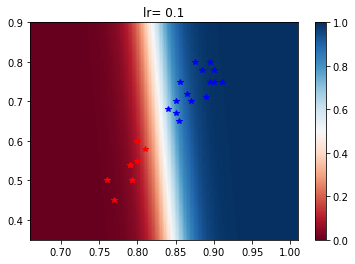

tensor(0.0123, grad_fn=<SelectBackward0>)
tensor([0.0123], grad_fn=<SigmoidBackward0>)
tensor(0.0128, grad_fn=<SelectBackward0>)
tensor([0.0128], grad_fn=<SigmoidBackward0>)
tensor(0.0134, grad_fn=<SelectBackward0>)
tensor([0.0134], grad_fn=<SigmoidBackward0>)
tensor(0.0140, grad_fn=<SelectBackward0>)
tensor([0.0140], grad_fn=<SigmoidBackward0>)
tensor(0.0147, grad_fn=<SelectBackward0>)
tensor([0.0147], grad_fn=<SigmoidBackward0>)
tensor(0.0154, grad_fn=<SelectBackward0>)
tensor([0.0154], grad_fn=<SigmoidBackward0>)
tensor(0.0161, grad_fn=<SelectBackward0>)
tensor([0.0161], grad_fn=<SigmoidBackward0>)
tensor(0.0168, grad_fn=<SelectBackward0>)
tensor([0.0168], grad_fn=<SigmoidBackward0>)
tensor(0.0176, grad_fn=<SelectBackward0>)
tensor([0.0176], grad_fn=<SigmoidBackward0>)
tensor(0.0184, grad_fn=<SelectBackward0>)
tensor([0.0184], grad_fn=<SigmoidBackward0>)
tensor(0.0193, grad_fn=<SelectBackward0>)
tensor([0.0193], grad_fn=<SigmoidBackward0>)
tensor(0.0201, grad_fn=<SelectBackward0>)
t

tensor([0.9234], grad_fn=<SigmoidBackward0>)
tensor(0.9266, grad_fn=<SelectBackward0>)
tensor([0.9266], grad_fn=<SigmoidBackward0>)
tensor(0.9297, grad_fn=<SelectBackward0>)
tensor([0.9297], grad_fn=<SigmoidBackward0>)
tensor(0.9326, grad_fn=<SelectBackward0>)
tensor([0.9326], grad_fn=<SigmoidBackward0>)
tensor(0.9354, grad_fn=<SelectBackward0>)
tensor([0.9354], grad_fn=<SigmoidBackward0>)
tensor(0.9382, grad_fn=<SelectBackward0>)
tensor([0.9382], grad_fn=<SigmoidBackward0>)
tensor(0.9408, grad_fn=<SelectBackward0>)
tensor([0.9408], grad_fn=<SigmoidBackward0>)
tensor(0.9433, grad_fn=<SelectBackward0>)
tensor([0.9433], grad_fn=<SigmoidBackward0>)
tensor(0.9457, grad_fn=<SelectBackward0>)
tensor([0.9457], grad_fn=<SigmoidBackward0>)
tensor(0.9480, grad_fn=<SelectBackward0>)
tensor([0.9480], grad_fn=<SigmoidBackward0>)
tensor(0.9502, grad_fn=<SelectBackward0>)
tensor([0.9502], grad_fn=<SigmoidBackward0>)
tensor(0.9523, grad_fn=<SelectBackward0>)
tensor([0.9523], grad_fn=<SigmoidBackward0>

tensor(0.5607, grad_fn=<SelectBackward0>)
tensor([0.5607], grad_fn=<SigmoidBackward0>)
tensor(0.5720, grad_fn=<SelectBackward0>)
tensor([0.5720], grad_fn=<SigmoidBackward0>)
tensor(0.5832, grad_fn=<SelectBackward0>)
tensor([0.5832], grad_fn=<SigmoidBackward0>)
tensor(0.5943, grad_fn=<SelectBackward0>)
tensor([0.5943], grad_fn=<SigmoidBackward0>)
tensor(0.6053, grad_fn=<SelectBackward0>)
tensor([0.6053], grad_fn=<SigmoidBackward0>)
tensor(0.6162, grad_fn=<SelectBackward0>)
tensor([0.6162], grad_fn=<SigmoidBackward0>)
tensor(0.6270, grad_fn=<SelectBackward0>)
tensor([0.6270], grad_fn=<SigmoidBackward0>)
tensor(0.6376, grad_fn=<SelectBackward0>)
tensor([0.6376], grad_fn=<SigmoidBackward0>)
tensor(0.6482, grad_fn=<SelectBackward0>)
tensor([0.6482], grad_fn=<SigmoidBackward0>)
tensor(0.6585, grad_fn=<SelectBackward0>)
tensor([0.6585], grad_fn=<SigmoidBackward0>)
tensor(0.6688, grad_fn=<SelectBackward0>)
tensor([0.6688], grad_fn=<SigmoidBackward0>)
tensor(0.6789, grad_fn=<SelectBackward0>)
t

tensor(0.0636, grad_fn=<SelectBackward0>)
tensor([0.0636], grad_fn=<SigmoidBackward0>)
tensor(0.0664, grad_fn=<SelectBackward0>)
tensor([0.0664], grad_fn=<SigmoidBackward0>)
tensor(0.0693, grad_fn=<SelectBackward0>)
tensor([0.0693], grad_fn=<SigmoidBackward0>)
tensor(0.0723, grad_fn=<SelectBackward0>)
tensor([0.0723], grad_fn=<SigmoidBackward0>)
tensor(0.0754, grad_fn=<SelectBackward0>)
tensor([0.0754], grad_fn=<SigmoidBackward0>)
tensor(0.0787, grad_fn=<SelectBackward0>)
tensor([0.0787], grad_fn=<SigmoidBackward0>)
tensor(0.0821, grad_fn=<SelectBackward0>)
tensor([0.0821], grad_fn=<SigmoidBackward0>)
tensor(0.0856, grad_fn=<SelectBackward0>)
tensor([0.0856], grad_fn=<SigmoidBackward0>)
tensor(0.0893, grad_fn=<SelectBackward0>)
tensor([0.0893], grad_fn=<SigmoidBackward0>)
tensor(0.0930, grad_fn=<SelectBackward0>)
tensor([0.0930], grad_fn=<SigmoidBackward0>)
tensor(0.0970, grad_fn=<SelectBackward0>)
tensor([0.0970], grad_fn=<SigmoidBackward0>)
tensor(0.1011, grad_fn=<SelectBackward0>)
t

tensor(0.9666, grad_fn=<SelectBackward0>)
tensor([0.9666], grad_fn=<SigmoidBackward0>)
tensor(0.9680, grad_fn=<SelectBackward0>)
tensor([0.9680], grad_fn=<SigmoidBackward0>)
tensor(0.9694, grad_fn=<SelectBackward0>)
tensor([0.9694], grad_fn=<SigmoidBackward0>)
tensor(0.9707, grad_fn=<SelectBackward0>)
tensor([0.9707], grad_fn=<SigmoidBackward0>)
tensor(0.9720, grad_fn=<SelectBackward0>)
tensor([0.9720], grad_fn=<SigmoidBackward0>)
tensor(0.9732, grad_fn=<SelectBackward0>)
tensor([0.9732], grad_fn=<SigmoidBackward0>)
tensor(0.9744, grad_fn=<SelectBackward0>)
tensor([0.9744], grad_fn=<SigmoidBackward0>)
tensor(0.9755, grad_fn=<SelectBackward0>)
tensor([0.9755], grad_fn=<SigmoidBackward0>)
tensor(0.9766, grad_fn=<SelectBackward0>)
tensor([0.9766], grad_fn=<SigmoidBackward0>)
tensor(0.9776, grad_fn=<SelectBackward0>)
tensor([0.9776], grad_fn=<SigmoidBackward0>)
tensor(0.9786, grad_fn=<SelectBackward0>)
tensor([0.9786], grad_fn=<SigmoidBackward0>)
tensor(0.9795, grad_fn=<SelectBackward0>)
t

tensor([0.5500], grad_fn=<SigmoidBackward0>)
tensor(0.5613, grad_fn=<SelectBackward0>)
tensor([0.5613], grad_fn=<SigmoidBackward0>)
tensor(0.5726, grad_fn=<SelectBackward0>)
tensor([0.5726], grad_fn=<SigmoidBackward0>)
tensor(0.5838, grad_fn=<SelectBackward0>)
tensor([0.5838], grad_fn=<SigmoidBackward0>)
tensor(0.5949, grad_fn=<SelectBackward0>)
tensor([0.5949], grad_fn=<SigmoidBackward0>)
tensor(0.6059, grad_fn=<SelectBackward0>)
tensor([0.6059], grad_fn=<SigmoidBackward0>)
tensor(0.6168, grad_fn=<SelectBackward0>)
tensor([0.6168], grad_fn=<SigmoidBackward0>)
tensor(0.6276, grad_fn=<SelectBackward0>)
tensor([0.6276], grad_fn=<SigmoidBackward0>)
tensor(0.6382, grad_fn=<SelectBackward0>)
tensor([0.6382], grad_fn=<SigmoidBackward0>)
tensor(0.6487, grad_fn=<SelectBackward0>)
tensor([0.6487], grad_fn=<SigmoidBackward0>)
tensor(0.6591, grad_fn=<SelectBackward0>)
tensor([0.6591], grad_fn=<SigmoidBackward0>)
tensor(0.6693, grad_fn=<SelectBackward0>)
tensor([0.6693], grad_fn=<SigmoidBackward0>

tensor(0.1902, grad_fn=<SelectBackward0>)
tensor([0.1902], grad_fn=<SigmoidBackward0>)
tensor(0.1973, grad_fn=<SelectBackward0>)
tensor([0.1973], grad_fn=<SigmoidBackward0>)
tensor(0.2047, grad_fn=<SelectBackward0>)
tensor([0.2047], grad_fn=<SigmoidBackward0>)
tensor(0.2123, grad_fn=<SelectBackward0>)
tensor([0.2123], grad_fn=<SigmoidBackward0>)
tensor(0.2200, grad_fn=<SelectBackward0>)
tensor([0.2200], grad_fn=<SigmoidBackward0>)
tensor(0.2280, grad_fn=<SelectBackward0>)
tensor([0.2280], grad_fn=<SigmoidBackward0>)
tensor(0.2362, grad_fn=<SelectBackward0>)
tensor([0.2362], grad_fn=<SigmoidBackward0>)
tensor(0.2445, grad_fn=<SelectBackward0>)
tensor([0.2445], grad_fn=<SigmoidBackward0>)
tensor(0.2531, grad_fn=<SelectBackward0>)
tensor([0.2531], grad_fn=<SigmoidBackward0>)
tensor(0.2619, grad_fn=<SelectBackward0>)
tensor([0.2619], grad_fn=<SigmoidBackward0>)
tensor(0.2708, grad_fn=<SelectBackward0>)
tensor([0.2708], grad_fn=<SigmoidBackward0>)
tensor(0.2800, grad_fn=<SelectBackward0>)
t

tensor(0.0317, grad_fn=<SelectBackward0>)
tensor([0.0317], grad_fn=<SigmoidBackward0>)
tensor(0.0331, grad_fn=<SelectBackward0>)
tensor([0.0331], grad_fn=<SigmoidBackward0>)
tensor(0.0346, grad_fn=<SelectBackward0>)
tensor([0.0346], grad_fn=<SigmoidBackward0>)
tensor(0.0362, grad_fn=<SelectBackward0>)
tensor([0.0362], grad_fn=<SigmoidBackward0>)
tensor(0.0378, grad_fn=<SelectBackward0>)
tensor([0.0378], grad_fn=<SigmoidBackward0>)
tensor(0.0395, grad_fn=<SelectBackward0>)
tensor([0.0395], grad_fn=<SigmoidBackward0>)
tensor(0.0413, grad_fn=<SelectBackward0>)
tensor([0.0413], grad_fn=<SigmoidBackward0>)
tensor(0.0432, grad_fn=<SelectBackward0>)
tensor([0.0432], grad_fn=<SigmoidBackward0>)
tensor(0.0451, grad_fn=<SelectBackward0>)
tensor([0.0451], grad_fn=<SigmoidBackward0>)
tensor(0.0471, grad_fn=<SelectBackward0>)
tensor([0.0471], grad_fn=<SigmoidBackward0>)
tensor(0.0492, grad_fn=<SelectBackward0>)
tensor([0.0492], grad_fn=<SigmoidBackward0>)
tensor(0.0514, grad_fn=<SelectBackward0>)
t

tensor(0.9844, grad_fn=<SelectBackward0>)
tensor([0.9844], grad_fn=<SigmoidBackward0>)
tensor(0.9851, grad_fn=<SelectBackward0>)
tensor([0.9851], grad_fn=<SigmoidBackward0>)
tensor(0.9858, grad_fn=<SelectBackward0>)
tensor([0.9858], grad_fn=<SigmoidBackward0>)
tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9870, grad_fn=<SelectBackward0>)
tensor([0.9870], grad_fn=<SigmoidBackward0>)
tensor(0.9876, grad_fn=<SelectBackward0>)
tensor([0.9876], grad_fn=<SigmoidBackward0>)
tensor(0.9881, grad_fn=<SelectBackward0>)
tensor([0.9881], grad_fn=<SigmoidBackward0>)
tensor(0.9887, grad_fn=<SelectBackward0>)
tensor([0.9887], grad_fn=<SigmoidBackward0>)
tensor(0.9892, grad_fn=<SelectBackward0>)
tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9896, grad_fn=<SelectBackward0>)
tensor([0.9896], grad_fn=<SigmoidBackward0>)
tensor(0.9901, grad_fn=<SelectBackward0>)
tensor([0.9901], grad_fn=<SigmoidBackward0>)
tensor(0.9905, grad_fn=<SelectBackward0>)
t

tensor(0.9302, grad_fn=<SelectBackward0>)
tensor([0.9302], grad_fn=<SigmoidBackward0>)
tensor(0.9331, grad_fn=<SelectBackward0>)
tensor([0.9331], grad_fn=<SigmoidBackward0>)
tensor(0.9359, grad_fn=<SelectBackward0>)
tensor([0.9359], grad_fn=<SigmoidBackward0>)
tensor(0.9386, grad_fn=<SelectBackward0>)
tensor([0.9386], grad_fn=<SigmoidBackward0>)
tensor(0.9412, grad_fn=<SelectBackward0>)
tensor([0.9412], grad_fn=<SigmoidBackward0>)
tensor(0.9437, grad_fn=<SelectBackward0>)
tensor([0.9437], grad_fn=<SigmoidBackward0>)
tensor(0.9461, grad_fn=<SelectBackward0>)
tensor([0.9461], grad_fn=<SigmoidBackward0>)
tensor(0.9483, grad_fn=<SelectBackward0>)
tensor([0.9483], grad_fn=<SigmoidBackward0>)
tensor(0.9505, grad_fn=<SelectBackward0>)
tensor([0.9505], grad_fn=<SigmoidBackward0>)
tensor(0.9527, grad_fn=<SelectBackward0>)
tensor([0.9527], grad_fn=<SigmoidBackward0>)
tensor(0.9547, grad_fn=<SelectBackward0>)
tensor([0.9547], grad_fn=<SigmoidBackward0>)
tensor(0.9566, grad_fn=<SelectBackward0>)
t

tensor([0.7282], grad_fn=<SigmoidBackward0>)
tensor(0.7372, grad_fn=<SelectBackward0>)
tensor([0.7372], grad_fn=<SigmoidBackward0>)
tensor(0.7459, grad_fn=<SelectBackward0>)
tensor([0.7459], grad_fn=<SigmoidBackward0>)
tensor(0.7545, grad_fn=<SelectBackward0>)
tensor([0.7545], grad_fn=<SigmoidBackward0>)
tensor(0.7629, grad_fn=<SelectBackward0>)
tensor([0.7629], grad_fn=<SigmoidBackward0>)
tensor(0.7711, grad_fn=<SelectBackward0>)
tensor([0.7711], grad_fn=<SigmoidBackward0>)
tensor(0.7791, grad_fn=<SelectBackward0>)
tensor([0.7791], grad_fn=<SigmoidBackward0>)
tensor(0.7869, grad_fn=<SelectBackward0>)
tensor([0.7869], grad_fn=<SigmoidBackward0>)
tensor(0.7945, grad_fn=<SelectBackward0>)
tensor([0.7945], grad_fn=<SigmoidBackward0>)
tensor(0.8019, grad_fn=<SelectBackward0>)
tensor([0.8019], grad_fn=<SigmoidBackward0>)
tensor(0.8091, grad_fn=<SelectBackward0>)
tensor([0.8091], grad_fn=<SigmoidBackward0>)
tensor(0.8161, grad_fn=<SelectBackward0>)
tensor([0.8161], grad_fn=<SigmoidBackward0>

tensor([0.3096], grad_fn=<SigmoidBackward0>)
tensor(0.3195, grad_fn=<SelectBackward0>)
tensor([0.3195], grad_fn=<SigmoidBackward0>)
tensor(0.3296, grad_fn=<SelectBackward0>)
tensor([0.3296], grad_fn=<SigmoidBackward0>)
tensor(0.3398, grad_fn=<SelectBackward0>)
tensor([0.3398], grad_fn=<SigmoidBackward0>)
tensor(0.3501, grad_fn=<SelectBackward0>)
tensor([0.3501], grad_fn=<SigmoidBackward0>)
tensor(0.3606, grad_fn=<SelectBackward0>)
tensor([0.3606], grad_fn=<SigmoidBackward0>)
tensor(0.3713, grad_fn=<SelectBackward0>)
tensor([0.3713], grad_fn=<SigmoidBackward0>)
tensor(0.3820, grad_fn=<SelectBackward0>)
tensor([0.3820], grad_fn=<SigmoidBackward0>)
tensor(0.3929, grad_fn=<SelectBackward0>)
tensor([0.3929], grad_fn=<SigmoidBackward0>)
tensor(0.4039, grad_fn=<SelectBackward0>)
tensor([0.4039], grad_fn=<SigmoidBackward0>)
tensor(0.4150, grad_fn=<SelectBackward0>)
tensor([0.4150], grad_fn=<SigmoidBackward0>)
tensor(0.4262, grad_fn=<SelectBackward0>)
tensor([0.4262], grad_fn=<SigmoidBackward0>

tensor(0.0588, grad_fn=<SelectBackward0>)
tensor([0.0588], grad_fn=<SigmoidBackward0>)
tensor(0.0614, grad_fn=<SelectBackward0>)
tensor([0.0614], grad_fn=<SigmoidBackward0>)
tensor(0.0641, grad_fn=<SelectBackward0>)
tensor([0.0641], grad_fn=<SigmoidBackward0>)
tensor(0.0669, grad_fn=<SelectBackward0>)
tensor([0.0669], grad_fn=<SigmoidBackward0>)
tensor(0.0698, grad_fn=<SelectBackward0>)
tensor([0.0698], grad_fn=<SigmoidBackward0>)
tensor(0.0729, grad_fn=<SelectBackward0>)
tensor([0.0729], grad_fn=<SigmoidBackward0>)
tensor(0.0760, grad_fn=<SelectBackward0>)
tensor([0.0760], grad_fn=<SigmoidBackward0>)
tensor(0.0793, grad_fn=<SelectBackward0>)
tensor([0.0793], grad_fn=<SigmoidBackward0>)
tensor(0.0827, grad_fn=<SelectBackward0>)
tensor([0.0827], grad_fn=<SigmoidBackward0>)
tensor(0.0863, grad_fn=<SelectBackward0>)
tensor([0.0863], grad_fn=<SigmoidBackward0>)
tensor(0.0900, grad_fn=<SelectBackward0>)
tensor([0.0900], grad_fn=<SigmoidBackward0>)
tensor(0.0938, grad_fn=<SelectBackward0>)
t

tensor(0.0124, grad_fn=<SelectBackward0>)
tensor([0.0124], grad_fn=<SigmoidBackward0>)
tensor(0.0130, grad_fn=<SelectBackward0>)
tensor([0.0130], grad_fn=<SigmoidBackward0>)
tensor(0.0136, grad_fn=<SelectBackward0>)
tensor([0.0136], grad_fn=<SigmoidBackward0>)
tensor(0.0142, grad_fn=<SelectBackward0>)
tensor([0.0142], grad_fn=<SigmoidBackward0>)
tensor(0.0149, grad_fn=<SelectBackward0>)
tensor([0.0149], grad_fn=<SigmoidBackward0>)
tensor(0.0156, grad_fn=<SelectBackward0>)
tensor([0.0156], grad_fn=<SigmoidBackward0>)
tensor(0.0163, grad_fn=<SelectBackward0>)
tensor([0.0163], grad_fn=<SigmoidBackward0>)
tensor(0.0170, grad_fn=<SelectBackward0>)
tensor([0.0170], grad_fn=<SigmoidBackward0>)
tensor(0.0178, grad_fn=<SelectBackward0>)
tensor([0.0178], grad_fn=<SigmoidBackward0>)
tensor(0.0186, grad_fn=<SelectBackward0>)
tensor([0.0186], grad_fn=<SigmoidBackward0>)
tensor(0.0195, grad_fn=<SelectBackward0>)
tensor([0.0195], grad_fn=<SigmoidBackward0>)
tensor(0.0204, grad_fn=<SelectBackward0>)
t

tensor([0.9486], grad_fn=<SigmoidBackward0>)
tensor(0.9508, grad_fn=<SelectBackward0>)
tensor([0.9508], grad_fn=<SigmoidBackward0>)
tensor(0.9529, grad_fn=<SelectBackward0>)
tensor([0.9529], grad_fn=<SigmoidBackward0>)
tensor(0.9549, grad_fn=<SelectBackward0>)
tensor([0.9549], grad_fn=<SigmoidBackward0>)
tensor(0.9568, grad_fn=<SelectBackward0>)
tensor([0.9568], grad_fn=<SigmoidBackward0>)
tensor(0.9587, grad_fn=<SelectBackward0>)
tensor([0.9587], grad_fn=<SigmoidBackward0>)
tensor(0.9605, grad_fn=<SelectBackward0>)
tensor([0.9605], grad_fn=<SigmoidBackward0>)
tensor(0.9622, grad_fn=<SelectBackward0>)
tensor([0.9622], grad_fn=<SigmoidBackward0>)
tensor(0.9638, grad_fn=<SelectBackward0>)
tensor([0.9638], grad_fn=<SigmoidBackward0>)
tensor(0.9654, grad_fn=<SelectBackward0>)
tensor([0.9654], grad_fn=<SigmoidBackward0>)
tensor(0.9669, grad_fn=<SelectBackward0>)
tensor([0.9669], grad_fn=<SigmoidBackward0>)
tensor(0.9683, grad_fn=<SelectBackward0>)
tensor([0.9683], grad_fn=<SigmoidBackward0>

tensor([0.7800], grad_fn=<SigmoidBackward0>)
tensor(0.7878, grad_fn=<SelectBackward0>)
tensor([0.7878], grad_fn=<SigmoidBackward0>)
tensor(0.7953, grad_fn=<SelectBackward0>)
tensor([0.7953], grad_fn=<SigmoidBackward0>)
tensor(0.8027, grad_fn=<SelectBackward0>)
tensor([0.8027], grad_fn=<SigmoidBackward0>)
tensor(0.8098, grad_fn=<SelectBackward0>)
tensor([0.8098], grad_fn=<SigmoidBackward0>)
tensor(0.8168, grad_fn=<SelectBackward0>)
tensor([0.8168], grad_fn=<SigmoidBackward0>)
tensor(0.8236, grad_fn=<SelectBackward0>)
tensor([0.8236], grad_fn=<SigmoidBackward0>)
tensor(0.8301, grad_fn=<SelectBackward0>)
tensor([0.8301], grad_fn=<SigmoidBackward0>)
tensor(0.8365, grad_fn=<SelectBackward0>)
tensor([0.8365], grad_fn=<SigmoidBackward0>)
tensor(0.8427, grad_fn=<SelectBackward0>)
tensor([0.8427], grad_fn=<SigmoidBackward0>)
tensor(0.8487, grad_fn=<SelectBackward0>)
tensor([0.8487], grad_fn=<SigmoidBackward0>)
tensor(0.8545, grad_fn=<SelectBackward0>)
tensor([0.8545], grad_fn=<SigmoidBackward0>

tensor(0.4614, grad_fn=<SelectBackward0>)
tensor([0.4614], grad_fn=<SigmoidBackward0>)
tensor(0.4728, grad_fn=<SelectBackward0>)
tensor([0.4728], grad_fn=<SigmoidBackward0>)
tensor(0.4842, grad_fn=<SelectBackward0>)
tensor([0.4842], grad_fn=<SigmoidBackward0>)
tensor(0.4957, grad_fn=<SelectBackward0>)
tensor([0.4957], grad_fn=<SigmoidBackward0>)
tensor(0.5072, grad_fn=<SelectBackward0>)
tensor([0.5072], grad_fn=<SigmoidBackward0>)
tensor(0.5186, grad_fn=<SelectBackward0>)
tensor([0.5186], grad_fn=<SigmoidBackward0>)
tensor(0.5300, grad_fn=<SelectBackward0>)
tensor([0.5300], grad_fn=<SigmoidBackward0>)
tensor(0.5415, grad_fn=<SelectBackward0>)
tensor([0.5415], grad_fn=<SigmoidBackward0>)
tensor(0.5528, grad_fn=<SelectBackward0>)
tensor([0.5528], grad_fn=<SigmoidBackward0>)
tensor(0.5641, grad_fn=<SelectBackward0>)
tensor([0.5641], grad_fn=<SigmoidBackward0>)
tensor(0.5754, grad_fn=<SelectBackward0>)
tensor([0.5754], grad_fn=<SigmoidBackward0>)
tensor(0.5865, grad_fn=<SelectBackward0>)
t

tensor([0.1157], grad_fn=<SigmoidBackward0>)
tensor(0.1205, grad_fn=<SelectBackward0>)
tensor([0.1205], grad_fn=<SigmoidBackward0>)
tensor(0.1254, grad_fn=<SelectBackward0>)
tensor([0.1254], grad_fn=<SigmoidBackward0>)
tensor(0.1305, grad_fn=<SelectBackward0>)
tensor([0.1305], grad_fn=<SigmoidBackward0>)
tensor(0.1358, grad_fn=<SelectBackward0>)
tensor([0.1358], grad_fn=<SigmoidBackward0>)
tensor(0.1413, grad_fn=<SelectBackward0>)
tensor([0.1413], grad_fn=<SigmoidBackward0>)
tensor(0.1470, grad_fn=<SelectBackward0>)
tensor([0.1470], grad_fn=<SigmoidBackward0>)
tensor(0.1528, grad_fn=<SelectBackward0>)
tensor([0.1528], grad_fn=<SigmoidBackward0>)
tensor(0.1588, grad_fn=<SelectBackward0>)
tensor([0.1588], grad_fn=<SigmoidBackward0>)
tensor(0.1651, grad_fn=<SelectBackward0>)
tensor([0.1651], grad_fn=<SigmoidBackward0>)
tensor(0.1715, grad_fn=<SelectBackward0>)
tensor([0.1715], grad_fn=<SigmoidBackward0>)
tensor(0.1781, grad_fn=<SelectBackward0>)
tensor([0.1781], grad_fn=<SigmoidBackward0>

tensor(0.9865, grad_fn=<SelectBackward0>)
tensor([0.9865], grad_fn=<SigmoidBackward0>)
tensor(0.9871, grad_fn=<SelectBackward0>)
tensor([0.9871], grad_fn=<SigmoidBackward0>)
tensor(0.9877, grad_fn=<SelectBackward0>)
tensor([0.9877], grad_fn=<SigmoidBackward0>)
tensor(0.9883, grad_fn=<SelectBackward0>)
tensor([0.9883], grad_fn=<SigmoidBackward0>)
tensor(0.9888, grad_fn=<SelectBackward0>)
tensor([0.9888], grad_fn=<SigmoidBackward0>)
tensor(0.9893, grad_fn=<SelectBackward0>)
tensor([0.9893], grad_fn=<SigmoidBackward0>)
tensor(0.9897, grad_fn=<SelectBackward0>)
tensor([0.9897], grad_fn=<SigmoidBackward0>)
tensor(0.9902, grad_fn=<SelectBackward0>)
tensor([0.9902], grad_fn=<SigmoidBackward0>)
tensor(0.9906, grad_fn=<SelectBackward0>)
tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.0125, grad_fn=<SelectBackward0>)
t

tensor(0.8948, grad_fn=<SelectBackward0>)
tensor([0.8948], grad_fn=<SigmoidBackward0>)
tensor(0.8990, grad_fn=<SelectBackward0>)
tensor([0.8990], grad_fn=<SigmoidBackward0>)
tensor(0.9031, grad_fn=<SelectBackward0>)
tensor([0.9031], grad_fn=<SigmoidBackward0>)
tensor(0.9071, grad_fn=<SelectBackward0>)
tensor([0.9071], grad_fn=<SigmoidBackward0>)
tensor(0.9109, grad_fn=<SelectBackward0>)
tensor([0.9109], grad_fn=<SigmoidBackward0>)
tensor(0.9145, grad_fn=<SelectBackward0>)
tensor([0.9145], grad_fn=<SigmoidBackward0>)
tensor(0.9180, grad_fn=<SelectBackward0>)
tensor([0.9180], grad_fn=<SigmoidBackward0>)
tensor(0.9214, grad_fn=<SelectBackward0>)
tensor([0.9214], grad_fn=<SigmoidBackward0>)
tensor(0.9247, grad_fn=<SelectBackward0>)
tensor([0.9247], grad_fn=<SigmoidBackward0>)
tensor(0.9278, grad_fn=<SelectBackward0>)
tensor([0.9278], grad_fn=<SigmoidBackward0>)
tensor(0.9308, grad_fn=<SelectBackward0>)
tensor([0.9308], grad_fn=<SigmoidBackward0>)
tensor(0.9337, grad_fn=<SelectBackward0>)
t

tensor([0.3950], grad_fn=<SigmoidBackward0>)
tensor(0.4060, grad_fn=<SelectBackward0>)
tensor([0.4060], grad_fn=<SigmoidBackward0>)
tensor(0.4172, grad_fn=<SelectBackward0>)
tensor([0.4172], grad_fn=<SigmoidBackward0>)
tensor(0.4283, grad_fn=<SelectBackward0>)
tensor([0.4283], grad_fn=<SigmoidBackward0>)
tensor(0.4396, grad_fn=<SelectBackward0>)
tensor([0.4396], grad_fn=<SigmoidBackward0>)
tensor(0.4509, grad_fn=<SelectBackward0>)
tensor([0.4509], grad_fn=<SigmoidBackward0>)
tensor(0.4623, grad_fn=<SelectBackward0>)
tensor([0.4623], grad_fn=<SigmoidBackward0>)
tensor(0.4737, grad_fn=<SelectBackward0>)
tensor([0.4737], grad_fn=<SigmoidBackward0>)
tensor(0.4852, grad_fn=<SelectBackward0>)
tensor([0.4852], grad_fn=<SigmoidBackward0>)
tensor(0.4966, grad_fn=<SelectBackward0>)
tensor([0.4966], grad_fn=<SigmoidBackward0>)
tensor(0.5081, grad_fn=<SelectBackward0>)
tensor([0.5081], grad_fn=<SigmoidBackward0>)
tensor(0.5196, grad_fn=<SelectBackward0>)
tensor([0.5196], grad_fn=<SigmoidBackward0>

tensor([0.1115], grad_fn=<SigmoidBackward0>)
tensor(0.1161, grad_fn=<SelectBackward0>)
tensor([0.1161], grad_fn=<SigmoidBackward0>)
tensor(0.1209, grad_fn=<SelectBackward0>)
tensor([0.1209], grad_fn=<SigmoidBackward0>)
tensor(0.1258, grad_fn=<SelectBackward0>)
tensor([0.1258], grad_fn=<SigmoidBackward0>)
tensor(0.1310, grad_fn=<SelectBackward0>)
tensor([0.1310], grad_fn=<SigmoidBackward0>)
tensor(0.1363, grad_fn=<SelectBackward0>)
tensor([0.1363], grad_fn=<SigmoidBackward0>)
tensor(0.1418, grad_fn=<SelectBackward0>)
tensor([0.1418], grad_fn=<SigmoidBackward0>)
tensor(0.1474, grad_fn=<SelectBackward0>)
tensor([0.1474], grad_fn=<SigmoidBackward0>)
tensor(0.1533, grad_fn=<SelectBackward0>)
tensor([0.1533], grad_fn=<SigmoidBackward0>)
tensor(0.1593, grad_fn=<SelectBackward0>)
tensor([0.1593], grad_fn=<SigmoidBackward0>)
tensor(0.1656, grad_fn=<SelectBackward0>)
tensor([0.1656], grad_fn=<SigmoidBackward0>)
tensor(0.1720, grad_fn=<SelectBackward0>)
tensor([0.1720], grad_fn=<SigmoidBackward0>

tensor(0.0281, grad_fn=<SelectBackward0>)
tensor([0.0281], grad_fn=<SigmoidBackward0>)
tensor(0.0294, grad_fn=<SelectBackward0>)
tensor([0.0294], grad_fn=<SigmoidBackward0>)
tensor(0.0308, grad_fn=<SelectBackward0>)
tensor([0.0308], grad_fn=<SigmoidBackward0>)
tensor(0.0322, grad_fn=<SelectBackward0>)
tensor([0.0322], grad_fn=<SigmoidBackward0>)
tensor(0.0336, grad_fn=<SelectBackward0>)
tensor([0.0336], grad_fn=<SigmoidBackward0>)
tensor(0.0351, grad_fn=<SelectBackward0>)
tensor([0.0351], grad_fn=<SigmoidBackward0>)
tensor(0.0367, grad_fn=<SelectBackward0>)
tensor([0.0367], grad_fn=<SigmoidBackward0>)
tensor(0.0384, grad_fn=<SelectBackward0>)
tensor([0.0384], grad_fn=<SigmoidBackward0>)
tensor(0.0401, grad_fn=<SelectBackward0>)
tensor([0.0401], grad_fn=<SigmoidBackward0>)
tensor(0.0419, grad_fn=<SelectBackward0>)
tensor([0.0419], grad_fn=<SigmoidBackward0>)
tensor(0.0438, grad_fn=<SelectBackward0>)
tensor([0.0438], grad_fn=<SigmoidBackward0>)
tensor(0.0458, grad_fn=<SelectBackward0>)
t

tensor(0.9444, grad_fn=<SelectBackward0>)
tensor([0.9444], grad_fn=<SigmoidBackward0>)
tensor(0.9468, grad_fn=<SelectBackward0>)
tensor([0.9468], grad_fn=<SigmoidBackward0>)
tensor(0.9490, grad_fn=<SelectBackward0>)
tensor([0.9490], grad_fn=<SigmoidBackward0>)
tensor(0.9512, grad_fn=<SelectBackward0>)
tensor([0.9512], grad_fn=<SigmoidBackward0>)
tensor(0.9533, grad_fn=<SelectBackward0>)
tensor([0.9533], grad_fn=<SigmoidBackward0>)
tensor(0.9553, grad_fn=<SelectBackward0>)
tensor([0.9553], grad_fn=<SigmoidBackward0>)
tensor(0.9572, grad_fn=<SelectBackward0>)
tensor([0.9572], grad_fn=<SigmoidBackward0>)
tensor(0.9590, grad_fn=<SelectBackward0>)
tensor([0.9590], grad_fn=<SigmoidBackward0>)
tensor(0.9608, grad_fn=<SelectBackward0>)
tensor([0.9608], grad_fn=<SigmoidBackward0>)
tensor(0.9625, grad_fn=<SelectBackward0>)
tensor([0.9625], grad_fn=<SigmoidBackward0>)
tensor(0.9641, grad_fn=<SelectBackward0>)
tensor([0.9641], grad_fn=<SigmoidBackward0>)
tensor(0.9657, grad_fn=<SelectBackward0>)
t

tensor([0.3123], grad_fn=<SigmoidBackward0>)
tensor(0.3223, grad_fn=<SelectBackward0>)
tensor([0.3223], grad_fn=<SigmoidBackward0>)
tensor(0.3323, grad_fn=<SelectBackward0>)
tensor([0.3323], grad_fn=<SigmoidBackward0>)
tensor(0.3426, grad_fn=<SelectBackward0>)
tensor([0.3426], grad_fn=<SigmoidBackward0>)
tensor(0.3530, grad_fn=<SelectBackward0>)
tensor([0.3530], grad_fn=<SigmoidBackward0>)
tensor(0.3635, grad_fn=<SelectBackward0>)
tensor([0.3635], grad_fn=<SigmoidBackward0>)
tensor(0.3742, grad_fn=<SelectBackward0>)
tensor([0.3742], grad_fn=<SigmoidBackward0>)
tensor(0.3850, grad_fn=<SelectBackward0>)
tensor([0.3850], grad_fn=<SigmoidBackward0>)
tensor(0.3959, grad_fn=<SelectBackward0>)
tensor([0.3959], grad_fn=<SigmoidBackward0>)
tensor(0.4070, grad_fn=<SelectBackward0>)
tensor([0.4070], grad_fn=<SigmoidBackward0>)
tensor(0.4181, grad_fn=<SelectBackward0>)
tensor([0.4181], grad_fn=<SigmoidBackward0>)
tensor(0.4293, grad_fn=<SelectBackward0>)
tensor([0.4293], grad_fn=<SigmoidBackward0>

tensor([0.0837], grad_fn=<SigmoidBackward0>)
tensor(0.0873, grad_fn=<SelectBackward0>)
tensor([0.0873], grad_fn=<SigmoidBackward0>)
tensor(0.0910, grad_fn=<SelectBackward0>)
tensor([0.0910], grad_fn=<SigmoidBackward0>)
tensor(0.0949, grad_fn=<SelectBackward0>)
tensor([0.0949], grad_fn=<SigmoidBackward0>)
tensor(0.0989, grad_fn=<SelectBackward0>)
tensor([0.0989], grad_fn=<SigmoidBackward0>)
tensor(0.1030, grad_fn=<SelectBackward0>)
tensor([0.1030], grad_fn=<SigmoidBackward0>)
tensor(0.1074, grad_fn=<SelectBackward0>)
tensor([0.1074], grad_fn=<SigmoidBackward0>)
tensor(0.1118, grad_fn=<SelectBackward0>)
tensor([0.1118], grad_fn=<SigmoidBackward0>)
tensor(0.1165, grad_fn=<SelectBackward0>)
tensor([0.1165], grad_fn=<SigmoidBackward0>)
tensor(0.1213, grad_fn=<SelectBackward0>)
tensor([0.1213], grad_fn=<SigmoidBackward0>)
tensor(0.1263, grad_fn=<SelectBackward0>)
tensor([0.1263], grad_fn=<SigmoidBackward0>)
tensor(0.1314, grad_fn=<SelectBackward0>)
tensor([0.1314], grad_fn=<SigmoidBackward0>

tensor([0.9883], grad_fn=<SigmoidBackward0>)
tensor(0.9889, grad_fn=<SelectBackward0>)
tensor([0.9889], grad_fn=<SigmoidBackward0>)
tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9898, grad_fn=<SelectBackward0>)
tensor([0.9898], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9907, grad_fn=<SelectBackward0>)
tensor([0.9907], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.0126, grad_fn=<SelectBackward0>)
tensor([0.0126], grad_fn=<SigmoidBackward0>)
tensor(0.0132, grad_fn=<SelectBackward0>)
tensor([0.0132], grad_fn=<SigmoidBackward0>)
tensor(0.0138, grad_fn=<SelectBackward0>)
tensor([0.0138], grad_fn=<SigmoidBackward0>)
tensor(0.0144, grad_fn=<SelectBackward0>)
tensor([0.0144], grad_fn=<SigmoidBackward0>

tensor(0.9186, grad_fn=<SelectBackward0>)
tensor([0.9186], grad_fn=<SigmoidBackward0>)
tensor(0.9220, grad_fn=<SelectBackward0>)
tensor([0.9220], grad_fn=<SigmoidBackward0>)
tensor(0.9252, grad_fn=<SelectBackward0>)
tensor([0.9252], grad_fn=<SigmoidBackward0>)
tensor(0.9283, grad_fn=<SelectBackward0>)
tensor([0.9283], grad_fn=<SigmoidBackward0>)
tensor(0.9313, grad_fn=<SelectBackward0>)
tensor([0.9313], grad_fn=<SigmoidBackward0>)
tensor(0.9342, grad_fn=<SelectBackward0>)
tensor([0.9342], grad_fn=<SigmoidBackward0>)
tensor(0.9369, grad_fn=<SelectBackward0>)
tensor([0.9369], grad_fn=<SigmoidBackward0>)
tensor(0.9396, grad_fn=<SelectBackward0>)
tensor([0.9396], grad_fn=<SigmoidBackward0>)
tensor(0.9421, grad_fn=<SelectBackward0>)
tensor([0.9421], grad_fn=<SigmoidBackward0>)
tensor(0.9446, grad_fn=<SelectBackward0>)
tensor([0.9446], grad_fn=<SigmoidBackward0>)
tensor(0.9469, grad_fn=<SelectBackward0>)
tensor([0.9469], grad_fn=<SigmoidBackward0>)
tensor(0.9492, grad_fn=<SelectBackward0>)
t

tensor(0.6941, grad_fn=<SelectBackward0>)
tensor([0.6941], grad_fn=<SigmoidBackward0>)
tensor(0.7038, grad_fn=<SelectBackward0>)
tensor([0.7038], grad_fn=<SigmoidBackward0>)
tensor(0.7133, grad_fn=<SelectBackward0>)
tensor([0.7133], grad_fn=<SigmoidBackward0>)
tensor(0.7225, grad_fn=<SelectBackward0>)
tensor([0.7225], grad_fn=<SigmoidBackward0>)
tensor(0.7316, grad_fn=<SelectBackward0>)
tensor([0.7316], grad_fn=<SigmoidBackward0>)
tensor(0.7406, grad_fn=<SelectBackward0>)
tensor([0.7406], grad_fn=<SigmoidBackward0>)
tensor(0.7493, grad_fn=<SelectBackward0>)
tensor([0.7493], grad_fn=<SigmoidBackward0>)
tensor(0.7578, grad_fn=<SelectBackward0>)
tensor([0.7578], grad_fn=<SigmoidBackward0>)
tensor(0.7661, grad_fn=<SelectBackward0>)
tensor([0.7661], grad_fn=<SigmoidBackward0>)
tensor(0.7742, grad_fn=<SelectBackward0>)
tensor([0.7742], grad_fn=<SigmoidBackward0>)
tensor(0.7821, grad_fn=<SelectBackward0>)
tensor([0.7821], grad_fn=<SigmoidBackward0>)
tensor(0.7898, grad_fn=<SelectBackward0>)
t

tensor(0.1731, grad_fn=<SelectBackward0>)
tensor([0.1731], grad_fn=<SigmoidBackward0>)
tensor(0.1798, grad_fn=<SelectBackward0>)
tensor([0.1798], grad_fn=<SigmoidBackward0>)
tensor(0.1866, grad_fn=<SelectBackward0>)
tensor([0.1866], grad_fn=<SigmoidBackward0>)
tensor(0.1937, grad_fn=<SelectBackward0>)
tensor([0.1937], grad_fn=<SigmoidBackward0>)
tensor(0.2009, grad_fn=<SelectBackward0>)
tensor([0.2009], grad_fn=<SigmoidBackward0>)
tensor(0.2084, grad_fn=<SelectBackward0>)
tensor([0.2084], grad_fn=<SigmoidBackward0>)
tensor(0.2161, grad_fn=<SelectBackward0>)
tensor([0.2161], grad_fn=<SigmoidBackward0>)
tensor(0.2239, grad_fn=<SelectBackward0>)
tensor([0.2239], grad_fn=<SigmoidBackward0>)
tensor(0.2320, grad_fn=<SelectBackward0>)
tensor([0.2320], grad_fn=<SigmoidBackward0>)
tensor(0.2403, grad_fn=<SelectBackward0>)
tensor([0.2403], grad_fn=<SigmoidBackward0>)
tensor(0.2488, grad_fn=<SelectBackward0>)
tensor([0.2488], grad_fn=<SigmoidBackward0>)
tensor(0.2574, grad_fn=<SelectBackward0>)
t

tensor(0.0370, grad_fn=<SelectBackward0>)
tensor([0.0370], grad_fn=<SigmoidBackward0>)
tensor(0.0387, grad_fn=<SelectBackward0>)
tensor([0.0387], grad_fn=<SigmoidBackward0>)
tensor(0.0404, grad_fn=<SelectBackward0>)
tensor([0.0404], grad_fn=<SigmoidBackward0>)
tensor(0.0422, grad_fn=<SelectBackward0>)
tensor([0.0422], grad_fn=<SigmoidBackward0>)
tensor(0.0441, grad_fn=<SelectBackward0>)
tensor([0.0441], grad_fn=<SigmoidBackward0>)
tensor(0.0461, grad_fn=<SelectBackward0>)
tensor([0.0461], grad_fn=<SigmoidBackward0>)
tensor(0.0481, grad_fn=<SelectBackward0>)
tensor([0.0481], grad_fn=<SigmoidBackward0>)
tensor(0.0503, grad_fn=<SelectBackward0>)
tensor([0.0503], grad_fn=<SigmoidBackward0>)
tensor(0.0525, grad_fn=<SelectBackward0>)
tensor([0.0525], grad_fn=<SigmoidBackward0>)
tensor(0.0549, grad_fn=<SelectBackward0>)
tensor([0.0549], grad_fn=<SigmoidBackward0>)
tensor(0.0573, grad_fn=<SelectBackward0>)
tensor([0.0573], grad_fn=<SigmoidBackward0>)
tensor(0.0598, grad_fn=<SelectBackward0>)
t

tensor(0.9855, grad_fn=<SelectBackward0>)
tensor([0.9855], grad_fn=<SigmoidBackward0>)
tensor(0.9861, grad_fn=<SelectBackward0>)
tensor([0.9861], grad_fn=<SigmoidBackward0>)
tensor(0.9867, grad_fn=<SelectBackward0>)
tensor([0.9867], grad_fn=<SigmoidBackward0>)
tensor(0.9873, grad_fn=<SelectBackward0>)
tensor([0.9873], grad_fn=<SigmoidBackward0>)
tensor(0.9879, grad_fn=<SelectBackward0>)
tensor([0.9879], grad_fn=<SigmoidBackward0>)
tensor(0.9884, grad_fn=<SelectBackward0>)
tensor([0.9884], grad_fn=<SigmoidBackward0>)
tensor(0.9889, grad_fn=<SelectBackward0>)
tensor([0.9889], grad_fn=<SigmoidBackward0>)
tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9899, grad_fn=<SelectBackward0>)
tensor([0.9899], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9908, grad_fn=<SelectBackward0>)
tensor([0.9908], grad_fn=<SigmoidBackward0>)
tensor(0.9912, grad_fn=<SelectBackward0>)
t

tensor([0.9223], grad_fn=<SigmoidBackward0>)
tensor(0.9255, grad_fn=<SelectBackward0>)
tensor([0.9255], grad_fn=<SigmoidBackward0>)
tensor(0.9286, grad_fn=<SelectBackward0>)
tensor([0.9286], grad_fn=<SigmoidBackward0>)
tensor(0.9316, grad_fn=<SelectBackward0>)
tensor([0.9316], grad_fn=<SigmoidBackward0>)
tensor(0.9345, grad_fn=<SelectBackward0>)
tensor([0.9345], grad_fn=<SigmoidBackward0>)
tensor(0.9372, grad_fn=<SelectBackward0>)
tensor([0.9372], grad_fn=<SigmoidBackward0>)
tensor(0.9399, grad_fn=<SelectBackward0>)
tensor([0.9399], grad_fn=<SigmoidBackward0>)
tensor(0.9424, grad_fn=<SelectBackward0>)
tensor([0.9424], grad_fn=<SigmoidBackward0>)
tensor(0.9449, grad_fn=<SelectBackward0>)
tensor([0.9449], grad_fn=<SigmoidBackward0>)
tensor(0.9472, grad_fn=<SelectBackward0>)
tensor([0.9472], grad_fn=<SigmoidBackward0>)
tensor(0.9494, grad_fn=<SelectBackward0>)
tensor([0.9494], grad_fn=<SigmoidBackward0>)
tensor(0.9516, grad_fn=<SelectBackward0>)
tensor([0.9516], grad_fn=<SigmoidBackward0>

tensor(0.7236, grad_fn=<SelectBackward0>)
tensor([0.7236], grad_fn=<SigmoidBackward0>)
tensor(0.7326, grad_fn=<SelectBackward0>)
tensor([0.7326], grad_fn=<SigmoidBackward0>)
tensor(0.7415, grad_fn=<SelectBackward0>)
tensor([0.7415], grad_fn=<SigmoidBackward0>)
tensor(0.7502, grad_fn=<SelectBackward0>)
tensor([0.7502], grad_fn=<SigmoidBackward0>)
tensor(0.7587, grad_fn=<SelectBackward0>)
tensor([0.7587], grad_fn=<SigmoidBackward0>)
tensor(0.7670, grad_fn=<SelectBackward0>)
tensor([0.7670], grad_fn=<SigmoidBackward0>)
tensor(0.7751, grad_fn=<SelectBackward0>)
tensor([0.7751], grad_fn=<SigmoidBackward0>)
tensor(0.7830, grad_fn=<SelectBackward0>)
tensor([0.7830], grad_fn=<SigmoidBackward0>)
tensor(0.7907, grad_fn=<SelectBackward0>)
tensor([0.7907], grad_fn=<SigmoidBackward0>)
tensor(0.7982, grad_fn=<SelectBackward0>)
tensor([0.7982], grad_fn=<SigmoidBackward0>)
tensor(0.8055, grad_fn=<SelectBackward0>)
tensor([0.8055], grad_fn=<SigmoidBackward0>)
tensor(0.8125, grad_fn=<SelectBackward0>)
t

tensor(0.3346, grad_fn=<SelectBackward0>)
tensor([0.3346], grad_fn=<SigmoidBackward0>)
tensor(0.3449, grad_fn=<SelectBackward0>)
tensor([0.3449], grad_fn=<SigmoidBackward0>)
tensor(0.3553, grad_fn=<SelectBackward0>)
tensor([0.3553], grad_fn=<SigmoidBackward0>)
tensor(0.3659, grad_fn=<SelectBackward0>)
tensor([0.3659], grad_fn=<SigmoidBackward0>)
tensor(0.3766, grad_fn=<SelectBackward0>)
tensor([0.3766], grad_fn=<SigmoidBackward0>)
tensor(0.3874, grad_fn=<SelectBackward0>)
tensor([0.3874], grad_fn=<SigmoidBackward0>)
tensor(0.3983, grad_fn=<SelectBackward0>)
tensor([0.3983], grad_fn=<SigmoidBackward0>)
tensor(0.4094, grad_fn=<SelectBackward0>)
tensor([0.4094], grad_fn=<SigmoidBackward0>)
tensor(0.4205, grad_fn=<SelectBackward0>)
tensor([0.4205], grad_fn=<SigmoidBackward0>)
tensor(0.4317, grad_fn=<SelectBackward0>)
tensor([0.4317], grad_fn=<SigmoidBackward0>)
tensor(0.4430, grad_fn=<SelectBackward0>)
tensor([0.4430], grad_fn=<SigmoidBackward0>)
tensor(0.4544, grad_fn=<SelectBackward0>)
t

tensor(0.0340, grad_fn=<SelectBackward0>)
tensor([0.0340], grad_fn=<SigmoidBackward0>)
tensor(0.0356, grad_fn=<SelectBackward0>)
tensor([0.0356], grad_fn=<SigmoidBackward0>)
tensor(0.0372, grad_fn=<SelectBackward0>)
tensor([0.0372], grad_fn=<SigmoidBackward0>)
tensor(0.0388, grad_fn=<SelectBackward0>)
tensor([0.0388], grad_fn=<SigmoidBackward0>)
tensor(0.0406, grad_fn=<SelectBackward0>)
tensor([0.0406], grad_fn=<SigmoidBackward0>)
tensor(0.0424, grad_fn=<SelectBackward0>)
tensor([0.0424], grad_fn=<SigmoidBackward0>)
tensor(0.0443, grad_fn=<SelectBackward0>)
tensor([0.0443], grad_fn=<SigmoidBackward0>)
tensor(0.0463, grad_fn=<SelectBackward0>)
tensor([0.0463], grad_fn=<SigmoidBackward0>)
tensor(0.0484, grad_fn=<SelectBackward0>)
tensor([0.0484], grad_fn=<SigmoidBackward0>)
tensor(0.0505, grad_fn=<SelectBackward0>)
tensor([0.0505], grad_fn=<SigmoidBackward0>)
tensor(0.0528, grad_fn=<SelectBackward0>)
tensor([0.0528], grad_fn=<SigmoidBackward0>)
tensor(0.0551, grad_fn=<SelectBackward0>)
t

tensor([0.9802], grad_fn=<SigmoidBackward0>)
tensor(0.9810, grad_fn=<SelectBackward0>)
tensor([0.9810], grad_fn=<SigmoidBackward0>)
tensor(0.9819, grad_fn=<SelectBackward0>)
tensor([0.9819], grad_fn=<SigmoidBackward0>)
tensor(0.9827, grad_fn=<SelectBackward0>)
tensor([0.9827], grad_fn=<SigmoidBackward0>)
tensor(0.9834, grad_fn=<SelectBackward0>)
tensor([0.9834], grad_fn=<SigmoidBackward0>)
tensor(0.9842, grad_fn=<SelectBackward0>)
tensor([0.9842], grad_fn=<SigmoidBackward0>)
tensor(0.9849, grad_fn=<SelectBackward0>)
tensor([0.9849], grad_fn=<SigmoidBackward0>)
tensor(0.9855, grad_fn=<SelectBackward0>)
tensor([0.9855], grad_fn=<SigmoidBackward0>)
tensor(0.9862, grad_fn=<SelectBackward0>)
tensor([0.9862], grad_fn=<SigmoidBackward0>)
tensor(0.9868, grad_fn=<SelectBackward0>)
tensor([0.9868], grad_fn=<SigmoidBackward0>)
tensor(0.9874, grad_fn=<SelectBackward0>)
tensor([0.9874], grad_fn=<SigmoidBackward0>)
tensor(0.9879, grad_fn=<SelectBackward0>)
tensor([0.9879], grad_fn=<SigmoidBackward0>

tensor([0.9159], grad_fn=<SigmoidBackward0>)
tensor(0.9193, grad_fn=<SelectBackward0>)
tensor([0.9193], grad_fn=<SigmoidBackward0>)
tensor(0.9227, grad_fn=<SelectBackward0>)
tensor([0.9227], grad_fn=<SigmoidBackward0>)
tensor(0.9259, grad_fn=<SelectBackward0>)
tensor([0.9259], grad_fn=<SigmoidBackward0>)
tensor(0.9290, grad_fn=<SelectBackward0>)
tensor([0.9290], grad_fn=<SigmoidBackward0>)
tensor(0.9319, grad_fn=<SelectBackward0>)
tensor([0.9319], grad_fn=<SigmoidBackward0>)
tensor(0.9348, grad_fn=<SelectBackward0>)
tensor([0.9348], grad_fn=<SigmoidBackward0>)
tensor(0.9375, grad_fn=<SelectBackward0>)
tensor([0.9375], grad_fn=<SigmoidBackward0>)
tensor(0.9402, grad_fn=<SelectBackward0>)
tensor([0.9402], grad_fn=<SigmoidBackward0>)
tensor(0.9427, grad_fn=<SelectBackward0>)
tensor([0.9427], grad_fn=<SigmoidBackward0>)
tensor(0.9451, grad_fn=<SelectBackward0>)
tensor([0.9451], grad_fn=<SigmoidBackward0>)
tensor(0.9475, grad_fn=<SelectBackward0>)
tensor([0.9475], grad_fn=<SigmoidBackward0>

tensor(0.6562, grad_fn=<SelectBackward0>)
tensor([0.6562], grad_fn=<SigmoidBackward0>)
tensor(0.6664, grad_fn=<SelectBackward0>)
tensor([0.6664], grad_fn=<SigmoidBackward0>)
tensor(0.6765, grad_fn=<SelectBackward0>)
tensor([0.6765], grad_fn=<SigmoidBackward0>)
tensor(0.6865, grad_fn=<SelectBackward0>)
tensor([0.6865], grad_fn=<SigmoidBackward0>)
tensor(0.6963, grad_fn=<SelectBackward0>)
tensor([0.6963], grad_fn=<SigmoidBackward0>)
tensor(0.7059, grad_fn=<SelectBackward0>)
tensor([0.7059], grad_fn=<SigmoidBackward0>)
tensor(0.7153, grad_fn=<SelectBackward0>)
tensor([0.7153], grad_fn=<SigmoidBackward0>)
tensor(0.7246, grad_fn=<SelectBackward0>)
tensor([0.7246], grad_fn=<SigmoidBackward0>)
tensor(0.7336, grad_fn=<SelectBackward0>)
tensor([0.7336], grad_fn=<SigmoidBackward0>)
tensor(0.7425, grad_fn=<SelectBackward0>)
tensor([0.7425], grad_fn=<SigmoidBackward0>)
tensor(0.7512, grad_fn=<SelectBackward0>)
tensor([0.7512], grad_fn=<SigmoidBackward0>)
tensor(0.7596, grad_fn=<SelectBackward0>)
t

tensor(0.2866, grad_fn=<SelectBackward0>)
tensor([0.2866], grad_fn=<SigmoidBackward0>)
tensor(0.2961, grad_fn=<SelectBackward0>)
tensor([0.2961], grad_fn=<SigmoidBackward0>)
tensor(0.3058, grad_fn=<SelectBackward0>)
tensor([0.3058], grad_fn=<SigmoidBackward0>)
tensor(0.3156, grad_fn=<SelectBackward0>)
tensor([0.3156], grad_fn=<SigmoidBackward0>)
tensor(0.3256, grad_fn=<SelectBackward0>)
tensor([0.3256], grad_fn=<SigmoidBackward0>)
tensor(0.3357, grad_fn=<SelectBackward0>)
tensor([0.3357], grad_fn=<SigmoidBackward0>)
tensor(0.3460, grad_fn=<SelectBackward0>)
tensor([0.3460], grad_fn=<SigmoidBackward0>)
tensor(0.3565, grad_fn=<SelectBackward0>)
tensor([0.3565], grad_fn=<SigmoidBackward0>)
tensor(0.3671, grad_fn=<SelectBackward0>)
tensor([0.3671], grad_fn=<SigmoidBackward0>)
tensor(0.3778, grad_fn=<SelectBackward0>)
tensor([0.3778], grad_fn=<SigmoidBackward0>)
tensor(0.3886, grad_fn=<SelectBackward0>)
tensor([0.3886], grad_fn=<SigmoidBackward0>)
tensor(0.3996, grad_fn=<SelectBackward0>)
t

tensor([0.0445], grad_fn=<SigmoidBackward0>)
tensor(0.0465, grad_fn=<SelectBackward0>)
tensor([0.0465], grad_fn=<SigmoidBackward0>)
tensor(0.0486, grad_fn=<SelectBackward0>)
tensor([0.0486], grad_fn=<SigmoidBackward0>)
tensor(0.0508, grad_fn=<SelectBackward0>)
tensor([0.0508], grad_fn=<SigmoidBackward0>)
tensor(0.0530, grad_fn=<SelectBackward0>)
tensor([0.0530], grad_fn=<SigmoidBackward0>)
tensor(0.0554, grad_fn=<SelectBackward0>)
tensor([0.0554], grad_fn=<SigmoidBackward0>)
tensor(0.0578, grad_fn=<SelectBackward0>)
tensor([0.0578], grad_fn=<SigmoidBackward0>)
tensor(0.0604, grad_fn=<SelectBackward0>)
tensor([0.0604], grad_fn=<SigmoidBackward0>)
tensor(0.0630, grad_fn=<SelectBackward0>)
tensor([0.0630], grad_fn=<SigmoidBackward0>)
tensor(0.0658, grad_fn=<SelectBackward0>)
tensor([0.0658], grad_fn=<SigmoidBackward0>)
tensor(0.0687, grad_fn=<SelectBackward0>)
tensor([0.0687], grad_fn=<SigmoidBackward0>)
tensor(0.0717, grad_fn=<SelectBackward0>)
tensor([0.0717], grad_fn=<SigmoidBackward0>

tensor([0.9753], grad_fn=<SigmoidBackward0>)
tensor(0.9764, grad_fn=<SelectBackward0>)
tensor([0.9764], grad_fn=<SigmoidBackward0>)
tensor(0.9774, grad_fn=<SelectBackward0>)
tensor([0.9774], grad_fn=<SigmoidBackward0>)
tensor(0.9784, grad_fn=<SelectBackward0>)
tensor([0.9784], grad_fn=<SigmoidBackward0>)
tensor(0.9793, grad_fn=<SelectBackward0>)
tensor([0.9793], grad_fn=<SigmoidBackward0>)
tensor(0.9803, grad_fn=<SelectBackward0>)
tensor([0.9803], grad_fn=<SigmoidBackward0>)
tensor(0.9811, grad_fn=<SelectBackward0>)
tensor([0.9811], grad_fn=<SigmoidBackward0>)
tensor(0.9820, grad_fn=<SelectBackward0>)
tensor([0.9820], grad_fn=<SigmoidBackward0>)
tensor(0.9827, grad_fn=<SelectBackward0>)
tensor([0.9827], grad_fn=<SigmoidBackward0>)
tensor(0.9835, grad_fn=<SelectBackward0>)
tensor([0.9835], grad_fn=<SigmoidBackward0>)
tensor(0.9842, grad_fn=<SelectBackward0>)
tensor([0.9842], grad_fn=<SigmoidBackward0>)
tensor(0.9849, grad_fn=<SelectBackward0>)
tensor([0.9849], grad_fn=<SigmoidBackward0>

tensor(0.8520, grad_fn=<SelectBackward0>)
tensor([0.8520], grad_fn=<SigmoidBackward0>)
tensor(0.8577, grad_fn=<SelectBackward0>)
tensor([0.8577], grad_fn=<SigmoidBackward0>)
tensor(0.8632, grad_fn=<SelectBackward0>)
tensor([0.8632], grad_fn=<SigmoidBackward0>)
tensor(0.8685, grad_fn=<SelectBackward0>)
tensor([0.8685], grad_fn=<SigmoidBackward0>)
tensor(0.8737, grad_fn=<SelectBackward0>)
tensor([0.8737], grad_fn=<SigmoidBackward0>)
tensor(0.8787, grad_fn=<SelectBackward0>)
tensor([0.8787], grad_fn=<SigmoidBackward0>)
tensor(0.8835, grad_fn=<SelectBackward0>)
tensor([0.8835], grad_fn=<SigmoidBackward0>)
tensor(0.8881, grad_fn=<SelectBackward0>)
tensor([0.8881], grad_fn=<SigmoidBackward0>)
tensor(0.8926, grad_fn=<SelectBackward0>)
tensor([0.8926], grad_fn=<SigmoidBackward0>)
tensor(0.8969, grad_fn=<SelectBackward0>)
tensor([0.8969], grad_fn=<SigmoidBackward0>)
tensor(0.9011, grad_fn=<SelectBackward0>)
tensor([0.9011], grad_fn=<SigmoidBackward0>)
tensor(0.9051, grad_fn=<SelectBackward0>)
t

tensor(0.4115, grad_fn=<SelectBackward0>)
tensor([0.4115], grad_fn=<SigmoidBackward0>)
tensor(0.4227, grad_fn=<SelectBackward0>)
tensor([0.4227], grad_fn=<SigmoidBackward0>)
tensor(0.4339, grad_fn=<SelectBackward0>)
tensor([0.4339], grad_fn=<SigmoidBackward0>)
tensor(0.4452, grad_fn=<SelectBackward0>)
tensor([0.4452], grad_fn=<SigmoidBackward0>)
tensor(0.4566, grad_fn=<SelectBackward0>)
tensor([0.4566], grad_fn=<SigmoidBackward0>)
tensor(0.4680, grad_fn=<SelectBackward0>)
tensor([0.4680], grad_fn=<SigmoidBackward0>)
tensor(0.4794, grad_fn=<SelectBackward0>)
tensor([0.4794], grad_fn=<SigmoidBackward0>)
tensor(0.4908, grad_fn=<SelectBackward0>)
tensor([0.4908], grad_fn=<SigmoidBackward0>)
tensor(0.5023, grad_fn=<SelectBackward0>)
tensor([0.5023], grad_fn=<SigmoidBackward0>)
tensor(0.5138, grad_fn=<SelectBackward0>)
tensor([0.5138], grad_fn=<SigmoidBackward0>)
tensor(0.5252, grad_fn=<SelectBackward0>)
tensor([0.5252], grad_fn=<SigmoidBackward0>)
tensor(0.5366, grad_fn=<SelectBackward0>)
t

tensor([0.0965], grad_fn=<SigmoidBackward0>)
tensor(0.1006, grad_fn=<SelectBackward0>)
tensor([0.1006], grad_fn=<SigmoidBackward0>)
tensor(0.1048, grad_fn=<SelectBackward0>)
tensor([0.1048], grad_fn=<SigmoidBackward0>)
tensor(0.1092, grad_fn=<SelectBackward0>)
tensor([0.1092], grad_fn=<SigmoidBackward0>)
tensor(0.1137, grad_fn=<SelectBackward0>)
tensor([0.1137], grad_fn=<SigmoidBackward0>)
tensor(0.1184, grad_fn=<SelectBackward0>)
tensor([0.1184], grad_fn=<SigmoidBackward0>)
tensor(0.1233, grad_fn=<SelectBackward0>)
tensor([0.1233], grad_fn=<SigmoidBackward0>)
tensor(0.1283, grad_fn=<SelectBackward0>)
tensor([0.1283], grad_fn=<SigmoidBackward0>)
tensor(0.1336, grad_fn=<SelectBackward0>)
tensor([0.1336], grad_fn=<SigmoidBackward0>)
tensor(0.1390, grad_fn=<SelectBackward0>)
tensor([0.1390], grad_fn=<SigmoidBackward0>)
tensor(0.1445, grad_fn=<SelectBackward0>)
tensor([0.1445], grad_fn=<SigmoidBackward0>)
tensor(0.1503, grad_fn=<SelectBackward0>)
tensor([0.1503], grad_fn=<SigmoidBackward0>

tensor([0.9900], grad_fn=<SigmoidBackward0>)
tensor(0.9905, grad_fn=<SelectBackward0>)
tensor([0.9905], grad_fn=<SigmoidBackward0>)
tensor(0.9909, grad_fn=<SelectBackward0>)
tensor([0.9909], grad_fn=<SigmoidBackward0>)
tensor(0.9913, grad_fn=<SelectBackward0>)
tensor([0.9913], grad_fn=<SigmoidBackward0>)
tensor(0.9917, grad_fn=<SelectBackward0>)
tensor([0.9917], grad_fn=<SigmoidBackward0>)
tensor(0.0128, grad_fn=<SelectBackward0>)
tensor([0.0128], grad_fn=<SigmoidBackward0>)
tensor(0.0134, grad_fn=<SelectBackward0>)
tensor([0.0134], grad_fn=<SigmoidBackward0>)
tensor(0.0140, grad_fn=<SelectBackward0>)
tensor([0.0140], grad_fn=<SigmoidBackward0>)
tensor(0.0147, grad_fn=<SelectBackward0>)
tensor([0.0147], grad_fn=<SigmoidBackward0>)
tensor(0.0153, grad_fn=<SelectBackward0>)
tensor([0.0153], grad_fn=<SigmoidBackward0>)
tensor(0.0161, grad_fn=<SelectBackward0>)
tensor([0.0161], grad_fn=<SigmoidBackward0>)
tensor(0.0168, grad_fn=<SelectBackward0>)
tensor([0.0168], grad_fn=<SigmoidBackward0>

tensor([0.9543], grad_fn=<SigmoidBackward0>)
tensor(0.9562, grad_fn=<SelectBackward0>)
tensor([0.9562], grad_fn=<SigmoidBackward0>)
tensor(0.9581, grad_fn=<SelectBackward0>)
tensor([0.9581], grad_fn=<SigmoidBackward0>)
tensor(0.9599, grad_fn=<SelectBackward0>)
tensor([0.9599], grad_fn=<SigmoidBackward0>)
tensor(0.9616, grad_fn=<SelectBackward0>)
tensor([0.9616], grad_fn=<SigmoidBackward0>)
tensor(0.9633, grad_fn=<SelectBackward0>)
tensor([0.9633], grad_fn=<SigmoidBackward0>)
tensor(0.9649, grad_fn=<SelectBackward0>)
tensor([0.9649], grad_fn=<SigmoidBackward0>)
tensor(0.9664, grad_fn=<SelectBackward0>)
tensor([0.9664], grad_fn=<SigmoidBackward0>)
tensor(0.9679, grad_fn=<SelectBackward0>)
tensor([0.9679], grad_fn=<SigmoidBackward0>)
tensor(0.9693, grad_fn=<SelectBackward0>)
tensor([0.9693], grad_fn=<SigmoidBackward0>)
tensor(0.9706, grad_fn=<SelectBackward0>)
tensor([0.9706], grad_fn=<SigmoidBackward0>)
tensor(0.9719, grad_fn=<SelectBackward0>)
tensor([0.9719], grad_fn=<SigmoidBackward0>

tensor([0.8215], grad_fn=<SigmoidBackward0>)
tensor(0.8281, grad_fn=<SelectBackward0>)
tensor([0.8281], grad_fn=<SigmoidBackward0>)
tensor(0.8345, grad_fn=<SelectBackward0>)
tensor([0.8345], grad_fn=<SigmoidBackward0>)
tensor(0.8408, grad_fn=<SelectBackward0>)
tensor([0.8408], grad_fn=<SigmoidBackward0>)
tensor(0.8468, grad_fn=<SelectBackward0>)
tensor([0.8468], grad_fn=<SigmoidBackward0>)
tensor(0.8527, grad_fn=<SelectBackward0>)
tensor([0.8527], grad_fn=<SigmoidBackward0>)
tensor(0.8583, grad_fn=<SelectBackward0>)
tensor([0.8583], grad_fn=<SigmoidBackward0>)
tensor(0.8638, grad_fn=<SelectBackward0>)
tensor([0.8638], grad_fn=<SigmoidBackward0>)
tensor(0.8691, grad_fn=<SelectBackward0>)
tensor([0.8691], grad_fn=<SigmoidBackward0>)
tensor(0.8743, grad_fn=<SelectBackward0>)
tensor([0.8743], grad_fn=<SigmoidBackward0>)
tensor(0.8792, grad_fn=<SelectBackward0>)
tensor([0.8792], grad_fn=<SigmoidBackward0>)
tensor(0.8840, grad_fn=<SelectBackward0>)
tensor([0.8840], grad_fn=<SigmoidBackward0>

tensor([0.5493], grad_fn=<SigmoidBackward0>)
tensor(0.5606, grad_fn=<SelectBackward0>)
tensor([0.5606], grad_fn=<SigmoidBackward0>)
tensor(0.5718, grad_fn=<SelectBackward0>)
tensor([0.5718], grad_fn=<SigmoidBackward0>)
tensor(0.5830, grad_fn=<SelectBackward0>)
tensor([0.5830], grad_fn=<SigmoidBackward0>)
tensor(0.5941, grad_fn=<SelectBackward0>)
tensor([0.5941], grad_fn=<SigmoidBackward0>)
tensor(0.6052, grad_fn=<SelectBackward0>)
tensor([0.6052], grad_fn=<SigmoidBackward0>)
tensor(0.6161, grad_fn=<SelectBackward0>)
tensor([0.6161], grad_fn=<SigmoidBackward0>)
tensor(0.6268, grad_fn=<SelectBackward0>)
tensor([0.6268], grad_fn=<SigmoidBackward0>)
tensor(0.6375, grad_fn=<SelectBackward0>)
tensor([0.6375], grad_fn=<SigmoidBackward0>)
tensor(0.6480, grad_fn=<SelectBackward0>)
tensor([0.6480], grad_fn=<SigmoidBackward0>)
tensor(0.6584, grad_fn=<SelectBackward0>)
tensor([0.6584], grad_fn=<SigmoidBackward0>)
tensor(0.6687, grad_fn=<SelectBackward0>)
tensor([0.6687], grad_fn=<SigmoidBackward0>

tensor([0.2117], grad_fn=<SigmoidBackward0>)
tensor(0.2195, grad_fn=<SelectBackward0>)
tensor([0.2195], grad_fn=<SigmoidBackward0>)
tensor(0.2275, grad_fn=<SelectBackward0>)
tensor([0.2275], grad_fn=<SigmoidBackward0>)
tensor(0.2356, grad_fn=<SelectBackward0>)
tensor([0.2356], grad_fn=<SigmoidBackward0>)
tensor(0.2440, grad_fn=<SelectBackward0>)
tensor([0.2440], grad_fn=<SigmoidBackward0>)
tensor(0.2525, grad_fn=<SelectBackward0>)
tensor([0.2525], grad_fn=<SigmoidBackward0>)
tensor(0.2613, grad_fn=<SelectBackward0>)
tensor([0.2613], grad_fn=<SigmoidBackward0>)
tensor(0.2702, grad_fn=<SelectBackward0>)
tensor([0.2702], grad_fn=<SigmoidBackward0>)
tensor(0.2794, grad_fn=<SelectBackward0>)
tensor([0.2794], grad_fn=<SigmoidBackward0>)
tensor(0.2887, grad_fn=<SelectBackward0>)
tensor([0.2887], grad_fn=<SigmoidBackward0>)
tensor(0.2982, grad_fn=<SelectBackward0>)
tensor([0.2982], grad_fn=<SigmoidBackward0>)
tensor(0.3079, grad_fn=<SelectBackward0>)
tensor([0.3079], grad_fn=<SigmoidBackward0>

tensor(0.0559, grad_fn=<SelectBackward0>)
tensor([0.0559], grad_fn=<SigmoidBackward0>)
tensor(0.0584, grad_fn=<SelectBackward0>)
tensor([0.0584], grad_fn=<SigmoidBackward0>)
tensor(0.0609, grad_fn=<SelectBackward0>)
tensor([0.0609], grad_fn=<SigmoidBackward0>)
tensor(0.0636, grad_fn=<SelectBackward0>)
tensor([0.0636], grad_fn=<SigmoidBackward0>)
tensor(0.0664, grad_fn=<SelectBackward0>)
tensor([0.0664], grad_fn=<SigmoidBackward0>)
tensor(0.0693, grad_fn=<SelectBackward0>)
tensor([0.0693], grad_fn=<SigmoidBackward0>)
tensor(0.0723, grad_fn=<SelectBackward0>)
tensor([0.0723], grad_fn=<SigmoidBackward0>)
tensor(0.0755, grad_fn=<SelectBackward0>)
tensor([0.0755], grad_fn=<SigmoidBackward0>)
tensor(0.0787, grad_fn=<SelectBackward0>)
tensor([0.0787], grad_fn=<SigmoidBackward0>)
tensor(0.0821, grad_fn=<SelectBackward0>)
tensor([0.0821], grad_fn=<SigmoidBackward0>)
tensor(0.0857, grad_fn=<SelectBackward0>)
tensor([0.0857], grad_fn=<SigmoidBackward0>)
tensor(0.0893, grad_fn=<SelectBackward0>)
t

tensor([0.0162], grad_fn=<SigmoidBackward0>)
tensor(0.0169, grad_fn=<SelectBackward0>)
tensor([0.0169], grad_fn=<SigmoidBackward0>)
tensor(0.0177, grad_fn=<SelectBackward0>)
tensor([0.0177], grad_fn=<SigmoidBackward0>)
tensor(0.0185, grad_fn=<SelectBackward0>)
tensor([0.0185], grad_fn=<SigmoidBackward0>)
tensor(0.0193, grad_fn=<SelectBackward0>)
tensor([0.0193], grad_fn=<SigmoidBackward0>)
tensor(0.0202, grad_fn=<SelectBackward0>)
tensor([0.0202], grad_fn=<SigmoidBackward0>)
tensor(0.0212, grad_fn=<SelectBackward0>)
tensor([0.0212], grad_fn=<SigmoidBackward0>)
tensor(0.0221, grad_fn=<SelectBackward0>)
tensor([0.0221], grad_fn=<SigmoidBackward0>)
tensor(0.0231, grad_fn=<SelectBackward0>)
tensor([0.0231], grad_fn=<SigmoidBackward0>)
tensor(0.0242, grad_fn=<SelectBackward0>)
tensor([0.0242], grad_fn=<SigmoidBackward0>)
tensor(0.0253, grad_fn=<SelectBackward0>)
tensor([0.0253], grad_fn=<SigmoidBackward0>)
tensor(0.0265, grad_fn=<SelectBackward0>)
tensor([0.0265], grad_fn=<SigmoidBackward0>

tensor([0.9708], grad_fn=<SigmoidBackward0>)
tensor(0.9721, grad_fn=<SelectBackward0>)
tensor([0.9721], grad_fn=<SigmoidBackward0>)
tensor(0.9733, grad_fn=<SelectBackward0>)
tensor([0.9733], grad_fn=<SigmoidBackward0>)
tensor(0.9744, grad_fn=<SelectBackward0>)
tensor([0.9744], grad_fn=<SigmoidBackward0>)
tensor(0.9756, grad_fn=<SelectBackward0>)
tensor([0.9756], grad_fn=<SigmoidBackward0>)
tensor(0.9766, grad_fn=<SelectBackward0>)
tensor([0.9766], grad_fn=<SigmoidBackward0>)
tensor(0.9777, grad_fn=<SelectBackward0>)
tensor([0.9777], grad_fn=<SigmoidBackward0>)
tensor(0.9786, grad_fn=<SelectBackward0>)
tensor([0.9786], grad_fn=<SigmoidBackward0>)
tensor(0.9796, grad_fn=<SelectBackward0>)
tensor([0.9796], grad_fn=<SigmoidBackward0>)
tensor(0.9805, grad_fn=<SelectBackward0>)
tensor([0.9805], grad_fn=<SigmoidBackward0>)
tensor(0.9813, grad_fn=<SelectBackward0>)
tensor([0.9813], grad_fn=<SigmoidBackward0>)
tensor(0.9822, grad_fn=<SelectBackward0>)
tensor([0.9822], grad_fn=<SigmoidBackward0>

tensor([0.8749], grad_fn=<SigmoidBackward0>)
tensor(0.8799, grad_fn=<SelectBackward0>)
tensor([0.8799], grad_fn=<SigmoidBackward0>)
tensor(0.8846, grad_fn=<SelectBackward0>)
tensor([0.8846], grad_fn=<SigmoidBackward0>)
tensor(0.8892, grad_fn=<SelectBackward0>)
tensor([0.8892], grad_fn=<SigmoidBackward0>)
tensor(0.8937, grad_fn=<SelectBackward0>)
tensor([0.8937], grad_fn=<SigmoidBackward0>)
tensor(0.8980, grad_fn=<SelectBackward0>)
tensor([0.8980], grad_fn=<SigmoidBackward0>)
tensor(0.9021, grad_fn=<SelectBackward0>)
tensor([0.9021], grad_fn=<SigmoidBackward0>)
tensor(0.9061, grad_fn=<SelectBackward0>)
tensor([0.9061], grad_fn=<SigmoidBackward0>)
tensor(0.9099, grad_fn=<SelectBackward0>)
tensor([0.9099], grad_fn=<SigmoidBackward0>)
tensor(0.9136, grad_fn=<SelectBackward0>)
tensor([0.9136], grad_fn=<SigmoidBackward0>)
tensor(0.9171, grad_fn=<SelectBackward0>)
tensor([0.9171], grad_fn=<SigmoidBackward0>)
tensor(0.9205, grad_fn=<SelectBackward0>)
tensor([0.9205], grad_fn=<SigmoidBackward0>

tensor(0.6175, grad_fn=<SelectBackward0>)
tensor([0.6175], grad_fn=<SigmoidBackward0>)
tensor(0.6283, grad_fn=<SelectBackward0>)
tensor([0.6283], grad_fn=<SigmoidBackward0>)
tensor(0.6390, grad_fn=<SelectBackward0>)
tensor([0.6390], grad_fn=<SigmoidBackward0>)
tensor(0.6495, grad_fn=<SelectBackward0>)
tensor([0.6495], grad_fn=<SigmoidBackward0>)
tensor(0.6598, grad_fn=<SelectBackward0>)
tensor([0.6598], grad_fn=<SigmoidBackward0>)
tensor(0.6701, grad_fn=<SelectBackward0>)
tensor([0.6701], grad_fn=<SigmoidBackward0>)
tensor(0.6801, grad_fn=<SelectBackward0>)
tensor([0.6801], grad_fn=<SigmoidBackward0>)
tensor(0.6900, grad_fn=<SelectBackward0>)
tensor([0.6900], grad_fn=<SigmoidBackward0>)
tensor(0.6997, grad_fn=<SelectBackward0>)
tensor([0.6997], grad_fn=<SigmoidBackward0>)
tensor(0.7093, grad_fn=<SelectBackward0>)
tensor([0.7093], grad_fn=<SigmoidBackward0>)
tensor(0.7186, grad_fn=<SelectBackward0>)
tensor([0.7186], grad_fn=<SigmoidBackward0>)
tensor(0.7278, grad_fn=<SelectBackward0>)
t

tensor([0.1245], grad_fn=<SigmoidBackward0>)
tensor(0.1296, grad_fn=<SelectBackward0>)
tensor([0.1296], grad_fn=<SigmoidBackward0>)
tensor(0.1349, grad_fn=<SelectBackward0>)
tensor([0.1349], grad_fn=<SigmoidBackward0>)
tensor(0.1403, grad_fn=<SelectBackward0>)
tensor([0.1403], grad_fn=<SigmoidBackward0>)
tensor(0.1459, grad_fn=<SelectBackward0>)
tensor([0.1459], grad_fn=<SigmoidBackward0>)
tensor(0.1518, grad_fn=<SelectBackward0>)
tensor([0.1518], grad_fn=<SigmoidBackward0>)
tensor(0.1578, grad_fn=<SelectBackward0>)
tensor([0.1578], grad_fn=<SigmoidBackward0>)
tensor(0.1639, grad_fn=<SelectBackward0>)
tensor([0.1639], grad_fn=<SigmoidBackward0>)
tensor(0.1703, grad_fn=<SelectBackward0>)
tensor([0.1703], grad_fn=<SigmoidBackward0>)
tensor(0.1769, grad_fn=<SelectBackward0>)
tensor([0.1769], grad_fn=<SigmoidBackward0>)
tensor(0.1837, grad_fn=<SelectBackward0>)
tensor([0.1837], grad_fn=<SigmoidBackward0>)
tensor(0.1907, grad_fn=<SelectBackward0>)
tensor([0.1907], grad_fn=<SigmoidBackward0>

tensor([0.9838], grad_fn=<SigmoidBackward0>)
tensor(0.9845, grad_fn=<SelectBackward0>)
tensor([0.9845], grad_fn=<SigmoidBackward0>)
tensor(0.9852, grad_fn=<SelectBackward0>)
tensor([0.9852], grad_fn=<SigmoidBackward0>)
tensor(0.9858, grad_fn=<SelectBackward0>)
tensor([0.9858], grad_fn=<SigmoidBackward0>)
tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9870, grad_fn=<SelectBackward0>)
tensor([0.9870], grad_fn=<SigmoidBackward0>)
tensor(0.9876, grad_fn=<SelectBackward0>)
tensor([0.9876], grad_fn=<SigmoidBackward0>)
tensor(0.9882, grad_fn=<SelectBackward0>)
tensor([0.9882], grad_fn=<SigmoidBackward0>)
tensor(0.9887, grad_fn=<SelectBackward0>)
tensor([0.9887], grad_fn=<SigmoidBackward0>)
tensor(0.9892, grad_fn=<SelectBackward0>)
tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9897, grad_fn=<SelectBackward0>)
tensor([0.9897], grad_fn=<SigmoidBackward0>)
tensor(0.9901, grad_fn=<SelectBackward0>)
tensor([0.9901], grad_fn=<SigmoidBackward0>

tensor([0.8803], grad_fn=<SigmoidBackward0>)
tensor(0.8850, grad_fn=<SelectBackward0>)
tensor([0.8850], grad_fn=<SigmoidBackward0>)
tensor(0.8896, grad_fn=<SelectBackward0>)
tensor([0.8896], grad_fn=<SigmoidBackward0>)
tensor(0.8940, grad_fn=<SelectBackward0>)
tensor([0.8940], grad_fn=<SigmoidBackward0>)
tensor(0.8983, grad_fn=<SelectBackward0>)
tensor([0.8983], grad_fn=<SigmoidBackward0>)
tensor(0.9024, grad_fn=<SelectBackward0>)
tensor([0.9024], grad_fn=<SigmoidBackward0>)
tensor(0.9064, grad_fn=<SelectBackward0>)
tensor([0.9064], grad_fn=<SigmoidBackward0>)
tensor(0.9102, grad_fn=<SelectBackward0>)
tensor([0.9102], grad_fn=<SigmoidBackward0>)
tensor(0.9139, grad_fn=<SelectBackward0>)
tensor([0.9139], grad_fn=<SigmoidBackward0>)
tensor(0.9174, grad_fn=<SelectBackward0>)
tensor([0.9174], grad_fn=<SigmoidBackward0>)
tensor(0.9208, grad_fn=<SelectBackward0>)
tensor([0.9208], grad_fn=<SigmoidBackward0>)
tensor(0.9241, grad_fn=<SelectBackward0>)
tensor([0.9241], grad_fn=<SigmoidBackward0>

tensor(0.6184, grad_fn=<SelectBackward0>)
tensor([0.6184], grad_fn=<SigmoidBackward0>)
tensor(0.6292, grad_fn=<SelectBackward0>)
tensor([0.6292], grad_fn=<SigmoidBackward0>)
tensor(0.6398, grad_fn=<SelectBackward0>)
tensor([0.6398], grad_fn=<SigmoidBackward0>)
tensor(0.6503, grad_fn=<SelectBackward0>)
tensor([0.6503], grad_fn=<SigmoidBackward0>)
tensor(0.6607, grad_fn=<SelectBackward0>)
tensor([0.6607], grad_fn=<SigmoidBackward0>)
tensor(0.6709, grad_fn=<SelectBackward0>)
tensor([0.6709], grad_fn=<SigmoidBackward0>)
tensor(0.6809, grad_fn=<SelectBackward0>)
tensor([0.6809], grad_fn=<SigmoidBackward0>)
tensor(0.6908, grad_fn=<SelectBackward0>)
tensor([0.6908], grad_fn=<SigmoidBackward0>)
tensor(0.7005, grad_fn=<SelectBackward0>)
tensor([0.7005], grad_fn=<SigmoidBackward0>)
tensor(0.7101, grad_fn=<SelectBackward0>)
tensor([0.7101], grad_fn=<SigmoidBackward0>)
tensor(0.7194, grad_fn=<SelectBackward0>)
tensor([0.7194], grad_fn=<SigmoidBackward0>)
tensor(0.7286, grad_fn=<SelectBackward0>)
t

tensor(0.2292, grad_fn=<SelectBackward0>)
tensor([0.2292], grad_fn=<SigmoidBackward0>)
tensor(0.2374, grad_fn=<SelectBackward0>)
tensor([0.2374], grad_fn=<SigmoidBackward0>)
tensor(0.2458, grad_fn=<SelectBackward0>)
tensor([0.2458], grad_fn=<SigmoidBackward0>)
tensor(0.2544, grad_fn=<SelectBackward0>)
tensor([0.2544], grad_fn=<SigmoidBackward0>)
tensor(0.2632, grad_fn=<SelectBackward0>)
tensor([0.2632], grad_fn=<SigmoidBackward0>)
tensor(0.2722, grad_fn=<SelectBackward0>)
tensor([0.2722], grad_fn=<SigmoidBackward0>)
tensor(0.2814, grad_fn=<SelectBackward0>)
tensor([0.2814], grad_fn=<SigmoidBackward0>)
tensor(0.2908, grad_fn=<SelectBackward0>)
tensor([0.2908], grad_fn=<SigmoidBackward0>)
tensor(0.3003, grad_fn=<SelectBackward0>)
tensor([0.3003], grad_fn=<SigmoidBackward0>)
tensor(0.3100, grad_fn=<SelectBackward0>)
tensor([0.3100], grad_fn=<SigmoidBackward0>)
tensor(0.3199, grad_fn=<SelectBackward0>)
tensor([0.3199], grad_fn=<SigmoidBackward0>)
tensor(0.3300, grad_fn=<SelectBackward0>)
t

tensor([0.0474], grad_fn=<SigmoidBackward0>)
tensor(0.0495, grad_fn=<SelectBackward0>)
tensor([0.0495], grad_fn=<SigmoidBackward0>)
tensor(0.0518, grad_fn=<SelectBackward0>)
tensor([0.0518], grad_fn=<SigmoidBackward0>)
tensor(0.0540, grad_fn=<SelectBackward0>)
tensor([0.0540], grad_fn=<SigmoidBackward0>)
tensor(0.0564, grad_fn=<SelectBackward0>)
tensor([0.0564], grad_fn=<SigmoidBackward0>)
tensor(0.0589, grad_fn=<SelectBackward0>)
tensor([0.0589], grad_fn=<SigmoidBackward0>)
tensor(0.0615, grad_fn=<SelectBackward0>)
tensor([0.0615], grad_fn=<SigmoidBackward0>)
tensor(0.0642, grad_fn=<SelectBackward0>)
tensor([0.0642], grad_fn=<SigmoidBackward0>)
tensor(0.0670, grad_fn=<SelectBackward0>)
tensor([0.0670], grad_fn=<SigmoidBackward0>)
tensor(0.0700, grad_fn=<SelectBackward0>)
tensor([0.0700], grad_fn=<SigmoidBackward0>)
tensor(0.0730, grad_fn=<SelectBackward0>)
tensor([0.0730], grad_fn=<SigmoidBackward0>)
tensor(0.0762, grad_fn=<SelectBackward0>)
tensor([0.0762], grad_fn=<SigmoidBackward0>

tensor(0.9887, grad_fn=<SelectBackward0>)
tensor([0.9887], grad_fn=<SigmoidBackward0>)
tensor(0.9892, grad_fn=<SelectBackward0>)
tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9897, grad_fn=<SelectBackward0>)
tensor([0.9897], grad_fn=<SigmoidBackward0>)
tensor(0.9902, grad_fn=<SelectBackward0>)
tensor([0.9902], grad_fn=<SigmoidBackward0>)
tensor(0.9906, grad_fn=<SelectBackward0>)
tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9910, grad_fn=<SelectBackward0>)
tensor([0.9910], grad_fn=<SigmoidBackward0>)
tensor(0.9914, grad_fn=<SelectBackward0>)
tensor([0.9914], grad_fn=<SigmoidBackward0>)
tensor(0.9918, grad_fn=<SelectBackward0>)
tensor([0.9918], grad_fn=<SigmoidBackward0>)
tensor(0.0130, grad_fn=<SelectBackward0>)
tensor([0.0130], grad_fn=<SigmoidBackward0>)
tensor(0.0136, grad_fn=<SelectBackward0>)
tensor([0.0136], grad_fn=<SigmoidBackward0>)
tensor(0.0142, grad_fn=<SelectBackward0>)
tensor([0.0142], grad_fn=<SigmoidBackward0>)
tensor(0.0149, grad_fn=<SelectBackward0>)
t

tensor([0.9509], grad_fn=<SigmoidBackward0>)
tensor(0.9530, grad_fn=<SelectBackward0>)
tensor([0.9530], grad_fn=<SigmoidBackward0>)
tensor(0.9550, grad_fn=<SelectBackward0>)
tensor([0.9550], grad_fn=<SigmoidBackward0>)
tensor(0.9569, grad_fn=<SelectBackward0>)
tensor([0.9569], grad_fn=<SigmoidBackward0>)
tensor(0.9588, grad_fn=<SelectBackward0>)
tensor([0.9588], grad_fn=<SigmoidBackward0>)
tensor(0.9605, grad_fn=<SelectBackward0>)
tensor([0.9605], grad_fn=<SigmoidBackward0>)
tensor(0.9622, grad_fn=<SelectBackward0>)
tensor([0.9622], grad_fn=<SigmoidBackward0>)
tensor(0.9639, grad_fn=<SelectBackward0>)
tensor([0.9639], grad_fn=<SigmoidBackward0>)
tensor(0.9654, grad_fn=<SelectBackward0>)
tensor([0.9654], grad_fn=<SigmoidBackward0>)
tensor(0.9669, grad_fn=<SelectBackward0>)
tensor([0.9669], grad_fn=<SigmoidBackward0>)
tensor(0.9684, grad_fn=<SelectBackward0>)
tensor([0.9684], grad_fn=<SigmoidBackward0>)
tensor(0.9698, grad_fn=<SelectBackward0>)
tensor([0.9698], grad_fn=<SigmoidBackward0>

tensor([0.7881], grad_fn=<SigmoidBackward0>)
tensor(0.7956, grad_fn=<SelectBackward0>)
tensor([0.7956], grad_fn=<SigmoidBackward0>)
tensor(0.8030, grad_fn=<SelectBackward0>)
tensor([0.8030], grad_fn=<SigmoidBackward0>)
tensor(0.8102, grad_fn=<SelectBackward0>)
tensor([0.8102], grad_fn=<SigmoidBackward0>)
tensor(0.8171, grad_fn=<SelectBackward0>)
tensor([0.8171], grad_fn=<SigmoidBackward0>)
tensor(0.8239, grad_fn=<SelectBackward0>)
tensor([0.8239], grad_fn=<SigmoidBackward0>)
tensor(0.8304, grad_fn=<SelectBackward0>)
tensor([0.8304], grad_fn=<SigmoidBackward0>)
tensor(0.8368, grad_fn=<SelectBackward0>)
tensor([0.8368], grad_fn=<SigmoidBackward0>)
tensor(0.8429, grad_fn=<SelectBackward0>)
tensor([0.8429], grad_fn=<SigmoidBackward0>)
tensor(0.8489, grad_fn=<SelectBackward0>)
tensor([0.8489], grad_fn=<SigmoidBackward0>)
tensor(0.8547, grad_fn=<SelectBackward0>)
tensor([0.8547], grad_fn=<SigmoidBackward0>)
tensor(0.8603, grad_fn=<SelectBackward0>)
tensor([0.8603], grad_fn=<SigmoidBackward0>

tensor(0.3837, grad_fn=<SelectBackward0>)
tensor([0.3837], grad_fn=<SigmoidBackward0>)
tensor(0.3946, grad_fn=<SelectBackward0>)
tensor([0.3946], grad_fn=<SigmoidBackward0>)
tensor(0.4056, grad_fn=<SelectBackward0>)
tensor([0.4056], grad_fn=<SigmoidBackward0>)
tensor(0.4167, grad_fn=<SelectBackward0>)
tensor([0.4167], grad_fn=<SigmoidBackward0>)
tensor(0.4279, grad_fn=<SelectBackward0>)
tensor([0.4279], grad_fn=<SigmoidBackward0>)
tensor(0.4392, grad_fn=<SelectBackward0>)
tensor([0.4392], grad_fn=<SigmoidBackward0>)
tensor(0.4505, grad_fn=<SelectBackward0>)
tensor([0.4505], grad_fn=<SigmoidBackward0>)
tensor(0.4619, grad_fn=<SelectBackward0>)
tensor([0.4619], grad_fn=<SigmoidBackward0>)
tensor(0.4733, grad_fn=<SelectBackward0>)
tensor([0.4733], grad_fn=<SigmoidBackward0>)
tensor(0.4847, grad_fn=<SelectBackward0>)
tensor([0.4847], grad_fn=<SigmoidBackward0>)
tensor(0.4962, grad_fn=<SelectBackward0>)
tensor([0.4962], grad_fn=<SigmoidBackward0>)
tensor(0.5077, grad_fn=<SelectBackward0>)
t

tensor([0.0498], grad_fn=<SigmoidBackward0>)
tensor(0.0520, grad_fn=<SelectBackward0>)
tensor([0.0520], grad_fn=<SigmoidBackward0>)
tensor(0.0543, grad_fn=<SelectBackward0>)
tensor([0.0543], grad_fn=<SigmoidBackward0>)
tensor(0.0567, grad_fn=<SelectBackward0>)
tensor([0.0567], grad_fn=<SigmoidBackward0>)
tensor(0.0592, grad_fn=<SelectBackward0>)
tensor([0.0592], grad_fn=<SigmoidBackward0>)
tensor(0.0618, grad_fn=<SelectBackward0>)
tensor([0.0618], grad_fn=<SigmoidBackward0>)
tensor(0.0645, grad_fn=<SelectBackward0>)
tensor([0.0645], grad_fn=<SigmoidBackward0>)
tensor(0.0674, grad_fn=<SelectBackward0>)
tensor([0.0674], grad_fn=<SigmoidBackward0>)
tensor(0.0703, grad_fn=<SelectBackward0>)
tensor([0.0703], grad_fn=<SigmoidBackward0>)
tensor(0.0734, grad_fn=<SelectBackward0>)
tensor([0.0734], grad_fn=<SigmoidBackward0>)
tensor(0.0765, grad_fn=<SelectBackward0>)
tensor([0.0765], grad_fn=<SigmoidBackward0>)
tensor(0.0798, grad_fn=<SelectBackward0>)
tensor([0.0798], grad_fn=<SigmoidBackward0>

tensor([0.9656], grad_fn=<SigmoidBackward0>)
tensor(0.9671, grad_fn=<SelectBackward0>)
tensor([0.9671], grad_fn=<SigmoidBackward0>)
tensor(0.9685, grad_fn=<SelectBackward0>)
tensor([0.9685], grad_fn=<SigmoidBackward0>)
tensor(0.9699, grad_fn=<SelectBackward0>)
tensor([0.9699], grad_fn=<SigmoidBackward0>)
tensor(0.9712, grad_fn=<SelectBackward0>)
tensor([0.9712], grad_fn=<SigmoidBackward0>)
tensor(0.9724, grad_fn=<SelectBackward0>)
tensor([0.9724], grad_fn=<SigmoidBackward0>)
tensor(0.9736, grad_fn=<SelectBackward0>)
tensor([0.9736], grad_fn=<SigmoidBackward0>)
tensor(0.9748, grad_fn=<SelectBackward0>)
tensor([0.9748], grad_fn=<SigmoidBackward0>)
tensor(0.9759, grad_fn=<SelectBackward0>)
tensor([0.9759], grad_fn=<SigmoidBackward0>)
tensor(0.9769, grad_fn=<SelectBackward0>)
tensor([0.9769], grad_fn=<SigmoidBackward0>)
tensor(0.9780, grad_fn=<SelectBackward0>)
tensor([0.9780], grad_fn=<SigmoidBackward0>)
tensor(0.9789, grad_fn=<SelectBackward0>)
tensor([0.9789], grad_fn=<SigmoidBackward0>

tensor([0.7392], grad_fn=<SigmoidBackward0>)
tensor(0.7480, grad_fn=<SelectBackward0>)
tensor([0.7480], grad_fn=<SigmoidBackward0>)
tensor(0.7565, grad_fn=<SelectBackward0>)
tensor([0.7565], grad_fn=<SigmoidBackward0>)
tensor(0.7649, grad_fn=<SelectBackward0>)
tensor([0.7649], grad_fn=<SigmoidBackward0>)
tensor(0.7730, grad_fn=<SelectBackward0>)
tensor([0.7730], grad_fn=<SigmoidBackward0>)
tensor(0.7810, grad_fn=<SelectBackward0>)
tensor([0.7810], grad_fn=<SigmoidBackward0>)
tensor(0.7887, grad_fn=<SelectBackward0>)
tensor([0.7887], grad_fn=<SigmoidBackward0>)
tensor(0.7963, grad_fn=<SelectBackward0>)
tensor([0.7963], grad_fn=<SigmoidBackward0>)
tensor(0.8036, grad_fn=<SelectBackward0>)
tensor([0.8036], grad_fn=<SigmoidBackward0>)
tensor(0.8107, grad_fn=<SelectBackward0>)
tensor([0.8107], grad_fn=<SigmoidBackward0>)
tensor(0.8177, grad_fn=<SelectBackward0>)
tensor([0.8177], grad_fn=<SigmoidBackward0>)
tensor(0.8244, grad_fn=<SelectBackward0>)
tensor([0.8244], grad_fn=<SigmoidBackward0>

tensor(0.3119, grad_fn=<SelectBackward0>)
tensor([0.3119], grad_fn=<SigmoidBackward0>)
tensor(0.3219, grad_fn=<SelectBackward0>)
tensor([0.3219], grad_fn=<SigmoidBackward0>)
tensor(0.3320, grad_fn=<SelectBackward0>)
tensor([0.3320], grad_fn=<SigmoidBackward0>)
tensor(0.3422, grad_fn=<SelectBackward0>)
tensor([0.3422], grad_fn=<SigmoidBackward0>)
tensor(0.3526, grad_fn=<SelectBackward0>)
tensor([0.3526], grad_fn=<SigmoidBackward0>)
tensor(0.3631, grad_fn=<SelectBackward0>)
tensor([0.3631], grad_fn=<SigmoidBackward0>)
tensor(0.3738, grad_fn=<SelectBackward0>)
tensor([0.3738], grad_fn=<SigmoidBackward0>)
tensor(0.3846, grad_fn=<SelectBackward0>)
tensor([0.3846], grad_fn=<SigmoidBackward0>)
tensor(0.3955, grad_fn=<SelectBackward0>)
tensor([0.3955], grad_fn=<SigmoidBackward0>)
tensor(0.4065, grad_fn=<SelectBackward0>)
tensor([0.4065], grad_fn=<SigmoidBackward0>)
tensor(0.4176, grad_fn=<SelectBackward0>)
tensor([0.4176], grad_fn=<SigmoidBackward0>)
tensor(0.4288, grad_fn=<SelectBackward0>)
t

tensor([0.0500], grad_fn=<SigmoidBackward0>)
tensor(0.0522, grad_fn=<SelectBackward0>)
tensor([0.0522], grad_fn=<SigmoidBackward0>)
tensor(0.0545, grad_fn=<SelectBackward0>)
tensor([0.0545], grad_fn=<SigmoidBackward0>)
tensor(0.0569, grad_fn=<SelectBackward0>)
tensor([0.0569], grad_fn=<SigmoidBackward0>)
tensor(0.0594, grad_fn=<SelectBackward0>)
tensor([0.0594], grad_fn=<SigmoidBackward0>)
tensor(0.0620, grad_fn=<SelectBackward0>)
tensor([0.0620], grad_fn=<SigmoidBackward0>)
tensor(0.0648, grad_fn=<SelectBackward0>)
tensor([0.0648], grad_fn=<SigmoidBackward0>)
tensor(0.0676, grad_fn=<SelectBackward0>)
tensor([0.0676], grad_fn=<SigmoidBackward0>)
tensor(0.0705, grad_fn=<SelectBackward0>)
tensor([0.0705], grad_fn=<SigmoidBackward0>)
tensor(0.0736, grad_fn=<SelectBackward0>)
tensor([0.0736], grad_fn=<SigmoidBackward0>)
tensor(0.0768, grad_fn=<SelectBackward0>)
tensor([0.0768], grad_fn=<SigmoidBackward0>)
tensor(0.0801, grad_fn=<SelectBackward0>)
tensor([0.0801], grad_fn=<SigmoidBackward0>

tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.9919, grad_fn=<SelectBackward0>)
tensor([0.9919], grad_fn=<SigmoidBackward0>)
tensor(0.0131, grad_fn=<SelectBackward0>)
tensor([0.0131], grad_fn=<SigmoidBackward0>)
tensor(0.0137, grad_fn=<SelectBackward0>)
tensor([0.0137], grad_fn=<SigmoidBackward0>)
tensor(0.0144, grad_fn=<SelectBackward0>)
tensor([0.0144], grad_fn=<SigmoidBackward0>)
tensor(0.0150, grad_fn=<SelectBackward0>)
tensor([0.0150], grad_fn=<SigmoidBackward0>)
tensor(0.0157, grad_fn=<SelectBackward0>)
tensor([0.0157], grad_fn=<SigmoidBackward0>)
tensor(0.0165, grad_fn=<SelectBackward0>)
tensor([0.0165], grad_fn=<SigmoidBackward0>)
tensor(0.0172, grad_fn=<SelectBackward0>)
tensor([0.0172], grad_fn=<SigmoidBackward0>)
tensor(0.0180, grad_fn=<SelectBackward0>)
tensor([0.0180], grad_fn=<SigmoidBackward0>)
tensor(0.0188, grad_fn=<SelectBackward0>)
tensor([0.0188], grad_fn=<SigmoidBackward0>)
tensor(0.0197, grad_fn=<SelectBackward0>)
t

tensor(0.9672, grad_fn=<SelectBackward0>)
tensor([0.9672], grad_fn=<SigmoidBackward0>)
tensor(0.9686, grad_fn=<SelectBackward0>)
tensor([0.9686], grad_fn=<SigmoidBackward0>)
tensor(0.9700, grad_fn=<SelectBackward0>)
tensor([0.9700], grad_fn=<SigmoidBackward0>)
tensor(0.9713, grad_fn=<SelectBackward0>)
tensor([0.9713], grad_fn=<SigmoidBackward0>)
tensor(0.9726, grad_fn=<SelectBackward0>)
tensor([0.9726], grad_fn=<SigmoidBackward0>)
tensor(0.9738, grad_fn=<SelectBackward0>)
tensor([0.9738], grad_fn=<SigmoidBackward0>)
tensor(0.9749, grad_fn=<SelectBackward0>)
tensor([0.9749], grad_fn=<SigmoidBackward0>)
tensor(0.9760, grad_fn=<SelectBackward0>)
tensor([0.9760], grad_fn=<SigmoidBackward0>)
tensor(0.9771, grad_fn=<SelectBackward0>)
tensor([0.9771], grad_fn=<SigmoidBackward0>)
tensor(0.9781, grad_fn=<SelectBackward0>)
tensor([0.9781], grad_fn=<SigmoidBackward0>)
tensor(0.9790, grad_fn=<SelectBackward0>)
tensor([0.9790], grad_fn=<SigmoidBackward0>)
tensor(0.9799, grad_fn=<SelectBackward0>)
t

tensor([0.8251], grad_fn=<SigmoidBackward0>)
tensor(0.8317, grad_fn=<SelectBackward0>)
tensor([0.8317], grad_fn=<SigmoidBackward0>)
tensor(0.8380, grad_fn=<SelectBackward0>)
tensor([0.8380], grad_fn=<SigmoidBackward0>)
tensor(0.8441, grad_fn=<SelectBackward0>)
tensor([0.8441], grad_fn=<SigmoidBackward0>)
tensor(0.8500, grad_fn=<SelectBackward0>)
tensor([0.8500], grad_fn=<SigmoidBackward0>)
tensor(0.8558, grad_fn=<SelectBackward0>)
tensor([0.8558], grad_fn=<SigmoidBackward0>)
tensor(0.8614, grad_fn=<SelectBackward0>)
tensor([0.8614], grad_fn=<SigmoidBackward0>)
tensor(0.8668, grad_fn=<SelectBackward0>)
tensor([0.8668], grad_fn=<SigmoidBackward0>)
tensor(0.8720, grad_fn=<SelectBackward0>)
tensor([0.8720], grad_fn=<SigmoidBackward0>)
tensor(0.8770, grad_fn=<SelectBackward0>)
tensor([0.8770], grad_fn=<SigmoidBackward0>)
tensor(0.8819, grad_fn=<SelectBackward0>)
tensor([0.8819], grad_fn=<SigmoidBackward0>)
tensor(0.8866, grad_fn=<SelectBackward0>)
tensor([0.8866], grad_fn=<SigmoidBackward0>

tensor([0.5099], grad_fn=<SigmoidBackward0>)
tensor(0.5213, grad_fn=<SelectBackward0>)
tensor([0.5213], grad_fn=<SigmoidBackward0>)
tensor(0.5327, grad_fn=<SelectBackward0>)
tensor([0.5327], grad_fn=<SigmoidBackward0>)
tensor(0.5441, grad_fn=<SelectBackward0>)
tensor([0.5441], grad_fn=<SigmoidBackward0>)
tensor(0.5555, grad_fn=<SelectBackward0>)
tensor([0.5555], grad_fn=<SigmoidBackward0>)
tensor(0.5668, grad_fn=<SelectBackward0>)
tensor([0.5668], grad_fn=<SigmoidBackward0>)
tensor(0.5780, grad_fn=<SelectBackward0>)
tensor([0.5780], grad_fn=<SigmoidBackward0>)
tensor(0.5891, grad_fn=<SelectBackward0>)
tensor([0.5891], grad_fn=<SigmoidBackward0>)
tensor(0.6002, grad_fn=<SelectBackward0>)
tensor([0.6002], grad_fn=<SigmoidBackward0>)
tensor(0.6112, grad_fn=<SelectBackward0>)
tensor([0.6112], grad_fn=<SigmoidBackward0>)
tensor(0.6220, grad_fn=<SelectBackward0>)
tensor([0.6220], grad_fn=<SigmoidBackward0>)
tensor(0.6327, grad_fn=<SelectBackward0>)
tensor([0.6327], grad_fn=<SigmoidBackward0>

tensor([0.1122], grad_fn=<SigmoidBackward0>)
tensor(0.1168, grad_fn=<SelectBackward0>)
tensor([0.1168], grad_fn=<SigmoidBackward0>)
tensor(0.1216, grad_fn=<SelectBackward0>)
tensor([0.1216], grad_fn=<SigmoidBackward0>)
tensor(0.1266, grad_fn=<SelectBackward0>)
tensor([0.1266], grad_fn=<SigmoidBackward0>)
tensor(0.1318, grad_fn=<SelectBackward0>)
tensor([0.1318], grad_fn=<SigmoidBackward0>)
tensor(0.1371, grad_fn=<SelectBackward0>)
tensor([0.1371], grad_fn=<SigmoidBackward0>)
tensor(0.1426, grad_fn=<SelectBackward0>)
tensor([0.1426], grad_fn=<SigmoidBackward0>)
tensor(0.1483, grad_fn=<SelectBackward0>)
tensor([0.1483], grad_fn=<SigmoidBackward0>)
tensor(0.1542, grad_fn=<SelectBackward0>)
tensor([0.1542], grad_fn=<SigmoidBackward0>)
tensor(0.1603, grad_fn=<SelectBackward0>)
tensor([0.1603], grad_fn=<SigmoidBackward0>)
tensor(0.1666, grad_fn=<SelectBackward0>)
tensor([0.1666], grad_fn=<SigmoidBackward0>)
tensor(0.1730, grad_fn=<SelectBackward0>)
tensor([0.1730], grad_fn=<SigmoidBackward0>

tensor(0.0173, grad_fn=<SelectBackward0>)
tensor([0.0173], grad_fn=<SigmoidBackward0>)
tensor(0.0181, grad_fn=<SelectBackward0>)
tensor([0.0181], grad_fn=<SigmoidBackward0>)
tensor(0.0189, grad_fn=<SelectBackward0>)
tensor([0.0189], grad_fn=<SigmoidBackward0>)
tensor(0.0198, grad_fn=<SelectBackward0>)
tensor([0.0198], grad_fn=<SigmoidBackward0>)
tensor(0.0207, grad_fn=<SelectBackward0>)
tensor([0.0207], grad_fn=<SigmoidBackward0>)
tensor(0.0217, grad_fn=<SelectBackward0>)
tensor([0.0217], grad_fn=<SigmoidBackward0>)
tensor(0.0227, grad_fn=<SelectBackward0>)
tensor([0.0227], grad_fn=<SigmoidBackward0>)
tensor(0.0237, grad_fn=<SelectBackward0>)
tensor([0.0237], grad_fn=<SigmoidBackward0>)
tensor(0.0248, grad_fn=<SelectBackward0>)
tensor([0.0248], grad_fn=<SigmoidBackward0>)
tensor(0.0259, grad_fn=<SelectBackward0>)
tensor([0.0259], grad_fn=<SigmoidBackward0>)
tensor(0.0271, grad_fn=<SelectBackward0>)
tensor([0.0271], grad_fn=<SigmoidBackward0>)
tensor(0.0283, grad_fn=<SelectBackward0>)
t

tensor(0.9739, grad_fn=<SelectBackward0>)
tensor([0.9739], grad_fn=<SigmoidBackward0>)
tensor(0.9750, grad_fn=<SelectBackward0>)
tensor([0.9750], grad_fn=<SigmoidBackward0>)
tensor(0.9761, grad_fn=<SelectBackward0>)
tensor([0.9761], grad_fn=<SigmoidBackward0>)
tensor(0.9772, grad_fn=<SelectBackward0>)
tensor([0.9772], grad_fn=<SigmoidBackward0>)
tensor(0.9782, grad_fn=<SelectBackward0>)
tensor([0.9782], grad_fn=<SigmoidBackward0>)
tensor(0.9791, grad_fn=<SelectBackward0>)
tensor([0.9791], grad_fn=<SigmoidBackward0>)
tensor(0.9800, grad_fn=<SelectBackward0>)
tensor([0.9800], grad_fn=<SigmoidBackward0>)
tensor(0.9809, grad_fn=<SelectBackward0>)
tensor([0.9809], grad_fn=<SigmoidBackward0>)
tensor(0.9818, grad_fn=<SelectBackward0>)
tensor([0.9818], grad_fn=<SigmoidBackward0>)
tensor(0.9826, grad_fn=<SelectBackward0>)
tensor([0.9826], grad_fn=<SigmoidBackward0>)
tensor(0.9833, grad_fn=<SelectBackward0>)
tensor([0.9833], grad_fn=<SigmoidBackward0>)
tensor(0.9841, grad_fn=<SelectBackward0>)
t

tensor(0.8507, grad_fn=<SelectBackward0>)
tensor([0.8507], grad_fn=<SigmoidBackward0>)
tensor(0.8564, grad_fn=<SelectBackward0>)
tensor([0.8564], grad_fn=<SigmoidBackward0>)
tensor(0.8620, grad_fn=<SelectBackward0>)
tensor([0.8620], grad_fn=<SigmoidBackward0>)
tensor(0.8673, grad_fn=<SelectBackward0>)
tensor([0.8673], grad_fn=<SigmoidBackward0>)
tensor(0.8725, grad_fn=<SelectBackward0>)
tensor([0.8725], grad_fn=<SigmoidBackward0>)
tensor(0.8775, grad_fn=<SelectBackward0>)
tensor([0.8775], grad_fn=<SigmoidBackward0>)
tensor(0.8824, grad_fn=<SelectBackward0>)
tensor([0.8824], grad_fn=<SigmoidBackward0>)
tensor(0.8871, grad_fn=<SelectBackward0>)
tensor([0.8871], grad_fn=<SigmoidBackward0>)
tensor(0.8916, grad_fn=<SelectBackward0>)
tensor([0.8916], grad_fn=<SigmoidBackward0>)
tensor(0.8959, grad_fn=<SelectBackward0>)
tensor([0.8959], grad_fn=<SigmoidBackward0>)
tensor(0.9001, grad_fn=<SelectBackward0>)
tensor([0.9001], grad_fn=<SigmoidBackward0>)
tensor(0.9042, grad_fn=<SelectBackward0>)
t

tensor(0.2947, grad_fn=<SelectBackward0>)
tensor([0.2947], grad_fn=<SigmoidBackward0>)
tensor(0.3043, grad_fn=<SelectBackward0>)
tensor([0.3043], grad_fn=<SigmoidBackward0>)
tensor(0.3141, grad_fn=<SelectBackward0>)
tensor([0.3141], grad_fn=<SigmoidBackward0>)
tensor(0.3241, grad_fn=<SelectBackward0>)
tensor([0.3241], grad_fn=<SigmoidBackward0>)
tensor(0.3342, grad_fn=<SelectBackward0>)
tensor([0.3342], grad_fn=<SigmoidBackward0>)
tensor(0.3445, grad_fn=<SelectBackward0>)
tensor([0.3445], grad_fn=<SigmoidBackward0>)
tensor(0.3549, grad_fn=<SelectBackward0>)
tensor([0.3549], grad_fn=<SigmoidBackward0>)
tensor(0.3655, grad_fn=<SelectBackward0>)
tensor([0.3655], grad_fn=<SigmoidBackward0>)
tensor(0.3762, grad_fn=<SelectBackward0>)
tensor([0.3762], grad_fn=<SigmoidBackward0>)
tensor(0.3870, grad_fn=<SelectBackward0>)
tensor([0.3870], grad_fn=<SigmoidBackward0>)
tensor(0.3979, grad_fn=<SelectBackward0>)
tensor([0.3979], grad_fn=<SigmoidBackward0>)
tensor(0.4090, grad_fn=<SelectBackward0>)
t

tensor(0.0423, grad_fn=<SelectBackward0>)
tensor([0.0423], grad_fn=<SigmoidBackward0>)
tensor(0.0442, grad_fn=<SelectBackward0>)
tensor([0.0442], grad_fn=<SigmoidBackward0>)
tensor(0.0462, grad_fn=<SelectBackward0>)
tensor([0.0462], grad_fn=<SigmoidBackward0>)
tensor(0.0483, grad_fn=<SelectBackward0>)
tensor([0.0483], grad_fn=<SigmoidBackward0>)
tensor(0.0504, grad_fn=<SelectBackward0>)
tensor([0.0504], grad_fn=<SigmoidBackward0>)
tensor(0.0527, grad_fn=<SelectBackward0>)
tensor([0.0527], grad_fn=<SigmoidBackward0>)
tensor(0.0550, grad_fn=<SelectBackward0>)
tensor([0.0550], grad_fn=<SigmoidBackward0>)
tensor(0.0575, grad_fn=<SelectBackward0>)
tensor([0.0575], grad_fn=<SigmoidBackward0>)
tensor(0.0600, grad_fn=<SelectBackward0>)
tensor([0.0600], grad_fn=<SigmoidBackward0>)
tensor(0.0626, grad_fn=<SelectBackward0>)
tensor([0.0626], grad_fn=<SigmoidBackward0>)
tensor(0.0654, grad_fn=<SelectBackward0>)
tensor([0.0654], grad_fn=<SigmoidBackward0>)
tensor(0.0682, grad_fn=<SelectBackward0>)
t

tensor(0.9868, grad_fn=<SelectBackward0>)
tensor([0.9868], grad_fn=<SigmoidBackward0>)
tensor(0.9873, grad_fn=<SelectBackward0>)
tensor([0.9873], grad_fn=<SigmoidBackward0>)
tensor(0.9879, grad_fn=<SelectBackward0>)
tensor([0.9879], grad_fn=<SigmoidBackward0>)
tensor(0.9884, grad_fn=<SelectBackward0>)
tensor([0.9884], grad_fn=<SigmoidBackward0>)
tensor(0.9889, grad_fn=<SelectBackward0>)
tensor([0.9889], grad_fn=<SigmoidBackward0>)
tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9899, grad_fn=<SelectBackward0>)
tensor([0.9899], grad_fn=<SigmoidBackward0>)
tensor(0.9904, grad_fn=<SelectBackward0>)
tensor([0.9904], grad_fn=<SigmoidBackward0>)
tensor(0.9908, grad_fn=<SelectBackward0>)
tensor([0.9908], grad_fn=<SigmoidBackward0>)
tensor(0.9912, grad_fn=<SelectBackward0>)
tensor([0.9912], grad_fn=<SigmoidBackward0>)
tensor(0.9916, grad_fn=<SelectBackward0>)
tensor([0.9916], grad_fn=<SigmoidBackward0>)
tensor(0.9920, grad_fn=<SelectBackward0>)
t

tensor(0.9192, grad_fn=<SelectBackward0>)
tensor([0.9192], grad_fn=<SigmoidBackward0>)
tensor(0.9226, grad_fn=<SelectBackward0>)
tensor([0.9226], grad_fn=<SigmoidBackward0>)
tensor(0.9258, grad_fn=<SelectBackward0>)
tensor([0.9258], grad_fn=<SigmoidBackward0>)
tensor(0.9289, grad_fn=<SelectBackward0>)
tensor([0.9289], grad_fn=<SigmoidBackward0>)
tensor(0.9318, grad_fn=<SelectBackward0>)
tensor([0.9318], grad_fn=<SigmoidBackward0>)
tensor(0.9347, grad_fn=<SelectBackward0>)
tensor([0.9347], grad_fn=<SigmoidBackward0>)
tensor(0.9374, grad_fn=<SelectBackward0>)
tensor([0.9374], grad_fn=<SigmoidBackward0>)
tensor(0.9401, grad_fn=<SelectBackward0>)
tensor([0.9401], grad_fn=<SigmoidBackward0>)
tensor(0.9426, grad_fn=<SelectBackward0>)
tensor([0.9426], grad_fn=<SigmoidBackward0>)
tensor(0.9450, grad_fn=<SelectBackward0>)
tensor([0.9450], grad_fn=<SigmoidBackward0>)
tensor(0.9474, grad_fn=<SelectBackward0>)
tensor([0.9474], grad_fn=<SigmoidBackward0>)
tensor(0.9496, grad_fn=<SelectBackward0>)
t

tensor(0.7757, grad_fn=<SelectBackward0>)
tensor([0.7757], grad_fn=<SigmoidBackward0>)
tensor(0.7835, grad_fn=<SelectBackward0>)
tensor([0.7835], grad_fn=<SigmoidBackward0>)
tensor(0.7912, grad_fn=<SelectBackward0>)
tensor([0.7912], grad_fn=<SigmoidBackward0>)
tensor(0.7987, grad_fn=<SelectBackward0>)
tensor([0.7987], grad_fn=<SigmoidBackward0>)
tensor(0.8060, grad_fn=<SelectBackward0>)
tensor([0.8060], grad_fn=<SigmoidBackward0>)
tensor(0.8130, grad_fn=<SelectBackward0>)
tensor([0.8130], grad_fn=<SigmoidBackward0>)
tensor(0.8199, grad_fn=<SelectBackward0>)
tensor([0.8199], grad_fn=<SigmoidBackward0>)
tensor(0.8266, grad_fn=<SelectBackward0>)
tensor([0.8266], grad_fn=<SigmoidBackward0>)
tensor(0.8331, grad_fn=<SelectBackward0>)
tensor([0.8331], grad_fn=<SigmoidBackward0>)
tensor(0.8393, grad_fn=<SelectBackward0>)
tensor([0.8393], grad_fn=<SigmoidBackward0>)
tensor(0.8454, grad_fn=<SelectBackward0>)
tensor([0.8454], grad_fn=<SigmoidBackward0>)
tensor(0.8513, grad_fn=<SelectBackward0>)
t

tensor(0.4666, grad_fn=<SelectBackward0>)
tensor([0.4666], grad_fn=<SigmoidBackward0>)
tensor(0.4780, grad_fn=<SelectBackward0>)
tensor([0.4780], grad_fn=<SigmoidBackward0>)
tensor(0.4894, grad_fn=<SelectBackward0>)
tensor([0.4894], grad_fn=<SigmoidBackward0>)
tensor(0.5009, grad_fn=<SelectBackward0>)
tensor([0.5009], grad_fn=<SigmoidBackward0>)
tensor(0.5124, grad_fn=<SelectBackward0>)
tensor([0.5124], grad_fn=<SigmoidBackward0>)
tensor(0.5238, grad_fn=<SelectBackward0>)
tensor([0.5238], grad_fn=<SigmoidBackward0>)
tensor(0.5352, grad_fn=<SelectBackward0>)
tensor([0.5352], grad_fn=<SigmoidBackward0>)
tensor(0.5466, grad_fn=<SelectBackward0>)
tensor([0.5466], grad_fn=<SigmoidBackward0>)
tensor(0.5580, grad_fn=<SelectBackward0>)
tensor([0.5580], grad_fn=<SigmoidBackward0>)
tensor(0.5693, grad_fn=<SelectBackward0>)
tensor([0.5693], grad_fn=<SigmoidBackward0>)
tensor(0.5805, grad_fn=<SelectBackward0>)
tensor([0.5805], grad_fn=<SigmoidBackward0>)
tensor(0.5916, grad_fn=<SelectBackward0>)
t

tensor([0.1616], grad_fn=<SigmoidBackward0>)
tensor(0.1680, grad_fn=<SelectBackward0>)
tensor([0.1680], grad_fn=<SigmoidBackward0>)
tensor(0.1745, grad_fn=<SelectBackward0>)
tensor([0.1745], grad_fn=<SigmoidBackward0>)
tensor(0.1812, grad_fn=<SelectBackward0>)
tensor([0.1812], grad_fn=<SigmoidBackward0>)
tensor(0.1881, grad_fn=<SelectBackward0>)
tensor([0.1881], grad_fn=<SigmoidBackward0>)
tensor(0.1952, grad_fn=<SelectBackward0>)
tensor([0.1952], grad_fn=<SigmoidBackward0>)
tensor(0.2025, grad_fn=<SelectBackward0>)
tensor([0.2025], grad_fn=<SigmoidBackward0>)
tensor(0.2100, grad_fn=<SelectBackward0>)
tensor([0.2100], grad_fn=<SigmoidBackward0>)
tensor(0.2177, grad_fn=<SelectBackward0>)
tensor([0.2177], grad_fn=<SigmoidBackward0>)
tensor(0.2256, grad_fn=<SelectBackward0>)
tensor([0.2256], grad_fn=<SigmoidBackward0>)
tensor(0.2337, grad_fn=<SelectBackward0>)
tensor([0.2337], grad_fn=<SigmoidBackward0>)
tensor(0.2420, grad_fn=<SelectBackward0>)
tensor([0.2420], grad_fn=<SigmoidBackward0>

tensor([0.0445], grad_fn=<SigmoidBackward0>)
tensor(0.0465, grad_fn=<SelectBackward0>)
tensor([0.0465], grad_fn=<SigmoidBackward0>)
tensor(0.0486, grad_fn=<SelectBackward0>)
tensor([0.0486], grad_fn=<SigmoidBackward0>)
tensor(0.0507, grad_fn=<SelectBackward0>)
tensor([0.0507], grad_fn=<SigmoidBackward0>)
tensor(0.0530, grad_fn=<SelectBackward0>)
tensor([0.0530], grad_fn=<SigmoidBackward0>)
tensor(0.0554, grad_fn=<SelectBackward0>)
tensor([0.0554], grad_fn=<SigmoidBackward0>)
tensor(0.0578, grad_fn=<SelectBackward0>)
tensor([0.0578], grad_fn=<SigmoidBackward0>)
tensor(0.0603, grad_fn=<SelectBackward0>)
tensor([0.0603], grad_fn=<SigmoidBackward0>)
tensor(0.0630, grad_fn=<SelectBackward0>)
tensor([0.0630], grad_fn=<SigmoidBackward0>)
tensor(0.0658, grad_fn=<SelectBackward0>)
tensor([0.0658], grad_fn=<SigmoidBackward0>)
tensor(0.0686, grad_fn=<SelectBackward0>)
tensor([0.0686], grad_fn=<SigmoidBackward0>)
tensor(0.0716, grad_fn=<SelectBackward0>)
tensor([0.0716], grad_fn=<SigmoidBackward0>

tensor([0.0140], grad_fn=<SigmoidBackward0>)
tensor(0.0146, grad_fn=<SelectBackward0>)
tensor([0.0146], grad_fn=<SigmoidBackward0>)
tensor(0.0153, grad_fn=<SelectBackward0>)
tensor([0.0153], grad_fn=<SigmoidBackward0>)
tensor(0.0160, grad_fn=<SelectBackward0>)
tensor([0.0160], grad_fn=<SigmoidBackward0>)
tensor(0.0167, grad_fn=<SelectBackward0>)
tensor([0.0167], grad_fn=<SigmoidBackward0>)
tensor(0.0175, grad_fn=<SelectBackward0>)
tensor([0.0175], grad_fn=<SigmoidBackward0>)
tensor(0.0183, grad_fn=<SelectBackward0>)
tensor([0.0183], grad_fn=<SigmoidBackward0>)
tensor(0.0191, grad_fn=<SelectBackward0>)
tensor([0.0191], grad_fn=<SigmoidBackward0>)
tensor(0.0200, grad_fn=<SelectBackward0>)
tensor([0.0200], grad_fn=<SigmoidBackward0>)
tensor(0.0209, grad_fn=<SelectBackward0>)
tensor([0.0209], grad_fn=<SigmoidBackward0>)
tensor(0.0219, grad_fn=<SelectBackward0>)
tensor([0.0219], grad_fn=<SigmoidBackward0>)
tensor(0.0229, grad_fn=<SelectBackward0>)
tensor([0.0229], grad_fn=<SigmoidBackward0>

tensor(0.9705, grad_fn=<SelectBackward0>)
tensor([0.9705], grad_fn=<SigmoidBackward0>)
tensor(0.9718, grad_fn=<SelectBackward0>)
tensor([0.9718], grad_fn=<SigmoidBackward0>)
tensor(0.9730, grad_fn=<SelectBackward0>)
tensor([0.9730], grad_fn=<SigmoidBackward0>)
tensor(0.9742, grad_fn=<SelectBackward0>)
tensor([0.9742], grad_fn=<SigmoidBackward0>)
tensor(0.9753, grad_fn=<SelectBackward0>)
tensor([0.9753], grad_fn=<SigmoidBackward0>)
tensor(0.9764, grad_fn=<SelectBackward0>)
tensor([0.9764], grad_fn=<SigmoidBackward0>)
tensor(0.9774, grad_fn=<SelectBackward0>)
tensor([0.9774], grad_fn=<SigmoidBackward0>)
tensor(0.9784, grad_fn=<SelectBackward0>)
tensor([0.9784], grad_fn=<SigmoidBackward0>)
tensor(0.9794, grad_fn=<SelectBackward0>)
tensor([0.9794], grad_fn=<SigmoidBackward0>)
tensor(0.9803, grad_fn=<SelectBackward0>)
tensor([0.9803], grad_fn=<SigmoidBackward0>)
tensor(0.9811, grad_fn=<SelectBackward0>)
tensor([0.9811], grad_fn=<SigmoidBackward0>)
tensor(0.9820, grad_fn=<SelectBackward0>)
t

tensor([0.8836], grad_fn=<SigmoidBackward0>)
tensor(0.8882, grad_fn=<SelectBackward0>)
tensor([0.8882], grad_fn=<SigmoidBackward0>)
tensor(0.8927, grad_fn=<SelectBackward0>)
tensor([0.8927], grad_fn=<SigmoidBackward0>)
tensor(0.8970, grad_fn=<SelectBackward0>)
tensor([0.8970], grad_fn=<SigmoidBackward0>)
tensor(0.9011, grad_fn=<SelectBackward0>)
tensor([0.9011], grad_fn=<SigmoidBackward0>)
tensor(0.9051, grad_fn=<SelectBackward0>)
tensor([0.9051], grad_fn=<SigmoidBackward0>)
tensor(0.9090, grad_fn=<SelectBackward0>)
tensor([0.9090], grad_fn=<SigmoidBackward0>)
tensor(0.9127, grad_fn=<SelectBackward0>)
tensor([0.9127], grad_fn=<SigmoidBackward0>)
tensor(0.9163, grad_fn=<SelectBackward0>)
tensor([0.9163], grad_fn=<SigmoidBackward0>)
tensor(0.9198, grad_fn=<SelectBackward0>)
tensor([0.9198], grad_fn=<SigmoidBackward0>)
tensor(0.9231, grad_fn=<SelectBackward0>)
tensor([0.9231], grad_fn=<SigmoidBackward0>)
tensor(0.9263, grad_fn=<SelectBackward0>)
tensor([0.9263], grad_fn=<SigmoidBackward0>

tensor(0.6365, grad_fn=<SelectBackward0>)
tensor([0.6365], grad_fn=<SigmoidBackward0>)
tensor(0.6471, grad_fn=<SelectBackward0>)
tensor([0.6471], grad_fn=<SigmoidBackward0>)
tensor(0.6575, grad_fn=<SelectBackward0>)
tensor([0.6575], grad_fn=<SigmoidBackward0>)
tensor(0.6677, grad_fn=<SelectBackward0>)
tensor([0.6677], grad_fn=<SigmoidBackward0>)
tensor(0.6778, grad_fn=<SelectBackward0>)
tensor([0.6778], grad_fn=<SigmoidBackward0>)
tensor(0.6877, grad_fn=<SelectBackward0>)
tensor([0.6877], grad_fn=<SigmoidBackward0>)
tensor(0.6975, grad_fn=<SelectBackward0>)
tensor([0.6975], grad_fn=<SigmoidBackward0>)
tensor(0.7071, grad_fn=<SelectBackward0>)
tensor([0.7071], grad_fn=<SigmoidBackward0>)
tensor(0.7165, grad_fn=<SelectBackward0>)
tensor([0.7165], grad_fn=<SigmoidBackward0>)
tensor(0.7257, grad_fn=<SelectBackward0>)
tensor([0.7257], grad_fn=<SigmoidBackward0>)
tensor(0.7347, grad_fn=<SelectBackward0>)
tensor([0.7347], grad_fn=<SigmoidBackward0>)
tensor(0.7436, grad_fn=<SelectBackward0>)
t

tensor(0.3268, grad_fn=<SelectBackward0>)
tensor([0.3268], grad_fn=<SigmoidBackward0>)
tensor(0.3370, grad_fn=<SelectBackward0>)
tensor([0.3370], grad_fn=<SigmoidBackward0>)
tensor(0.3473, grad_fn=<SelectBackward0>)
tensor([0.3473], grad_fn=<SigmoidBackward0>)
tensor(0.3578, grad_fn=<SelectBackward0>)
tensor([0.3578], grad_fn=<SigmoidBackward0>)
tensor(0.3684, grad_fn=<SelectBackward0>)
tensor([0.3684], grad_fn=<SigmoidBackward0>)
tensor(0.3791, grad_fn=<SelectBackward0>)
tensor([0.3791], grad_fn=<SigmoidBackward0>)
tensor(0.3900, grad_fn=<SelectBackward0>)
tensor([0.3900], grad_fn=<SigmoidBackward0>)
tensor(0.4009, grad_fn=<SelectBackward0>)
tensor([0.4009], grad_fn=<SigmoidBackward0>)
tensor(0.4120, grad_fn=<SelectBackward0>)
tensor([0.4120], grad_fn=<SigmoidBackward0>)
tensor(0.4232, grad_fn=<SelectBackward0>)
tensor([0.4232], grad_fn=<SigmoidBackward0>)
tensor(0.4344, grad_fn=<SelectBackward0>)
tensor([0.4344], grad_fn=<SigmoidBackward0>)
tensor(0.4457, grad_fn=<SelectBackward0>)
t

tensor(0.1050, grad_fn=<SelectBackward0>)
tensor([0.1050], grad_fn=<SigmoidBackward0>)
tensor(0.1094, grad_fn=<SelectBackward0>)
tensor([0.1094], grad_fn=<SigmoidBackward0>)
tensor(0.1139, grad_fn=<SelectBackward0>)
tensor([0.1139], grad_fn=<SigmoidBackward0>)
tensor(0.1186, grad_fn=<SelectBackward0>)
tensor([0.1186], grad_fn=<SigmoidBackward0>)
tensor(0.1235, grad_fn=<SelectBackward0>)
tensor([0.1235], grad_fn=<SigmoidBackward0>)
tensor(0.1286, grad_fn=<SelectBackward0>)
tensor([0.1286], grad_fn=<SigmoidBackward0>)
tensor(0.1338, grad_fn=<SelectBackward0>)
tensor([0.1338], grad_fn=<SigmoidBackward0>)
tensor(0.1392, grad_fn=<SelectBackward0>)
tensor([0.1392], grad_fn=<SigmoidBackward0>)
tensor(0.1448, grad_fn=<SelectBackward0>)
tensor([0.1448], grad_fn=<SigmoidBackward0>)
tensor(0.1506, grad_fn=<SelectBackward0>)
tensor([0.1506], grad_fn=<SigmoidBackward0>)
tensor(0.1565, grad_fn=<SelectBackward0>)
tensor([0.1565], grad_fn=<SigmoidBackward0>)
tensor(0.1627, grad_fn=<SelectBackward0>)
t

tensor([0.0230], grad_fn=<SigmoidBackward0>)
tensor(0.0241, grad_fn=<SelectBackward0>)
tensor([0.0241], grad_fn=<SigmoidBackward0>)
tensor(0.0252, grad_fn=<SelectBackward0>)
tensor([0.0252], grad_fn=<SigmoidBackward0>)
tensor(0.0264, grad_fn=<SelectBackward0>)
tensor([0.0264], grad_fn=<SigmoidBackward0>)
tensor(0.0276, grad_fn=<SelectBackward0>)
tensor([0.0276], grad_fn=<SigmoidBackward0>)
tensor(0.0288, grad_fn=<SelectBackward0>)
tensor([0.0288], grad_fn=<SigmoidBackward0>)
tensor(0.0301, grad_fn=<SelectBackward0>)
tensor([0.0301], grad_fn=<SigmoidBackward0>)
tensor(0.0315, grad_fn=<SelectBackward0>)
tensor([0.0315], grad_fn=<SigmoidBackward0>)
tensor(0.0329, grad_fn=<SelectBackward0>)
tensor([0.0329], grad_fn=<SigmoidBackward0>)
tensor(0.0344, grad_fn=<SelectBackward0>)
tensor([0.0344], grad_fn=<SigmoidBackward0>)
tensor(0.0360, grad_fn=<SelectBackward0>)
tensor([0.0360], grad_fn=<SigmoidBackward0>)
tensor(0.0376, grad_fn=<SelectBackward0>)
tensor([0.0376], grad_fn=<SigmoidBackward0>

tensor([0.9795], grad_fn=<SigmoidBackward0>)
tensor(0.9804, grad_fn=<SelectBackward0>)
tensor([0.9804], grad_fn=<SigmoidBackward0>)
tensor(0.9813, grad_fn=<SelectBackward0>)
tensor([0.9813], grad_fn=<SigmoidBackward0>)
tensor(0.9821, grad_fn=<SelectBackward0>)
tensor([0.9821], grad_fn=<SigmoidBackward0>)
tensor(0.9829, grad_fn=<SelectBackward0>)
tensor([0.9829], grad_fn=<SigmoidBackward0>)
tensor(0.9836, grad_fn=<SelectBackward0>)
tensor([0.9836], grad_fn=<SigmoidBackward0>)
tensor(0.9843, grad_fn=<SelectBackward0>)
tensor([0.9843], grad_fn=<SigmoidBackward0>)
tensor(0.9850, grad_fn=<SelectBackward0>)
tensor([0.9850], grad_fn=<SigmoidBackward0>)
tensor(0.9857, grad_fn=<SelectBackward0>)
tensor([0.9857], grad_fn=<SigmoidBackward0>)
tensor(0.9863, grad_fn=<SelectBackward0>)
tensor([0.9863], grad_fn=<SigmoidBackward0>)
tensor(0.9869, grad_fn=<SelectBackward0>)
tensor([0.9869], grad_fn=<SigmoidBackward0>)
tensor(0.9875, grad_fn=<SelectBackward0>)
tensor([0.9875], grad_fn=<SigmoidBackward0>

tensor(0.9355, grad_fn=<SelectBackward0>)
tensor([0.9355], grad_fn=<SigmoidBackward0>)
tensor(0.9382, grad_fn=<SelectBackward0>)
tensor([0.9382], grad_fn=<SigmoidBackward0>)
tensor(0.9408, grad_fn=<SelectBackward0>)
tensor([0.9408], grad_fn=<SigmoidBackward0>)
tensor(0.9433, grad_fn=<SelectBackward0>)
tensor([0.9433], grad_fn=<SigmoidBackward0>)
tensor(0.9457, grad_fn=<SelectBackward0>)
tensor([0.9457], grad_fn=<SigmoidBackward0>)
tensor(0.9481, grad_fn=<SelectBackward0>)
tensor([0.9481], grad_fn=<SigmoidBackward0>)
tensor(0.9503, grad_fn=<SelectBackward0>)
tensor([0.9503], grad_fn=<SigmoidBackward0>)
tensor(0.9524, grad_fn=<SelectBackward0>)
tensor([0.9524], grad_fn=<SigmoidBackward0>)
tensor(0.9544, grad_fn=<SelectBackward0>)
tensor([0.9544], grad_fn=<SigmoidBackward0>)
tensor(0.9564, grad_fn=<SelectBackward0>)
tensor([0.9564], grad_fn=<SigmoidBackward0>)
tensor(0.9583, grad_fn=<SelectBackward0>)
tensor([0.9583], grad_fn=<SigmoidBackward0>)
tensor(0.9600, grad_fn=<SelectBackward0>)
t

tensor(0.7781, grad_fn=<SelectBackward0>)
tensor([0.7781], grad_fn=<SigmoidBackward0>)
tensor(0.7859, grad_fn=<SelectBackward0>)
tensor([0.7859], grad_fn=<SigmoidBackward0>)
tensor(0.7935, grad_fn=<SelectBackward0>)
tensor([0.7935], grad_fn=<SigmoidBackward0>)
tensor(0.8009, grad_fn=<SelectBackward0>)
tensor([0.8009], grad_fn=<SigmoidBackward0>)
tensor(0.8081, grad_fn=<SelectBackward0>)
tensor([0.8081], grad_fn=<SigmoidBackward0>)
tensor(0.8151, grad_fn=<SelectBackward0>)
tensor([0.8151], grad_fn=<SigmoidBackward0>)
tensor(0.8219, grad_fn=<SelectBackward0>)
tensor([0.8219], grad_fn=<SigmoidBackward0>)
tensor(0.8286, grad_fn=<SelectBackward0>)
tensor([0.8286], grad_fn=<SigmoidBackward0>)
tensor(0.8350, grad_fn=<SelectBackward0>)
tensor([0.8350], grad_fn=<SigmoidBackward0>)
tensor(0.8412, grad_fn=<SelectBackward0>)
tensor([0.8412], grad_fn=<SigmoidBackward0>)
tensor(0.8472, grad_fn=<SelectBackward0>)
tensor([0.8472], grad_fn=<SigmoidBackward0>)
tensor(0.8531, grad_fn=<SelectBackward0>)
t

tensor(0.4929, grad_fn=<SelectBackward0>)
tensor([0.4929], grad_fn=<SigmoidBackward0>)
tensor(0.5044, grad_fn=<SelectBackward0>)
tensor([0.5044], grad_fn=<SigmoidBackward0>)
tensor(0.5158, grad_fn=<SelectBackward0>)
tensor([0.5158], grad_fn=<SigmoidBackward0>)
tensor(0.5273, grad_fn=<SelectBackward0>)
tensor([0.5273], grad_fn=<SigmoidBackward0>)
tensor(0.5387, grad_fn=<SelectBackward0>)
tensor([0.5387], grad_fn=<SigmoidBackward0>)
tensor(0.5501, grad_fn=<SelectBackward0>)
tensor([0.5501], grad_fn=<SigmoidBackward0>)
tensor(0.5614, grad_fn=<SelectBackward0>)
tensor([0.5614], grad_fn=<SigmoidBackward0>)
tensor(0.5726, grad_fn=<SelectBackward0>)
tensor([0.5726], grad_fn=<SigmoidBackward0>)
tensor(0.5838, grad_fn=<SelectBackward0>)
tensor([0.5838], grad_fn=<SigmoidBackward0>)
tensor(0.5949, grad_fn=<SelectBackward0>)
tensor([0.5949], grad_fn=<SigmoidBackward0>)
tensor(0.6059, grad_fn=<SelectBackward0>)
tensor([0.6059], grad_fn=<SigmoidBackward0>)
tensor(0.6168, grad_fn=<SelectBackward0>)
t

tensor(0.2446, grad_fn=<SelectBackward0>)
tensor([0.2446], grad_fn=<SigmoidBackward0>)
tensor(0.2532, grad_fn=<SelectBackward0>)
tensor([0.2532], grad_fn=<SigmoidBackward0>)
tensor(0.2619, grad_fn=<SelectBackward0>)
tensor([0.2619], grad_fn=<SigmoidBackward0>)
tensor(0.2709, grad_fn=<SelectBackward0>)
tensor([0.2709], grad_fn=<SigmoidBackward0>)
tensor(0.2800, grad_fn=<SelectBackward0>)
tensor([0.2800], grad_fn=<SigmoidBackward0>)
tensor(0.2894, grad_fn=<SelectBackward0>)
tensor([0.2894], grad_fn=<SigmoidBackward0>)
tensor(0.2989, grad_fn=<SelectBackward0>)
tensor([0.2989], grad_fn=<SigmoidBackward0>)
tensor(0.3086, grad_fn=<SelectBackward0>)
tensor([0.3086], grad_fn=<SigmoidBackward0>)
tensor(0.3185, grad_fn=<SelectBackward0>)
tensor([0.3185], grad_fn=<SigmoidBackward0>)
tensor(0.3285, grad_fn=<SelectBackward0>)
tensor([0.3285], grad_fn=<SigmoidBackward0>)
tensor(0.3387, grad_fn=<SelectBackward0>)
tensor([0.3387], grad_fn=<SigmoidBackward0>)
tensor(0.3490, grad_fn=<SelectBackward0>)
t

tensor([0.0934], grad_fn=<SigmoidBackward0>)
tensor(0.0973, grad_fn=<SelectBackward0>)
tensor([0.0973], grad_fn=<SigmoidBackward0>)
tensor(0.1014, grad_fn=<SelectBackward0>)
tensor([0.1014], grad_fn=<SigmoidBackward0>)
tensor(0.1057, grad_fn=<SelectBackward0>)
tensor([0.1057], grad_fn=<SigmoidBackward0>)
tensor(0.1101, grad_fn=<SelectBackward0>)
tensor([0.1101], grad_fn=<SigmoidBackward0>)
tensor(0.1147, grad_fn=<SelectBackward0>)
tensor([0.1147], grad_fn=<SigmoidBackward0>)
tensor(0.1194, grad_fn=<SelectBackward0>)
tensor([0.1194], grad_fn=<SigmoidBackward0>)
tensor(0.1243, grad_fn=<SelectBackward0>)
tensor([0.1243], grad_fn=<SigmoidBackward0>)
tensor(0.1294, grad_fn=<SelectBackward0>)
tensor([0.1294], grad_fn=<SigmoidBackward0>)
tensor(0.1347, grad_fn=<SelectBackward0>)
tensor([0.1347], grad_fn=<SigmoidBackward0>)
tensor(0.1401, grad_fn=<SelectBackward0>)
tensor([0.1401], grad_fn=<SigmoidBackward0>)
tensor(0.1457, grad_fn=<SelectBackward0>)
tensor([0.1457], grad_fn=<SigmoidBackward0>

tensor(0.0278, grad_fn=<SelectBackward0>)
tensor([0.0278], grad_fn=<SigmoidBackward0>)
tensor(0.0290, grad_fn=<SelectBackward0>)
tensor([0.0290], grad_fn=<SigmoidBackward0>)
tensor(0.0304, grad_fn=<SelectBackward0>)
tensor([0.0304], grad_fn=<SigmoidBackward0>)
tensor(0.0317, grad_fn=<SelectBackward0>)
tensor([0.0317], grad_fn=<SigmoidBackward0>)
tensor(0.0332, grad_fn=<SelectBackward0>)
tensor([0.0332], grad_fn=<SigmoidBackward0>)
tensor(0.0347, grad_fn=<SelectBackward0>)
tensor([0.0347], grad_fn=<SigmoidBackward0>)
tensor(0.0362, grad_fn=<SelectBackward0>)
tensor([0.0362], grad_fn=<SigmoidBackward0>)
tensor(0.0379, grad_fn=<SelectBackward0>)
tensor([0.0379], grad_fn=<SigmoidBackward0>)
tensor(0.0396, grad_fn=<SelectBackward0>)
tensor([0.0396], grad_fn=<SigmoidBackward0>)
tensor(0.0414, grad_fn=<SelectBackward0>)
tensor([0.0414], grad_fn=<SigmoidBackward0>)
tensor(0.0432, grad_fn=<SelectBackward0>)
tensor([0.0432], grad_fn=<SigmoidBackward0>)
tensor(0.0452, grad_fn=<SelectBackward0>)
t

tensor([0.9851], grad_fn=<SigmoidBackward0>)
tensor(0.9858, grad_fn=<SelectBackward0>)
tensor([0.9858], grad_fn=<SigmoidBackward0>)
tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9870, grad_fn=<SelectBackward0>)
tensor([0.9870], grad_fn=<SigmoidBackward0>)
tensor(0.9876, grad_fn=<SelectBackward0>)
tensor([0.9876], grad_fn=<SigmoidBackward0>)
tensor(0.9882, grad_fn=<SelectBackward0>)
tensor([0.9882], grad_fn=<SigmoidBackward0>)
tensor(0.9887, grad_fn=<SelectBackward0>)
tensor([0.9887], grad_fn=<SigmoidBackward0>)
tensor(0.9892, grad_fn=<SelectBackward0>)
tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9897, grad_fn=<SelectBackward0>)
tensor([0.9897], grad_fn=<SigmoidBackward0>)
tensor(0.9901, grad_fn=<SelectBackward0>)
tensor([0.9901], grad_fn=<SigmoidBackward0>)
tensor(0.9906, grad_fn=<SelectBackward0>)
tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9910, grad_fn=<SelectBackward0>)
tensor([0.9910], grad_fn=<SigmoidBackward0>

tensor([0.9303], grad_fn=<SigmoidBackward0>)
tensor(0.9332, grad_fn=<SelectBackward0>)
tensor([0.9332], grad_fn=<SigmoidBackward0>)
tensor(0.9360, grad_fn=<SelectBackward0>)
tensor([0.9360], grad_fn=<SigmoidBackward0>)
tensor(0.9387, grad_fn=<SelectBackward0>)
tensor([0.9387], grad_fn=<SigmoidBackward0>)
tensor(0.9413, grad_fn=<SelectBackward0>)
tensor([0.9413], grad_fn=<SigmoidBackward0>)
tensor(0.9437, grad_fn=<SelectBackward0>)
tensor([0.9437], grad_fn=<SigmoidBackward0>)
tensor(0.9461, grad_fn=<SelectBackward0>)
tensor([0.9461], grad_fn=<SigmoidBackward0>)
tensor(0.9484, grad_fn=<SelectBackward0>)
tensor([0.9484], grad_fn=<SigmoidBackward0>)
tensor(0.9506, grad_fn=<SelectBackward0>)
tensor([0.9506], grad_fn=<SigmoidBackward0>)
tensor(0.9527, grad_fn=<SelectBackward0>)
tensor([0.9527], grad_fn=<SigmoidBackward0>)
tensor(0.9548, grad_fn=<SelectBackward0>)
tensor([0.9548], grad_fn=<SigmoidBackward0>)
tensor(0.9567, grad_fn=<SelectBackward0>)
tensor([0.9567], grad_fn=<SigmoidBackward0>

tensor([0.7462], grad_fn=<SigmoidBackward0>)
tensor(0.7548, grad_fn=<SelectBackward0>)
tensor([0.7548], grad_fn=<SigmoidBackward0>)
tensor(0.7632, grad_fn=<SelectBackward0>)
tensor([0.7632], grad_fn=<SigmoidBackward0>)
tensor(0.7714, grad_fn=<SelectBackward0>)
tensor([0.7714], grad_fn=<SigmoidBackward0>)
tensor(0.7794, grad_fn=<SelectBackward0>)
tensor([0.7794], grad_fn=<SigmoidBackward0>)
tensor(0.7872, grad_fn=<SelectBackward0>)
tensor([0.7872], grad_fn=<SigmoidBackward0>)
tensor(0.7947, grad_fn=<SelectBackward0>)
tensor([0.7947], grad_fn=<SigmoidBackward0>)
tensor(0.8021, grad_fn=<SelectBackward0>)
tensor([0.8021], grad_fn=<SigmoidBackward0>)
tensor(0.8093, grad_fn=<SelectBackward0>)
tensor([0.8093], grad_fn=<SigmoidBackward0>)
tensor(0.8163, grad_fn=<SelectBackward0>)
tensor([0.8163], grad_fn=<SigmoidBackward0>)
tensor(0.8231, grad_fn=<SelectBackward0>)
tensor([0.8231], grad_fn=<SigmoidBackward0>)
tensor(0.8296, grad_fn=<SelectBackward0>)
tensor([0.8296], grad_fn=<SigmoidBackward0>

tensor(0.4833, grad_fn=<SelectBackward0>)
tensor([0.4833], grad_fn=<SigmoidBackward0>)
tensor(0.4948, grad_fn=<SelectBackward0>)
tensor([0.4948], grad_fn=<SigmoidBackward0>)
tensor(0.5063, grad_fn=<SelectBackward0>)
tensor([0.5063], grad_fn=<SigmoidBackward0>)
tensor(0.5177, grad_fn=<SelectBackward0>)
tensor([0.5177], grad_fn=<SigmoidBackward0>)
tensor(0.5292, grad_fn=<SelectBackward0>)
tensor([0.5292], grad_fn=<SigmoidBackward0>)
tensor(0.5406, grad_fn=<SelectBackward0>)
tensor([0.5406], grad_fn=<SigmoidBackward0>)
tensor(0.5519, grad_fn=<SelectBackward0>)
tensor([0.5519], grad_fn=<SigmoidBackward0>)
tensor(0.5632, grad_fn=<SelectBackward0>)
tensor([0.5632], grad_fn=<SigmoidBackward0>)
tensor(0.5745, grad_fn=<SelectBackward0>)
tensor([0.5745], grad_fn=<SigmoidBackward0>)
tensor(0.5857, grad_fn=<SelectBackward0>)
tensor([0.5857], grad_fn=<SigmoidBackward0>)
tensor(0.5967, grad_fn=<SelectBackward0>)
tensor([0.5967], grad_fn=<SigmoidBackward0>)
tensor(0.6077, grad_fn=<SelectBackward0>)
t

tensor(0.2060, grad_fn=<SelectBackward0>)
tensor([0.2060], grad_fn=<SigmoidBackward0>)
tensor(0.2136, grad_fn=<SelectBackward0>)
tensor([0.2136], grad_fn=<SigmoidBackward0>)
tensor(0.2214, grad_fn=<SelectBackward0>)
tensor([0.2214], grad_fn=<SigmoidBackward0>)
tensor(0.2294, grad_fn=<SelectBackward0>)
tensor([0.2294], grad_fn=<SigmoidBackward0>)
tensor(0.2376, grad_fn=<SelectBackward0>)
tensor([0.2376], grad_fn=<SigmoidBackward0>)
tensor(0.2460, grad_fn=<SelectBackward0>)
tensor([0.2460], grad_fn=<SigmoidBackward0>)
tensor(0.2546, grad_fn=<SelectBackward0>)
tensor([0.2546], grad_fn=<SigmoidBackward0>)
tensor(0.2634, grad_fn=<SelectBackward0>)
tensor([0.2634], grad_fn=<SigmoidBackward0>)
tensor(0.2724, grad_fn=<SelectBackward0>)
tensor([0.2724], grad_fn=<SigmoidBackward0>)
tensor(0.2816, grad_fn=<SelectBackward0>)
tensor([0.2816], grad_fn=<SigmoidBackward0>)
tensor(0.2909, grad_fn=<SelectBackward0>)
tensor([0.2909], grad_fn=<SigmoidBackward0>)
tensor(0.3005, grad_fn=<SelectBackward0>)
t

tensor([0.0565], grad_fn=<SigmoidBackward0>)
tensor(0.0590, grad_fn=<SelectBackward0>)
tensor([0.0590], grad_fn=<SigmoidBackward0>)
tensor(0.0616, grad_fn=<SelectBackward0>)
tensor([0.0616], grad_fn=<SigmoidBackward0>)
tensor(0.0643, grad_fn=<SelectBackward0>)
tensor([0.0643], grad_fn=<SigmoidBackward0>)
tensor(0.0671, grad_fn=<SelectBackward0>)
tensor([0.0671], grad_fn=<SigmoidBackward0>)
tensor(0.0700, grad_fn=<SelectBackward0>)
tensor([0.0700], grad_fn=<SigmoidBackward0>)
tensor(0.0731, grad_fn=<SelectBackward0>)
tensor([0.0731], grad_fn=<SigmoidBackward0>)
tensor(0.0762, grad_fn=<SelectBackward0>)
tensor([0.0762], grad_fn=<SigmoidBackward0>)
tensor(0.0795, grad_fn=<SelectBackward0>)
tensor([0.0795], grad_fn=<SigmoidBackward0>)
tensor(0.0829, grad_fn=<SelectBackward0>)
tensor([0.0829], grad_fn=<SigmoidBackward0>)
tensor(0.0865, grad_fn=<SelectBackward0>)
tensor([0.0865], grad_fn=<SigmoidBackward0>)
tensor(0.0902, grad_fn=<SelectBackward0>)
tensor([0.0902], grad_fn=<SigmoidBackward0>

tensor(0.0156, grad_fn=<SelectBackward0>)
tensor([0.0156], grad_fn=<SigmoidBackward0>)
tensor(0.0163, grad_fn=<SelectBackward0>)
tensor([0.0163], grad_fn=<SigmoidBackward0>)
tensor(0.0171, grad_fn=<SelectBackward0>)
tensor([0.0171], grad_fn=<SigmoidBackward0>)
tensor(0.0179, grad_fn=<SelectBackward0>)
tensor([0.0179], grad_fn=<SigmoidBackward0>)
tensor(0.0187, grad_fn=<SelectBackward0>)
tensor([0.0187], grad_fn=<SigmoidBackward0>)
tensor(0.0195, grad_fn=<SelectBackward0>)
tensor([0.0195], grad_fn=<SigmoidBackward0>)
tensor(0.0204, grad_fn=<SelectBackward0>)
tensor([0.0204], grad_fn=<SigmoidBackward0>)
tensor(0.0214, grad_fn=<SelectBackward0>)
tensor([0.0214], grad_fn=<SigmoidBackward0>)
tensor(0.0224, grad_fn=<SelectBackward0>)
tensor([0.0224], grad_fn=<SigmoidBackward0>)
tensor(0.0234, grad_fn=<SelectBackward0>)
tensor([0.0234], grad_fn=<SigmoidBackward0>)
tensor(0.0245, grad_fn=<SelectBackward0>)
tensor([0.0245], grad_fn=<SigmoidBackward0>)
tensor(0.0256, grad_fn=<SelectBackward0>)
t

tensor([0.9747], grad_fn=<SigmoidBackward0>)
tensor(0.9758, grad_fn=<SelectBackward0>)
tensor([0.9758], grad_fn=<SigmoidBackward0>)
tensor(0.9769, grad_fn=<SelectBackward0>)
tensor([0.9769], grad_fn=<SigmoidBackward0>)
tensor(0.9779, grad_fn=<SelectBackward0>)
tensor([0.9779], grad_fn=<SigmoidBackward0>)
tensor(0.9789, grad_fn=<SelectBackward0>)
tensor([0.9789], grad_fn=<SigmoidBackward0>)
tensor(0.9798, grad_fn=<SelectBackward0>)
tensor([0.9798], grad_fn=<SigmoidBackward0>)
tensor(0.9807, grad_fn=<SelectBackward0>)
tensor([0.9807], grad_fn=<SigmoidBackward0>)
tensor(0.9815, grad_fn=<SelectBackward0>)
tensor([0.9815], grad_fn=<SigmoidBackward0>)
tensor(0.9823, grad_fn=<SelectBackward0>)
tensor([0.9823], grad_fn=<SigmoidBackward0>)
tensor(0.9831, grad_fn=<SelectBackward0>)
tensor([0.9831], grad_fn=<SigmoidBackward0>)
tensor(0.9839, grad_fn=<SelectBackward0>)
tensor([0.9839], grad_fn=<SigmoidBackward0>)
tensor(0.9846, grad_fn=<SelectBackward0>)
tensor([0.9846], grad_fn=<SigmoidBackward0>

tensor([0.9336], grad_fn=<SigmoidBackward0>)
tensor(0.9364, grad_fn=<SelectBackward0>)
tensor([0.9364], grad_fn=<SigmoidBackward0>)
tensor(0.9391, grad_fn=<SelectBackward0>)
tensor([0.9391], grad_fn=<SigmoidBackward0>)
tensor(0.9417, grad_fn=<SelectBackward0>)
tensor([0.9417], grad_fn=<SigmoidBackward0>)
tensor(0.9441, grad_fn=<SelectBackward0>)
tensor([0.9441], grad_fn=<SigmoidBackward0>)
tensor(0.9465, grad_fn=<SelectBackward0>)
tensor([0.9465], grad_fn=<SigmoidBackward0>)
tensor(0.9488, grad_fn=<SelectBackward0>)
tensor([0.9488], grad_fn=<SigmoidBackward0>)
tensor(0.9510, grad_fn=<SelectBackward0>)
tensor([0.9510], grad_fn=<SigmoidBackward0>)
tensor(0.9531, grad_fn=<SelectBackward0>)
tensor([0.9531], grad_fn=<SigmoidBackward0>)
tensor(0.9551, grad_fn=<SelectBackward0>)
tensor([0.9551], grad_fn=<SigmoidBackward0>)
tensor(0.9570, grad_fn=<SelectBackward0>)
tensor([0.9570], grad_fn=<SigmoidBackward0>)
tensor(0.9589, grad_fn=<SelectBackward0>)
tensor([0.9589], grad_fn=<SigmoidBackward0>

tensor([0.8241], grad_fn=<SigmoidBackward0>)
tensor(0.8307, grad_fn=<SelectBackward0>)
tensor([0.8307], grad_fn=<SigmoidBackward0>)
tensor(0.8370, grad_fn=<SelectBackward0>)
tensor([0.8370], grad_fn=<SigmoidBackward0>)
tensor(0.8432, grad_fn=<SelectBackward0>)
tensor([0.8432], grad_fn=<SigmoidBackward0>)
tensor(0.8492, grad_fn=<SelectBackward0>)
tensor([0.8492], grad_fn=<SigmoidBackward0>)
tensor(0.8550, grad_fn=<SelectBackward0>)
tensor([0.8550], grad_fn=<SigmoidBackward0>)
tensor(0.8606, grad_fn=<SelectBackward0>)
tensor([0.8606], grad_fn=<SigmoidBackward0>)
tensor(0.8660, grad_fn=<SelectBackward0>)
tensor([0.8660], grad_fn=<SigmoidBackward0>)
tensor(0.8712, grad_fn=<SelectBackward0>)
tensor([0.8712], grad_fn=<SigmoidBackward0>)
tensor(0.8763, grad_fn=<SelectBackward0>)
tensor([0.8763], grad_fn=<SigmoidBackward0>)
tensor(0.8811, grad_fn=<SelectBackward0>)
tensor([0.8811], grad_fn=<SigmoidBackward0>)
tensor(0.8859, grad_fn=<SelectBackward0>)
tensor([0.8859], grad_fn=<SigmoidBackward0>

tensor(0.6204, grad_fn=<SelectBackward0>)
tensor([0.6204], grad_fn=<SigmoidBackward0>)
tensor(0.6311, grad_fn=<SelectBackward0>)
tensor([0.6311], grad_fn=<SigmoidBackward0>)
tensor(0.6417, grad_fn=<SelectBackward0>)
tensor([0.6417], grad_fn=<SigmoidBackward0>)
tensor(0.6522, grad_fn=<SelectBackward0>)
tensor([0.6522], grad_fn=<SigmoidBackward0>)
tensor(0.6625, grad_fn=<SelectBackward0>)
tensor([0.6625], grad_fn=<SigmoidBackward0>)
tensor(0.6727, grad_fn=<SelectBackward0>)
tensor([0.6727], grad_fn=<SigmoidBackward0>)
tensor(0.6827, grad_fn=<SelectBackward0>)
tensor([0.6827], grad_fn=<SigmoidBackward0>)
tensor(0.6926, grad_fn=<SelectBackward0>)
tensor([0.6926], grad_fn=<SigmoidBackward0>)
tensor(0.7023, grad_fn=<SelectBackward0>)
tensor([0.7023], grad_fn=<SigmoidBackward0>)
tensor(0.7118, grad_fn=<SelectBackward0>)
tensor([0.7118], grad_fn=<SigmoidBackward0>)
tensor(0.7211, grad_fn=<SelectBackward0>)
tensor([0.7211], grad_fn=<SigmoidBackward0>)
tensor(0.7302, grad_fn=<SelectBackward0>)
t

tensor([0.3217], grad_fn=<SigmoidBackward0>)
tensor(0.3318, grad_fn=<SelectBackward0>)
tensor([0.3318], grad_fn=<SigmoidBackward0>)
tensor(0.3421, grad_fn=<SelectBackward0>)
tensor([0.3421], grad_fn=<SigmoidBackward0>)
tensor(0.3525, grad_fn=<SelectBackward0>)
tensor([0.3525], grad_fn=<SigmoidBackward0>)
tensor(0.3630, grad_fn=<SelectBackward0>)
tensor([0.3630], grad_fn=<SigmoidBackward0>)
tensor(0.3737, grad_fn=<SelectBackward0>)
tensor([0.3737], grad_fn=<SigmoidBackward0>)
tensor(0.3845, grad_fn=<SelectBackward0>)
tensor([0.3845], grad_fn=<SigmoidBackward0>)
tensor(0.3954, grad_fn=<SelectBackward0>)
tensor([0.3954], grad_fn=<SigmoidBackward0>)
tensor(0.4064, grad_fn=<SelectBackward0>)
tensor([0.4064], grad_fn=<SigmoidBackward0>)
tensor(0.4175, grad_fn=<SelectBackward0>)
tensor([0.4175], grad_fn=<SigmoidBackward0>)
tensor(0.4287, grad_fn=<SelectBackward0>)
tensor([0.4287], grad_fn=<SigmoidBackward0>)
tensor(0.4400, grad_fn=<SelectBackward0>)
tensor([0.4400], grad_fn=<SigmoidBackward0>

tensor([0.0947], grad_fn=<SigmoidBackward0>)
tensor(0.0987, grad_fn=<SelectBackward0>)
tensor([0.0987], grad_fn=<SigmoidBackward0>)
tensor(0.1028, grad_fn=<SelectBackward0>)
tensor([0.1028], grad_fn=<SigmoidBackward0>)
tensor(0.1071, grad_fn=<SelectBackward0>)
tensor([0.1071], grad_fn=<SigmoidBackward0>)
tensor(0.1116, grad_fn=<SelectBackward0>)
tensor([0.1116], grad_fn=<SigmoidBackward0>)
tensor(0.1162, grad_fn=<SelectBackward0>)
tensor([0.1162], grad_fn=<SigmoidBackward0>)
tensor(0.1210, grad_fn=<SelectBackward0>)
tensor([0.1210], grad_fn=<SigmoidBackward0>)
tensor(0.1260, grad_fn=<SelectBackward0>)
tensor([0.1260], grad_fn=<SigmoidBackward0>)
tensor(0.1311, grad_fn=<SelectBackward0>)
tensor([0.1311], grad_fn=<SigmoidBackward0>)
tensor(0.1364, grad_fn=<SelectBackward0>)
tensor([0.1364], grad_fn=<SigmoidBackward0>)
tensor(0.1419, grad_fn=<SelectBackward0>)
tensor([0.1419], grad_fn=<SigmoidBackward0>)
tensor(0.1476, grad_fn=<SelectBackward0>)
tensor([0.1476], grad_fn=<SigmoidBackward0>

tensor(0.0322, grad_fn=<SelectBackward0>)
tensor([0.0322], grad_fn=<SigmoidBackward0>)
tensor(0.0337, grad_fn=<SelectBackward0>)
tensor([0.0337], grad_fn=<SigmoidBackward0>)
tensor(0.0352, grad_fn=<SelectBackward0>)
tensor([0.0352], grad_fn=<SigmoidBackward0>)
tensor(0.0368, grad_fn=<SelectBackward0>)
tensor([0.0368], grad_fn=<SigmoidBackward0>)
tensor(0.0384, grad_fn=<SelectBackward0>)
tensor([0.0384], grad_fn=<SigmoidBackward0>)
tensor(0.0402, grad_fn=<SelectBackward0>)
tensor([0.0402], grad_fn=<SigmoidBackward0>)
tensor(0.0420, grad_fn=<SelectBackward0>)
tensor([0.0420], grad_fn=<SigmoidBackward0>)
tensor(0.0439, grad_fn=<SelectBackward0>)
tensor([0.0439], grad_fn=<SigmoidBackward0>)
tensor(0.0458, grad_fn=<SelectBackward0>)
tensor([0.0458], grad_fn=<SigmoidBackward0>)
tensor(0.0479, grad_fn=<SelectBackward0>)
tensor([0.0479], grad_fn=<SigmoidBackward0>)
tensor(0.0500, grad_fn=<SelectBackward0>)
tensor([0.0500], grad_fn=<SigmoidBackward0>)
tensor(0.0522, grad_fn=<SelectBackward0>)
t

tensor(0.9907, grad_fn=<SelectBackward0>)
tensor([0.9907], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.9919, grad_fn=<SelectBackward0>)
tensor([0.9919], grad_fn=<SigmoidBackward0>)
tensor(0.9922, grad_fn=<SelectBackward0>)
tensor([0.9922], grad_fn=<SigmoidBackward0>)
tensor(0.0137, grad_fn=<SelectBackward0>)
tensor([0.0137], grad_fn=<SigmoidBackward0>)
tensor(0.0144, grad_fn=<SelectBackward0>)
tensor([0.0144], grad_fn=<SigmoidBackward0>)
tensor(0.0150, grad_fn=<SelectBackward0>)
tensor([0.0150], grad_fn=<SigmoidBackward0>)
tensor(0.0157, grad_fn=<SelectBackward0>)
tensor([0.0157], grad_fn=<SigmoidBackward0>)
tensor(0.0165, grad_fn=<SelectBackward0>)
tensor([0.0165], grad_fn=<SigmoidBackward0>)
tensor(0.0172, grad_fn=<SelectBackward0>)
tensor([0.0172], grad_fn=<SigmoidBackward0>)
tensor(0.0180, grad_fn=<SelectBackward0>)
t

tensor(0.8379, grad_fn=<SelectBackward0>)
tensor([0.8379], grad_fn=<SigmoidBackward0>)
tensor(0.8440, grad_fn=<SelectBackward0>)
tensor([0.8440], grad_fn=<SigmoidBackward0>)
tensor(0.8500, grad_fn=<SelectBackward0>)
tensor([0.8500], grad_fn=<SigmoidBackward0>)
tensor(0.8557, grad_fn=<SelectBackward0>)
tensor([0.8557], grad_fn=<SigmoidBackward0>)
tensor(0.8613, grad_fn=<SelectBackward0>)
tensor([0.8613], grad_fn=<SigmoidBackward0>)
tensor(0.8667, grad_fn=<SelectBackward0>)
tensor([0.8667], grad_fn=<SigmoidBackward0>)
tensor(0.8719, grad_fn=<SelectBackward0>)
tensor([0.8719], grad_fn=<SigmoidBackward0>)
tensor(0.8769, grad_fn=<SelectBackward0>)
tensor([0.8769], grad_fn=<SigmoidBackward0>)
tensor(0.8818, grad_fn=<SelectBackward0>)
tensor([0.8818], grad_fn=<SigmoidBackward0>)
tensor(0.8865, grad_fn=<SelectBackward0>)
tensor([0.8865], grad_fn=<SigmoidBackward0>)
tensor(0.8910, grad_fn=<SelectBackward0>)
tensor([0.8910], grad_fn=<SigmoidBackward0>)
tensor(0.8954, grad_fn=<SelectBackward0>)
t

tensor([0.5890], grad_fn=<SigmoidBackward0>)
tensor(0.6001, grad_fn=<SelectBackward0>)
tensor([0.6001], grad_fn=<SigmoidBackward0>)
tensor(0.6110, grad_fn=<SelectBackward0>)
tensor([0.6110], grad_fn=<SigmoidBackward0>)
tensor(0.6219, grad_fn=<SelectBackward0>)
tensor([0.6219], grad_fn=<SigmoidBackward0>)
tensor(0.6326, grad_fn=<SelectBackward0>)
tensor([0.6326], grad_fn=<SigmoidBackward0>)
tensor(0.6432, grad_fn=<SelectBackward0>)
tensor([0.6432], grad_fn=<SigmoidBackward0>)
tensor(0.6536, grad_fn=<SelectBackward0>)
tensor([0.6536], grad_fn=<SigmoidBackward0>)
tensor(0.6639, grad_fn=<SelectBackward0>)
tensor([0.6639], grad_fn=<SigmoidBackward0>)
tensor(0.6741, grad_fn=<SelectBackward0>)
tensor([0.6741], grad_fn=<SigmoidBackward0>)
tensor(0.6841, grad_fn=<SelectBackward0>)
tensor([0.6841], grad_fn=<SigmoidBackward0>)
tensor(0.6939, grad_fn=<SelectBackward0>)
tensor([0.6939], grad_fn=<SigmoidBackward0>)
tensor(0.7036, grad_fn=<SelectBackward0>)
tensor([0.7036], grad_fn=<SigmoidBackward0>

tensor(0.2486, grad_fn=<SelectBackward0>)
tensor([0.2486], grad_fn=<SigmoidBackward0>)
tensor(0.2572, grad_fn=<SelectBackward0>)
tensor([0.2572], grad_fn=<SigmoidBackward0>)
tensor(0.2661, grad_fn=<SelectBackward0>)
tensor([0.2661], grad_fn=<SigmoidBackward0>)
tensor(0.2751, grad_fn=<SelectBackward0>)
tensor([0.2751], grad_fn=<SigmoidBackward0>)
tensor(0.2844, grad_fn=<SelectBackward0>)
tensor([0.2844], grad_fn=<SigmoidBackward0>)
tensor(0.2938, grad_fn=<SelectBackward0>)
tensor([0.2938], grad_fn=<SigmoidBackward0>)
tensor(0.3034, grad_fn=<SelectBackward0>)
tensor([0.3034], grad_fn=<SigmoidBackward0>)
tensor(0.3132, grad_fn=<SelectBackward0>)
tensor([0.3132], grad_fn=<SigmoidBackward0>)
tensor(0.3231, grad_fn=<SelectBackward0>)
tensor([0.3231], grad_fn=<SigmoidBackward0>)
tensor(0.3332, grad_fn=<SelectBackward0>)
tensor([0.3332], grad_fn=<SigmoidBackward0>)
tensor(0.3435, grad_fn=<SelectBackward0>)
tensor([0.3435], grad_fn=<SigmoidBackward0>)
tensor(0.3539, grad_fn=<SelectBackward0>)
t

tensor([0.1077], grad_fn=<SigmoidBackward0>)
tensor(0.1122, grad_fn=<SelectBackward0>)
tensor([0.1122], grad_fn=<SigmoidBackward0>)
tensor(0.1169, grad_fn=<SelectBackward0>)
tensor([0.1169], grad_fn=<SigmoidBackward0>)
tensor(0.1217, grad_fn=<SelectBackward0>)
tensor([0.1217], grad_fn=<SigmoidBackward0>)
tensor(0.1267, grad_fn=<SelectBackward0>)
tensor([0.1267], grad_fn=<SigmoidBackward0>)
tensor(0.1319, grad_fn=<SelectBackward0>)
tensor([0.1319], grad_fn=<SigmoidBackward0>)
tensor(0.1372, grad_fn=<SelectBackward0>)
tensor([0.1372], grad_fn=<SigmoidBackward0>)
tensor(0.1427, grad_fn=<SelectBackward0>)
tensor([0.1427], grad_fn=<SigmoidBackward0>)
tensor(0.1484, grad_fn=<SelectBackward0>)
tensor([0.1484], grad_fn=<SigmoidBackward0>)
tensor(0.1543, grad_fn=<SelectBackward0>)
tensor([0.1543], grad_fn=<SigmoidBackward0>)
tensor(0.1604, grad_fn=<SelectBackward0>)
tensor([0.1604], grad_fn=<SigmoidBackward0>)
tensor(0.1667, grad_fn=<SelectBackward0>)
tensor([0.1667], grad_fn=<SigmoidBackward0>

tensor([0.0339], grad_fn=<SigmoidBackward0>)
tensor(0.0354, grad_fn=<SelectBackward0>)
tensor([0.0354], grad_fn=<SigmoidBackward0>)
tensor(0.0370, grad_fn=<SelectBackward0>)
tensor([0.0370], grad_fn=<SigmoidBackward0>)
tensor(0.0387, grad_fn=<SelectBackward0>)
tensor([0.0387], grad_fn=<SigmoidBackward0>)
tensor(0.0404, grad_fn=<SelectBackward0>)
tensor([0.0404], grad_fn=<SigmoidBackward0>)
tensor(0.0422, grad_fn=<SelectBackward0>)
tensor([0.0422], grad_fn=<SigmoidBackward0>)
tensor(0.0441, grad_fn=<SelectBackward0>)
tensor([0.0441], grad_fn=<SigmoidBackward0>)
tensor(0.0461, grad_fn=<SelectBackward0>)
tensor([0.0461], grad_fn=<SigmoidBackward0>)
tensor(0.0482, grad_fn=<SelectBackward0>)
tensor([0.0482], grad_fn=<SigmoidBackward0>)
tensor(0.0503, grad_fn=<SelectBackward0>)
tensor([0.0503], grad_fn=<SigmoidBackward0>)
tensor(0.0525, grad_fn=<SelectBackward0>)
tensor([0.0525], grad_fn=<SigmoidBackward0>)
tensor(0.0549, grad_fn=<SelectBackward0>)
tensor([0.0549], grad_fn=<SigmoidBackward0>

tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9899, grad_fn=<SelectBackward0>)
tensor([0.9899], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9908, grad_fn=<SelectBackward0>)
tensor([0.9908], grad_fn=<SigmoidBackward0>)
tensor(0.9912, grad_fn=<SelectBackward0>)
tensor([0.9912], grad_fn=<SigmoidBackward0>)
tensor(0.9916, grad_fn=<SelectBackward0>)
tensor([0.9916], grad_fn=<SigmoidBackward0>)
tensor(0.9919, grad_fn=<SelectBackward0>)
tensor([0.9919], grad_fn=<SigmoidBackward0>)
tensor(0.9923, grad_fn=<SelectBackward0>)
tensor([0.9923], grad_fn=<SigmoidBackward0>)
tensor(0.0138, grad_fn=<SelectBackward0>)
tensor([0.0138], grad_fn=<SigmoidBackward0>)
tensor(0.0145, grad_fn=<SelectBackward0>)
tensor([0.0145], grad_fn=<SigmoidBackward0>)
tensor(0.0151, grad_fn=<SelectBackward0>)
tensor([0.0151], grad_fn=<SigmoidBackward0>)
tensor(0.0158, grad_fn=<SelectBackward0>)
t

tensor(0.9611, grad_fn=<SelectBackward0>)
tensor([0.9611], grad_fn=<SigmoidBackward0>)
tensor(0.9628, grad_fn=<SelectBackward0>)
tensor([0.9628], grad_fn=<SigmoidBackward0>)
tensor(0.9644, grad_fn=<SelectBackward0>)
tensor([0.9644], grad_fn=<SigmoidBackward0>)
tensor(0.9660, grad_fn=<SelectBackward0>)
tensor([0.9660], grad_fn=<SigmoidBackward0>)
tensor(0.9674, grad_fn=<SelectBackward0>)
tensor([0.9674], grad_fn=<SigmoidBackward0>)
tensor(0.9689, grad_fn=<SelectBackward0>)
tensor([0.9689], grad_fn=<SigmoidBackward0>)
tensor(0.9702, grad_fn=<SelectBackward0>)
tensor([0.9702], grad_fn=<SigmoidBackward0>)
tensor(0.9715, grad_fn=<SelectBackward0>)
tensor([0.9715], grad_fn=<SigmoidBackward0>)
tensor(0.9728, grad_fn=<SelectBackward0>)
tensor([0.9728], grad_fn=<SigmoidBackward0>)
tensor(0.9739, grad_fn=<SelectBackward0>)
tensor([0.9739], grad_fn=<SigmoidBackward0>)
tensor(0.9751, grad_fn=<SelectBackward0>)
tensor([0.9751], grad_fn=<SigmoidBackward0>)
tensor(0.9762, grad_fn=<SelectBackward0>)
t

tensor([0.8326], grad_fn=<SigmoidBackward0>)
tensor(0.8389, grad_fn=<SelectBackward0>)
tensor([0.8389], grad_fn=<SigmoidBackward0>)
tensor(0.8450, grad_fn=<SelectBackward0>)
tensor([0.8450], grad_fn=<SigmoidBackward0>)
tensor(0.8509, grad_fn=<SelectBackward0>)
tensor([0.8509], grad_fn=<SigmoidBackward0>)
tensor(0.8567, grad_fn=<SelectBackward0>)
tensor([0.8567], grad_fn=<SigmoidBackward0>)
tensor(0.8622, grad_fn=<SelectBackward0>)
tensor([0.8622], grad_fn=<SigmoidBackward0>)
tensor(0.8676, grad_fn=<SelectBackward0>)
tensor([0.8676], grad_fn=<SigmoidBackward0>)
tensor(0.8727, grad_fn=<SelectBackward0>)
tensor([0.8727], grad_fn=<SigmoidBackward0>)
tensor(0.8778, grad_fn=<SelectBackward0>)
tensor([0.8778], grad_fn=<SigmoidBackward0>)
tensor(0.8826, grad_fn=<SelectBackward0>)
tensor([0.8826], grad_fn=<SigmoidBackward0>)
tensor(0.8873, grad_fn=<SelectBackward0>)
tensor([0.8873], grad_fn=<SigmoidBackward0>)
tensor(0.8918, grad_fn=<SelectBackward0>)
tensor([0.8918], grad_fn=<SigmoidBackward0>

tensor(0.4887, grad_fn=<SelectBackward0>)
tensor([0.4887], grad_fn=<SigmoidBackward0>)
tensor(0.5001, grad_fn=<SelectBackward0>)
tensor([0.5001], grad_fn=<SigmoidBackward0>)
tensor(0.5116, grad_fn=<SelectBackward0>)
tensor([0.5116], grad_fn=<SigmoidBackward0>)
tensor(0.5231, grad_fn=<SelectBackward0>)
tensor([0.5231], grad_fn=<SigmoidBackward0>)
tensor(0.5345, grad_fn=<SelectBackward0>)
tensor([0.5345], grad_fn=<SigmoidBackward0>)
tensor(0.5459, grad_fn=<SelectBackward0>)
tensor([0.5459], grad_fn=<SigmoidBackward0>)
tensor(0.5572, grad_fn=<SelectBackward0>)
tensor([0.5572], grad_fn=<SigmoidBackward0>)
tensor(0.5685, grad_fn=<SelectBackward0>)
tensor([0.5685], grad_fn=<SigmoidBackward0>)
tensor(0.5797, grad_fn=<SelectBackward0>)
tensor([0.5797], grad_fn=<SigmoidBackward0>)
tensor(0.5908, grad_fn=<SelectBackward0>)
tensor([0.5908], grad_fn=<SigmoidBackward0>)
tensor(0.6019, grad_fn=<SelectBackward0>)
tensor([0.6019], grad_fn=<SigmoidBackward0>)
tensor(0.6128, grad_fn=<SelectBackward0>)
t

tensor(0.2172, grad_fn=<SelectBackward0>)
tensor([0.2172], grad_fn=<SigmoidBackward0>)
tensor(0.2251, grad_fn=<SelectBackward0>)
tensor([0.2251], grad_fn=<SigmoidBackward0>)
tensor(0.2332, grad_fn=<SelectBackward0>)
tensor([0.2332], grad_fn=<SigmoidBackward0>)
tensor(0.2415, grad_fn=<SelectBackward0>)
tensor([0.2415], grad_fn=<SigmoidBackward0>)
tensor(0.2500, grad_fn=<SelectBackward0>)
tensor([0.2500], grad_fn=<SigmoidBackward0>)
tensor(0.2587, grad_fn=<SelectBackward0>)
tensor([0.2587], grad_fn=<SigmoidBackward0>)
tensor(0.2676, grad_fn=<SelectBackward0>)
tensor([0.2676], grad_fn=<SigmoidBackward0>)
tensor(0.2766, grad_fn=<SelectBackward0>)
tensor([0.2766], grad_fn=<SigmoidBackward0>)
tensor(0.2859, grad_fn=<SelectBackward0>)
tensor([0.2859], grad_fn=<SigmoidBackward0>)
tensor(0.2954, grad_fn=<SelectBackward0>)
tensor([0.2954], grad_fn=<SigmoidBackward0>)
tensor(0.3050, grad_fn=<SelectBackward0>)
tensor([0.3050], grad_fn=<SigmoidBackward0>)
tensor(0.3148, grad_fn=<SelectBackward0>)
t

tensor([0.0811], grad_fn=<SigmoidBackward0>)
tensor(0.0846, grad_fn=<SelectBackward0>)
tensor([0.0846], grad_fn=<SigmoidBackward0>)
tensor(0.0882, grad_fn=<SelectBackward0>)
tensor([0.0882], grad_fn=<SigmoidBackward0>)
tensor(0.0920, grad_fn=<SelectBackward0>)
tensor([0.0920], grad_fn=<SigmoidBackward0>)
tensor(0.0959, grad_fn=<SelectBackward0>)
tensor([0.0959], grad_fn=<SigmoidBackward0>)
tensor(0.0999, grad_fn=<SelectBackward0>)
tensor([0.0999], grad_fn=<SigmoidBackward0>)
tensor(0.1041, grad_fn=<SelectBackward0>)
tensor([0.1041], grad_fn=<SigmoidBackward0>)
tensor(0.1085, grad_fn=<SelectBackward0>)
tensor([0.1085], grad_fn=<SigmoidBackward0>)
tensor(0.1130, grad_fn=<SelectBackward0>)
tensor([0.1130], grad_fn=<SigmoidBackward0>)
tensor(0.1177, grad_fn=<SelectBackward0>)
tensor([0.1177], grad_fn=<SigmoidBackward0>)
tensor(0.1225, grad_fn=<SelectBackward0>)
tensor([0.1225], grad_fn=<SigmoidBackward0>)
tensor(0.1275, grad_fn=<SelectBackward0>)
tensor([0.1275], grad_fn=<SigmoidBackward0>

tensor(0.0250, grad_fn=<SelectBackward0>)
tensor([0.0250], grad_fn=<SigmoidBackward0>)
tensor(0.0261, grad_fn=<SelectBackward0>)
tensor([0.0261], grad_fn=<SigmoidBackward0>)
tensor(0.0273, grad_fn=<SelectBackward0>)
tensor([0.0273], grad_fn=<SigmoidBackward0>)
tensor(0.0286, grad_fn=<SelectBackward0>)
tensor([0.0286], grad_fn=<SigmoidBackward0>)
tensor(0.0299, grad_fn=<SelectBackward0>)
tensor([0.0299], grad_fn=<SigmoidBackward0>)
tensor(0.0312, grad_fn=<SelectBackward0>)
tensor([0.0312], grad_fn=<SigmoidBackward0>)
tensor(0.0326, grad_fn=<SelectBackward0>)
tensor([0.0326], grad_fn=<SigmoidBackward0>)
tensor(0.0341, grad_fn=<SelectBackward0>)
tensor([0.0341], grad_fn=<SigmoidBackward0>)
tensor(0.0357, grad_fn=<SelectBackward0>)
tensor([0.0357], grad_fn=<SigmoidBackward0>)
tensor(0.0373, grad_fn=<SelectBackward0>)
tensor([0.0373], grad_fn=<SigmoidBackward0>)
tensor(0.0389, grad_fn=<SelectBackward0>)
tensor([0.0389], grad_fn=<SigmoidBackward0>)
tensor(0.0407, grad_fn=<SelectBackward0>)
t

tensor([0.9842], grad_fn=<SigmoidBackward0>)
tensor(0.9849, grad_fn=<SelectBackward0>)
tensor([0.9849], grad_fn=<SigmoidBackward0>)
tensor(0.9856, grad_fn=<SelectBackward0>)
tensor([0.9856], grad_fn=<SigmoidBackward0>)
tensor(0.9862, grad_fn=<SelectBackward0>)
tensor([0.9862], grad_fn=<SigmoidBackward0>)
tensor(0.9868, grad_fn=<SelectBackward0>)
tensor([0.9868], grad_fn=<SigmoidBackward0>)
tensor(0.9874, grad_fn=<SelectBackward0>)
tensor([0.9874], grad_fn=<SigmoidBackward0>)
tensor(0.9880, grad_fn=<SelectBackward0>)
tensor([0.9880], grad_fn=<SigmoidBackward0>)
tensor(0.9885, grad_fn=<SelectBackward0>)
tensor([0.9885], grad_fn=<SigmoidBackward0>)
tensor(0.9890, grad_fn=<SelectBackward0>)
tensor([0.9890], grad_fn=<SigmoidBackward0>)
tensor(0.9895, grad_fn=<SelectBackward0>)
tensor([0.9895], grad_fn=<SigmoidBackward0>)
tensor(0.9900, grad_fn=<SelectBackward0>)
tensor([0.9900], grad_fn=<SigmoidBackward0>)
tensor(0.9904, grad_fn=<SelectBackward0>)
tensor([0.9904], grad_fn=<SigmoidBackward0>

tensor(0.9403, grad_fn=<SelectBackward0>)
tensor([0.9403], grad_fn=<SigmoidBackward0>)
tensor(0.9428, grad_fn=<SelectBackward0>)
tensor([0.9428], grad_fn=<SigmoidBackward0>)
tensor(0.9453, grad_fn=<SelectBackward0>)
tensor([0.9453], grad_fn=<SigmoidBackward0>)
tensor(0.9476, grad_fn=<SelectBackward0>)
tensor([0.9476], grad_fn=<SigmoidBackward0>)
tensor(0.9498, grad_fn=<SelectBackward0>)
tensor([0.9498], grad_fn=<SigmoidBackward0>)
tensor(0.9520, grad_fn=<SelectBackward0>)
tensor([0.9520], grad_fn=<SigmoidBackward0>)
tensor(0.9540, grad_fn=<SelectBackward0>)
tensor([0.9540], grad_fn=<SigmoidBackward0>)
tensor(0.9560, grad_fn=<SelectBackward0>)
tensor([0.9560], grad_fn=<SigmoidBackward0>)
tensor(0.9579, grad_fn=<SelectBackward0>)
tensor([0.9579], grad_fn=<SigmoidBackward0>)
tensor(0.9597, grad_fn=<SelectBackward0>)
tensor([0.9597], grad_fn=<SigmoidBackward0>)
tensor(0.9614, grad_fn=<SelectBackward0>)
tensor([0.9614], grad_fn=<SigmoidBackward0>)
tensor(0.9631, grad_fn=<SelectBackward0>)
t

tensor([0.8337], grad_fn=<SigmoidBackward0>)
tensor(0.8399, grad_fn=<SelectBackward0>)
tensor([0.8399], grad_fn=<SigmoidBackward0>)
tensor(0.8460, grad_fn=<SelectBackward0>)
tensor([0.8460], grad_fn=<SigmoidBackward0>)
tensor(0.8519, grad_fn=<SelectBackward0>)
tensor([0.8519], grad_fn=<SigmoidBackward0>)
tensor(0.8576, grad_fn=<SelectBackward0>)
tensor([0.8576], grad_fn=<SigmoidBackward0>)
tensor(0.8631, grad_fn=<SelectBackward0>)
tensor([0.8631], grad_fn=<SigmoidBackward0>)
tensor(0.8684, grad_fn=<SelectBackward0>)
tensor([0.8684], grad_fn=<SigmoidBackward0>)
tensor(0.8736, grad_fn=<SelectBackward0>)
tensor([0.8736], grad_fn=<SigmoidBackward0>)
tensor(0.8786, grad_fn=<SelectBackward0>)
tensor([0.8786], grad_fn=<SigmoidBackward0>)
tensor(0.8834, grad_fn=<SelectBackward0>)
tensor([0.8834], grad_fn=<SigmoidBackward0>)
tensor(0.8880, grad_fn=<SelectBackward0>)
tensor([0.8880], grad_fn=<SigmoidBackward0>)
tensor(0.8925, grad_fn=<SelectBackward0>)
tensor([0.8925], grad_fn=<SigmoidBackward0>

tensor([0.6254], grad_fn=<SigmoidBackward0>)
tensor(0.6361, grad_fn=<SelectBackward0>)
tensor([0.6361], grad_fn=<SigmoidBackward0>)
tensor(0.6466, grad_fn=<SelectBackward0>)
tensor([0.6466], grad_fn=<SigmoidBackward0>)
tensor(0.6571, grad_fn=<SelectBackward0>)
tensor([0.6571], grad_fn=<SigmoidBackward0>)
tensor(0.6673, grad_fn=<SelectBackward0>)
tensor([0.6673], grad_fn=<SigmoidBackward0>)
tensor(0.6774, grad_fn=<SelectBackward0>)
tensor([0.6774], grad_fn=<SigmoidBackward0>)
tensor(0.6874, grad_fn=<SelectBackward0>)
tensor([0.6874], grad_fn=<SigmoidBackward0>)
tensor(0.6971, grad_fn=<SelectBackward0>)
tensor([0.6971], grad_fn=<SigmoidBackward0>)
tensor(0.7067, grad_fn=<SelectBackward0>)
tensor([0.7067], grad_fn=<SigmoidBackward0>)
tensor(0.7161, grad_fn=<SelectBackward0>)
tensor([0.7161], grad_fn=<SigmoidBackward0>)
tensor(0.7254, grad_fn=<SelectBackward0>)
tensor([0.7254], grad_fn=<SigmoidBackward0>)
tensor(0.7344, grad_fn=<SelectBackward0>)
tensor([0.7344], grad_fn=<SigmoidBackward0>

tensor(0.1388, grad_fn=<SelectBackward0>)
tensor([0.1388], grad_fn=<SigmoidBackward0>)
tensor(0.1444, grad_fn=<SelectBackward0>)
tensor([0.1444], grad_fn=<SigmoidBackward0>)
tensor(0.1502, grad_fn=<SelectBackward0>)
tensor([0.1502], grad_fn=<SigmoidBackward0>)
tensor(0.1561, grad_fn=<SelectBackward0>)
tensor([0.1561], grad_fn=<SigmoidBackward0>)
tensor(0.1623, grad_fn=<SelectBackward0>)
tensor([0.1623], grad_fn=<SigmoidBackward0>)
tensor(0.1686, grad_fn=<SelectBackward0>)
tensor([0.1686], grad_fn=<SigmoidBackward0>)
tensor(0.1751, grad_fn=<SelectBackward0>)
tensor([0.1751], grad_fn=<SigmoidBackward0>)
tensor(0.1818, grad_fn=<SelectBackward0>)
tensor([0.1818], grad_fn=<SigmoidBackward0>)
tensor(0.1888, grad_fn=<SelectBackward0>)
tensor([0.1888], grad_fn=<SigmoidBackward0>)
tensor(0.1959, grad_fn=<SelectBackward0>)
tensor([0.1959], grad_fn=<SigmoidBackward0>)
tensor(0.2032, grad_fn=<SelectBackward0>)
tensor([0.2032], grad_fn=<SigmoidBackward0>)
tensor(0.2107, grad_fn=<SelectBackward0>)
t

tensor(0.0328, grad_fn=<SelectBackward0>)
tensor([0.0328], grad_fn=<SigmoidBackward0>)
tensor(0.0343, grad_fn=<SelectBackward0>)
tensor([0.0343], grad_fn=<SigmoidBackward0>)
tensor(0.0359, grad_fn=<SelectBackward0>)
tensor([0.0359], grad_fn=<SigmoidBackward0>)
tensor(0.0375, grad_fn=<SelectBackward0>)
tensor([0.0375], grad_fn=<SigmoidBackward0>)
tensor(0.0392, grad_fn=<SelectBackward0>)
tensor([0.0392], grad_fn=<SigmoidBackward0>)
tensor(0.0409, grad_fn=<SelectBackward0>)
tensor([0.0409], grad_fn=<SigmoidBackward0>)
tensor(0.0428, grad_fn=<SelectBackward0>)
tensor([0.0428], grad_fn=<SigmoidBackward0>)
tensor(0.0447, grad_fn=<SelectBackward0>)
tensor([0.0447], grad_fn=<SigmoidBackward0>)
tensor(0.0467, grad_fn=<SelectBackward0>)
tensor([0.0467], grad_fn=<SigmoidBackward0>)
tensor(0.0488, grad_fn=<SelectBackward0>)
tensor([0.0488], grad_fn=<SigmoidBackward0>)
tensor(0.0510, grad_fn=<SelectBackward0>)
tensor([0.0510], grad_fn=<SigmoidBackward0>)
tensor(0.0532, grad_fn=<SelectBackward0>)
t

tensor([0.9905], grad_fn=<SigmoidBackward0>)
tensor(0.9909, grad_fn=<SelectBackward0>)
tensor([0.9909], grad_fn=<SigmoidBackward0>)
tensor(0.9913, grad_fn=<SelectBackward0>)
tensor([0.9913], grad_fn=<SigmoidBackward0>)
tensor(0.9917, grad_fn=<SelectBackward0>)
tensor([0.9917], grad_fn=<SigmoidBackward0>)
tensor(0.9920, grad_fn=<SelectBackward0>)
tensor([0.9920], grad_fn=<SigmoidBackward0>)
tensor(0.9924, grad_fn=<SelectBackward0>)
tensor([0.9924], grad_fn=<SigmoidBackward0>)
tensor(0.0140, grad_fn=<SelectBackward0>)
tensor([0.0140], grad_fn=<SigmoidBackward0>)
tensor(0.0147, grad_fn=<SelectBackward0>)
tensor([0.0147], grad_fn=<SigmoidBackward0>)
tensor(0.0153, grad_fn=<SelectBackward0>)
tensor([0.0153], grad_fn=<SigmoidBackward0>)
tensor(0.0161, grad_fn=<SelectBackward0>)
tensor([0.0161], grad_fn=<SigmoidBackward0>)
tensor(0.0168, grad_fn=<SelectBackward0>)
tensor([0.0168], grad_fn=<SigmoidBackward0>)
tensor(0.0176, grad_fn=<SelectBackward0>)
tensor([0.0176], grad_fn=<SigmoidBackward0>

tensor([0.9633], grad_fn=<SigmoidBackward0>)
tensor(0.9649, grad_fn=<SelectBackward0>)
tensor([0.9649], grad_fn=<SigmoidBackward0>)
tensor(0.9664, grad_fn=<SelectBackward0>)
tensor([0.9664], grad_fn=<SigmoidBackward0>)
tensor(0.9679, grad_fn=<SelectBackward0>)
tensor([0.9679], grad_fn=<SigmoidBackward0>)
tensor(0.9693, grad_fn=<SelectBackward0>)
tensor([0.9693], grad_fn=<SigmoidBackward0>)
tensor(0.9706, grad_fn=<SelectBackward0>)
tensor([0.9706], grad_fn=<SigmoidBackward0>)
tensor(0.9719, grad_fn=<SelectBackward0>)
tensor([0.9719], grad_fn=<SigmoidBackward0>)
tensor(0.9731, grad_fn=<SelectBackward0>)
tensor([0.9731], grad_fn=<SigmoidBackward0>)
tensor(0.9743, grad_fn=<SelectBackward0>)
tensor([0.9743], grad_fn=<SigmoidBackward0>)
tensor(0.9754, grad_fn=<SelectBackward0>)
tensor([0.9754], grad_fn=<SigmoidBackward0>)
tensor(0.9765, grad_fn=<SelectBackward0>)
tensor([0.9765], grad_fn=<SigmoidBackward0>)
tensor(0.9775, grad_fn=<SelectBackward0>)
tensor([0.9775], grad_fn=<SigmoidBackward0>

tensor(0.8886, grad_fn=<SelectBackward0>)
tensor([0.8886], grad_fn=<SigmoidBackward0>)
tensor(0.8931, grad_fn=<SelectBackward0>)
tensor([0.8931], grad_fn=<SigmoidBackward0>)
tensor(0.8974, grad_fn=<SelectBackward0>)
tensor([0.8974], grad_fn=<SigmoidBackward0>)
tensor(0.9015, grad_fn=<SelectBackward0>)
tensor([0.9015], grad_fn=<SigmoidBackward0>)
tensor(0.9055, grad_fn=<SelectBackward0>)
tensor([0.9055], grad_fn=<SigmoidBackward0>)
tensor(0.9094, grad_fn=<SelectBackward0>)
tensor([0.9094], grad_fn=<SigmoidBackward0>)
tensor(0.9131, grad_fn=<SelectBackward0>)
tensor([0.9131], grad_fn=<SigmoidBackward0>)
tensor(0.9167, grad_fn=<SelectBackward0>)
tensor([0.9167], grad_fn=<SigmoidBackward0>)
tensor(0.9201, grad_fn=<SelectBackward0>)
tensor([0.9201], grad_fn=<SigmoidBackward0>)
tensor(0.9234, grad_fn=<SelectBackward0>)
tensor([0.9234], grad_fn=<SigmoidBackward0>)
tensor(0.9266, grad_fn=<SelectBackward0>)
tensor([0.9266], grad_fn=<SigmoidBackward0>)
tensor(0.9296, grad_fn=<SelectBackward0>)
t

tensor(0.7080, grad_fn=<SelectBackward0>)
tensor([0.7080], grad_fn=<SigmoidBackward0>)
tensor(0.7174, grad_fn=<SelectBackward0>)
tensor([0.7174], grad_fn=<SigmoidBackward0>)
tensor(0.7266, grad_fn=<SelectBackward0>)
tensor([0.7266], grad_fn=<SigmoidBackward0>)
tensor(0.7356, grad_fn=<SelectBackward0>)
tensor([0.7356], grad_fn=<SigmoidBackward0>)
tensor(0.7444, grad_fn=<SelectBackward0>)
tensor([0.7444], grad_fn=<SigmoidBackward0>)
tensor(0.7531, grad_fn=<SelectBackward0>)
tensor([0.7531], grad_fn=<SigmoidBackward0>)
tensor(0.7615, grad_fn=<SelectBackward0>)
tensor([0.7615], grad_fn=<SigmoidBackward0>)
tensor(0.7697, grad_fn=<SelectBackward0>)
tensor([0.7697], grad_fn=<SigmoidBackward0>)
tensor(0.7778, grad_fn=<SelectBackward0>)
tensor([0.7778], grad_fn=<SigmoidBackward0>)
tensor(0.7856, grad_fn=<SelectBackward0>)
tensor([0.7856], grad_fn=<SigmoidBackward0>)
tensor(0.7932, grad_fn=<SelectBackward0>)
tensor([0.7932], grad_fn=<SigmoidBackward0>)
tensor(0.8006, grad_fn=<SelectBackward0>)
t

tensor(0.4131, grad_fn=<SelectBackward0>)
tensor([0.4131], grad_fn=<SigmoidBackward0>)
tensor(0.4243, grad_fn=<SelectBackward0>)
tensor([0.4243], grad_fn=<SigmoidBackward0>)
tensor(0.4355, grad_fn=<SelectBackward0>)
tensor([0.4355], grad_fn=<SigmoidBackward0>)
tensor(0.4468, grad_fn=<SelectBackward0>)
tensor([0.4468], grad_fn=<SigmoidBackward0>)
tensor(0.4582, grad_fn=<SelectBackward0>)
tensor([0.4582], grad_fn=<SigmoidBackward0>)
tensor(0.4696, grad_fn=<SelectBackward0>)
tensor([0.4696], grad_fn=<SigmoidBackward0>)
tensor(0.4810, grad_fn=<SelectBackward0>)
tensor([0.4810], grad_fn=<SigmoidBackward0>)
tensor(0.4925, grad_fn=<SelectBackward0>)
tensor([0.4925], grad_fn=<SigmoidBackward0>)
tensor(0.5039, grad_fn=<SelectBackward0>)
tensor([0.5039], grad_fn=<SigmoidBackward0>)
tensor(0.5154, grad_fn=<SelectBackward0>)
tensor([0.5154], grad_fn=<SigmoidBackward0>)
tensor(0.5268, grad_fn=<SelectBackward0>)
tensor([0.5268], grad_fn=<SigmoidBackward0>)
tensor(0.5382, grad_fn=<SelectBackward0>)
t

tensor(0.1971, grad_fn=<SelectBackward0>)
tensor([0.1971], grad_fn=<SigmoidBackward0>)
tensor(0.2044, grad_fn=<SelectBackward0>)
tensor([0.2044], grad_fn=<SigmoidBackward0>)
tensor(0.2120, grad_fn=<SelectBackward0>)
tensor([0.2120], grad_fn=<SigmoidBackward0>)
tensor(0.2198, grad_fn=<SelectBackward0>)
tensor([0.2198], grad_fn=<SigmoidBackward0>)
tensor(0.2277, grad_fn=<SelectBackward0>)
tensor([0.2277], grad_fn=<SigmoidBackward0>)
tensor(0.2359, grad_fn=<SelectBackward0>)
tensor([0.2359], grad_fn=<SigmoidBackward0>)
tensor(0.2442, grad_fn=<SelectBackward0>)
tensor([0.2442], grad_fn=<SigmoidBackward0>)
tensor(0.2528, grad_fn=<SelectBackward0>)
tensor([0.2528], grad_fn=<SigmoidBackward0>)
tensor(0.2616, grad_fn=<SelectBackward0>)
tensor([0.2616], grad_fn=<SigmoidBackward0>)
tensor(0.2705, grad_fn=<SelectBackward0>)
tensor([0.2705], grad_fn=<SigmoidBackward0>)
tensor(0.2797, grad_fn=<SelectBackward0>)
tensor([0.2797], grad_fn=<SigmoidBackward0>)
tensor(0.2890, grad_fn=<SelectBackward0>)
t

tensor(0.0694, grad_fn=<SelectBackward0>)
tensor([0.0694], grad_fn=<SigmoidBackward0>)
tensor(0.0724, grad_fn=<SelectBackward0>)
tensor([0.0724], grad_fn=<SigmoidBackward0>)
tensor(0.0756, grad_fn=<SelectBackward0>)
tensor([0.0756], grad_fn=<SigmoidBackward0>)
tensor(0.0788, grad_fn=<SelectBackward0>)
tensor([0.0788], grad_fn=<SigmoidBackward0>)
tensor(0.0822, grad_fn=<SelectBackward0>)
tensor([0.0822], grad_fn=<SigmoidBackward0>)
tensor(0.0858, grad_fn=<SelectBackward0>)
tensor([0.0858], grad_fn=<SigmoidBackward0>)
tensor(0.0894, grad_fn=<SelectBackward0>)
tensor([0.0894], grad_fn=<SigmoidBackward0>)
tensor(0.0932, grad_fn=<SelectBackward0>)
tensor([0.0932], grad_fn=<SigmoidBackward0>)
tensor(0.0972, grad_fn=<SelectBackward0>)
tensor([0.0972], grad_fn=<SigmoidBackward0>)
tensor(0.1013, grad_fn=<SelectBackward0>)
tensor([0.1013], grad_fn=<SigmoidBackward0>)
tensor(0.1055, grad_fn=<SelectBackward0>)
tensor([0.1055], grad_fn=<SigmoidBackward0>)
tensor(0.1099, grad_fn=<SelectBackward0>)
t

tensor(0.0203, grad_fn=<SelectBackward0>)
tensor([0.0203], grad_fn=<SigmoidBackward0>)
tensor(0.0212, grad_fn=<SelectBackward0>)
tensor([0.0212], grad_fn=<SigmoidBackward0>)
tensor(0.0222, grad_fn=<SelectBackward0>)
tensor([0.0222], grad_fn=<SigmoidBackward0>)
tensor(0.0232, grad_fn=<SelectBackward0>)
tensor([0.0232], grad_fn=<SigmoidBackward0>)
tensor(0.0242, grad_fn=<SelectBackward0>)
tensor([0.0242], grad_fn=<SigmoidBackward0>)
tensor(0.0254, grad_fn=<SelectBackward0>)
tensor([0.0254], grad_fn=<SigmoidBackward0>)
tensor(0.0265, grad_fn=<SelectBackward0>)
tensor([0.0265], grad_fn=<SigmoidBackward0>)
tensor(0.0277, grad_fn=<SelectBackward0>)
tensor([0.0277], grad_fn=<SigmoidBackward0>)
tensor(0.0290, grad_fn=<SelectBackward0>)
tensor([0.0290], grad_fn=<SigmoidBackward0>)
tensor(0.0303, grad_fn=<SelectBackward0>)
tensor([0.0303], grad_fn=<SigmoidBackward0>)
tensor(0.0317, grad_fn=<SelectBackward0>)
tensor([0.0317], grad_fn=<SigmoidBackward0>)
tensor(0.0331, grad_fn=<SelectBackward0>)
t

tensor([0.9814], grad_fn=<SigmoidBackward0>)
tensor(0.9822, grad_fn=<SelectBackward0>)
tensor([0.9822], grad_fn=<SigmoidBackward0>)
tensor(0.9830, grad_fn=<SelectBackward0>)
tensor([0.9830], grad_fn=<SigmoidBackward0>)
tensor(0.9837, grad_fn=<SelectBackward0>)
tensor([0.9837], grad_fn=<SigmoidBackward0>)
tensor(0.9844, grad_fn=<SelectBackward0>)
tensor([0.9844], grad_fn=<SigmoidBackward0>)
tensor(0.9851, grad_fn=<SelectBackward0>)
tensor([0.9851], grad_fn=<SigmoidBackward0>)
tensor(0.9858, grad_fn=<SelectBackward0>)
tensor([0.9858], grad_fn=<SigmoidBackward0>)
tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9870, grad_fn=<SelectBackward0>)
tensor([0.9870], grad_fn=<SigmoidBackward0>)
tensor(0.9876, grad_fn=<SelectBackward0>)
tensor([0.9876], grad_fn=<SigmoidBackward0>)
tensor(0.9881, grad_fn=<SelectBackward0>)
tensor([0.9881], grad_fn=<SigmoidBackward0>)
tensor(0.9887, grad_fn=<SelectBackward0>)
tensor([0.9887], grad_fn=<SigmoidBackward0>

tensor([0.9437], grad_fn=<SigmoidBackward0>)
tensor(0.9460, grad_fn=<SelectBackward0>)
tensor([0.9460], grad_fn=<SigmoidBackward0>)
tensor(0.9483, grad_fn=<SelectBackward0>)
tensor([0.9483], grad_fn=<SigmoidBackward0>)
tensor(0.9505, grad_fn=<SelectBackward0>)
tensor([0.9505], grad_fn=<SigmoidBackward0>)
tensor(0.9526, grad_fn=<SelectBackward0>)
tensor([0.9526], grad_fn=<SigmoidBackward0>)
tensor(0.9547, grad_fn=<SelectBackward0>)
tensor([0.9547], grad_fn=<SigmoidBackward0>)
tensor(0.9566, grad_fn=<SelectBackward0>)
tensor([0.9566], grad_fn=<SigmoidBackward0>)
tensor(0.9585, grad_fn=<SelectBackward0>)
tensor([0.9585], grad_fn=<SigmoidBackward0>)
tensor(0.9603, grad_fn=<SelectBackward0>)
tensor([0.9603], grad_fn=<SigmoidBackward0>)
tensor(0.9620, grad_fn=<SelectBackward0>)
tensor([0.9620], grad_fn=<SigmoidBackward0>)
tensor(0.9636, grad_fn=<SelectBackward0>)
tensor([0.9636], grad_fn=<SigmoidBackward0>)
tensor(0.9652, grad_fn=<SelectBackward0>)
tensor([0.9652], grad_fn=<SigmoidBackward0>

tensor(0.8538, grad_fn=<SelectBackward0>)
tensor([0.8538], grad_fn=<SigmoidBackward0>)
tensor(0.8594, grad_fn=<SelectBackward0>)
tensor([0.8594], grad_fn=<SigmoidBackward0>)
tensor(0.8649, grad_fn=<SelectBackward0>)
tensor([0.8649], grad_fn=<SigmoidBackward0>)
tensor(0.8701, grad_fn=<SelectBackward0>)
tensor([0.8701], grad_fn=<SigmoidBackward0>)
tensor(0.8752, grad_fn=<SelectBackward0>)
tensor([0.8752], grad_fn=<SigmoidBackward0>)
tensor(0.8802, grad_fn=<SelectBackward0>)
tensor([0.8802], grad_fn=<SigmoidBackward0>)
tensor(0.8849, grad_fn=<SelectBackward0>)
tensor([0.8849], grad_fn=<SigmoidBackward0>)
tensor(0.8895, grad_fn=<SelectBackward0>)
tensor([0.8895], grad_fn=<SigmoidBackward0>)
tensor(0.8939, grad_fn=<SelectBackward0>)
tensor([0.8939], grad_fn=<SigmoidBackward0>)
tensor(0.8982, grad_fn=<SelectBackward0>)
tensor([0.8982], grad_fn=<SigmoidBackward0>)
tensor(0.9023, grad_fn=<SelectBackward0>)
tensor([0.9023], grad_fn=<SigmoidBackward0>)
tensor(0.9063, grad_fn=<SelectBackward0>)
t

tensor(0.6707, grad_fn=<SelectBackward0>)
tensor([0.6707], grad_fn=<SigmoidBackward0>)
tensor(0.6807, grad_fn=<SelectBackward0>)
tensor([0.6807], grad_fn=<SigmoidBackward0>)
tensor(0.6906, grad_fn=<SelectBackward0>)
tensor([0.6906], grad_fn=<SigmoidBackward0>)
tensor(0.7003, grad_fn=<SelectBackward0>)
tensor([0.7003], grad_fn=<SigmoidBackward0>)
tensor(0.7098, grad_fn=<SelectBackward0>)
tensor([0.7098], grad_fn=<SigmoidBackward0>)
tensor(0.7192, grad_fn=<SelectBackward0>)
tensor([0.7192], grad_fn=<SigmoidBackward0>)
tensor(0.7284, grad_fn=<SelectBackward0>)
tensor([0.7284], grad_fn=<SigmoidBackward0>)
tensor(0.7373, grad_fn=<SelectBackward0>)
tensor([0.7373], grad_fn=<SigmoidBackward0>)
tensor(0.7461, grad_fn=<SelectBackward0>)
tensor([0.7461], grad_fn=<SigmoidBackward0>)
tensor(0.7547, grad_fn=<SelectBackward0>)
tensor([0.7547], grad_fn=<SigmoidBackward0>)
tensor(0.7631, grad_fn=<SelectBackward0>)
tensor([0.7631], grad_fn=<SigmoidBackward0>)
tensor(0.7713, grad_fn=<SelectBackward0>)
t

tensor([0.3932], grad_fn=<SigmoidBackward0>)
tensor(0.4041, grad_fn=<SelectBackward0>)
tensor([0.4041], grad_fn=<SigmoidBackward0>)
tensor(0.4152, grad_fn=<SelectBackward0>)
tensor([0.4152], grad_fn=<SigmoidBackward0>)
tensor(0.4264, grad_fn=<SelectBackward0>)
tensor([0.4264], grad_fn=<SigmoidBackward0>)
tensor(0.4377, grad_fn=<SelectBackward0>)
tensor([0.4377], grad_fn=<SigmoidBackward0>)
tensor(0.4490, grad_fn=<SelectBackward0>)
tensor([0.4490], grad_fn=<SigmoidBackward0>)
tensor(0.4604, grad_fn=<SelectBackward0>)
tensor([0.4604], grad_fn=<SigmoidBackward0>)
tensor(0.4718, grad_fn=<SelectBackward0>)
tensor([0.4718], grad_fn=<SigmoidBackward0>)
tensor(0.4832, grad_fn=<SelectBackward0>)
tensor([0.4832], grad_fn=<SigmoidBackward0>)
tensor(0.4947, grad_fn=<SelectBackward0>)
tensor([0.4947], grad_fn=<SigmoidBackward0>)
tensor(0.5061, grad_fn=<SelectBackward0>)
tensor([0.5061], grad_fn=<SigmoidBackward0>)
tensor(0.5176, grad_fn=<SelectBackward0>)
tensor([0.5176], grad_fn=<SigmoidBackward0>

tensor(0.1464, grad_fn=<SelectBackward0>)
tensor([0.1464], grad_fn=<SigmoidBackward0>)
tensor(0.1523, grad_fn=<SelectBackward0>)
tensor([0.1523], grad_fn=<SigmoidBackward0>)
tensor(0.1583, grad_fn=<SelectBackward0>)
tensor([0.1583], grad_fn=<SigmoidBackward0>)
tensor(0.1645, grad_fn=<SelectBackward0>)
tensor([0.1645], grad_fn=<SigmoidBackward0>)
tensor(0.1709, grad_fn=<SelectBackward0>)
tensor([0.1709], grad_fn=<SigmoidBackward0>)
tensor(0.1775, grad_fn=<SelectBackward0>)
tensor([0.1775], grad_fn=<SigmoidBackward0>)
tensor(0.1843, grad_fn=<SelectBackward0>)
tensor([0.1843], grad_fn=<SigmoidBackward0>)
tensor(0.1913, grad_fn=<SelectBackward0>)
tensor([0.1913], grad_fn=<SigmoidBackward0>)
tensor(0.1985, grad_fn=<SelectBackward0>)
tensor([0.1985], grad_fn=<SigmoidBackward0>)
tensor(0.2059, grad_fn=<SelectBackward0>)
tensor([0.2059], grad_fn=<SigmoidBackward0>)
tensor(0.2135, grad_fn=<SelectBackward0>)
tensor([0.2135], grad_fn=<SigmoidBackward0>)
tensor(0.2213, grad_fn=<SelectBackward0>)
t

tensor(0.0518, grad_fn=<SelectBackward0>)
tensor([0.0518], grad_fn=<SigmoidBackward0>)
tensor(0.0541, grad_fn=<SelectBackward0>)
tensor([0.0541], grad_fn=<SigmoidBackward0>)
tensor(0.0565, grad_fn=<SelectBackward0>)
tensor([0.0565], grad_fn=<SigmoidBackward0>)
tensor(0.0589, grad_fn=<SelectBackward0>)
tensor([0.0589], grad_fn=<SigmoidBackward0>)
tensor(0.0615, grad_fn=<SelectBackward0>)
tensor([0.0615], grad_fn=<SigmoidBackward0>)
tensor(0.0642, grad_fn=<SelectBackward0>)
tensor([0.0642], grad_fn=<SigmoidBackward0>)
tensor(0.0671, grad_fn=<SelectBackward0>)
tensor([0.0671], grad_fn=<SigmoidBackward0>)
tensor(0.0700, grad_fn=<SelectBackward0>)
tensor([0.0700], grad_fn=<SigmoidBackward0>)
tensor(0.0730, grad_fn=<SelectBackward0>)
tensor([0.0730], grad_fn=<SigmoidBackward0>)
tensor(0.0762, grad_fn=<SelectBackward0>)
tensor([0.0762], grad_fn=<SigmoidBackward0>)
tensor(0.0795, grad_fn=<SelectBackward0>)
tensor([0.0795], grad_fn=<SigmoidBackward0>)
tensor(0.0829, grad_fn=<SelectBackward0>)
t

tensor([0.0187], grad_fn=<SigmoidBackward0>)
tensor(0.0195, grad_fn=<SelectBackward0>)
tensor([0.0195], grad_fn=<SigmoidBackward0>)
tensor(0.0204, grad_fn=<SelectBackward0>)
tensor([0.0204], grad_fn=<SigmoidBackward0>)
tensor(0.0214, grad_fn=<SelectBackward0>)
tensor([0.0214], grad_fn=<SigmoidBackward0>)
tensor(0.0224, grad_fn=<SelectBackward0>)
tensor([0.0224], grad_fn=<SigmoidBackward0>)
tensor(0.0234, grad_fn=<SelectBackward0>)
tensor([0.0234], grad_fn=<SigmoidBackward0>)
tensor(0.0245, grad_fn=<SelectBackward0>)
tensor([0.0245], grad_fn=<SigmoidBackward0>)
tensor(0.0256, grad_fn=<SelectBackward0>)
tensor([0.0256], grad_fn=<SigmoidBackward0>)
tensor(0.0267, grad_fn=<SelectBackward0>)
tensor([0.0267], grad_fn=<SigmoidBackward0>)
tensor(0.0280, grad_fn=<SelectBackward0>)
tensor([0.0280], grad_fn=<SigmoidBackward0>)
tensor(0.0292, grad_fn=<SelectBackward0>)
tensor([0.0292], grad_fn=<SigmoidBackward0>)
tensor(0.0306, grad_fn=<SelectBackward0>)
tensor([0.0306], grad_fn=<SigmoidBackward0>

tensor(0.9807, grad_fn=<SelectBackward0>)
tensor([0.9807], grad_fn=<SigmoidBackward0>)
tensor(0.9815, grad_fn=<SelectBackward0>)
tensor([0.9815], grad_fn=<SigmoidBackward0>)
tensor(0.9823, grad_fn=<SelectBackward0>)
tensor([0.9823], grad_fn=<SigmoidBackward0>)
tensor(0.9831, grad_fn=<SelectBackward0>)
tensor([0.9831], grad_fn=<SigmoidBackward0>)
tensor(0.9839, grad_fn=<SelectBackward0>)
tensor([0.9839], grad_fn=<SigmoidBackward0>)
tensor(0.9846, grad_fn=<SelectBackward0>)
tensor([0.9846], grad_fn=<SigmoidBackward0>)
tensor(0.9852, grad_fn=<SelectBackward0>)
tensor([0.9852], grad_fn=<SigmoidBackward0>)
tensor(0.9859, grad_fn=<SelectBackward0>)
tensor([0.9859], grad_fn=<SigmoidBackward0>)
tensor(0.9865, grad_fn=<SelectBackward0>)
tensor([0.9865], grad_fn=<SigmoidBackward0>)
tensor(0.9871, grad_fn=<SelectBackward0>)
tensor([0.9871], grad_fn=<SigmoidBackward0>)
tensor(0.9877, grad_fn=<SelectBackward0>)
tensor([0.9877], grad_fn=<SigmoidBackward0>)
tensor(0.9882, grad_fn=<SelectBackward0>)
t

tensor(0.9441, grad_fn=<SelectBackward0>)
tensor([0.9441], grad_fn=<SigmoidBackward0>)
tensor(0.9465, grad_fn=<SelectBackward0>)
tensor([0.9465], grad_fn=<SigmoidBackward0>)
tensor(0.9488, grad_fn=<SelectBackward0>)
tensor([0.9488], grad_fn=<SigmoidBackward0>)
tensor(0.9509, grad_fn=<SelectBackward0>)
tensor([0.9509], grad_fn=<SigmoidBackward0>)
tensor(0.9530, grad_fn=<SelectBackward0>)
tensor([0.9530], grad_fn=<SigmoidBackward0>)
tensor(0.9551, grad_fn=<SelectBackward0>)
tensor([0.9551], grad_fn=<SigmoidBackward0>)
tensor(0.9570, grad_fn=<SelectBackward0>)
tensor([0.9570], grad_fn=<SigmoidBackward0>)
tensor(0.9588, grad_fn=<SelectBackward0>)
tensor([0.9588], grad_fn=<SigmoidBackward0>)
tensor(0.9606, grad_fn=<SelectBackward0>)
tensor([0.9606], grad_fn=<SigmoidBackward0>)
tensor(0.9623, grad_fn=<SelectBackward0>)
tensor([0.9623], grad_fn=<SigmoidBackward0>)
tensor(0.9639, grad_fn=<SelectBackward0>)
tensor([0.9639], grad_fn=<SigmoidBackward0>)
tensor(0.9655, grad_fn=<SelectBackward0>)
t

tensor([0.8306], grad_fn=<SigmoidBackward0>)
tensor(0.8370, grad_fn=<SelectBackward0>)
tensor([0.8370], grad_fn=<SigmoidBackward0>)
tensor(0.8431, grad_fn=<SelectBackward0>)
tensor([0.8431], grad_fn=<SigmoidBackward0>)
tensor(0.8491, grad_fn=<SelectBackward0>)
tensor([0.8491], grad_fn=<SigmoidBackward0>)
tensor(0.8549, grad_fn=<SelectBackward0>)
tensor([0.8549], grad_fn=<SigmoidBackward0>)
tensor(0.8605, grad_fn=<SelectBackward0>)
tensor([0.8605], grad_fn=<SigmoidBackward0>)
tensor(0.8659, grad_fn=<SelectBackward0>)
tensor([0.8659], grad_fn=<SigmoidBackward0>)
tensor(0.8711, grad_fn=<SelectBackward0>)
tensor([0.8711], grad_fn=<SigmoidBackward0>)
tensor(0.8762, grad_fn=<SelectBackward0>)
tensor([0.8762], grad_fn=<SigmoidBackward0>)
tensor(0.8811, grad_fn=<SelectBackward0>)
tensor([0.8811], grad_fn=<SigmoidBackward0>)
tensor(0.8858, grad_fn=<SelectBackward0>)
tensor([0.8858], grad_fn=<SigmoidBackward0>)
tensor(0.8904, grad_fn=<SelectBackward0>)
tensor([0.8904], grad_fn=<SigmoidBackward0>

tensor(0.6094, grad_fn=<SelectBackward0>)
tensor([0.6094], grad_fn=<SigmoidBackward0>)
tensor(0.6203, grad_fn=<SelectBackward0>)
tensor([0.6203], grad_fn=<SigmoidBackward0>)
tensor(0.6310, grad_fn=<SelectBackward0>)
tensor([0.6310], grad_fn=<SigmoidBackward0>)
tensor(0.6416, grad_fn=<SelectBackward0>)
tensor([0.6416], grad_fn=<SigmoidBackward0>)
tensor(0.6521, grad_fn=<SelectBackward0>)
tensor([0.6521], grad_fn=<SigmoidBackward0>)
tensor(0.6624, grad_fn=<SelectBackward0>)
tensor([0.6624], grad_fn=<SigmoidBackward0>)
tensor(0.6726, grad_fn=<SelectBackward0>)
tensor([0.6726], grad_fn=<SigmoidBackward0>)
tensor(0.6826, grad_fn=<SelectBackward0>)
tensor([0.6826], grad_fn=<SigmoidBackward0>)
tensor(0.6925, grad_fn=<SelectBackward0>)
tensor([0.6925], grad_fn=<SigmoidBackward0>)
tensor(0.7021, grad_fn=<SelectBackward0>)
tensor([0.7021], grad_fn=<SigmoidBackward0>)
tensor(0.7116, grad_fn=<SelectBackward0>)
tensor([0.7116], grad_fn=<SigmoidBackward0>)
tensor(0.7210, grad_fn=<SelectBackward0>)
t

tensor(0.3117, grad_fn=<SelectBackward0>)
tensor([0.3117], grad_fn=<SigmoidBackward0>)
tensor(0.3216, grad_fn=<SelectBackward0>)
tensor([0.3216], grad_fn=<SigmoidBackward0>)
tensor(0.3317, grad_fn=<SelectBackward0>)
tensor([0.3317], grad_fn=<SigmoidBackward0>)
tensor(0.3420, grad_fn=<SelectBackward0>)
tensor([0.3420], grad_fn=<SigmoidBackward0>)
tensor(0.3524, grad_fn=<SelectBackward0>)
tensor([0.3524], grad_fn=<SigmoidBackward0>)
tensor(0.3629, grad_fn=<SelectBackward0>)
tensor([0.3629], grad_fn=<SigmoidBackward0>)
tensor(0.3736, grad_fn=<SelectBackward0>)
tensor([0.3736], grad_fn=<SigmoidBackward0>)
tensor(0.3844, grad_fn=<SelectBackward0>)
tensor([0.3844], grad_fn=<SigmoidBackward0>)
tensor(0.3953, grad_fn=<SelectBackward0>)
tensor([0.3953], grad_fn=<SigmoidBackward0>)
tensor(0.4063, grad_fn=<SelectBackward0>)
tensor([0.4063], grad_fn=<SigmoidBackward0>)
tensor(0.4174, grad_fn=<SelectBackward0>)
tensor([0.4174], grad_fn=<SigmoidBackward0>)
tensor(0.4286, grad_fn=<SelectBackward0>)
t

tensor(0.1116, grad_fn=<SelectBackward0>)
tensor([0.1116], grad_fn=<SigmoidBackward0>)
tensor(0.1162, grad_fn=<SelectBackward0>)
tensor([0.1162], grad_fn=<SigmoidBackward0>)
tensor(0.1210, grad_fn=<SelectBackward0>)
tensor([0.1210], grad_fn=<SigmoidBackward0>)
tensor(0.1259, grad_fn=<SelectBackward0>)
tensor([0.1259], grad_fn=<SigmoidBackward0>)
tensor(0.1311, grad_fn=<SelectBackward0>)
tensor([0.1311], grad_fn=<SigmoidBackward0>)
tensor(0.1364, grad_fn=<SelectBackward0>)
tensor([0.1364], grad_fn=<SigmoidBackward0>)
tensor(0.1419, grad_fn=<SelectBackward0>)
tensor([0.1419], grad_fn=<SigmoidBackward0>)
tensor(0.1476, grad_fn=<SelectBackward0>)
tensor([0.1476], grad_fn=<SigmoidBackward0>)
tensor(0.1534, grad_fn=<SelectBackward0>)
tensor([0.1534], grad_fn=<SigmoidBackward0>)
tensor(0.1595, grad_fn=<SelectBackward0>)
tensor([0.1595], grad_fn=<SigmoidBackward0>)
tensor(0.1657, grad_fn=<SelectBackward0>)
tensor([0.1657], grad_fn=<SigmoidBackward0>)
tensor(0.1721, grad_fn=<SelectBackward0>)
t

tensor([0.0294], grad_fn=<SigmoidBackward0>)
tensor(0.0308, grad_fn=<SelectBackward0>)
tensor([0.0308], grad_fn=<SigmoidBackward0>)
tensor(0.0322, grad_fn=<SelectBackward0>)
tensor([0.0322], grad_fn=<SigmoidBackward0>)
tensor(0.0336, grad_fn=<SelectBackward0>)
tensor([0.0336], grad_fn=<SigmoidBackward0>)
tensor(0.0352, grad_fn=<SelectBackward0>)
tensor([0.0352], grad_fn=<SigmoidBackward0>)
tensor(0.0368, grad_fn=<SelectBackward0>)
tensor([0.0368], grad_fn=<SigmoidBackward0>)
tensor(0.0384, grad_fn=<SelectBackward0>)
tensor([0.0384], grad_fn=<SigmoidBackward0>)
tensor(0.0401, grad_fn=<SelectBackward0>)
tensor([0.0401], grad_fn=<SigmoidBackward0>)
tensor(0.0419, grad_fn=<SelectBackward0>)
tensor([0.0419], grad_fn=<SigmoidBackward0>)
tensor(0.0438, grad_fn=<SelectBackward0>)
tensor([0.0438], grad_fn=<SigmoidBackward0>)
tensor(0.0458, grad_fn=<SelectBackward0>)
tensor([0.0458], grad_fn=<SigmoidBackward0>)
tensor(0.0478, grad_fn=<SelectBackward0>)
tensor([0.0478], grad_fn=<SigmoidBackward0>

tensor(0.9888, grad_fn=<SelectBackward0>)
tensor([0.9888], grad_fn=<SigmoidBackward0>)
tensor(0.9893, grad_fn=<SelectBackward0>)
tensor([0.9893], grad_fn=<SigmoidBackward0>)
tensor(0.9898, grad_fn=<SelectBackward0>)
tensor([0.9898], grad_fn=<SigmoidBackward0>)
tensor(0.9903, grad_fn=<SelectBackward0>)
tensor([0.9903], grad_fn=<SigmoidBackward0>)
tensor(0.9907, grad_fn=<SelectBackward0>)
tensor([0.9907], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.9919, grad_fn=<SelectBackward0>)
tensor([0.9919], grad_fn=<SigmoidBackward0>)
tensor(0.9922, grad_fn=<SelectBackward0>)
tensor([0.9922], grad_fn=<SigmoidBackward0>)
tensor(0.9926, grad_fn=<SelectBackward0>)
tensor([0.9926], grad_fn=<SigmoidBackward0>)
tensor(0.0144, grad_fn=<SelectBackward0>)
tensor([0.0144], grad_fn=<SigmoidBackward0>)
tensor(0.0150, grad_fn=<SelectBackward0>)
t

tensor(0.9554, grad_fn=<SelectBackward0>)
tensor([0.9554], grad_fn=<SigmoidBackward0>)
tensor(0.9573, grad_fn=<SelectBackward0>)
tensor([0.9573], grad_fn=<SigmoidBackward0>)
tensor(0.9591, grad_fn=<SelectBackward0>)
tensor([0.9591], grad_fn=<SigmoidBackward0>)
tensor(0.9609, grad_fn=<SelectBackward0>)
tensor([0.9609], grad_fn=<SigmoidBackward0>)
tensor(0.9626, grad_fn=<SelectBackward0>)
tensor([0.9626], grad_fn=<SigmoidBackward0>)
tensor(0.9642, grad_fn=<SelectBackward0>)
tensor([0.9642], grad_fn=<SigmoidBackward0>)
tensor(0.9657, grad_fn=<SelectBackward0>)
tensor([0.9657], grad_fn=<SigmoidBackward0>)
tensor(0.9672, grad_fn=<SelectBackward0>)
tensor([0.9672], grad_fn=<SigmoidBackward0>)
tensor(0.9687, grad_fn=<SelectBackward0>)
tensor([0.9687], grad_fn=<SigmoidBackward0>)
tensor(0.9700, grad_fn=<SelectBackward0>)
tensor([0.9700], grad_fn=<SigmoidBackward0>)
tensor(0.9713, grad_fn=<SelectBackward0>)
tensor([0.9713], grad_fn=<SigmoidBackward0>)
tensor(0.9726, grad_fn=<SelectBackward0>)
t

tensor(0.8668, grad_fn=<SelectBackward0>)
tensor([0.8668], grad_fn=<SigmoidBackward0>)
tensor(0.8720, grad_fn=<SelectBackward0>)
tensor([0.8720], grad_fn=<SigmoidBackward0>)
tensor(0.8770, grad_fn=<SelectBackward0>)
tensor([0.8770], grad_fn=<SigmoidBackward0>)
tensor(0.8819, grad_fn=<SelectBackward0>)
tensor([0.8819], grad_fn=<SigmoidBackward0>)
tensor(0.8866, grad_fn=<SelectBackward0>)
tensor([0.8866], grad_fn=<SigmoidBackward0>)
tensor(0.8911, grad_fn=<SelectBackward0>)
tensor([0.8911], grad_fn=<SigmoidBackward0>)
tensor(0.8955, grad_fn=<SelectBackward0>)
tensor([0.8955], grad_fn=<SigmoidBackward0>)
tensor(0.8997, grad_fn=<SelectBackward0>)
tensor([0.8997], grad_fn=<SigmoidBackward0>)
tensor(0.9038, grad_fn=<SelectBackward0>)
tensor([0.9038], grad_fn=<SigmoidBackward0>)
tensor(0.9077, grad_fn=<SelectBackward0>)
tensor([0.9077], grad_fn=<SigmoidBackward0>)
tensor(0.9114, grad_fn=<SelectBackward0>)
tensor([0.9114], grad_fn=<SigmoidBackward0>)
tensor(0.9151, grad_fn=<SelectBackward0>)
t

tensor([0.6743], grad_fn=<SigmoidBackward0>)
tensor(0.6843, grad_fn=<SelectBackward0>)
tensor([0.6843], grad_fn=<SigmoidBackward0>)
tensor(0.6941, grad_fn=<SelectBackward0>)
tensor([0.6941], grad_fn=<SigmoidBackward0>)
tensor(0.7037, grad_fn=<SelectBackward0>)
tensor([0.7037], grad_fn=<SigmoidBackward0>)
tensor(0.7132, grad_fn=<SelectBackward0>)
tensor([0.7132], grad_fn=<SigmoidBackward0>)
tensor(0.7225, grad_fn=<SelectBackward0>)
tensor([0.7225], grad_fn=<SigmoidBackward0>)
tensor(0.7316, grad_fn=<SelectBackward0>)
tensor([0.7316], grad_fn=<SigmoidBackward0>)
tensor(0.7405, grad_fn=<SelectBackward0>)
tensor([0.7405], grad_fn=<SigmoidBackward0>)
tensor(0.7492, grad_fn=<SelectBackward0>)
tensor([0.7492], grad_fn=<SigmoidBackward0>)
tensor(0.7577, grad_fn=<SelectBackward0>)
tensor([0.7577], grad_fn=<SigmoidBackward0>)
tensor(0.7660, grad_fn=<SelectBackward0>)
tensor([0.7660], grad_fn=<SigmoidBackward0>)
tensor(0.7742, grad_fn=<SelectBackward0>)
tensor([0.7742], grad_fn=<SigmoidBackward0>

tensor(0.3334, grad_fn=<SelectBackward0>)
tensor([0.3334], grad_fn=<SigmoidBackward0>)
tensor(0.3437, grad_fn=<SelectBackward0>)
tensor([0.3437], grad_fn=<SigmoidBackward0>)
tensor(0.3541, grad_fn=<SelectBackward0>)
tensor([0.3541], grad_fn=<SigmoidBackward0>)
tensor(0.3646, grad_fn=<SelectBackward0>)
tensor([0.3646], grad_fn=<SigmoidBackward0>)
tensor(0.3753, grad_fn=<SelectBackward0>)
tensor([0.3753], grad_fn=<SigmoidBackward0>)
tensor(0.3861, grad_fn=<SelectBackward0>)
tensor([0.3861], grad_fn=<SigmoidBackward0>)
tensor(0.3971, grad_fn=<SelectBackward0>)
tensor([0.3971], grad_fn=<SigmoidBackward0>)
tensor(0.4081, grad_fn=<SelectBackward0>)
tensor([0.4081], grad_fn=<SigmoidBackward0>)
tensor(0.4192, grad_fn=<SelectBackward0>)
tensor([0.4192], grad_fn=<SigmoidBackward0>)
tensor(0.4304, grad_fn=<SelectBackward0>)
tensor([0.4304], grad_fn=<SigmoidBackward0>)
tensor(0.4417, grad_fn=<SelectBackward0>)
tensor([0.4417], grad_fn=<SigmoidBackward0>)
tensor(0.4530, grad_fn=<SelectBackward0>)
t

tensor([0.1123], grad_fn=<SigmoidBackward0>)
tensor(0.1170, grad_fn=<SelectBackward0>)
tensor([0.1170], grad_fn=<SigmoidBackward0>)
tensor(0.1218, grad_fn=<SelectBackward0>)
tensor([0.1218], grad_fn=<SigmoidBackward0>)
tensor(0.1268, grad_fn=<SelectBackward0>)
tensor([0.1268], grad_fn=<SigmoidBackward0>)
tensor(0.1319, grad_fn=<SelectBackward0>)
tensor([0.1319], grad_fn=<SigmoidBackward0>)
tensor(0.1373, grad_fn=<SelectBackward0>)
tensor([0.1373], grad_fn=<SigmoidBackward0>)
tensor(0.1428, grad_fn=<SelectBackward0>)
tensor([0.1428], grad_fn=<SigmoidBackward0>)
tensor(0.1485, grad_fn=<SelectBackward0>)
tensor([0.1485], grad_fn=<SigmoidBackward0>)
tensor(0.1544, grad_fn=<SelectBackward0>)
tensor([0.1544], grad_fn=<SigmoidBackward0>)
tensor(0.1605, grad_fn=<SelectBackward0>)
tensor([0.1605], grad_fn=<SigmoidBackward0>)
tensor(0.1668, grad_fn=<SelectBackward0>)
tensor([0.1668], grad_fn=<SigmoidBackward0>)
tensor(0.1732, grad_fn=<SelectBackward0>)
tensor([0.1732], grad_fn=<SigmoidBackward0>

tensor(0.0423, grad_fn=<SelectBackward0>)
tensor([0.0423], grad_fn=<SigmoidBackward0>)
tensor(0.0441, grad_fn=<SelectBackward0>)
tensor([0.0441], grad_fn=<SigmoidBackward0>)
tensor(0.0461, grad_fn=<SelectBackward0>)
tensor([0.0461], grad_fn=<SigmoidBackward0>)
tensor(0.0482, grad_fn=<SelectBackward0>)
tensor([0.0482], grad_fn=<SigmoidBackward0>)
tensor(0.0503, grad_fn=<SelectBackward0>)
tensor([0.0503], grad_fn=<SigmoidBackward0>)
tensor(0.0526, grad_fn=<SelectBackward0>)
tensor([0.0526], grad_fn=<SigmoidBackward0>)
tensor(0.0549, grad_fn=<SelectBackward0>)
tensor([0.0549], grad_fn=<SigmoidBackward0>)
tensor(0.0573, grad_fn=<SelectBackward0>)
tensor([0.0573], grad_fn=<SigmoidBackward0>)
tensor(0.0599, grad_fn=<SelectBackward0>)
tensor([0.0599], grad_fn=<SigmoidBackward0>)
tensor(0.0625, grad_fn=<SelectBackward0>)
tensor([0.0625], grad_fn=<SigmoidBackward0>)
tensor(0.0652, grad_fn=<SelectBackward0>)
tensor([0.0652], grad_fn=<SigmoidBackward0>)
tensor(0.0681, grad_fn=<SelectBackward0>)
t

tensor(0.9919, grad_fn=<SelectBackward0>)
tensor([0.9919], grad_fn=<SigmoidBackward0>)
tensor(0.9923, grad_fn=<SelectBackward0>)
tensor([0.9923], grad_fn=<SigmoidBackward0>)
tensor(0.9926, grad_fn=<SelectBackward0>)
tensor([0.9926], grad_fn=<SigmoidBackward0>)
tensor(0.0145, grad_fn=<SelectBackward0>)
tensor([0.0145], grad_fn=<SigmoidBackward0>)
tensor(0.0152, grad_fn=<SelectBackward0>)
tensor([0.0152], grad_fn=<SigmoidBackward0>)
tensor(0.0159, grad_fn=<SelectBackward0>)
tensor([0.0159], grad_fn=<SigmoidBackward0>)
tensor(0.0166, grad_fn=<SelectBackward0>)
tensor([0.0166], grad_fn=<SigmoidBackward0>)
tensor(0.0173, grad_fn=<SelectBackward0>)
tensor([0.0173], grad_fn=<SigmoidBackward0>)
tensor(0.0181, grad_fn=<SelectBackward0>)
tensor([0.0181], grad_fn=<SigmoidBackward0>)
tensor(0.0190, grad_fn=<SelectBackward0>)
tensor([0.0190], grad_fn=<SigmoidBackward0>)
tensor(0.0199, grad_fn=<SelectBackward0>)
tensor([0.0199], grad_fn=<SigmoidBackward0>)
tensor(0.0208, grad_fn=<SelectBackward0>)
t

tensor(0.9772, grad_fn=<SelectBackward0>)
tensor([0.9772], grad_fn=<SigmoidBackward0>)
tensor(0.9782, grad_fn=<SelectBackward0>)
tensor([0.9782], grad_fn=<SigmoidBackward0>)
tensor(0.9792, grad_fn=<SelectBackward0>)
tensor([0.9792], grad_fn=<SigmoidBackward0>)
tensor(0.9801, grad_fn=<SelectBackward0>)
tensor([0.9801], grad_fn=<SigmoidBackward0>)
tensor(0.9810, grad_fn=<SelectBackward0>)
tensor([0.9810], grad_fn=<SigmoidBackward0>)
tensor(0.9818, grad_fn=<SelectBackward0>)
tensor([0.9818], grad_fn=<SigmoidBackward0>)
tensor(0.9826, grad_fn=<SelectBackward0>)
tensor([0.9826], grad_fn=<SigmoidBackward0>)
tensor(0.9834, grad_fn=<SelectBackward0>)
tensor([0.9834], grad_fn=<SigmoidBackward0>)
tensor(0.9841, grad_fn=<SelectBackward0>)
tensor([0.9841], grad_fn=<SigmoidBackward0>)
tensor(0.9848, grad_fn=<SelectBackward0>)
tensor([0.9848], grad_fn=<SigmoidBackward0>)
tensor(0.9855, grad_fn=<SelectBackward0>)
tensor([0.9855], grad_fn=<SigmoidBackward0>)
tensor(0.9861, grad_fn=<SelectBackward0>)
t

tensor(0.9225, grad_fn=<SelectBackward0>)
tensor([0.9225], grad_fn=<SigmoidBackward0>)
tensor(0.9257, grad_fn=<SelectBackward0>)
tensor([0.9257], grad_fn=<SigmoidBackward0>)
tensor(0.9288, grad_fn=<SelectBackward0>)
tensor([0.9288], grad_fn=<SigmoidBackward0>)
tensor(0.9318, grad_fn=<SelectBackward0>)
tensor([0.9318], grad_fn=<SigmoidBackward0>)
tensor(0.9346, grad_fn=<SelectBackward0>)
tensor([0.9346], grad_fn=<SigmoidBackward0>)
tensor(0.9374, grad_fn=<SelectBackward0>)
tensor([0.9374], grad_fn=<SigmoidBackward0>)
tensor(0.9400, grad_fn=<SelectBackward0>)
tensor([0.9400], grad_fn=<SigmoidBackward0>)
tensor(0.9425, grad_fn=<SelectBackward0>)
tensor([0.9425], grad_fn=<SigmoidBackward0>)
tensor(0.9450, grad_fn=<SelectBackward0>)
tensor([0.9450], grad_fn=<SigmoidBackward0>)
tensor(0.9473, grad_fn=<SelectBackward0>)
tensor([0.9473], grad_fn=<SigmoidBackward0>)
tensor(0.9496, grad_fn=<SelectBackward0>)
tensor([0.9496], grad_fn=<SigmoidBackward0>)
tensor(0.9517, grad_fn=<SelectBackward0>)
t

tensor([0.7910], grad_fn=<SigmoidBackward0>)
tensor(0.7985, grad_fn=<SelectBackward0>)
tensor([0.7985], grad_fn=<SigmoidBackward0>)
tensor(0.8058, grad_fn=<SelectBackward0>)
tensor([0.8058], grad_fn=<SigmoidBackward0>)
tensor(0.8129, grad_fn=<SelectBackward0>)
tensor([0.8129], grad_fn=<SigmoidBackward0>)
tensor(0.8198, grad_fn=<SelectBackward0>)
tensor([0.8198], grad_fn=<SigmoidBackward0>)
tensor(0.8264, grad_fn=<SelectBackward0>)
tensor([0.8264], grad_fn=<SigmoidBackward0>)
tensor(0.8329, grad_fn=<SelectBackward0>)
tensor([0.8329], grad_fn=<SigmoidBackward0>)
tensor(0.8392, grad_fn=<SelectBackward0>)
tensor([0.8392], grad_fn=<SigmoidBackward0>)
tensor(0.8453, grad_fn=<SelectBackward0>)
tensor([0.8453], grad_fn=<SigmoidBackward0>)
tensor(0.8512, grad_fn=<SelectBackward0>)
tensor([0.8512], grad_fn=<SigmoidBackward0>)
tensor(0.8569, grad_fn=<SelectBackward0>)
tensor([0.8569], grad_fn=<SigmoidBackward0>)
tensor(0.8624, grad_fn=<SelectBackward0>)
tensor([0.8624], grad_fn=<SigmoidBackward0>

tensor([0.4436], grad_fn=<SigmoidBackward0>)
tensor(0.4549, grad_fn=<SelectBackward0>)
tensor([0.4549], grad_fn=<SigmoidBackward0>)
tensor(0.4663, grad_fn=<SelectBackward0>)
tensor([0.4663], grad_fn=<SigmoidBackward0>)
tensor(0.4777, grad_fn=<SelectBackward0>)
tensor([0.4777], grad_fn=<SigmoidBackward0>)
tensor(0.4892, grad_fn=<SelectBackward0>)
tensor([0.4892], grad_fn=<SigmoidBackward0>)
tensor(0.5006, grad_fn=<SelectBackward0>)
tensor([0.5006], grad_fn=<SigmoidBackward0>)
tensor(0.5121, grad_fn=<SelectBackward0>)
tensor([0.5121], grad_fn=<SigmoidBackward0>)
tensor(0.5236, grad_fn=<SelectBackward0>)
tensor([0.5236], grad_fn=<SigmoidBackward0>)
tensor(0.5350, grad_fn=<SelectBackward0>)
tensor([0.5350], grad_fn=<SigmoidBackward0>)
tensor(0.5464, grad_fn=<SelectBackward0>)
tensor([0.5464], grad_fn=<SigmoidBackward0>)
tensor(0.5577, grad_fn=<SelectBackward0>)
tensor([0.5577], grad_fn=<SigmoidBackward0>)
tensor(0.5690, grad_fn=<SelectBackward0>)
tensor([0.5690], grad_fn=<SigmoidBackward0>

tensor(0.1810, grad_fn=<SelectBackward0>)
tensor([0.1810], grad_fn=<SigmoidBackward0>)
tensor(0.1879, grad_fn=<SelectBackward0>)
tensor([0.1879], grad_fn=<SigmoidBackward0>)
tensor(0.1950, grad_fn=<SelectBackward0>)
tensor([0.1950], grad_fn=<SigmoidBackward0>)
tensor(0.2023, grad_fn=<SelectBackward0>)
tensor([0.2023], grad_fn=<SigmoidBackward0>)
tensor(0.2098, grad_fn=<SelectBackward0>)
tensor([0.2098], grad_fn=<SigmoidBackward0>)
tensor(0.2175, grad_fn=<SelectBackward0>)
tensor([0.2175], grad_fn=<SigmoidBackward0>)
tensor(0.2254, grad_fn=<SelectBackward0>)
tensor([0.2254], grad_fn=<SigmoidBackward0>)
tensor(0.2335, grad_fn=<SelectBackward0>)
tensor([0.2335], grad_fn=<SigmoidBackward0>)
tensor(0.2418, grad_fn=<SelectBackward0>)
tensor([0.2418], grad_fn=<SigmoidBackward0>)
tensor(0.2503, grad_fn=<SelectBackward0>)
tensor([0.2503], grad_fn=<SigmoidBackward0>)
tensor(0.2590, grad_fn=<SelectBackward0>)
tensor([0.2590], grad_fn=<SigmoidBackward0>)
tensor(0.2679, grad_fn=<SelectBackward0>)
t

tensor([0.0529], grad_fn=<SigmoidBackward0>)
tensor(0.0553, grad_fn=<SelectBackward0>)
tensor([0.0553], grad_fn=<SigmoidBackward0>)
tensor(0.0577, grad_fn=<SelectBackward0>)
tensor([0.0577], grad_fn=<SigmoidBackward0>)
tensor(0.0603, grad_fn=<SelectBackward0>)
tensor([0.0603], grad_fn=<SigmoidBackward0>)
tensor(0.0629, grad_fn=<SelectBackward0>)
tensor([0.0629], grad_fn=<SigmoidBackward0>)
tensor(0.0657, grad_fn=<SelectBackward0>)
tensor([0.0657], grad_fn=<SigmoidBackward0>)
tensor(0.0686, grad_fn=<SelectBackward0>)
tensor([0.0686], grad_fn=<SigmoidBackward0>)
tensor(0.0716, grad_fn=<SelectBackward0>)
tensor([0.0716], grad_fn=<SigmoidBackward0>)
tensor(0.0747, grad_fn=<SelectBackward0>)
tensor([0.0747], grad_fn=<SigmoidBackward0>)
tensor(0.0779, grad_fn=<SelectBackward0>)
tensor([0.0779], grad_fn=<SigmoidBackward0>)
tensor(0.0813, grad_fn=<SelectBackward0>)
tensor([0.0813], grad_fn=<SigmoidBackward0>)
tensor(0.0847, grad_fn=<SelectBackward0>)
tensor([0.0847], grad_fn=<SigmoidBackward0>

tensor(0.9729, grad_fn=<SelectBackward0>)
tensor([0.9729], grad_fn=<SigmoidBackward0>)
tensor(0.9741, grad_fn=<SelectBackward0>)
tensor([0.9741], grad_fn=<SigmoidBackward0>)
tensor(0.9753, grad_fn=<SelectBackward0>)
tensor([0.9753], grad_fn=<SigmoidBackward0>)
tensor(0.9763, grad_fn=<SelectBackward0>)
tensor([0.9763], grad_fn=<SigmoidBackward0>)
tensor(0.9774, grad_fn=<SelectBackward0>)
tensor([0.9774], grad_fn=<SigmoidBackward0>)
tensor(0.9784, grad_fn=<SelectBackward0>)
tensor([0.9784], grad_fn=<SigmoidBackward0>)
tensor(0.9793, grad_fn=<SelectBackward0>)
tensor([0.9793], grad_fn=<SigmoidBackward0>)
tensor(0.9802, grad_fn=<SelectBackward0>)
tensor([0.9802], grad_fn=<SigmoidBackward0>)
tensor(0.9811, grad_fn=<SelectBackward0>)
tensor([0.9811], grad_fn=<SigmoidBackward0>)
tensor(0.9819, grad_fn=<SelectBackward0>)
tensor([0.9819], grad_fn=<SigmoidBackward0>)
tensor(0.9827, grad_fn=<SelectBackward0>)
tensor([0.9827], grad_fn=<SigmoidBackward0>)
tensor(0.9835, grad_fn=<SelectBackward0>)
t

tensor(0.9126, grad_fn=<SelectBackward0>)
tensor([0.9126], grad_fn=<SigmoidBackward0>)
tensor(0.9161, grad_fn=<SelectBackward0>)
tensor([0.9161], grad_fn=<SigmoidBackward0>)
tensor(0.9196, grad_fn=<SelectBackward0>)
tensor([0.9196], grad_fn=<SigmoidBackward0>)
tensor(0.9229, grad_fn=<SelectBackward0>)
tensor([0.9229], grad_fn=<SigmoidBackward0>)
tensor(0.9261, grad_fn=<SelectBackward0>)
tensor([0.9261], grad_fn=<SigmoidBackward0>)
tensor(0.9292, grad_fn=<SelectBackward0>)
tensor([0.9292], grad_fn=<SigmoidBackward0>)
tensor(0.9322, grad_fn=<SelectBackward0>)
tensor([0.9322], grad_fn=<SigmoidBackward0>)
tensor(0.9350, grad_fn=<SelectBackward0>)
tensor([0.9350], grad_fn=<SigmoidBackward0>)
tensor(0.9377, grad_fn=<SelectBackward0>)
tensor([0.9377], grad_fn=<SigmoidBackward0>)
tensor(0.9404, grad_fn=<SelectBackward0>)
tensor([0.9404], grad_fn=<SigmoidBackward0>)
tensor(0.9429, grad_fn=<SelectBackward0>)
tensor([0.9429], grad_fn=<SigmoidBackward0>)
tensor(0.9453, grad_fn=<SelectBackward0>)
t

tensor(0.7518, grad_fn=<SelectBackward0>)
tensor([0.7518], grad_fn=<SigmoidBackward0>)
tensor(0.7603, grad_fn=<SelectBackward0>)
tensor([0.7603], grad_fn=<SigmoidBackward0>)
tensor(0.7685, grad_fn=<SelectBackward0>)
tensor([0.7685], grad_fn=<SigmoidBackward0>)
tensor(0.7766, grad_fn=<SelectBackward0>)
tensor([0.7766], grad_fn=<SigmoidBackward0>)
tensor(0.7844, grad_fn=<SelectBackward0>)
tensor([0.7844], grad_fn=<SigmoidBackward0>)
tensor(0.7921, grad_fn=<SelectBackward0>)
tensor([0.7921], grad_fn=<SigmoidBackward0>)
tensor(0.7995, grad_fn=<SelectBackward0>)
tensor([0.7995], grad_fn=<SigmoidBackward0>)
tensor(0.8068, grad_fn=<SelectBackward0>)
tensor([0.8068], grad_fn=<SigmoidBackward0>)
tensor(0.8138, grad_fn=<SelectBackward0>)
tensor([0.8138], grad_fn=<SigmoidBackward0>)
tensor(0.8207, grad_fn=<SelectBackward0>)
tensor([0.8207], grad_fn=<SigmoidBackward0>)
tensor(0.8273, grad_fn=<SelectBackward0>)
tensor([0.8273], grad_fn=<SigmoidBackward0>)
tensor(0.8338, grad_fn=<SelectBackward0>)
t

tensor([0.3894], grad_fn=<SigmoidBackward0>)
tensor(0.4004, grad_fn=<SelectBackward0>)
tensor([0.4004], grad_fn=<SigmoidBackward0>)
tensor(0.4114, grad_fn=<SelectBackward0>)
tensor([0.4114], grad_fn=<SigmoidBackward0>)
tensor(0.4226, grad_fn=<SelectBackward0>)
tensor([0.4226], grad_fn=<SigmoidBackward0>)
tensor(0.4338, grad_fn=<SelectBackward0>)
tensor([0.4338], grad_fn=<SigmoidBackward0>)
tensor(0.4451, grad_fn=<SelectBackward0>)
tensor([0.4451], grad_fn=<SigmoidBackward0>)
tensor(0.4565, grad_fn=<SelectBackward0>)
tensor([0.4565], grad_fn=<SigmoidBackward0>)
tensor(0.4679, grad_fn=<SelectBackward0>)
tensor([0.4679], grad_fn=<SigmoidBackward0>)
tensor(0.4793, grad_fn=<SelectBackward0>)
tensor([0.4793], grad_fn=<SigmoidBackward0>)
tensor(0.4908, grad_fn=<SelectBackward0>)
tensor([0.4908], grad_fn=<SigmoidBackward0>)
tensor(0.5022, grad_fn=<SelectBackward0>)
tensor([0.5022], grad_fn=<SigmoidBackward0>)
tensor(0.5137, grad_fn=<SelectBackward0>)
tensor([0.5137], grad_fn=<SigmoidBackward0>

tensor(0.1389, grad_fn=<SelectBackward0>)
tensor([0.1389], grad_fn=<SigmoidBackward0>)
tensor(0.1445, grad_fn=<SelectBackward0>)
tensor([0.1445], grad_fn=<SigmoidBackward0>)
tensor(0.1503, grad_fn=<SelectBackward0>)
tensor([0.1503], grad_fn=<SigmoidBackward0>)
tensor(0.1562, grad_fn=<SelectBackward0>)
tensor([0.1562], grad_fn=<SigmoidBackward0>)
tensor(0.1624, grad_fn=<SelectBackward0>)
tensor([0.1624], grad_fn=<SigmoidBackward0>)
tensor(0.1687, grad_fn=<SelectBackward0>)
tensor([0.1687], grad_fn=<SigmoidBackward0>)
tensor(0.1752, grad_fn=<SelectBackward0>)
tensor([0.1752], grad_fn=<SigmoidBackward0>)
tensor(0.1819, grad_fn=<SelectBackward0>)
tensor([0.1819], grad_fn=<SigmoidBackward0>)
tensor(0.1889, grad_fn=<SelectBackward0>)
tensor([0.1889], grad_fn=<SigmoidBackward0>)
tensor(0.1960, grad_fn=<SelectBackward0>)
tensor([0.1960], grad_fn=<SigmoidBackward0>)
tensor(0.2033, grad_fn=<SelectBackward0>)
tensor([0.2033], grad_fn=<SigmoidBackward0>)
tensor(0.2109, grad_fn=<SelectBackward0>)
t

tensor([0.0488], grad_fn=<SigmoidBackward0>)
tensor(0.0510, grad_fn=<SelectBackward0>)
tensor([0.0510], grad_fn=<SigmoidBackward0>)
tensor(0.0533, grad_fn=<SelectBackward0>)
tensor([0.0533], grad_fn=<SigmoidBackward0>)
tensor(0.0556, grad_fn=<SelectBackward0>)
tensor([0.0556], grad_fn=<SigmoidBackward0>)
tensor(0.0581, grad_fn=<SelectBackward0>)
tensor([0.0581], grad_fn=<SigmoidBackward0>)
tensor(0.0606, grad_fn=<SelectBackward0>)
tensor([0.0606], grad_fn=<SigmoidBackward0>)
tensor(0.0633, grad_fn=<SelectBackward0>)
tensor([0.0633], grad_fn=<SigmoidBackward0>)
tensor(0.0661, grad_fn=<SelectBackward0>)
tensor([0.0661], grad_fn=<SigmoidBackward0>)
tensor(0.0690, grad_fn=<SelectBackward0>)
tensor([0.0690], grad_fn=<SigmoidBackward0>)
tensor(0.0720, grad_fn=<SelectBackward0>)
tensor([0.0720], grad_fn=<SigmoidBackward0>)
tensor(0.0751, grad_fn=<SelectBackward0>)
tensor([0.0751], grad_fn=<SigmoidBackward0>)
tensor(0.0783, grad_fn=<SelectBackward0>)
tensor([0.0783], grad_fn=<SigmoidBackward0>

tensor(0.9921, grad_fn=<SelectBackward0>)
tensor([0.9921], grad_fn=<SigmoidBackward0>)
tensor(0.9924, grad_fn=<SelectBackward0>)
tensor([0.9924], grad_fn=<SigmoidBackward0>)
tensor(0.9927, grad_fn=<SelectBackward0>)
tensor([0.9927], grad_fn=<SigmoidBackward0>)
tensor(0.0147, grad_fn=<SelectBackward0>)
tensor([0.0147], grad_fn=<SigmoidBackward0>)
tensor(0.0154, grad_fn=<SelectBackward0>)
tensor([0.0154], grad_fn=<SigmoidBackward0>)
tensor(0.0161, grad_fn=<SelectBackward0>)
tensor([0.0161], grad_fn=<SigmoidBackward0>)
tensor(0.0168, grad_fn=<SelectBackward0>)
tensor([0.0168], grad_fn=<SigmoidBackward0>)
tensor(0.0176, grad_fn=<SelectBackward0>)
tensor([0.0176], grad_fn=<SigmoidBackward0>)
tensor(0.0184, grad_fn=<SelectBackward0>)
tensor([0.0184], grad_fn=<SigmoidBackward0>)
tensor(0.0192, grad_fn=<SelectBackward0>)
tensor([0.0192], grad_fn=<SigmoidBackward0>)
tensor(0.0201, grad_fn=<SelectBackward0>)
tensor([0.0201], grad_fn=<SigmoidBackward0>)
tensor(0.0211, grad_fn=<SelectBackward0>)
t

tensor([0.9731], grad_fn=<SigmoidBackward0>)
tensor(0.9743, grad_fn=<SelectBackward0>)
tensor([0.9743], grad_fn=<SigmoidBackward0>)
tensor(0.9754, grad_fn=<SelectBackward0>)
tensor([0.9754], grad_fn=<SigmoidBackward0>)
tensor(0.9765, grad_fn=<SelectBackward0>)
tensor([0.9765], grad_fn=<SigmoidBackward0>)
tensor(0.9775, grad_fn=<SelectBackward0>)
tensor([0.9775], grad_fn=<SigmoidBackward0>)
tensor(0.9785, grad_fn=<SelectBackward0>)
tensor([0.9785], grad_fn=<SigmoidBackward0>)
tensor(0.9795, grad_fn=<SelectBackward0>)
tensor([0.9795], grad_fn=<SigmoidBackward0>)
tensor(0.9804, grad_fn=<SelectBackward0>)
tensor([0.9804], grad_fn=<SigmoidBackward0>)
tensor(0.9812, grad_fn=<SelectBackward0>)
tensor([0.9812], grad_fn=<SigmoidBackward0>)
tensor(0.9821, grad_fn=<SelectBackward0>)
tensor([0.9821], grad_fn=<SigmoidBackward0>)
tensor(0.9828, grad_fn=<SelectBackward0>)
tensor([0.9828], grad_fn=<SigmoidBackward0>)
tensor(0.9836, grad_fn=<SelectBackward0>)
tensor([0.9836], grad_fn=<SigmoidBackward0>

tensor([0.9167], grad_fn=<SigmoidBackward0>)
tensor(0.9202, grad_fn=<SelectBackward0>)
tensor([0.9202], grad_fn=<SigmoidBackward0>)
tensor(0.9235, grad_fn=<SelectBackward0>)
tensor([0.9235], grad_fn=<SigmoidBackward0>)
tensor(0.9266, grad_fn=<SelectBackward0>)
tensor([0.9266], grad_fn=<SigmoidBackward0>)
tensor(0.9297, grad_fn=<SelectBackward0>)
tensor([0.9297], grad_fn=<SigmoidBackward0>)
tensor(0.9326, grad_fn=<SelectBackward0>)
tensor([0.9326], grad_fn=<SigmoidBackward0>)
tensor(0.9355, grad_fn=<SelectBackward0>)
tensor([0.9355], grad_fn=<SigmoidBackward0>)
tensor(0.9382, grad_fn=<SelectBackward0>)
tensor([0.9382], grad_fn=<SigmoidBackward0>)
tensor(0.9408, grad_fn=<SelectBackward0>)
tensor([0.9408], grad_fn=<SigmoidBackward0>)
tensor(0.9433, grad_fn=<SelectBackward0>)
tensor([0.9433], grad_fn=<SigmoidBackward0>)
tensor(0.9457, grad_fn=<SelectBackward0>)
tensor([0.9457], grad_fn=<SigmoidBackward0>)
tensor(0.9480, grad_fn=<SelectBackward0>)
tensor([0.9480], grad_fn=<SigmoidBackward0>

tensor([0.7699], grad_fn=<SigmoidBackward0>)
tensor(0.7779, grad_fn=<SelectBackward0>)
tensor([0.7779], grad_fn=<SigmoidBackward0>)
tensor(0.7857, grad_fn=<SelectBackward0>)
tensor([0.7857], grad_fn=<SigmoidBackward0>)
tensor(0.7933, grad_fn=<SelectBackward0>)
tensor([0.7933], grad_fn=<SigmoidBackward0>)
tensor(0.8007, grad_fn=<SelectBackward0>)
tensor([0.8007], grad_fn=<SigmoidBackward0>)
tensor(0.8080, grad_fn=<SelectBackward0>)
tensor([0.8080], grad_fn=<SigmoidBackward0>)
tensor(0.8150, grad_fn=<SelectBackward0>)
tensor([0.8150], grad_fn=<SigmoidBackward0>)
tensor(0.8218, grad_fn=<SelectBackward0>)
tensor([0.8218], grad_fn=<SigmoidBackward0>)
tensor(0.8284, grad_fn=<SelectBackward0>)
tensor([0.8284], grad_fn=<SigmoidBackward0>)
tensor(0.8348, grad_fn=<SelectBackward0>)
tensor([0.8348], grad_fn=<SigmoidBackward0>)
tensor(0.8411, grad_fn=<SelectBackward0>)
tensor([0.8411], grad_fn=<SigmoidBackward0>)
tensor(0.8471, grad_fn=<SelectBackward0>)
tensor([0.8471], grad_fn=<SigmoidBackward0>

tensor(0.4812, grad_fn=<SelectBackward0>)
tensor([0.4812], grad_fn=<SigmoidBackward0>)
tensor(0.4926, grad_fn=<SelectBackward0>)
tensor([0.4926], grad_fn=<SigmoidBackward0>)
tensor(0.5041, grad_fn=<SelectBackward0>)
tensor([0.5041], grad_fn=<SigmoidBackward0>)
tensor(0.5156, grad_fn=<SelectBackward0>)
tensor([0.5156], grad_fn=<SigmoidBackward0>)
tensor(0.5270, grad_fn=<SelectBackward0>)
tensor([0.5270], grad_fn=<SigmoidBackward0>)
tensor(0.5384, grad_fn=<SelectBackward0>)
tensor([0.5384], grad_fn=<SigmoidBackward0>)
tensor(0.5498, grad_fn=<SelectBackward0>)
tensor([0.5498], grad_fn=<SigmoidBackward0>)
tensor(0.5611, grad_fn=<SelectBackward0>)
tensor([0.5611], grad_fn=<SigmoidBackward0>)
tensor(0.5724, grad_fn=<SelectBackward0>)
tensor([0.5724], grad_fn=<SigmoidBackward0>)
tensor(0.5836, grad_fn=<SelectBackward0>)
tensor([0.5836], grad_fn=<SigmoidBackward0>)
tensor(0.5947, grad_fn=<SelectBackward0>)
tensor([0.5947], grad_fn=<SigmoidBackward0>)
tensor(0.6057, grad_fn=<SelectBackward0>)
t

tensor(0.2199, grad_fn=<SelectBackward0>)
tensor([0.2199], grad_fn=<SigmoidBackward0>)
tensor(0.2278, grad_fn=<SelectBackward0>)
tensor([0.2278], grad_fn=<SigmoidBackward0>)
tensor(0.2360, grad_fn=<SelectBackward0>)
tensor([0.2360], grad_fn=<SigmoidBackward0>)
tensor(0.2444, grad_fn=<SelectBackward0>)
tensor([0.2444], grad_fn=<SigmoidBackward0>)
tensor(0.2530, grad_fn=<SelectBackward0>)
tensor([0.2530], grad_fn=<SigmoidBackward0>)
tensor(0.2617, grad_fn=<SelectBackward0>)
tensor([0.2617], grad_fn=<SigmoidBackward0>)
tensor(0.2707, grad_fn=<SelectBackward0>)
tensor([0.2707], grad_fn=<SigmoidBackward0>)
tensor(0.2798, grad_fn=<SelectBackward0>)
tensor([0.2798], grad_fn=<SigmoidBackward0>)
tensor(0.2892, grad_fn=<SelectBackward0>)
tensor([0.2892], grad_fn=<SigmoidBackward0>)
tensor(0.2987, grad_fn=<SelectBackward0>)
tensor([0.2987], grad_fn=<SigmoidBackward0>)
tensor(0.3084, grad_fn=<SelectBackward0>)
tensor([0.3084], grad_fn=<SigmoidBackward0>)
tensor(0.3182, grad_fn=<SelectBackward0>)
t

tensor(0.0895, grad_fn=<SelectBackward0>)
tensor([0.0895], grad_fn=<SigmoidBackward0>)
tensor(0.0933, grad_fn=<SelectBackward0>)
tensor([0.0933], grad_fn=<SigmoidBackward0>)
tensor(0.0972, grad_fn=<SelectBackward0>)
tensor([0.0972], grad_fn=<SigmoidBackward0>)
tensor(0.1014, grad_fn=<SelectBackward0>)
tensor([0.1014], grad_fn=<SigmoidBackward0>)
tensor(0.1056, grad_fn=<SelectBackward0>)
tensor([0.1056], grad_fn=<SigmoidBackward0>)
tensor(0.1100, grad_fn=<SelectBackward0>)
tensor([0.1100], grad_fn=<SigmoidBackward0>)
tensor(0.1146, grad_fn=<SelectBackward0>)
tensor([0.1146], grad_fn=<SigmoidBackward0>)
tensor(0.1193, grad_fn=<SelectBackward0>)
tensor([0.1193], grad_fn=<SigmoidBackward0>)
tensor(0.1242, grad_fn=<SelectBackward0>)
tensor([0.1242], grad_fn=<SigmoidBackward0>)
tensor(0.1293, grad_fn=<SelectBackward0>)
tensor([0.1293], grad_fn=<SigmoidBackward0>)
tensor(0.1346, grad_fn=<SelectBackward0>)
tensor([0.1346], grad_fn=<SigmoidBackward0>)
tensor(0.1400, grad_fn=<SelectBackward0>)
t

tensor(0.0265, grad_fn=<SelectBackward0>)
tensor([0.0265], grad_fn=<SigmoidBackward0>)
tensor(0.0277, grad_fn=<SelectBackward0>)
tensor([0.0277], grad_fn=<SigmoidBackward0>)
tensor(0.0290, grad_fn=<SelectBackward0>)
tensor([0.0290], grad_fn=<SigmoidBackward0>)
tensor(0.0303, grad_fn=<SelectBackward0>)
tensor([0.0303], grad_fn=<SigmoidBackward0>)
tensor(0.0317, grad_fn=<SelectBackward0>)
tensor([0.0317], grad_fn=<SigmoidBackward0>)
tensor(0.0331, grad_fn=<SelectBackward0>)
tensor([0.0331], grad_fn=<SigmoidBackward0>)
tensor(0.0346, grad_fn=<SelectBackward0>)
tensor([0.0346], grad_fn=<SigmoidBackward0>)
tensor(0.0362, grad_fn=<SelectBackward0>)
tensor([0.0362], grad_fn=<SigmoidBackward0>)
tensor(0.0378, grad_fn=<SelectBackward0>)
tensor([0.0378], grad_fn=<SigmoidBackward0>)
tensor(0.0395, grad_fn=<SelectBackward0>)
tensor([0.0395], grad_fn=<SigmoidBackward0>)
tensor(0.0413, grad_fn=<SelectBackward0>)
tensor([0.0413], grad_fn=<SigmoidBackward0>)
tensor(0.0432, grad_fn=<SelectBackward0>)
t

tensor([0.9892], grad_fn=<SigmoidBackward0>)
tensor(0.9896, grad_fn=<SelectBackward0>)
tensor([0.9896], grad_fn=<SigmoidBackward0>)
tensor(0.9901, grad_fn=<SelectBackward0>)
tensor([0.9901], grad_fn=<SigmoidBackward0>)
tensor(0.9905, grad_fn=<SelectBackward0>)
tensor([0.9905], grad_fn=<SigmoidBackward0>)
tensor(0.9910, grad_fn=<SelectBackward0>)
tensor([0.9910], grad_fn=<SigmoidBackward0>)
tensor(0.9914, grad_fn=<SelectBackward0>)
tensor([0.9914], grad_fn=<SigmoidBackward0>)
tensor(0.9918, grad_fn=<SelectBackward0>)
tensor([0.9918], grad_fn=<SigmoidBackward0>)
tensor(0.9921, grad_fn=<SelectBackward0>)
tensor([0.9921], grad_fn=<SigmoidBackward0>)
tensor(0.9925, grad_fn=<SelectBackward0>)
tensor([0.9925], grad_fn=<SigmoidBackward0>)
tensor(0.9928, grad_fn=<SelectBackward0>)
tensor([0.9928], grad_fn=<SigmoidBackward0>)
tensor(0.0148, grad_fn=<SelectBackward0>)
tensor([0.0148], grad_fn=<SigmoidBackward0>)
tensor(0.0155, grad_fn=<SelectBackward0>)
tensor([0.0155], grad_fn=<SigmoidBackward0>

tensor([0.9603], grad_fn=<SigmoidBackward0>)
tensor(0.9620, grad_fn=<SelectBackward0>)
tensor([0.9620], grad_fn=<SigmoidBackward0>)
tensor(0.9636, grad_fn=<SelectBackward0>)
tensor([0.9636], grad_fn=<SigmoidBackward0>)
tensor(0.9652, grad_fn=<SelectBackward0>)
tensor([0.9652], grad_fn=<SigmoidBackward0>)
tensor(0.9667, grad_fn=<SelectBackward0>)
tensor([0.9667], grad_fn=<SigmoidBackward0>)
tensor(0.9682, grad_fn=<SelectBackward0>)
tensor([0.9682], grad_fn=<SigmoidBackward0>)
tensor(0.9696, grad_fn=<SelectBackward0>)
tensor([0.9696], grad_fn=<SigmoidBackward0>)
tensor(0.9709, grad_fn=<SelectBackward0>)
tensor([0.9709], grad_fn=<SigmoidBackward0>)
tensor(0.9721, grad_fn=<SelectBackward0>)
tensor([0.9721], grad_fn=<SigmoidBackward0>)
tensor(0.9734, grad_fn=<SelectBackward0>)
tensor([0.9734], grad_fn=<SigmoidBackward0>)
tensor(0.9745, grad_fn=<SelectBackward0>)
tensor([0.9745], grad_fn=<SigmoidBackward0>)
tensor(0.9756, grad_fn=<SelectBackward0>)
tensor([0.9756], grad_fn=<SigmoidBackward0>

tensor(0.8896, grad_fn=<SelectBackward0>)
tensor([0.8896], grad_fn=<SigmoidBackward0>)
tensor(0.8940, grad_fn=<SelectBackward0>)
tensor([0.8940], grad_fn=<SigmoidBackward0>)
tensor(0.8983, grad_fn=<SelectBackward0>)
tensor([0.8983], grad_fn=<SigmoidBackward0>)
tensor(0.9024, grad_fn=<SelectBackward0>)
tensor([0.9024], grad_fn=<SigmoidBackward0>)
tensor(0.9063, grad_fn=<SelectBackward0>)
tensor([0.9063], grad_fn=<SigmoidBackward0>)
tensor(0.9102, grad_fn=<SelectBackward0>)
tensor([0.9102], grad_fn=<SigmoidBackward0>)
tensor(0.9138, grad_fn=<SelectBackward0>)
tensor([0.9138], grad_fn=<SigmoidBackward0>)
tensor(0.9174, grad_fn=<SelectBackward0>)
tensor([0.9174], grad_fn=<SigmoidBackward0>)
tensor(0.9208, grad_fn=<SelectBackward0>)
tensor([0.9208], grad_fn=<SigmoidBackward0>)
tensor(0.9241, grad_fn=<SelectBackward0>)
tensor([0.9241], grad_fn=<SigmoidBackward0>)
tensor(0.9272, grad_fn=<SelectBackward0>)
tensor([0.9272], grad_fn=<SigmoidBackward0>)
tensor(0.9303, grad_fn=<SelectBackward0>)
t

tensor([0.7100], grad_fn=<SigmoidBackward0>)
tensor(0.7193, grad_fn=<SelectBackward0>)
tensor([0.7193], grad_fn=<SigmoidBackward0>)
tensor(0.7285, grad_fn=<SelectBackward0>)
tensor([0.7285], grad_fn=<SigmoidBackward0>)
tensor(0.7375, grad_fn=<SelectBackward0>)
tensor([0.7375], grad_fn=<SigmoidBackward0>)
tensor(0.7463, grad_fn=<SelectBackward0>)
tensor([0.7463], grad_fn=<SigmoidBackward0>)
tensor(0.7548, grad_fn=<SelectBackward0>)
tensor([0.7548], grad_fn=<SigmoidBackward0>)
tensor(0.7632, grad_fn=<SelectBackward0>)
tensor([0.7632], grad_fn=<SigmoidBackward0>)
tensor(0.7714, grad_fn=<SelectBackward0>)
tensor([0.7714], grad_fn=<SigmoidBackward0>)
tensor(0.7794, grad_fn=<SelectBackward0>)
tensor([0.7794], grad_fn=<SigmoidBackward0>)
tensor(0.7872, grad_fn=<SelectBackward0>)
tensor([0.7872], grad_fn=<SigmoidBackward0>)
tensor(0.7948, grad_fn=<SelectBackward0>)
tensor([0.7948], grad_fn=<SigmoidBackward0>)
tensor(0.8021, grad_fn=<SelectBackward0>)
tensor([0.8021], grad_fn=<SigmoidBackward0>

tensor([0.4378], grad_fn=<SigmoidBackward0>)
tensor(0.4492, grad_fn=<SelectBackward0>)
tensor([0.4492], grad_fn=<SigmoidBackward0>)
tensor(0.4605, grad_fn=<SelectBackward0>)
tensor([0.4605], grad_fn=<SigmoidBackward0>)
tensor(0.4719, grad_fn=<SelectBackward0>)
tensor([0.4719], grad_fn=<SigmoidBackward0>)
tensor(0.4834, grad_fn=<SelectBackward0>)
tensor([0.4834], grad_fn=<SigmoidBackward0>)
tensor(0.4948, grad_fn=<SelectBackward0>)
tensor([0.4948], grad_fn=<SigmoidBackward0>)
tensor(0.5063, grad_fn=<SelectBackward0>)
tensor([0.5063], grad_fn=<SigmoidBackward0>)
tensor(0.5178, grad_fn=<SelectBackward0>)
tensor([0.5178], grad_fn=<SigmoidBackward0>)
tensor(0.5292, grad_fn=<SelectBackward0>)
tensor([0.5292], grad_fn=<SigmoidBackward0>)
tensor(0.5406, grad_fn=<SelectBackward0>)
tensor([0.5406], grad_fn=<SigmoidBackward0>)
tensor(0.5520, grad_fn=<SelectBackward0>)
tensor([0.5520], grad_fn=<SigmoidBackward0>)
tensor(0.5633, grad_fn=<SelectBackward0>)
tensor([0.5633], grad_fn=<SigmoidBackward0>

tensor([0.2060], grad_fn=<SigmoidBackward0>)
tensor(0.2136, grad_fn=<SelectBackward0>)
tensor([0.2136], grad_fn=<SigmoidBackward0>)
tensor(0.2214, grad_fn=<SelectBackward0>)
tensor([0.2214], grad_fn=<SigmoidBackward0>)
tensor(0.2294, grad_fn=<SelectBackward0>)
tensor([0.2294], grad_fn=<SigmoidBackward0>)
tensor(0.2376, grad_fn=<SelectBackward0>)
tensor([0.2376], grad_fn=<SigmoidBackward0>)
tensor(0.2460, grad_fn=<SelectBackward0>)
tensor([0.2460], grad_fn=<SigmoidBackward0>)
tensor(0.2546, grad_fn=<SelectBackward0>)
tensor([0.2546], grad_fn=<SigmoidBackward0>)
tensor(0.2634, grad_fn=<SelectBackward0>)
tensor([0.2634], grad_fn=<SigmoidBackward0>)
tensor(0.2724, grad_fn=<SelectBackward0>)
tensor([0.2724], grad_fn=<SigmoidBackward0>)
tensor(0.2816, grad_fn=<SelectBackward0>)
tensor([0.2816], grad_fn=<SigmoidBackward0>)
tensor(0.2910, grad_fn=<SelectBackward0>)
tensor([0.2910], grad_fn=<SigmoidBackward0>)
tensor(0.3005, grad_fn=<SelectBackward0>)
tensor([0.3005], grad_fn=<SigmoidBackward0>

tensor(0.0865, grad_fn=<SelectBackward0>)
tensor([0.0865], grad_fn=<SigmoidBackward0>)
tensor(0.0902, grad_fn=<SelectBackward0>)
tensor([0.0902], grad_fn=<SigmoidBackward0>)
tensor(0.0940, grad_fn=<SelectBackward0>)
tensor([0.0940], grad_fn=<SigmoidBackward0>)
tensor(0.0980, grad_fn=<SelectBackward0>)
tensor([0.0980], grad_fn=<SigmoidBackward0>)
tensor(0.1022, grad_fn=<SelectBackward0>)
tensor([0.1022], grad_fn=<SigmoidBackward0>)
tensor(0.1064, grad_fn=<SelectBackward0>)
tensor([0.1064], grad_fn=<SigmoidBackward0>)
tensor(0.1109, grad_fn=<SelectBackward0>)
tensor([0.1109], grad_fn=<SigmoidBackward0>)
tensor(0.1155, grad_fn=<SelectBackward0>)
tensor([0.1155], grad_fn=<SigmoidBackward0>)
tensor(0.1203, grad_fn=<SelectBackward0>)
tensor([0.1203], grad_fn=<SigmoidBackward0>)
tensor(0.1252, grad_fn=<SelectBackward0>)
tensor([0.1252], grad_fn=<SigmoidBackward0>)
tensor(0.1303, grad_fn=<SelectBackward0>)
tensor([0.1303], grad_fn=<SigmoidBackward0>)
tensor(0.1356, grad_fn=<SelectBackward0>)
t

tensor(0.0320, grad_fn=<SelectBackward0>)
tensor([0.0320], grad_fn=<SigmoidBackward0>)
tensor(0.0334, grad_fn=<SelectBackward0>)
tensor([0.0334], grad_fn=<SigmoidBackward0>)
tensor(0.0349, grad_fn=<SelectBackward0>)
tensor([0.0349], grad_fn=<SigmoidBackward0>)
tensor(0.0365, grad_fn=<SelectBackward0>)
tensor([0.0365], grad_fn=<SigmoidBackward0>)
tensor(0.0382, grad_fn=<SelectBackward0>)
tensor([0.0382], grad_fn=<SigmoidBackward0>)
tensor(0.0399, grad_fn=<SelectBackward0>)
tensor([0.0399], grad_fn=<SigmoidBackward0>)
tensor(0.0417, grad_fn=<SelectBackward0>)
tensor([0.0417], grad_fn=<SigmoidBackward0>)
tensor(0.0435, grad_fn=<SelectBackward0>)
tensor([0.0435], grad_fn=<SigmoidBackward0>)
tensor(0.0455, grad_fn=<SelectBackward0>)
tensor([0.0455], grad_fn=<SigmoidBackward0>)
tensor(0.0475, grad_fn=<SelectBackward0>)
tensor([0.0475], grad_fn=<SigmoidBackward0>)
tensor(0.0496, grad_fn=<SelectBackward0>)
tensor([0.0496], grad_fn=<SigmoidBackward0>)
tensor(0.0519, grad_fn=<SelectBackward0>)
t

tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9910, grad_fn=<SelectBackward0>)
tensor([0.9910], grad_fn=<SigmoidBackward0>)
tensor(0.9914, grad_fn=<SelectBackward0>)
tensor([0.9914], grad_fn=<SigmoidBackward0>)
tensor(0.9918, grad_fn=<SelectBackward0>)
tensor([0.9918], grad_fn=<SigmoidBackward0>)
tensor(0.9922, grad_fn=<SelectBackward0>)
tensor([0.9922], grad_fn=<SigmoidBackward0>)
tensor(0.9925, grad_fn=<SelectBackward0>)
tensor([0.9925], grad_fn=<SigmoidBackward0>)
tensor(0.9929, grad_fn=<SelectBackward0>)
tensor([0.9929], grad_fn=<SigmoidBackward0>)
tensor(0.0149, grad_fn=<SelectBackward0>)
tensor([0.0149], grad_fn=<SigmoidBackward0>)
tensor(0.0156, grad_fn=<SelectBackward0>)
tensor([0.0156], grad_fn=<SigmoidBackward0>)
tensor(0.0163, grad_fn=<SelectBackward0>)
tensor([0.0163], grad_fn=<SigmoidBackward0>)
tensor(0.0171, grad_fn=<SelectBackward0>)
tensor([0.0171], grad_fn=<SigmoidBackward0>)
tensor(0.0179, grad_fn=<SelectBackward0>)
tensor([0.0179], grad_fn=<SigmoidBackward0>

tensor([0.9711], grad_fn=<SigmoidBackward0>)
tensor(0.9724, grad_fn=<SelectBackward0>)
tensor([0.9724], grad_fn=<SigmoidBackward0>)
tensor(0.9736, grad_fn=<SelectBackward0>)
tensor([0.9736], grad_fn=<SigmoidBackward0>)
tensor(0.9747, grad_fn=<SelectBackward0>)
tensor([0.9747], grad_fn=<SigmoidBackward0>)
tensor(0.9759, grad_fn=<SelectBackward0>)
tensor([0.9759], grad_fn=<SigmoidBackward0>)
tensor(0.9769, grad_fn=<SelectBackward0>)
tensor([0.9769], grad_fn=<SigmoidBackward0>)
tensor(0.9779, grad_fn=<SelectBackward0>)
tensor([0.9779], grad_fn=<SigmoidBackward0>)
tensor(0.9789, grad_fn=<SelectBackward0>)
tensor([0.9789], grad_fn=<SigmoidBackward0>)
tensor(0.9798, grad_fn=<SelectBackward0>)
tensor([0.9798], grad_fn=<SigmoidBackward0>)
tensor(0.9807, grad_fn=<SelectBackward0>)
tensor([0.9807], grad_fn=<SigmoidBackward0>)
tensor(0.9816, grad_fn=<SelectBackward0>)
tensor([0.9816], grad_fn=<SigmoidBackward0>)
tensor(0.9824, grad_fn=<SelectBackward0>)
tensor([0.9824], grad_fn=<SigmoidBackward0>

tensor([0.9181], grad_fn=<SigmoidBackward0>)
tensor(0.9214, grad_fn=<SelectBackward0>)
tensor([0.9214], grad_fn=<SigmoidBackward0>)
tensor(0.9247, grad_fn=<SelectBackward0>)
tensor([0.9247], grad_fn=<SigmoidBackward0>)
tensor(0.9278, grad_fn=<SelectBackward0>)
tensor([0.9278], grad_fn=<SigmoidBackward0>)
tensor(0.9308, grad_fn=<SelectBackward0>)
tensor([0.9308], grad_fn=<SigmoidBackward0>)
tensor(0.9337, grad_fn=<SelectBackward0>)
tensor([0.9337], grad_fn=<SigmoidBackward0>)
tensor(0.9365, grad_fn=<SelectBackward0>)
tensor([0.9365], grad_fn=<SigmoidBackward0>)
tensor(0.9392, grad_fn=<SelectBackward0>)
tensor([0.9392], grad_fn=<SigmoidBackward0>)
tensor(0.9418, grad_fn=<SelectBackward0>)
tensor([0.9418], grad_fn=<SigmoidBackward0>)
tensor(0.9442, grad_fn=<SelectBackward0>)
tensor([0.9442], grad_fn=<SigmoidBackward0>)
tensor(0.9466, grad_fn=<SelectBackward0>)
tensor([0.9466], grad_fn=<SigmoidBackward0>)
tensor(0.9489, grad_fn=<SelectBackward0>)
tensor([0.9489], grad_fn=<SigmoidBackward0>

tensor(0.7479, grad_fn=<SelectBackward0>)
tensor([0.7479], grad_fn=<SigmoidBackward0>)
tensor(0.7565, grad_fn=<SelectBackward0>)
tensor([0.7565], grad_fn=<SigmoidBackward0>)
tensor(0.7648, grad_fn=<SelectBackward0>)
tensor([0.7648], grad_fn=<SigmoidBackward0>)
tensor(0.7730, grad_fn=<SelectBackward0>)
tensor([0.7730], grad_fn=<SigmoidBackward0>)
tensor(0.7809, grad_fn=<SelectBackward0>)
tensor([0.7809], grad_fn=<SigmoidBackward0>)
tensor(0.7887, grad_fn=<SelectBackward0>)
tensor([0.7887], grad_fn=<SigmoidBackward0>)
tensor(0.7962, grad_fn=<SelectBackward0>)
tensor([0.7962], grad_fn=<SigmoidBackward0>)
tensor(0.8035, grad_fn=<SelectBackward0>)
tensor([0.8035], grad_fn=<SigmoidBackward0>)
tensor(0.8107, grad_fn=<SelectBackward0>)
tensor([0.8107], grad_fn=<SigmoidBackward0>)
tensor(0.8176, grad_fn=<SelectBackward0>)
tensor([0.8176], grad_fn=<SigmoidBackward0>)
tensor(0.8244, grad_fn=<SelectBackward0>)
tensor([0.8244], grad_fn=<SigmoidBackward0>)
tensor(0.8309, grad_fn=<SelectBackward0>)
t

tensor(0.4971, grad_fn=<SelectBackward0>)
tensor([0.4971], grad_fn=<SigmoidBackward0>)
tensor(0.5085, grad_fn=<SelectBackward0>)
tensor([0.5085], grad_fn=<SigmoidBackward0>)
tensor(0.5200, grad_fn=<SelectBackward0>)
tensor([0.5200], grad_fn=<SigmoidBackward0>)
tensor(0.5314, grad_fn=<SelectBackward0>)
tensor([0.5314], grad_fn=<SigmoidBackward0>)
tensor(0.5428, grad_fn=<SelectBackward0>)
tensor([0.5428], grad_fn=<SigmoidBackward0>)
tensor(0.5542, grad_fn=<SelectBackward0>)
tensor([0.5542], grad_fn=<SigmoidBackward0>)
tensor(0.5655, grad_fn=<SelectBackward0>)
tensor([0.5655], grad_fn=<SigmoidBackward0>)
tensor(0.5767, grad_fn=<SelectBackward0>)
tensor([0.5767], grad_fn=<SigmoidBackward0>)
tensor(0.5879, grad_fn=<SelectBackward0>)
tensor([0.5879], grad_fn=<SigmoidBackward0>)
tensor(0.5989, grad_fn=<SelectBackward0>)
tensor([0.5989], grad_fn=<SigmoidBackward0>)
tensor(0.6099, grad_fn=<SelectBackward0>)
tensor([0.6099], grad_fn=<SigmoidBackward0>)
tensor(0.6207, grad_fn=<SelectBackward0>)
t

tensor([0.2477], grad_fn=<SigmoidBackward0>)
tensor(0.2563, grad_fn=<SelectBackward0>)
tensor([0.2563], grad_fn=<SigmoidBackward0>)
tensor(0.2651, grad_fn=<SelectBackward0>)
tensor([0.2651], grad_fn=<SigmoidBackward0>)
tensor(0.2742, grad_fn=<SelectBackward0>)
tensor([0.2742], grad_fn=<SigmoidBackward0>)
tensor(0.2834, grad_fn=<SelectBackward0>)
tensor([0.2834], grad_fn=<SigmoidBackward0>)
tensor(0.2928, grad_fn=<SelectBackward0>)
tensor([0.2928], grad_fn=<SigmoidBackward0>)
tensor(0.3024, grad_fn=<SelectBackward0>)
tensor([0.3024], grad_fn=<SigmoidBackward0>)
tensor(0.3121, grad_fn=<SelectBackward0>)
tensor([0.3121], grad_fn=<SigmoidBackward0>)
tensor(0.3221, grad_fn=<SelectBackward0>)
tensor([0.3221], grad_fn=<SigmoidBackward0>)
tensor(0.3322, grad_fn=<SelectBackward0>)
tensor([0.3322], grad_fn=<SigmoidBackward0>)
tensor(0.3424, grad_fn=<SelectBackward0>)
tensor([0.3424], grad_fn=<SigmoidBackward0>)
tensor(0.3528, grad_fn=<SelectBackward0>)
tensor([0.3528], grad_fn=<SigmoidBackward0>

tensor([0.0988], grad_fn=<SigmoidBackward0>)
tensor(0.1030, grad_fn=<SelectBackward0>)
tensor([0.1030], grad_fn=<SigmoidBackward0>)
tensor(0.1073, grad_fn=<SelectBackward0>)
tensor([0.1073], grad_fn=<SigmoidBackward0>)
tensor(0.1118, grad_fn=<SelectBackward0>)
tensor([0.1118], grad_fn=<SigmoidBackward0>)
tensor(0.1164, grad_fn=<SelectBackward0>)
tensor([0.1164], grad_fn=<SigmoidBackward0>)
tensor(0.1212, grad_fn=<SelectBackward0>)
tensor([0.1212], grad_fn=<SigmoidBackward0>)
tensor(0.1262, grad_fn=<SelectBackward0>)
tensor([0.1262], grad_fn=<SigmoidBackward0>)
tensor(0.1313, grad_fn=<SelectBackward0>)
tensor([0.1313], grad_fn=<SigmoidBackward0>)
tensor(0.1366, grad_fn=<SelectBackward0>)
tensor([0.1366], grad_fn=<SigmoidBackward0>)
tensor(0.1421, grad_fn=<SelectBackward0>)
tensor([0.1421], grad_fn=<SigmoidBackward0>)
tensor(0.1478, grad_fn=<SelectBackward0>)
tensor([0.1478], grad_fn=<SigmoidBackward0>)
tensor(0.1537, grad_fn=<SelectBackward0>)
tensor([0.1537], grad_fn=<SigmoidBackward0>

tensor(0.0308, grad_fn=<SelectBackward0>)
tensor([0.0308], grad_fn=<SigmoidBackward0>)
tensor(0.0322, grad_fn=<SelectBackward0>)
tensor([0.0322], grad_fn=<SigmoidBackward0>)
tensor(0.0337, grad_fn=<SelectBackward0>)
tensor([0.0337], grad_fn=<SigmoidBackward0>)
tensor(0.0352, grad_fn=<SelectBackward0>)
tensor([0.0352], grad_fn=<SigmoidBackward0>)
tensor(0.0368, grad_fn=<SelectBackward0>)
tensor([0.0368], grad_fn=<SigmoidBackward0>)
tensor(0.0385, grad_fn=<SelectBackward0>)
tensor([0.0385], grad_fn=<SigmoidBackward0>)
tensor(0.0402, grad_fn=<SelectBackward0>)
tensor([0.0402], grad_fn=<SigmoidBackward0>)
tensor(0.0420, grad_fn=<SelectBackward0>)
tensor([0.0420], grad_fn=<SigmoidBackward0>)
tensor(0.0439, grad_fn=<SelectBackward0>)
tensor([0.0439], grad_fn=<SigmoidBackward0>)
tensor(0.0459, grad_fn=<SelectBackward0>)
tensor([0.0459], grad_fn=<SigmoidBackward0>)
tensor(0.0479, grad_fn=<SelectBackward0>)
tensor([0.0479], grad_fn=<SigmoidBackward0>)
tensor(0.0501, grad_fn=<SelectBackward0>)
t

tensor(0.9907, grad_fn=<SelectBackward0>)
tensor([0.9907], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.9919, grad_fn=<SelectBackward0>)
tensor([0.9919], grad_fn=<SigmoidBackward0>)
tensor(0.9923, grad_fn=<SelectBackward0>)
tensor([0.9923], grad_fn=<SigmoidBackward0>)
tensor(0.9926, grad_fn=<SelectBackward0>)
tensor([0.9926], grad_fn=<SigmoidBackward0>)
tensor(0.9929, grad_fn=<SelectBackward0>)
tensor([0.9929], grad_fn=<SigmoidBackward0>)
tensor(0.0151, grad_fn=<SelectBackward0>)
tensor([0.0151], grad_fn=<SigmoidBackward0>)
tensor(0.0158, grad_fn=<SelectBackward0>)
tensor([0.0158], grad_fn=<SigmoidBackward0>)
tensor(0.0165, grad_fn=<SelectBackward0>)
tensor([0.0165], grad_fn=<SigmoidBackward0>)
tensor(0.0173, grad_fn=<SelectBackward0>)
tensor([0.0173], grad_fn=<SigmoidBackward0>)
tensor(0.0180, grad_fn=<SelectBackward0>)
t

tensor([0.9701], grad_fn=<SigmoidBackward0>)
tensor(0.9714, grad_fn=<SelectBackward0>)
tensor([0.9714], grad_fn=<SigmoidBackward0>)
tensor(0.9726, grad_fn=<SelectBackward0>)
tensor([0.9726], grad_fn=<SigmoidBackward0>)
tensor(0.9738, grad_fn=<SelectBackward0>)
tensor([0.9738], grad_fn=<SigmoidBackward0>)
tensor(0.9750, grad_fn=<SelectBackward0>)
tensor([0.9750], grad_fn=<SigmoidBackward0>)
tensor(0.9761, grad_fn=<SelectBackward0>)
tensor([0.9761], grad_fn=<SigmoidBackward0>)
tensor(0.9771, grad_fn=<SelectBackward0>)
tensor([0.9771], grad_fn=<SigmoidBackward0>)
tensor(0.9781, grad_fn=<SelectBackward0>)
tensor([0.9781], grad_fn=<SigmoidBackward0>)
tensor(0.9791, grad_fn=<SelectBackward0>)
tensor([0.9791], grad_fn=<SigmoidBackward0>)
tensor(0.9800, grad_fn=<SelectBackward0>)
tensor([0.9800], grad_fn=<SigmoidBackward0>)
tensor(0.9809, grad_fn=<SelectBackward0>)
tensor([0.9809], grad_fn=<SigmoidBackward0>)
tensor(0.9817, grad_fn=<SelectBackward0>)
tensor([0.9817], grad_fn=<SigmoidBackward0>

tensor(0.9152, grad_fn=<SelectBackward0>)
tensor([0.9152], grad_fn=<SigmoidBackward0>)
tensor(0.9187, grad_fn=<SelectBackward0>)
tensor([0.9187], grad_fn=<SigmoidBackward0>)
tensor(0.9221, grad_fn=<SelectBackward0>)
tensor([0.9221], grad_fn=<SigmoidBackward0>)
tensor(0.9253, grad_fn=<SelectBackward0>)
tensor([0.9253], grad_fn=<SigmoidBackward0>)
tensor(0.9284, grad_fn=<SelectBackward0>)
tensor([0.9284], grad_fn=<SigmoidBackward0>)
tensor(0.9314, grad_fn=<SelectBackward0>)
tensor([0.9314], grad_fn=<SigmoidBackward0>)
tensor(0.9343, grad_fn=<SelectBackward0>)
tensor([0.9343], grad_fn=<SigmoidBackward0>)
tensor(0.9370, grad_fn=<SelectBackward0>)
tensor([0.9370], grad_fn=<SigmoidBackward0>)
tensor(0.9397, grad_fn=<SelectBackward0>)
tensor([0.9397], grad_fn=<SigmoidBackward0>)
tensor(0.9422, grad_fn=<SelectBackward0>)
tensor([0.9422], grad_fn=<SigmoidBackward0>)
tensor(0.9447, grad_fn=<SelectBackward0>)
tensor([0.9447], grad_fn=<SigmoidBackward0>)
tensor(0.9470, grad_fn=<SelectBackward0>)
t

tensor(0.7824, grad_fn=<SelectBackward0>)
tensor([0.7824], grad_fn=<SigmoidBackward0>)
tensor(0.7901, grad_fn=<SelectBackward0>)
tensor([0.7901], grad_fn=<SigmoidBackward0>)
tensor(0.7976, grad_fn=<SelectBackward0>)
tensor([0.7976], grad_fn=<SigmoidBackward0>)
tensor(0.8049, grad_fn=<SelectBackward0>)
tensor([0.8049], grad_fn=<SigmoidBackward0>)
tensor(0.8120, grad_fn=<SelectBackward0>)
tensor([0.8120], grad_fn=<SigmoidBackward0>)
tensor(0.8189, grad_fn=<SelectBackward0>)
tensor([0.8189], grad_fn=<SigmoidBackward0>)
tensor(0.8256, grad_fn=<SelectBackward0>)
tensor([0.8256], grad_fn=<SigmoidBackward0>)
tensor(0.8321, grad_fn=<SelectBackward0>)
tensor([0.8321], grad_fn=<SigmoidBackward0>)
tensor(0.8384, grad_fn=<SelectBackward0>)
tensor([0.8384], grad_fn=<SigmoidBackward0>)
tensor(0.8446, grad_fn=<SelectBackward0>)
tensor([0.8446], grad_fn=<SigmoidBackward0>)
tensor(0.8505, grad_fn=<SelectBackward0>)
tensor([0.8505], grad_fn=<SigmoidBackward0>)
tensor(0.8562, grad_fn=<SelectBackward0>)
t

tensor(0.4993, grad_fn=<SelectBackward0>)
tensor([0.4993], grad_fn=<SigmoidBackward0>)
tensor(0.5107, grad_fn=<SelectBackward0>)
tensor([0.5107], grad_fn=<SigmoidBackward0>)
tensor(0.5222, grad_fn=<SelectBackward0>)
tensor([0.5222], grad_fn=<SigmoidBackward0>)
tensor(0.5336, grad_fn=<SelectBackward0>)
tensor([0.5336], grad_fn=<SigmoidBackward0>)
tensor(0.5450, grad_fn=<SelectBackward0>)
tensor([0.5450], grad_fn=<SigmoidBackward0>)
tensor(0.5563, grad_fn=<SelectBackward0>)
tensor([0.5563], grad_fn=<SigmoidBackward0>)
tensor(0.5676, grad_fn=<SelectBackward0>)
tensor([0.5676], grad_fn=<SigmoidBackward0>)
tensor(0.5788, grad_fn=<SelectBackward0>)
tensor([0.5788], grad_fn=<SigmoidBackward0>)
tensor(0.5900, grad_fn=<SelectBackward0>)
tensor([0.5900], grad_fn=<SigmoidBackward0>)
tensor(0.6010, grad_fn=<SelectBackward0>)
tensor([0.6010], grad_fn=<SigmoidBackward0>)
tensor(0.6120, grad_fn=<SelectBackward0>)
tensor([0.6120], grad_fn=<SigmoidBackward0>)
tensor(0.6228, grad_fn=<SelectBackward0>)
t

tensor(0.2493, grad_fn=<SelectBackward0>)
tensor([0.2493], grad_fn=<SigmoidBackward0>)
tensor(0.2580, grad_fn=<SelectBackward0>)
tensor([0.2580], grad_fn=<SigmoidBackward0>)
tensor(0.2669, grad_fn=<SelectBackward0>)
tensor([0.2669], grad_fn=<SigmoidBackward0>)
tensor(0.2759, grad_fn=<SelectBackward0>)
tensor([0.2759], grad_fn=<SigmoidBackward0>)
tensor(0.2852, grad_fn=<SelectBackward0>)
tensor([0.2852], grad_fn=<SigmoidBackward0>)
tensor(0.2946, grad_fn=<SelectBackward0>)
tensor([0.2946], grad_fn=<SigmoidBackward0>)
tensor(0.3042, grad_fn=<SelectBackward0>)
tensor([0.3042], grad_fn=<SigmoidBackward0>)
tensor(0.3140, grad_fn=<SelectBackward0>)
tensor([0.3140], grad_fn=<SigmoidBackward0>)
tensor(0.3240, grad_fn=<SelectBackward0>)
tensor([0.3240], grad_fn=<SigmoidBackward0>)
tensor(0.3341, grad_fn=<SelectBackward0>)
tensor([0.3341], grad_fn=<SigmoidBackward0>)
tensor(0.3444, grad_fn=<SelectBackward0>)
tensor([0.3444], grad_fn=<SigmoidBackward0>)
tensor(0.3548, grad_fn=<SelectBackward0>)
t

tensor([0.0956], grad_fn=<SigmoidBackward0>)
tensor(0.0996, grad_fn=<SelectBackward0>)
tensor([0.0996], grad_fn=<SigmoidBackward0>)
tensor(0.1038, grad_fn=<SelectBackward0>)
tensor([0.1038], grad_fn=<SigmoidBackward0>)
tensor(0.1081, grad_fn=<SelectBackward0>)
tensor([0.1081], grad_fn=<SigmoidBackward0>)
tensor(0.1126, grad_fn=<SelectBackward0>)
tensor([0.1126], grad_fn=<SigmoidBackward0>)
tensor(0.1173, grad_fn=<SelectBackward0>)
tensor([0.1173], grad_fn=<SigmoidBackward0>)
tensor(0.1221, grad_fn=<SelectBackward0>)
tensor([0.1221], grad_fn=<SigmoidBackward0>)
tensor(0.1271, grad_fn=<SelectBackward0>)
tensor([0.1271], grad_fn=<SigmoidBackward0>)
tensor(0.1323, grad_fn=<SelectBackward0>)
tensor([0.1323], grad_fn=<SigmoidBackward0>)
tensor(0.1377, grad_fn=<SelectBackward0>)
tensor([0.1377], grad_fn=<SigmoidBackward0>)
tensor(0.1432, grad_fn=<SelectBackward0>)
tensor([0.1432], grad_fn=<SigmoidBackward0>)
tensor(0.1489, grad_fn=<SelectBackward0>)
tensor([0.1489], grad_fn=<SigmoidBackward0>

tensor([0.0311], grad_fn=<SigmoidBackward0>)
tensor(0.0325, grad_fn=<SelectBackward0>)
tensor([0.0325], grad_fn=<SigmoidBackward0>)
tensor(0.0340, grad_fn=<SelectBackward0>)
tensor([0.0340], grad_fn=<SigmoidBackward0>)
tensor(0.0355, grad_fn=<SelectBackward0>)
tensor([0.0355], grad_fn=<SigmoidBackward0>)
tensor(0.0371, grad_fn=<SelectBackward0>)
tensor([0.0371], grad_fn=<SigmoidBackward0>)
tensor(0.0388, grad_fn=<SelectBackward0>)
tensor([0.0388], grad_fn=<SigmoidBackward0>)
tensor(0.0406, grad_fn=<SelectBackward0>)
tensor([0.0406], grad_fn=<SigmoidBackward0>)
tensor(0.0424, grad_fn=<SelectBackward0>)
tensor([0.0424], grad_fn=<SigmoidBackward0>)
tensor(0.0443, grad_fn=<SelectBackward0>)
tensor([0.0443], grad_fn=<SigmoidBackward0>)
tensor(0.0463, grad_fn=<SelectBackward0>)
tensor([0.0463], grad_fn=<SigmoidBackward0>)
tensor(0.0483, grad_fn=<SelectBackward0>)
tensor([0.0483], grad_fn=<SigmoidBackward0>)
tensor(0.0505, grad_fn=<SelectBackward0>)
tensor([0.0505], grad_fn=<SigmoidBackward0>

tensor([0.9879], grad_fn=<SigmoidBackward0>)
tensor(0.9884, grad_fn=<SelectBackward0>)
tensor([0.9884], grad_fn=<SigmoidBackward0>)
tensor(0.9890, grad_fn=<SelectBackward0>)
tensor([0.9890], grad_fn=<SigmoidBackward0>)
tensor(0.9894, grad_fn=<SelectBackward0>)
tensor([0.9894], grad_fn=<SigmoidBackward0>)
tensor(0.9899, grad_fn=<SelectBackward0>)
tensor([0.9899], grad_fn=<SigmoidBackward0>)
tensor(0.9904, grad_fn=<SelectBackward0>)
tensor([0.9904], grad_fn=<SigmoidBackward0>)
tensor(0.9908, grad_fn=<SelectBackward0>)
tensor([0.9908], grad_fn=<SigmoidBackward0>)
tensor(0.9912, grad_fn=<SelectBackward0>)
tensor([0.9912], grad_fn=<SigmoidBackward0>)
tensor(0.9916, grad_fn=<SelectBackward0>)
tensor([0.9916], grad_fn=<SigmoidBackward0>)
tensor(0.9920, grad_fn=<SelectBackward0>)
tensor([0.9920], grad_fn=<SigmoidBackward0>)
tensor(0.9923, grad_fn=<SelectBackward0>)
tensor([0.9923], grad_fn=<SigmoidBackward0>)
tensor(0.9927, grad_fn=<SelectBackward0>)
tensor([0.9927], grad_fn=<SigmoidBackward0>

tensor([0.9474], grad_fn=<SigmoidBackward0>)
tensor(0.9496, grad_fn=<SelectBackward0>)
tensor([0.9496], grad_fn=<SigmoidBackward0>)
tensor(0.9518, grad_fn=<SelectBackward0>)
tensor([0.9518], grad_fn=<SigmoidBackward0>)
tensor(0.9539, grad_fn=<SelectBackward0>)
tensor([0.9539], grad_fn=<SigmoidBackward0>)
tensor(0.9558, grad_fn=<SelectBackward0>)
tensor([0.9558], grad_fn=<SigmoidBackward0>)
tensor(0.9577, grad_fn=<SelectBackward0>)
tensor([0.9577], grad_fn=<SigmoidBackward0>)
tensor(0.9595, grad_fn=<SelectBackward0>)
tensor([0.9595], grad_fn=<SigmoidBackward0>)
tensor(0.9613, grad_fn=<SelectBackward0>)
tensor([0.9613], grad_fn=<SigmoidBackward0>)
tensor(0.9630, grad_fn=<SelectBackward0>)
tensor([0.9630], grad_fn=<SigmoidBackward0>)
tensor(0.9646, grad_fn=<SelectBackward0>)
tensor([0.9646], grad_fn=<SigmoidBackward0>)
tensor(0.9661, grad_fn=<SelectBackward0>)
tensor([0.9661], grad_fn=<SigmoidBackward0>)
tensor(0.9676, grad_fn=<SelectBackward0>)
tensor([0.9676], grad_fn=<SigmoidBackward0>

tensor(0.7244, grad_fn=<SelectBackward0>)
tensor([0.7244], grad_fn=<SigmoidBackward0>)
tensor(0.7335, grad_fn=<SelectBackward0>)
tensor([0.7335], grad_fn=<SigmoidBackward0>)
tensor(0.7423, grad_fn=<SelectBackward0>)
tensor([0.7423], grad_fn=<SigmoidBackward0>)
tensor(0.7510, grad_fn=<SelectBackward0>)
tensor([0.7510], grad_fn=<SigmoidBackward0>)
tensor(0.7595, grad_fn=<SelectBackward0>)
tensor([0.7595], grad_fn=<SigmoidBackward0>)
tensor(0.7678, grad_fn=<SelectBackward0>)
tensor([0.7678], grad_fn=<SigmoidBackward0>)
tensor(0.7758, grad_fn=<SelectBackward0>)
tensor([0.7758], grad_fn=<SigmoidBackward0>)
tensor(0.7837, grad_fn=<SelectBackward0>)
tensor([0.7837], grad_fn=<SigmoidBackward0>)
tensor(0.7914, grad_fn=<SelectBackward0>)
tensor([0.7914], grad_fn=<SigmoidBackward0>)
tensor(0.7988, grad_fn=<SelectBackward0>)
tensor([0.7988], grad_fn=<SigmoidBackward0>)
tensor(0.8061, grad_fn=<SelectBackward0>)
tensor([0.8061], grad_fn=<SigmoidBackward0>)
tensor(0.8132, grad_fn=<SelectBackward0>)
t

tensor([0.1679], grad_fn=<SigmoidBackward0>)
tensor(0.1744, grad_fn=<SelectBackward0>)
tensor([0.1744], grad_fn=<SigmoidBackward0>)
tensor(0.1811, grad_fn=<SelectBackward0>)
tensor([0.1811], grad_fn=<SigmoidBackward0>)
tensor(0.1880, grad_fn=<SelectBackward0>)
tensor([0.1880], grad_fn=<SigmoidBackward0>)
tensor(0.1951, grad_fn=<SelectBackward0>)
tensor([0.1951], grad_fn=<SigmoidBackward0>)
tensor(0.2024, grad_fn=<SelectBackward0>)
tensor([0.2024], grad_fn=<SigmoidBackward0>)
tensor(0.2099, grad_fn=<SelectBackward0>)
tensor([0.2099], grad_fn=<SigmoidBackward0>)
tensor(0.2176, grad_fn=<SelectBackward0>)
tensor([0.2176], grad_fn=<SigmoidBackward0>)
tensor(0.2255, grad_fn=<SelectBackward0>)
tensor([0.2255], grad_fn=<SigmoidBackward0>)
tensor(0.2337, grad_fn=<SelectBackward0>)
tensor([0.2337], grad_fn=<SigmoidBackward0>)
tensor(0.2420, grad_fn=<SelectBackward0>)
tensor([0.2420], grad_fn=<SigmoidBackward0>)
tensor(0.2505, grad_fn=<SelectBackward0>)
tensor([0.2505], grad_fn=<SigmoidBackward0>

tensor([0.9930], grad_fn=<SigmoidBackward0>)
tensor(0.0153, grad_fn=<SelectBackward0>)
tensor([0.0153], grad_fn=<SigmoidBackward0>)
tensor(0.0160, grad_fn=<SelectBackward0>)
tensor([0.0160], grad_fn=<SigmoidBackward0>)
tensor(0.0167, grad_fn=<SelectBackward0>)
tensor([0.0167], grad_fn=<SigmoidBackward0>)
tensor(0.0175, grad_fn=<SelectBackward0>)
tensor([0.0175], grad_fn=<SigmoidBackward0>)
tensor(0.0183, grad_fn=<SelectBackward0>)
tensor([0.0183], grad_fn=<SigmoidBackward0>)
tensor(0.0191, grad_fn=<SelectBackward0>)
tensor([0.0191], grad_fn=<SigmoidBackward0>)
tensor(0.0200, grad_fn=<SelectBackward0>)
tensor([0.0200], grad_fn=<SigmoidBackward0>)
tensor(0.0209, grad_fn=<SelectBackward0>)
tensor([0.0209], grad_fn=<SigmoidBackward0>)
tensor(0.0219, grad_fn=<SelectBackward0>)
tensor([0.0219], grad_fn=<SigmoidBackward0>)
tensor(0.0229, grad_fn=<SelectBackward0>)
tensor([0.0229], grad_fn=<SigmoidBackward0>)
tensor(0.0239, grad_fn=<SelectBackward0>)
tensor([0.0239], grad_fn=<SigmoidBackward0>

tensor(0.9350, grad_fn=<SelectBackward0>)
tensor([0.9350], grad_fn=<SigmoidBackward0>)
tensor(0.9377, grad_fn=<SelectBackward0>)
tensor([0.9377], grad_fn=<SigmoidBackward0>)
tensor(0.9403, grad_fn=<SelectBackward0>)
tensor([0.9403], grad_fn=<SigmoidBackward0>)
tensor(0.9429, grad_fn=<SelectBackward0>)
tensor([0.9429], grad_fn=<SigmoidBackward0>)
tensor(0.9453, grad_fn=<SelectBackward0>)
tensor([0.9453], grad_fn=<SigmoidBackward0>)
tensor(0.9476, grad_fn=<SelectBackward0>)
tensor([0.9476], grad_fn=<SigmoidBackward0>)
tensor(0.9498, grad_fn=<SelectBackward0>)
tensor([0.9498], grad_fn=<SigmoidBackward0>)
tensor(0.9520, grad_fn=<SelectBackward0>)
tensor([0.9520], grad_fn=<SigmoidBackward0>)
tensor(0.9540, grad_fn=<SelectBackward0>)
tensor([0.9540], grad_fn=<SigmoidBackward0>)
tensor(0.9560, grad_fn=<SelectBackward0>)
tensor([0.9560], grad_fn=<SigmoidBackward0>)
tensor(0.9579, grad_fn=<SelectBackward0>)
tensor([0.9579], grad_fn=<SigmoidBackward0>)
tensor(0.9597, grad_fn=<SelectBackward0>)
t

tensor(0.4903, grad_fn=<SelectBackward0>)
tensor([0.4903], grad_fn=<SigmoidBackward0>)
tensor(0.5018, grad_fn=<SelectBackward0>)
tensor([0.5018], grad_fn=<SigmoidBackward0>)
tensor(0.5132, grad_fn=<SelectBackward0>)
tensor([0.5132], grad_fn=<SigmoidBackward0>)
tensor(0.5247, grad_fn=<SelectBackward0>)
tensor([0.5247], grad_fn=<SigmoidBackward0>)
tensor(0.5361, grad_fn=<SelectBackward0>)
tensor([0.5361], grad_fn=<SigmoidBackward0>)
tensor(0.5475, grad_fn=<SelectBackward0>)
tensor([0.5475], grad_fn=<SigmoidBackward0>)
tensor(0.5588, grad_fn=<SelectBackward0>)
tensor([0.5588], grad_fn=<SigmoidBackward0>)
tensor(0.5701, grad_fn=<SelectBackward0>)
tensor([0.5701], grad_fn=<SigmoidBackward0>)
tensor(0.5813, grad_fn=<SelectBackward0>)
tensor([0.5813], grad_fn=<SigmoidBackward0>)
tensor(0.5924, grad_fn=<SelectBackward0>)
tensor([0.5924], grad_fn=<SigmoidBackward0>)
tensor(0.6034, grad_fn=<SelectBackward0>)
tensor([0.6034], grad_fn=<SigmoidBackward0>)
tensor(0.6144, grad_fn=<SelectBackward0>)
t

tensor(0.0328, grad_fn=<SelectBackward0>)
tensor([0.0328], grad_fn=<SigmoidBackward0>)
tensor(0.0342, grad_fn=<SelectBackward0>)
tensor([0.0342], grad_fn=<SigmoidBackward0>)
tensor(0.0358, grad_fn=<SelectBackward0>)
tensor([0.0358], grad_fn=<SigmoidBackward0>)
tensor(0.0374, grad_fn=<SelectBackward0>)
tensor([0.0374], grad_fn=<SigmoidBackward0>)
tensor(0.0391, grad_fn=<SelectBackward0>)
tensor([0.0391], grad_fn=<SigmoidBackward0>)
tensor(0.0409, grad_fn=<SelectBackward0>)
tensor([0.0409], grad_fn=<SigmoidBackward0>)
tensor(0.0427, grad_fn=<SelectBackward0>)
tensor([0.0427], grad_fn=<SigmoidBackward0>)
tensor(0.0446, grad_fn=<SelectBackward0>)
tensor([0.0446], grad_fn=<SigmoidBackward0>)
tensor(0.0466, grad_fn=<SelectBackward0>)
tensor([0.0466], grad_fn=<SigmoidBackward0>)
tensor(0.0487, grad_fn=<SelectBackward0>)
tensor([0.0487], grad_fn=<SigmoidBackward0>)
tensor(0.0509, grad_fn=<SelectBackward0>)
tensor([0.0509], grad_fn=<SigmoidBackward0>)
tensor(0.0531, grad_fn=<SelectBackward0>)
t

tensor(0.9561, grad_fn=<SelectBackward0>)
tensor([0.9561], grad_fn=<SigmoidBackward0>)
tensor(0.9580, grad_fn=<SelectBackward0>)
tensor([0.9580], grad_fn=<SigmoidBackward0>)
tensor(0.9598, grad_fn=<SelectBackward0>)
tensor([0.9598], grad_fn=<SigmoidBackward0>)
tensor(0.9615, grad_fn=<SelectBackward0>)
tensor([0.9615], grad_fn=<SigmoidBackward0>)
tensor(0.9632, grad_fn=<SelectBackward0>)
tensor([0.9632], grad_fn=<SigmoidBackward0>)
tensor(0.9648, grad_fn=<SelectBackward0>)
tensor([0.9648], grad_fn=<SigmoidBackward0>)
tensor(0.9663, grad_fn=<SelectBackward0>)
tensor([0.9663], grad_fn=<SigmoidBackward0>)
tensor(0.9678, grad_fn=<SelectBackward0>)
tensor([0.9678], grad_fn=<SigmoidBackward0>)
tensor(0.9692, grad_fn=<SelectBackward0>)
tensor([0.9692], grad_fn=<SigmoidBackward0>)
tensor(0.9705, grad_fn=<SelectBackward0>)
tensor([0.9705], grad_fn=<SigmoidBackward0>)
tensor(0.9718, grad_fn=<SelectBackward0>)
tensor([0.9718], grad_fn=<SigmoidBackward0>)
tensor(0.9730, grad_fn=<SelectBackward0>)
t

tensor(0.6877, grad_fn=<SelectBackward0>)
tensor([0.6877], grad_fn=<SigmoidBackward0>)
tensor(0.6974, grad_fn=<SelectBackward0>)
tensor([0.6974], grad_fn=<SigmoidBackward0>)
tensor(0.7070, grad_fn=<SelectBackward0>)
tensor([0.7070], grad_fn=<SigmoidBackward0>)
tensor(0.7164, grad_fn=<SelectBackward0>)
tensor([0.7164], grad_fn=<SigmoidBackward0>)
tensor(0.7257, grad_fn=<SelectBackward0>)
tensor([0.7257], grad_fn=<SigmoidBackward0>)
tensor(0.7347, grad_fn=<SelectBackward0>)
tensor([0.7347], grad_fn=<SigmoidBackward0>)
tensor(0.7435, grad_fn=<SelectBackward0>)
tensor([0.7435], grad_fn=<SigmoidBackward0>)
tensor(0.7522, grad_fn=<SelectBackward0>)
tensor([0.7522], grad_fn=<SigmoidBackward0>)
tensor(0.7606, grad_fn=<SelectBackward0>)
tensor([0.7606], grad_fn=<SigmoidBackward0>)
tensor(0.7689, grad_fn=<SelectBackward0>)
tensor([0.7689], grad_fn=<SigmoidBackward0>)
tensor(0.7769, grad_fn=<SelectBackward0>)
tensor([0.7769], grad_fn=<SigmoidBackward0>)
tensor(0.7848, grad_fn=<SelectBackward0>)
t

tensor([0.0343], grad_fn=<SigmoidBackward0>)
tensor(0.0359, grad_fn=<SelectBackward0>)
tensor([0.0359], grad_fn=<SigmoidBackward0>)
tensor(0.0375, grad_fn=<SelectBackward0>)
tensor([0.0375], grad_fn=<SigmoidBackward0>)
tensor(0.0392, grad_fn=<SelectBackward0>)
tensor([0.0392], grad_fn=<SigmoidBackward0>)
tensor(0.0410, grad_fn=<SelectBackward0>)
tensor([0.0410], grad_fn=<SigmoidBackward0>)
tensor(0.0428, grad_fn=<SelectBackward0>)
tensor([0.0428], grad_fn=<SigmoidBackward0>)
tensor(0.0447, grad_fn=<SelectBackward0>)
tensor([0.0447], grad_fn=<SigmoidBackward0>)
tensor(0.0467, grad_fn=<SelectBackward0>)
tensor([0.0467], grad_fn=<SigmoidBackward0>)
tensor(0.0488, grad_fn=<SelectBackward0>)
tensor([0.0488], grad_fn=<SigmoidBackward0>)
tensor(0.0510, grad_fn=<SelectBackward0>)
tensor([0.0510], grad_fn=<SigmoidBackward0>)
tensor(0.0532, grad_fn=<SelectBackward0>)
tensor([0.0532], grad_fn=<SigmoidBackward0>)
tensor(0.0556, grad_fn=<SelectBackward0>)
tensor([0.0556], grad_fn=<SigmoidBackward0>

tensor([0.9165], grad_fn=<SigmoidBackward0>)
tensor(0.9199, grad_fn=<SelectBackward0>)
tensor([0.9199], grad_fn=<SigmoidBackward0>)
tensor(0.9232, grad_fn=<SelectBackward0>)
tensor([0.9232], grad_fn=<SigmoidBackward0>)
tensor(0.9264, grad_fn=<SelectBackward0>)
tensor([0.9264], grad_fn=<SigmoidBackward0>)
tensor(0.9295, grad_fn=<SelectBackward0>)
tensor([0.9295], grad_fn=<SigmoidBackward0>)
tensor(0.9324, grad_fn=<SelectBackward0>)
tensor([0.9324], grad_fn=<SigmoidBackward0>)
tensor(0.9353, grad_fn=<SelectBackward0>)
tensor([0.9353], grad_fn=<SigmoidBackward0>)
tensor(0.9380, grad_fn=<SelectBackward0>)
tensor([0.9380], grad_fn=<SigmoidBackward0>)
tensor(0.9406, grad_fn=<SelectBackward0>)
tensor([0.9406], grad_fn=<SigmoidBackward0>)
tensor(0.9431, grad_fn=<SelectBackward0>)
tensor([0.9431], grad_fn=<SigmoidBackward0>)
tensor(0.9455, grad_fn=<SelectBackward0>)
tensor([0.9455], grad_fn=<SigmoidBackward0>)
tensor(0.9478, grad_fn=<SelectBackward0>)
tensor([0.9478], grad_fn=<SigmoidBackward0>

tensor(0.4459, grad_fn=<SelectBackward0>)
tensor([0.4459], grad_fn=<SigmoidBackward0>)
tensor(0.4573, grad_fn=<SelectBackward0>)
tensor([0.4573], grad_fn=<SigmoidBackward0>)
tensor(0.4687, grad_fn=<SelectBackward0>)
tensor([0.4687], grad_fn=<SigmoidBackward0>)
tensor(0.4801, grad_fn=<SelectBackward0>)
tensor([0.4801], grad_fn=<SigmoidBackward0>)
tensor(0.4916, grad_fn=<SelectBackward0>)
tensor([0.4916], grad_fn=<SigmoidBackward0>)
tensor(0.5030, grad_fn=<SelectBackward0>)
tensor([0.5030], grad_fn=<SigmoidBackward0>)
tensor(0.5145, grad_fn=<SelectBackward0>)
tensor([0.5145], grad_fn=<SigmoidBackward0>)
tensor(0.5259, grad_fn=<SelectBackward0>)
tensor([0.5259], grad_fn=<SigmoidBackward0>)
tensor(0.5374, grad_fn=<SelectBackward0>)
tensor([0.5374], grad_fn=<SigmoidBackward0>)
tensor(0.5487, grad_fn=<SelectBackward0>)
tensor([0.5487], grad_fn=<SigmoidBackward0>)
tensor(0.5601, grad_fn=<SelectBackward0>)
tensor([0.5601], grad_fn=<SigmoidBackward0>)
tensor(0.5713, grad_fn=<SelectBackward0>)
t

tensor(0.0691, grad_fn=<SelectBackward0>)
tensor([0.0691], grad_fn=<SigmoidBackward0>)
tensor(0.0721, grad_fn=<SelectBackward0>)
tensor([0.0721], grad_fn=<SigmoidBackward0>)
tensor(0.0752, grad_fn=<SelectBackward0>)
tensor([0.0752], grad_fn=<SigmoidBackward0>)
tensor(0.0785, grad_fn=<SelectBackward0>)
tensor([0.0785], grad_fn=<SigmoidBackward0>)
tensor(0.0819, grad_fn=<SelectBackward0>)
tensor([0.0819], grad_fn=<SigmoidBackward0>)
tensor(0.0854, grad_fn=<SelectBackward0>)
tensor([0.0854], grad_fn=<SigmoidBackward0>)
tensor(0.0890, grad_fn=<SelectBackward0>)
tensor([0.0890], grad_fn=<SigmoidBackward0>)
tensor(0.0928, grad_fn=<SelectBackward0>)
tensor([0.0928], grad_fn=<SigmoidBackward0>)
tensor(0.0968, grad_fn=<SelectBackward0>)
tensor([0.0968], grad_fn=<SigmoidBackward0>)
tensor(0.1008, grad_fn=<SelectBackward0>)
tensor([0.1008], grad_fn=<SigmoidBackward0>)
tensor(0.1051, grad_fn=<SelectBackward0>)
tensor([0.1051], grad_fn=<SigmoidBackward0>)
tensor(0.1095, grad_fn=<SelectBackward0>)
t

tensor(0.9765, grad_fn=<SelectBackward0>)
tensor([0.9765], grad_fn=<SigmoidBackward0>)
tensor(0.9776, grad_fn=<SelectBackward0>)
tensor([0.9776], grad_fn=<SigmoidBackward0>)
tensor(0.9785, grad_fn=<SelectBackward0>)
tensor([0.9785], grad_fn=<SigmoidBackward0>)
tensor(0.9795, grad_fn=<SelectBackward0>)
tensor([0.9795], grad_fn=<SigmoidBackward0>)
tensor(0.9804, grad_fn=<SelectBackward0>)
tensor([0.9804], grad_fn=<SigmoidBackward0>)
tensor(0.9812, grad_fn=<SelectBackward0>)
tensor([0.9812], grad_fn=<SigmoidBackward0>)
tensor(0.9821, grad_fn=<SelectBackward0>)
tensor([0.9821], grad_fn=<SigmoidBackward0>)
tensor(0.9829, grad_fn=<SelectBackward0>)
tensor([0.9829], grad_fn=<SigmoidBackward0>)
tensor(0.9836, grad_fn=<SelectBackward0>)
tensor([0.9836], grad_fn=<SigmoidBackward0>)
tensor(0.9843, grad_fn=<SelectBackward0>)
tensor([0.9843], grad_fn=<SigmoidBackward0>)
tensor(0.9850, grad_fn=<SelectBackward0>)
tensor([0.9850], grad_fn=<SigmoidBackward0>)
tensor(0.9857, grad_fn=<SelectBackward0>)
t

tensor([0.8744], grad_fn=<SigmoidBackward0>)
tensor(0.8794, grad_fn=<SelectBackward0>)
tensor([0.8794], grad_fn=<SigmoidBackward0>)
tensor(0.8842, grad_fn=<SelectBackward0>)
tensor([0.8842], grad_fn=<SigmoidBackward0>)
tensor(0.8888, grad_fn=<SelectBackward0>)
tensor([0.8888], grad_fn=<SigmoidBackward0>)
tensor(0.8932, grad_fn=<SelectBackward0>)
tensor([0.8932], grad_fn=<SigmoidBackward0>)
tensor(0.8975, grad_fn=<SelectBackward0>)
tensor([0.8975], grad_fn=<SigmoidBackward0>)
tensor(0.9017, grad_fn=<SelectBackward0>)
tensor([0.9017], grad_fn=<SigmoidBackward0>)
tensor(0.9057, grad_fn=<SelectBackward0>)
tensor([0.9057], grad_fn=<SigmoidBackward0>)
tensor(0.9095, grad_fn=<SelectBackward0>)
tensor([0.9095], grad_fn=<SigmoidBackward0>)
tensor(0.9132, grad_fn=<SelectBackward0>)
tensor([0.9132], grad_fn=<SigmoidBackward0>)
tensor(0.9168, grad_fn=<SelectBackward0>)
tensor([0.9168], grad_fn=<SigmoidBackward0>)
tensor(0.9202, grad_fn=<SelectBackward0>)
tensor([0.9202], grad_fn=<SigmoidBackward0>

tensor(0.5269, grad_fn=<SelectBackward0>)
tensor([0.5269], grad_fn=<SigmoidBackward0>)
tensor(0.5383, grad_fn=<SelectBackward0>)
tensor([0.5383], grad_fn=<SigmoidBackward0>)
tensor(0.5497, grad_fn=<SelectBackward0>)
tensor([0.5497], grad_fn=<SigmoidBackward0>)
tensor(0.5610, grad_fn=<SelectBackward0>)
tensor([0.5610], grad_fn=<SigmoidBackward0>)
tensor(0.5723, grad_fn=<SelectBackward0>)
tensor([0.5723], grad_fn=<SigmoidBackward0>)
tensor(0.5834, grad_fn=<SelectBackward0>)
tensor([0.5834], grad_fn=<SigmoidBackward0>)
tensor(0.5945, grad_fn=<SelectBackward0>)
tensor([0.5945], grad_fn=<SigmoidBackward0>)
tensor(0.6056, grad_fn=<SelectBackward0>)
tensor([0.6056], grad_fn=<SigmoidBackward0>)
tensor(0.6165, grad_fn=<SelectBackward0>)
tensor([0.6165], grad_fn=<SigmoidBackward0>)
tensor(0.6272, grad_fn=<SelectBackward0>)
tensor([0.6272], grad_fn=<SigmoidBackward0>)
tensor(0.6379, grad_fn=<SelectBackward0>)
tensor([0.6379], grad_fn=<SigmoidBackward0>)
tensor(0.6484, grad_fn=<SelectBackward0>)
t

tensor([0.1512], grad_fn=<SigmoidBackward0>)
tensor(0.1571, grad_fn=<SelectBackward0>)
tensor([0.1571], grad_fn=<SigmoidBackward0>)
tensor(0.1633, grad_fn=<SelectBackward0>)
tensor([0.1633], grad_fn=<SigmoidBackward0>)
tensor(0.1697, grad_fn=<SelectBackward0>)
tensor([0.1697], grad_fn=<SigmoidBackward0>)
tensor(0.1762, grad_fn=<SelectBackward0>)
tensor([0.1762], grad_fn=<SigmoidBackward0>)
tensor(0.1830, grad_fn=<SelectBackward0>)
tensor([0.1830], grad_fn=<SigmoidBackward0>)
tensor(0.1899, grad_fn=<SelectBackward0>)
tensor([0.1899], grad_fn=<SigmoidBackward0>)
tensor(0.1971, grad_fn=<SelectBackward0>)
tensor([0.1971], grad_fn=<SigmoidBackward0>)
tensor(0.2045, grad_fn=<SelectBackward0>)
tensor([0.2045], grad_fn=<SigmoidBackward0>)
tensor(0.2120, grad_fn=<SelectBackward0>)
tensor([0.2120], grad_fn=<SigmoidBackward0>)
tensor(0.2198, grad_fn=<SelectBackward0>)
tensor([0.2198], grad_fn=<SigmoidBackward0>)
tensor(0.2278, grad_fn=<SelectBackward0>)
tensor([0.2278], grad_fn=<SigmoidBackward0>

tensor(0.0413, grad_fn=<SelectBackward0>)
tensor([0.0413], grad_fn=<SigmoidBackward0>)
tensor(0.0431, grad_fn=<SelectBackward0>)
tensor([0.0431], grad_fn=<SigmoidBackward0>)
tensor(0.0450, grad_fn=<SelectBackward0>)
tensor([0.0450], grad_fn=<SigmoidBackward0>)
tensor(0.0471, grad_fn=<SelectBackward0>)
tensor([0.0471], grad_fn=<SigmoidBackward0>)
tensor(0.0492, grad_fn=<SelectBackward0>)
tensor([0.0492], grad_fn=<SigmoidBackward0>)
tensor(0.0513, grad_fn=<SelectBackward0>)
tensor([0.0513], grad_fn=<SigmoidBackward0>)
tensor(0.0536, grad_fn=<SelectBackward0>)
tensor([0.0536], grad_fn=<SigmoidBackward0>)
tensor(0.0560, grad_fn=<SelectBackward0>)
tensor([0.0560], grad_fn=<SigmoidBackward0>)
tensor(0.0585, grad_fn=<SelectBackward0>)
tensor([0.0585], grad_fn=<SigmoidBackward0>)
tensor(0.0610, grad_fn=<SelectBackward0>)
tensor([0.0610], grad_fn=<SigmoidBackward0>)
tensor(0.0637, grad_fn=<SelectBackward0>)
tensor([0.0637], grad_fn=<SigmoidBackward0>)
tensor(0.0665, grad_fn=<SelectBackward0>)
t

tensor([0.9844], grad_fn=<SigmoidBackward0>)
tensor(0.9851, grad_fn=<SelectBackward0>)
tensor([0.9851], grad_fn=<SigmoidBackward0>)
tensor(0.9858, grad_fn=<SelectBackward0>)
tensor([0.9858], grad_fn=<SigmoidBackward0>)
tensor(0.9864, grad_fn=<SelectBackward0>)
tensor([0.9864], grad_fn=<SigmoidBackward0>)
tensor(0.9870, grad_fn=<SelectBackward0>)
tensor([0.9870], grad_fn=<SigmoidBackward0>)
tensor(0.9876, grad_fn=<SelectBackward0>)
tensor([0.9876], grad_fn=<SigmoidBackward0>)
tensor(0.9881, grad_fn=<SelectBackward0>)
tensor([0.9881], grad_fn=<SigmoidBackward0>)
tensor(0.9886, grad_fn=<SelectBackward0>)
tensor([0.9886], grad_fn=<SigmoidBackward0>)
tensor(0.9891, grad_fn=<SelectBackward0>)
tensor([0.9891], grad_fn=<SigmoidBackward0>)
tensor(0.9896, grad_fn=<SelectBackward0>)
tensor([0.9896], grad_fn=<SigmoidBackward0>)
tensor(0.9901, grad_fn=<SelectBackward0>)
tensor([0.9901], grad_fn=<SigmoidBackward0>)
tensor(0.9905, grad_fn=<SelectBackward0>)
tensor([0.9905], grad_fn=<SigmoidBackward0>

tensor([0.8646], grad_fn=<SigmoidBackward0>)
tensor(0.8699, grad_fn=<SelectBackward0>)
tensor([0.8699], grad_fn=<SigmoidBackward0>)
tensor(0.8750, grad_fn=<SelectBackward0>)
tensor([0.8750], grad_fn=<SigmoidBackward0>)
tensor(0.8799, grad_fn=<SelectBackward0>)
tensor([0.8799], grad_fn=<SigmoidBackward0>)
tensor(0.8847, grad_fn=<SelectBackward0>)
tensor([0.8847], grad_fn=<SigmoidBackward0>)
tensor(0.8893, grad_fn=<SelectBackward0>)
tensor([0.8893], grad_fn=<SigmoidBackward0>)
tensor(0.8937, grad_fn=<SelectBackward0>)
tensor([0.8937], grad_fn=<SigmoidBackward0>)
tensor(0.8980, grad_fn=<SelectBackward0>)
tensor([0.8980], grad_fn=<SigmoidBackward0>)
tensor(0.9021, grad_fn=<SelectBackward0>)
tensor([0.9021], grad_fn=<SigmoidBackward0>)
tensor(0.9061, grad_fn=<SelectBackward0>)
tensor([0.9061], grad_fn=<SigmoidBackward0>)
tensor(0.9099, grad_fn=<SelectBackward0>)
tensor([0.9099], grad_fn=<SigmoidBackward0>)
tensor(0.9136, grad_fn=<SelectBackward0>)
tensor([0.9136], grad_fn=<SigmoidBackward0>

tensor([0.4368], grad_fn=<SigmoidBackward0>)
tensor(0.4481, grad_fn=<SelectBackward0>)
tensor([0.4481], grad_fn=<SigmoidBackward0>)
tensor(0.4595, grad_fn=<SelectBackward0>)
tensor([0.4595], grad_fn=<SigmoidBackward0>)
tensor(0.4709, grad_fn=<SelectBackward0>)
tensor([0.4709], grad_fn=<SigmoidBackward0>)
tensor(0.4823, grad_fn=<SelectBackward0>)
tensor([0.4823], grad_fn=<SigmoidBackward0>)
tensor(0.4938, grad_fn=<SelectBackward0>)
tensor([0.4938], grad_fn=<SigmoidBackward0>)
tensor(0.5052, grad_fn=<SelectBackward0>)
tensor([0.5052], grad_fn=<SigmoidBackward0>)
tensor(0.5167, grad_fn=<SelectBackward0>)
tensor([0.5167], grad_fn=<SigmoidBackward0>)
tensor(0.5281, grad_fn=<SelectBackward0>)
tensor([0.5281], grad_fn=<SigmoidBackward0>)
tensor(0.5395, grad_fn=<SelectBackward0>)
tensor([0.5395], grad_fn=<SigmoidBackward0>)
tensor(0.5509, grad_fn=<SelectBackward0>)
tensor([0.5509], grad_fn=<SigmoidBackward0>)
tensor(0.5622, grad_fn=<SelectBackward0>)
tensor([0.5622], grad_fn=<SigmoidBackward0>

tensor([0.1059], grad_fn=<SigmoidBackward0>)
tensor(0.1103, grad_fn=<SelectBackward0>)
tensor([0.1103], grad_fn=<SigmoidBackward0>)
tensor(0.1149, grad_fn=<SelectBackward0>)
tensor([0.1149], grad_fn=<SigmoidBackward0>)
tensor(0.1197, grad_fn=<SelectBackward0>)
tensor([0.1197], grad_fn=<SigmoidBackward0>)
tensor(0.1246, grad_fn=<SelectBackward0>)
tensor([0.1246], grad_fn=<SigmoidBackward0>)
tensor(0.1297, grad_fn=<SelectBackward0>)
tensor([0.1297], grad_fn=<SigmoidBackward0>)
tensor(0.1349, grad_fn=<SelectBackward0>)
tensor([0.1349], grad_fn=<SigmoidBackward0>)
tensor(0.1404, grad_fn=<SelectBackward0>)
tensor([0.1404], grad_fn=<SigmoidBackward0>)
tensor(0.1460, grad_fn=<SelectBackward0>)
tensor([0.1460], grad_fn=<SigmoidBackward0>)
tensor(0.1518, grad_fn=<SelectBackward0>)
tensor([0.1518], grad_fn=<SigmoidBackward0>)
tensor(0.1578, grad_fn=<SelectBackward0>)
tensor([0.1578], grad_fn=<SigmoidBackward0>)
tensor(0.1640, grad_fn=<SelectBackward0>)
tensor([0.1640], grad_fn=<SigmoidBackward0>

tensor(0.0162, grad_fn=<SelectBackward0>)
tensor([0.0162], grad_fn=<SigmoidBackward0>)
tensor(0.0170, grad_fn=<SelectBackward0>)
tensor([0.0170], grad_fn=<SigmoidBackward0>)
tensor(0.0178, grad_fn=<SelectBackward0>)
tensor([0.0178], grad_fn=<SigmoidBackward0>)
tensor(0.0186, grad_fn=<SelectBackward0>)
tensor([0.0186], grad_fn=<SigmoidBackward0>)
tensor(0.0194, grad_fn=<SelectBackward0>)
tensor([0.0194], grad_fn=<SigmoidBackward0>)
tensor(0.0203, grad_fn=<SelectBackward0>)
tensor([0.0203], grad_fn=<SigmoidBackward0>)
tensor(0.0213, grad_fn=<SelectBackward0>)
tensor([0.0213], grad_fn=<SigmoidBackward0>)
tensor(0.0223, grad_fn=<SelectBackward0>)
tensor([0.0223], grad_fn=<SigmoidBackward0>)
tensor(0.0233, grad_fn=<SelectBackward0>)
tensor([0.0233], grad_fn=<SigmoidBackward0>)
tensor(0.0243, grad_fn=<SelectBackward0>)
tensor([0.0243], grad_fn=<SigmoidBackward0>)
tensor(0.0254, grad_fn=<SelectBackward0>)
tensor([0.0254], grad_fn=<SigmoidBackward0>)
tensor(0.0266, grad_fn=<SelectBackward0>)
t

tensor(0.9438, grad_fn=<SelectBackward0>)
tensor([0.9438], grad_fn=<SigmoidBackward0>)
tensor(0.9462, grad_fn=<SelectBackward0>)
tensor([0.9462], grad_fn=<SigmoidBackward0>)
tensor(0.9485, grad_fn=<SelectBackward0>)
tensor([0.9485], grad_fn=<SigmoidBackward0>)
tensor(0.9507, grad_fn=<SelectBackward0>)
tensor([0.9507], grad_fn=<SigmoidBackward0>)
tensor(0.9528, grad_fn=<SelectBackward0>)
tensor([0.9528], grad_fn=<SigmoidBackward0>)
tensor(0.9548, grad_fn=<SelectBackward0>)
tensor([0.9548], grad_fn=<SigmoidBackward0>)
tensor(0.9567, grad_fn=<SelectBackward0>)
tensor([0.9567], grad_fn=<SigmoidBackward0>)
tensor(0.9586, grad_fn=<SelectBackward0>)
tensor([0.9586], grad_fn=<SigmoidBackward0>)
tensor(0.9604, grad_fn=<SelectBackward0>)
tensor([0.9604], grad_fn=<SigmoidBackward0>)
tensor(0.9621, grad_fn=<SelectBackward0>)
tensor([0.9621], grad_fn=<SigmoidBackward0>)
tensor(0.9637, grad_fn=<SelectBackward0>)
tensor([0.9637], grad_fn=<SigmoidBackward0>)
tensor(0.9653, grad_fn=<SelectBackward0>)
t

tensor([0.6077], grad_fn=<SigmoidBackward0>)
tensor(0.6185, grad_fn=<SelectBackward0>)
tensor([0.6185], grad_fn=<SigmoidBackward0>)
tensor(0.6293, grad_fn=<SelectBackward0>)
tensor([0.6293], grad_fn=<SigmoidBackward0>)
tensor(0.6399, grad_fn=<SelectBackward0>)
tensor([0.6399], grad_fn=<SigmoidBackward0>)
tensor(0.6504, grad_fn=<SelectBackward0>)
tensor([0.6504], grad_fn=<SigmoidBackward0>)
tensor(0.6608, grad_fn=<SelectBackward0>)
tensor([0.6608], grad_fn=<SigmoidBackward0>)
tensor(0.6710, grad_fn=<SelectBackward0>)
tensor([0.6710], grad_fn=<SigmoidBackward0>)
tensor(0.6810, grad_fn=<SelectBackward0>)
tensor([0.6810], grad_fn=<SigmoidBackward0>)
tensor(0.6909, grad_fn=<SelectBackward0>)
tensor([0.6909], grad_fn=<SigmoidBackward0>)
tensor(0.7006, grad_fn=<SelectBackward0>)
tensor([0.7006], grad_fn=<SigmoidBackward0>)
tensor(0.7101, grad_fn=<SelectBackward0>)
tensor([0.7101], grad_fn=<SigmoidBackward0>)
tensor(0.7195, grad_fn=<SelectBackward0>)
tensor([0.7195], grad_fn=<SigmoidBackward0>

tensor(0.1985, grad_fn=<SelectBackward0>)
tensor([0.1985], grad_fn=<SigmoidBackward0>)
tensor(0.2059, grad_fn=<SelectBackward0>)
tensor([0.2059], grad_fn=<SigmoidBackward0>)
tensor(0.2135, grad_fn=<SelectBackward0>)
tensor([0.2135], grad_fn=<SigmoidBackward0>)
tensor(0.2213, grad_fn=<SelectBackward0>)
tensor([0.2213], grad_fn=<SigmoidBackward0>)
tensor(0.2293, grad_fn=<SelectBackward0>)
tensor([0.2293], grad_fn=<SigmoidBackward0>)
tensor(0.2375, grad_fn=<SelectBackward0>)
tensor([0.2375], grad_fn=<SigmoidBackward0>)
tensor(0.2459, grad_fn=<SelectBackward0>)
tensor([0.2459], grad_fn=<SigmoidBackward0>)
tensor(0.2545, grad_fn=<SelectBackward0>)
tensor([0.2545], grad_fn=<SigmoidBackward0>)
tensor(0.2633, grad_fn=<SelectBackward0>)
tensor([0.2633], grad_fn=<SigmoidBackward0>)
tensor(0.2723, grad_fn=<SelectBackward0>)
tensor([0.2723], grad_fn=<SigmoidBackward0>)
tensor(0.2815, grad_fn=<SelectBackward0>)
tensor([0.2815], grad_fn=<SigmoidBackward0>)
tensor(0.2909, grad_fn=<SelectBackward0>)
t

tensor(0.0319, grad_fn=<SelectBackward0>)
tensor([0.0319], grad_fn=<SigmoidBackward0>)
tensor(0.0334, grad_fn=<SelectBackward0>)
tensor([0.0334], grad_fn=<SigmoidBackward0>)
tensor(0.0349, grad_fn=<SelectBackward0>)
tensor([0.0349], grad_fn=<SigmoidBackward0>)
tensor(0.0365, grad_fn=<SelectBackward0>)
tensor([0.0365], grad_fn=<SigmoidBackward0>)
tensor(0.0381, grad_fn=<SelectBackward0>)
tensor([0.0381], grad_fn=<SigmoidBackward0>)
tensor(0.0398, grad_fn=<SelectBackward0>)
tensor([0.0398], grad_fn=<SigmoidBackward0>)
tensor(0.0416, grad_fn=<SelectBackward0>)
tensor([0.0416], grad_fn=<SigmoidBackward0>)
tensor(0.0435, grad_fn=<SelectBackward0>)
tensor([0.0435], grad_fn=<SigmoidBackward0>)
tensor(0.0454, grad_fn=<SelectBackward0>)
tensor([0.0454], grad_fn=<SigmoidBackward0>)
tensor(0.0474, grad_fn=<SelectBackward0>)
tensor([0.0474], grad_fn=<SigmoidBackward0>)
tensor(0.0496, grad_fn=<SelectBackward0>)
tensor([0.0496], grad_fn=<SigmoidBackward0>)
tensor(0.0518, grad_fn=<SelectBackward0>)
t

tensor(0.9815, grad_fn=<SelectBackward0>)
tensor([0.9815], grad_fn=<SigmoidBackward0>)
tensor(0.9823, grad_fn=<SelectBackward0>)
tensor([0.9823], grad_fn=<SigmoidBackward0>)
tensor(0.9831, grad_fn=<SelectBackward0>)
tensor([0.9831], grad_fn=<SigmoidBackward0>)
tensor(0.9838, grad_fn=<SelectBackward0>)
tensor([0.9838], grad_fn=<SigmoidBackward0>)
tensor(0.9846, grad_fn=<SelectBackward0>)
tensor([0.9846], grad_fn=<SigmoidBackward0>)
tensor(0.9852, grad_fn=<SelectBackward0>)
tensor([0.9852], grad_fn=<SigmoidBackward0>)
tensor(0.9859, grad_fn=<SelectBackward0>)
tensor([0.9859], grad_fn=<SigmoidBackward0>)
tensor(0.9865, grad_fn=<SelectBackward0>)
tensor([0.9865], grad_fn=<SigmoidBackward0>)
tensor(0.9871, grad_fn=<SelectBackward0>)
tensor([0.9871], grad_fn=<SigmoidBackward0>)
tensor(0.9877, grad_fn=<SelectBackward0>)
tensor([0.9877], grad_fn=<SigmoidBackward0>)
tensor(0.9882, grad_fn=<SelectBackward0>)
tensor([0.9882], grad_fn=<SigmoidBackward0>)
tensor(0.9887, grad_fn=<SelectBackward0>)
t

tensor(0.9335, grad_fn=<SelectBackward0>)
tensor([0.9335], grad_fn=<SigmoidBackward0>)
tensor(0.9363, grad_fn=<SelectBackward0>)
tensor([0.9363], grad_fn=<SigmoidBackward0>)
tensor(0.9390, grad_fn=<SelectBackward0>)
tensor([0.9390], grad_fn=<SigmoidBackward0>)
tensor(0.9416, grad_fn=<SelectBackward0>)
tensor([0.9416], grad_fn=<SigmoidBackward0>)
tensor(0.9441, grad_fn=<SelectBackward0>)
tensor([0.9441], grad_fn=<SigmoidBackward0>)
tensor(0.9464, grad_fn=<SelectBackward0>)
tensor([0.9464], grad_fn=<SigmoidBackward0>)
tensor(0.9487, grad_fn=<SelectBackward0>)
tensor([0.9487], grad_fn=<SigmoidBackward0>)
tensor(0.9509, grad_fn=<SelectBackward0>)
tensor([0.9509], grad_fn=<SigmoidBackward0>)
tensor(0.9530, grad_fn=<SelectBackward0>)
tensor([0.9530], grad_fn=<SigmoidBackward0>)
tensor(0.9550, grad_fn=<SelectBackward0>)
tensor([0.9550], grad_fn=<SigmoidBackward0>)
tensor(0.9569, grad_fn=<SelectBackward0>)
tensor([0.9569], grad_fn=<SigmoidBackward0>)
tensor(0.9588, grad_fn=<SelectBackward0>)
t

tensor(0.6089, grad_fn=<SelectBackward0>)
tensor([0.6089], grad_fn=<SigmoidBackward0>)
tensor(0.6197, grad_fn=<SelectBackward0>)
tensor([0.6197], grad_fn=<SigmoidBackward0>)
tensor(0.6305, grad_fn=<SelectBackward0>)
tensor([0.6305], grad_fn=<SigmoidBackward0>)
tensor(0.6411, grad_fn=<SelectBackward0>)
tensor([0.6411], grad_fn=<SigmoidBackward0>)
tensor(0.6516, grad_fn=<SelectBackward0>)
tensor([0.6516], grad_fn=<SigmoidBackward0>)
tensor(0.6619, grad_fn=<SelectBackward0>)
tensor([0.6619], grad_fn=<SigmoidBackward0>)
tensor(0.6721, grad_fn=<SelectBackward0>)
tensor([0.6721], grad_fn=<SigmoidBackward0>)
tensor(0.6821, grad_fn=<SelectBackward0>)
tensor([0.6821], grad_fn=<SigmoidBackward0>)
tensor(0.6920, grad_fn=<SelectBackward0>)
tensor([0.6920], grad_fn=<SigmoidBackward0>)
tensor(0.7017, grad_fn=<SelectBackward0>)
tensor([0.7017], grad_fn=<SigmoidBackward0>)
tensor(0.7112, grad_fn=<SelectBackward0>)
tensor([0.7112], grad_fn=<SigmoidBackward0>)
tensor(0.7205, grad_fn=<SelectBackward0>)
t

tensor([0.0868], grad_fn=<SigmoidBackward0>)
tensor(0.0905, grad_fn=<SelectBackward0>)
tensor([0.0905], grad_fn=<SigmoidBackward0>)
tensor(0.0943, grad_fn=<SelectBackward0>)
tensor([0.0943], grad_fn=<SigmoidBackward0>)
tensor(0.0983, grad_fn=<SelectBackward0>)
tensor([0.0983], grad_fn=<SigmoidBackward0>)
tensor(0.1025, grad_fn=<SelectBackward0>)
tensor([0.1025], grad_fn=<SigmoidBackward0>)
tensor(0.1067, grad_fn=<SelectBackward0>)
tensor([0.1067], grad_fn=<SigmoidBackward0>)
tensor(0.1112, grad_fn=<SelectBackward0>)
tensor([0.1112], grad_fn=<SigmoidBackward0>)
tensor(0.1158, grad_fn=<SelectBackward0>)
tensor([0.1158], grad_fn=<SigmoidBackward0>)
tensor(0.1206, grad_fn=<SelectBackward0>)
tensor([0.1206], grad_fn=<SigmoidBackward0>)
tensor(0.1255, grad_fn=<SelectBackward0>)
tensor([0.1255], grad_fn=<SigmoidBackward0>)
tensor(0.1307, grad_fn=<SelectBackward0>)
tensor([0.1307], grad_fn=<SigmoidBackward0>)
tensor(0.1360, grad_fn=<SelectBackward0>)
tensor([0.1360], grad_fn=<SigmoidBackward0>

tensor([0.9872], grad_fn=<SigmoidBackward0>)
tensor(0.9877, grad_fn=<SelectBackward0>)
tensor([0.9877], grad_fn=<SigmoidBackward0>)
tensor(0.9883, grad_fn=<SelectBackward0>)
tensor([0.9883], grad_fn=<SigmoidBackward0>)
tensor(0.9888, grad_fn=<SelectBackward0>)
tensor([0.9888], grad_fn=<SigmoidBackward0>)
tensor(0.9893, grad_fn=<SelectBackward0>)
tensor([0.9893], grad_fn=<SigmoidBackward0>)
tensor(0.9898, grad_fn=<SelectBackward0>)
tensor([0.9898], grad_fn=<SigmoidBackward0>)
tensor(0.9902, grad_fn=<SelectBackward0>)
tensor([0.9902], grad_fn=<SigmoidBackward0>)
tensor(0.9906, grad_fn=<SelectBackward0>)
tensor([0.9906], grad_fn=<SigmoidBackward0>)
tensor(0.9911, grad_fn=<SelectBackward0>)
tensor([0.9911], grad_fn=<SigmoidBackward0>)
tensor(0.9915, grad_fn=<SelectBackward0>)
tensor([0.9915], grad_fn=<SigmoidBackward0>)
tensor(0.9918, grad_fn=<SelectBackward0>)
tensor([0.9918], grad_fn=<SigmoidBackward0>)
tensor(0.9922, grad_fn=<SelectBackward0>)
tensor([0.9922], grad_fn=<SigmoidBackward0>

tensor([0.8493], grad_fn=<SigmoidBackward0>)
tensor(0.8551, grad_fn=<SelectBackward0>)
tensor([0.8551], grad_fn=<SigmoidBackward0>)
tensor(0.8607, grad_fn=<SelectBackward0>)
tensor([0.8607], grad_fn=<SigmoidBackward0>)
tensor(0.8661, grad_fn=<SelectBackward0>)
tensor([0.8661], grad_fn=<SigmoidBackward0>)
tensor(0.8713, grad_fn=<SelectBackward0>)
tensor([0.8713], grad_fn=<SigmoidBackward0>)
tensor(0.8764, grad_fn=<SelectBackward0>)
tensor([0.8764], grad_fn=<SigmoidBackward0>)
tensor(0.8812, grad_fn=<SelectBackward0>)
tensor([0.8812], grad_fn=<SigmoidBackward0>)
tensor(0.8860, grad_fn=<SelectBackward0>)
tensor([0.8860], grad_fn=<SigmoidBackward0>)
tensor(0.8905, grad_fn=<SelectBackward0>)
tensor([0.8905], grad_fn=<SigmoidBackward0>)
tensor(0.8949, grad_fn=<SelectBackward0>)
tensor([0.8949], grad_fn=<SigmoidBackward0>)
tensor(0.8991, grad_fn=<SelectBackward0>)
tensor([0.8991], grad_fn=<SigmoidBackward0>)
tensor(0.9032, grad_fn=<SelectBackward0>)
tensor([0.9032], grad_fn=<SigmoidBackward0>

tensor(0.3629, grad_fn=<SelectBackward0>)
tensor([0.3629], grad_fn=<SigmoidBackward0>)
tensor(0.3736, grad_fn=<SelectBackward0>)
tensor([0.3736], grad_fn=<SigmoidBackward0>)
tensor(0.3844, grad_fn=<SelectBackward0>)
tensor([0.3844], grad_fn=<SigmoidBackward0>)
tensor(0.3953, grad_fn=<SelectBackward0>)
tensor([0.3953], grad_fn=<SigmoidBackward0>)
tensor(0.4063, grad_fn=<SelectBackward0>)
tensor([0.4063], grad_fn=<SigmoidBackward0>)
tensor(0.4174, grad_fn=<SelectBackward0>)
tensor([0.4174], grad_fn=<SigmoidBackward0>)
tensor(0.4286, grad_fn=<SelectBackward0>)
tensor([0.4286], grad_fn=<SigmoidBackward0>)
tensor(0.4399, grad_fn=<SelectBackward0>)
tensor([0.4399], grad_fn=<SigmoidBackward0>)
tensor(0.4512, grad_fn=<SelectBackward0>)
tensor([0.4512], grad_fn=<SigmoidBackward0>)
tensor(0.4626, grad_fn=<SelectBackward0>)
tensor([0.4626], grad_fn=<SigmoidBackward0>)
tensor(0.4740, grad_fn=<SelectBackward0>)
tensor([0.4740], grad_fn=<SigmoidBackward0>)
tensor(0.4855, grad_fn=<SelectBackward0>)
t

tensor([0.0164], grad_fn=<SigmoidBackward0>)
tensor(0.0172, grad_fn=<SelectBackward0>)
tensor([0.0172], grad_fn=<SigmoidBackward0>)
tensor(0.0180, grad_fn=<SelectBackward0>)
tensor([0.0180], grad_fn=<SigmoidBackward0>)
tensor(0.0188, grad_fn=<SelectBackward0>)
tensor([0.0188], grad_fn=<SigmoidBackward0>)
tensor(0.0197, grad_fn=<SelectBackward0>)
tensor([0.0197], grad_fn=<SigmoidBackward0>)
tensor(0.0206, grad_fn=<SelectBackward0>)
tensor([0.0206], grad_fn=<SigmoidBackward0>)
tensor(0.0215, grad_fn=<SelectBackward0>)
tensor([0.0215], grad_fn=<SigmoidBackward0>)
tensor(0.0225, grad_fn=<SelectBackward0>)
tensor([0.0225], grad_fn=<SigmoidBackward0>)
tensor(0.0235, grad_fn=<SelectBackward0>)
tensor([0.0235], grad_fn=<SigmoidBackward0>)
tensor(0.0246, grad_fn=<SelectBackward0>)
tensor([0.0246], grad_fn=<SigmoidBackward0>)
tensor(0.0257, grad_fn=<SelectBackward0>)
tensor([0.0257], grad_fn=<SigmoidBackward0>)
tensor(0.0269, grad_fn=<SelectBackward0>)
tensor([0.0269], grad_fn=<SigmoidBackward0>

tensor(0.8312, grad_fn=<SelectBackward0>)
tensor([0.8312], grad_fn=<SigmoidBackward0>)
tensor(0.8375, grad_fn=<SelectBackward0>)
tensor([0.8375], grad_fn=<SigmoidBackward0>)
tensor(0.8437, grad_fn=<SelectBackward0>)
tensor([0.8437], grad_fn=<SigmoidBackward0>)
tensor(0.8496, grad_fn=<SelectBackward0>)
tensor([0.8496], grad_fn=<SigmoidBackward0>)
tensor(0.8554, grad_fn=<SelectBackward0>)
tensor([0.8554], grad_fn=<SigmoidBackward0>)
tensor(0.8610, grad_fn=<SelectBackward0>)
tensor([0.8610], grad_fn=<SigmoidBackward0>)
tensor(0.8664, grad_fn=<SelectBackward0>)
tensor([0.8664], grad_fn=<SigmoidBackward0>)
tensor(0.8716, grad_fn=<SelectBackward0>)
tensor([0.8716], grad_fn=<SigmoidBackward0>)
tensor(0.8766, grad_fn=<SelectBackward0>)
tensor([0.8766], grad_fn=<SigmoidBackward0>)
tensor(0.8815, grad_fn=<SelectBackward0>)
tensor([0.8815], grad_fn=<SigmoidBackward0>)
tensor(0.8862, grad_fn=<SelectBackward0>)
tensor([0.8862], grad_fn=<SigmoidBackward0>)
tensor(0.8908, grad_fn=<SelectBackward0>)
t

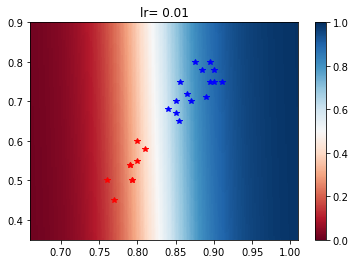

In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions( suppress = True )
def plot_decision_boundary( model , lr ):
    X1 = np.linspace( x[ : , 0].min() - 0.1 , x[ : , 0].max() + 0.1 , 200 )
    X2 = np.linspace( x[ : , 1].min() - 0.1 , x[ : , 1].max() + 0.1 , 200 )
    R1 = np.zeros( ( 200 , 200 ) )
    model.eval()
    
    for i , x1 in enumerate( X1 ):
        for j , x2 in enumerate( X2 ):
            X = torch.tensor( [ x1 , x2 ] , dtype = torch.float32 ).requires_grad_( False )
            output = model( X )
            R1[ i , j ] = output[0].detach().numpy()
 
    XX1 , XX2 = np.meshgrid( X1 , X2 )
    f , ax = plt.subplots()
    color = ax.pcolormesh( XX1 , XX2 , R1 , cmap = 'RdBu' , vmin = 0 , vmax = 1 )
    ax.set_title( f'lr= { lr }')
    f.colorbar( color , ax = ax )
    pos0 = np.where( y == 0 )[ 0 ]
    pos1 = np.where( y == 1 )[ 0 ]
    ax.plot( x[ pos0 , 0 ] , x[ pos0 , 1 ] , 'r*' )
    ax.plot( x[ pos1 , 0 ] , x[ pos1 , 1 ] , 'b*')
    plt.show()

for i , lr in enumerate( rates ):
    plot_decision_boundary( models[i] , lr )